In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import concatenate
from math import sqrt
from statistics import mean
import random
import matplotlib.pyplot as plt

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/Users/alexellard/Downloads/scenarios_data.csv', header=0, index_col=0)
df

,reservoir_demand,node_1_demand,node_2_demand,node_3_demand,node_4_demand,node_5_demand,node_6_demand,node_7_demand,node_8_demand,node_9_demand,...,link_23_flow,link_24_flow,link_25_flow,link_26_flow,link_27_flow,link_28_flow,link_29_flow,link_30_flow,link_31_flow,link_32_flow
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,-3348.0,154.8,169.2,18.0,118.8,169.2,234.0,86.4,82.8,104.4,...,439.2,-205.2,-75.6,-18.0,118.8,68.4,7.2,-54.0,75.6,212.4
2017-01-01 00:30:00,-2959.2,136.8,147.6,18.0,108.0,144.0,237.6,79.2,75.6,90.0,...,392.4,-187.2,-72.0,-21.6,108.0,61.2,3.6,-54.0,72.0,183.6
2017-01-01 01:00:00,-2692.8,129.6,126.0,14.4,104.4,133.2,205.2,72.0,72.0,90.0,...,349.2,-176.4,-64.8,-18.0,93.6,50.4,3.6,-39.6,54.0,151.2
2017-01-01 01:30:00,-2379.6,104.4,100.8,10.8,86.4,122.4,180.0,68.4,57.6,82.8,...,316.8,-158.4,-54.0,-10.8,79.2,46.8,7.2,-32.4,50.4,140.4
2017-01-01 02:00:00,-2228.4,104.4,104.4,10.8,79.2,122.4,183.6,68.4,54.0,75.6,...,277.2,-144.0,-57.6,-18.0,72.0,39.6,7.2,-32.4,43.2,118.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 21:30:00,-5306.4,205.2,208.8,39.6,183.6,284.4,316.8,176.4,133.2,129.6,...,604.8,-259.2,32.4,115.2,169.2,100.8,10.8,-100.8,122.4,309.6
2017-12-31 22:00:00,-4910.4,208.8,183.6,39.6,154.8,252.0,295.2,165.6,133.2,133.2,...,565.2,-241.2,21.6,100.8,154.8,86.4,18.0,-75.6,100.8,288.0
2017-12-31 22:30:00,-4683.6,187.2,183.6,36.0,147.6,230.4,320.4,147.6,118.8,126.0,...,529.2,-226.8,21.6,100.8,147.6,86.4,14.4,-86.4,108.0,266.4


In [9]:
MAE_average = []
sensors_covered = []
n_columns_to_drop = [0, 5, 10, 15, 20, 25]
for n in n_columns_to_drop:
    MAE = []
    #select random columns to drop
    for run in range(1,11):
        Y = df[df.columns[16]]
        X = df.drop(columns=['node_16_demand'])
        X['node_16_demand'] = Y
        columns = []
        columns_to_drop = random.sample(list(X.columns), n)
        # Drop the selected columns from the dataframe
        if X.columns[-1] in columns_to_drop:
            columns_to_drop.remove(X.columns[-1])
        X.drop(columns_to_drop, axis=1, inplace=True)
        columns.append(columns_to_drop)
        print(columns)
        print('starting df shape:', X.shape)

        print(f'This is training run {run} and has the shape: ', X.shape)
        print(f'The value of dropped columns is {n}')

[[]]
starting df shape: (87600, 96)
This is training run 1 and has the shape:  (87600, 96)
The value of dropped columns is 0
[[]]
starting df shape: (87600, 96)
This is training run 2 and has the shape:  (87600, 96)
The value of dropped columns is 0
[[]]
starting df shape: (87600, 96)
This is training run 3 and has the shape:  (87600, 96)
The value of dropped columns is 0
[[]]
starting df shape: (87600, 96)
This is training run 4 and has the shape:  (87600, 96)
The value of dropped columns is 0
[[]]
starting df shape: (87600, 96)
This is training run 5 and has the shape:  (87600, 96)
The value of dropped columns is 0
[[]]
starting df shape: (87600, 96)
This is training run 6 and has the shape:  (87600, 96)
The value of dropped columns is 0
[[]]
starting df shape: (87600, 96)
This is training run 7 and has the shape:  (87600, 96)
The value of dropped columns is 0
[[]]
starting df shape: (87600, 96)
This is training run 8 and has the shape:  (87600, 96)
The value of dropped columns is 0


[['link_24_flow', 'node_22_demand', 'node_16_pressure', 'link_12_flow', 'node_3_demand', 'node_7_pressure', 'node_10_pressure', 'node_24_demand', 'node_24_pressure', 'node_28_demand', 'node_9_demand', 'node_5_pressure', 'link_16_flow', 'link_3_flow', 'node_8_pressure']]
starting df shape: (87600, 81)
This is training run 6 and has the shape:  (87600, 81)
The value of dropped columns is 15
[['node_17_demand', 'node_25_demand', 'node_6_demand', 'link_23_flow', 'reservoir_demand', 'link_1_flow', 'link_25_flow', 'node_4_demand', 'node_9_pressure', 'link_9_flow', 'node_27_pressure', 'node_17_pressure', 'node_16_pressure', 'link_32_flow', 'node_30_demand']]
starting df shape: (87600, 81)
This is training run 7 and has the shape:  (87600, 81)
The value of dropped columns is 15
[['node_10_pressure', 'node_27_pressure', 'node_22_pressure', 'link_10_flow', 'node_26_pressure', 'link_12_flow', 'node_13_demand', 'node_3_pressure', 'link_7_flow', 'node_23_pressure', 'node_30_demand', 'node_29_demand

[['node_27_demand', 'node_10_pressure', 'node_10_demand', 'node_8_demand', 'link_1_flow', 'node_13_demand', 'node_15_demand', 'node_20_pressure', 'node_3_demand', 'node_13_pressure', 'node_21_demand', 'link_18_flow', 'node_2_demand', 'link_31_flow', 'link_22_flow', 'node_9_demand', 'node_23_pressure', 'node_14_demand', 'node_31_demand', 'node_26_pressure', 'node_2_pressure', 'node_6_demand', 'node_19_pressure', 'link_6_flow', 'link_7_flow']]
starting df shape: (87600, 71)
This is training run 6 and has the shape:  (87600, 71)
The value of dropped columns is 25
[['node_25_demand', 'link_1_flow', 'link_18_flow', 'node_18_demand', 'link_7_flow', 'node_13_pressure', 'node_15_pressure', 'node_1_pressure', 'reservoir_demand', 'node_30_pressure', 'node_26_pressure', 'link_9_flow', 'node_27_demand', 'node_17_demand', 'node_31_pressure', 'node_18_pressure', 'node_17_pressure', 'node_3_demand', 'node_23_demand', 'link_24_flow', 'link_10_flow', 'node_24_demand', 'link_23_flow', 'node_10_pressure'

In [6]:
MAE_average = []
maximum_MAE = []
sensors_covered = []
n_columns_to_drop = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
for n in n_columns_to_drop:
    MAE = []
    for run in range(1,11):
        Y = df[df.columns[16]]
        X = df.drop(columns=['node_16_demand'])
        X['node_16_demand'] = Y
        columns = []
        columns_to_drop = random.sample(list(X.columns), n)
        # Drop the selected columns from the dataframe
        if X.columns[-1] in columns_to_drop:
            columns_to_drop.remove(X.columns[-1])
        X.drop(columns_to_drop, axis=1, inplace=True)
        columns.append(columns_to_drop)
        print(columns)
        print('starting df shape:', X.shape)
        print(f'This is training run {run} and has the shape: ', X.shape)
        print(f'The value of dropped columns is {n}')

        # split into train and test sets
        values = X.values
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled = scaler.fit_transform(values)
        train, test = train_test_split(scaled, test_size=0.2, random_state=0)

        # split into input and outputs
        train_X, train_y = train[:, :-1], train[:, -1]
        test_X, test_y = test[:, :-1], test[:, -1]

        #define model
        model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.9,
            colsample_bytree=0.8,
            random_state=42
        )

        # fit the model on the training data
        model.fit(train_X, train_y)

        # make predictions on the test data
        y_pred = model.predict(test_X)

        test_y = test_y.reshape((len(test_y), 1))
        print('test y shape :', test_y.shape)
        inv_test_y = concatenate((test_y, test_X[:, -X.shape[1]:]), axis=1)
        print('Inv y shape :', inv_test_y.shape)
        test_y_inverse = scaler.inverse_transform(inv_test_y)
        test_y_inverse = test_y_inverse[:,0]

        y_pred = y_pred.reshape((len(y_pred), 1))
        print('y pred shape :', y_pred.shape)
        inv_y_pred = concatenate((y_pred, test_X[:, -X.shape[1]:]), axis=1)
        print('inv y pred :', inv_y_pred.shape)
        y_pred_inverse = scaler.inverse_transform(inv_y_pred)
        y_pred_inverse = y_pred_inverse[:,0]

        # evaluate scaled errors
        mae_inverse = mean_absolute_error(test_y_inverse, y_pred_inverse)
        MAE.append(mae_inverse)
        print(f'Run {run} Mean Absolute Error:', mae_inverse)
    percentage_list = round(X.shape[1] / 96 * 100)
    sensors_covered.append(percentage_list)
    MAE_mean = mean(MAE)
    max_MAE = max(MAE)
    maximum_MAE.append(max_MAE)
    MAE_average.append(MAE_mean)
print('Length MAE_average: ', len(MAE_average))
print('Length sensors_covered: ', len(sensors_covered))

[[]]
starting df shape: (87600, 96)
This is training run 1 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 1 Mean Absolute Error: 45.13374937313199
[[]]
starting df shape: (87600, 96)
This is training run 2 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 2 Mean Absolute Error: 45.13374937313199
[[]]
starting df shape: (87600, 96)
This is training run 3 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 3 Mean Absolute Error: 45.13374937313199
[[]]
starting df shape: (87600, 96)
This is training run 4 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 4 Mean Absolute Error: 45.13374937313199
[[]]
starting df shape: (87600, 96)
This is training run 5 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 5 Mean Absolute Error: 45.13374937313199
[[]]
starting df shape: (87600, 96)
This is training run 6 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 6 Mean Absolute Error: 45.13374937313199
[[]]
starting df shape: (87600, 96)
This is training run 7 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 7 Mean Absolute Error: 45.13374937313199
[[]]
starting df shape: (87600, 96)
This is training run 8 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 8 Mean Absolute Error: 45.13374937313199
[[]]
starting df shape: (87600, 96)
This is training run 9 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 9 Mean Absolute Error: 45.13374937313199
[[]]
starting df shape: (87600, 96)
This is training run 10 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 10 Mean Absolute Error: 45.13374937313199
[['node_4_demand', 'link_9_flow', 'link_15_flow', 'node_15_demand', 'node_1_demand']]
starting df shape: (87600, 91)
This is training run 1 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 1 Mean Absolute Error: 77.20849433372972
[['node_14_pressure', 'link_30_flow', 'node_12_demand', 'node_4_demand', 'link_8_flow']]
starting df shape: (87600, 91)
This is training run 2 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 2 Mean Absolute Error: 50.18727963064834
[['node_4_demand', 'node_27_pressure', 'link_18_flow', 'node_2_demand', 'node_9_demand']]
starting df shape: (87600, 91)
This is training run 3 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 3 Mean Absolute Error: 50.0454058983509
[['node_31_demand', 'node_30_demand', 'node_28_demand', 'node_5_pressure', 'link_21_flow']]
starting df shape: (87600, 91)
This is training run 4 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 4 Mean Absolute Error: 50.20377479787879
[['node_10_pressure', 'node_12_pressure', 'link_30_flow', 'link_12_flow', 'node_11_pressure']]
starting df shape: (87600, 91)
This is training run 5 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 5 Mean Absolute Error: 50.68602492129591
[['link_31_flow', 'link_2_flow', 'node_1_pressure', 'node_11_demand', 'link_24_flow']]
starting df shape: (87600, 91)
This is training run 6 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 6 Mean Absolute Error: 50.27802059096583
[['node_23_pressure', 'node_13_demand', 'node_28_pressure', 'node_4_pressure', 'node_10_pressure']]
starting df shape: (87600, 91)
This is training run 7 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 7 Mean Absolute Error: 46.12279599050201
[['link_9_flow', 'link_2_flow', 'node_20_pressure', 'link_31_flow', 'node_10_pressure']]
starting df shape: (87600, 91)
This is training run 8 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 8 Mean Absolute Error: 49.86720323360521
[['link_30_flow', 'node_3_pressure', 'link_25_flow', 'node_23_pressure', 'link_22_flow']]
starting df shape: (87600, 91)
This is training run 9 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 9 Mean Absolute Error: 46.23807979017989
[['node_7_demand', 'node_22_demand', 'node_19_pressure', 'node_27_demand', 'node_3_pressure']]
starting df shape: (87600, 91)
This is training run 10 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 10 Mean Absolute Error: 46.023209535874344
[['node_11_pressure', 'link_28_flow', 'node_17_demand', 'node_11_demand', 'node_13_pressure', 'link_13_flow', 'node_21_demand', 'node_21_pressure', 'node_24_demand', 'node_27_pressure']]
starting df shape: (87600, 86)
This is training run 1 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 1 Mean Absolute Error: 48.02149340620427
[['node_2_pressure', 'node_18_pressure', 'link_12_flow', 'node_25_demand', 'link_14_flow', 'link_9_flow', 'node_30_pressure', 'link_22_flow', 'node_21_pressure']]
starting df shape: (87600, 87)
This is training run 2 and has the shape:  (87600, 87)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 87)
y pred shape : (17520, 1)
inv y pred : (17520, 87)
Run 2 Mean Absolute Error: 46.46488571187759
[['node_9_pressure', 'node_10_pressure', 'link_8_flow', 'link_22_flow', 'link_13_flow', 'node_15_demand', 'node_15_pressure', 'node_11_demand', 'node_21_demand', 'node_20_pressure']]
starting df shape: (87600, 86)
This is training run 3 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 3 Mean Absolute Error: 46.1329338888866
[['link_5_flow', 'link_13_flow', 'node_19_demand', 'node_3_pressure', 'node_7_demand', 'link_17_flow', 'node_24_pressure', 'node_30_demand', 'node_4_pressure', 'node_1_demand']]
starting df shape: (87600, 86)
This is training run 4 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 4 Mean Absolute Error: 47.32610852921737
[['node_25_pressure', 'node_4_pressure', 'node_29_demand', 'node_5_demand', 'node_28_demand', 'link_27_flow', 'link_14_flow', 'node_7_pressure', 'node_23_demand', 'link_32_flow']]
starting df shape: (87600, 86)
This is training run 5 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 5 Mean Absolute Error: 48.61049418016622
[['node_9_demand', 'link_5_flow', 'node_21_pressure', 'link_15_flow', 'link_1_flow', 'node_18_pressure', 'node_20_demand', 'link_6_flow', 'node_26_demand', 'node_10_demand']]
starting df shape: (87600, 86)
This is training run 6 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 6 Mean Absolute Error: 70.94836105645315
[['link_23_flow', 'node_1_pressure', 'node_23_demand', 'link_20_flow', 'node_3_pressure', 'link_12_flow', 'node_10_pressure', 'link_8_flow', 'node_21_demand', 'node_5_pressure']]
starting df shape: (87600, 86)
This is training run 7 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 7 Mean Absolute Error: 48.875198809694396
[['node_7_demand', 'link_3_flow', 'node_6_demand', 'link_4_flow', 'link_2_flow', 'node_9_pressure', 'node_10_demand', 'node_9_demand', 'link_27_flow', 'link_9_flow']]
starting df shape: (87600, 86)
This is training run 8 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 8 Mean Absolute Error: 47.986662640283825
[['node_17_demand', 'node_10_demand', 'node_16_pressure', 'node_11_pressure', 'node_22_demand', 'link_26_flow', 'node_14_pressure', 'node_21_pressure', 'node_27_pressure', 'node_13_pressure']]
starting df shape: (87600, 86)
This is training run 9 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 9 Mean Absolute Error: 48.07448544205939
[['node_19_pressure', 'node_2_pressure', 'node_24_demand', 'node_20_pressure', 'node_1_demand', 'node_12_demand', 'node_3_pressure', 'node_26_pressure', 'node_9_pressure']]
starting df shape: (87600, 87)
This is training run 10 and has the shape:  (87600, 87)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 87)
y pred shape : (17520, 1)
inv y pred : (17520, 87)
Run 10 Mean Absolute Error: 45.407309033302894
[['node_4_pressure', 'node_4_demand', 'link_27_flow', 'link_18_flow', 'link_25_flow', 'node_9_pressure', 'node_5_demand', 'node_7_pressure', 'node_2_pressure', 'node_19_demand', 'node_10_pressure', 'link_28_flow', 'node_26_pressure', 'node_30_demand', 'node_8_demand']]
starting df shape: (87600, 81)
This is training run 1 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 1 Mean Absolute Error: 48.13745740177957
[['node_19_pressure', 'node_18_pressure', 'node_25_pressure', 'node_21_demand', 'link_24_flow', 'node_12_pressure', 'node_3_demand', 'node_9_demand', 'node_24_demand', 'link_28_flow', 'node_29_pressure', 'node_13_pressure', 'node_8_pressure', 'node_20_demand', 'node_2_demand']]
starting df shape: (87600, 81)
This is training run 2 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 2 Mean Absolute Error: 45.419920351043764
[['link_28_flow', 'link_13_flow', 'node_28_demand', 'node_5_pressure', 'node_27_demand', 'node_13_demand', 'node_30_demand', 'node_10_demand', 'link_29_flow', 'node_25_demand', 'link_21_flow', 'node_6_pressure', 'link_16_flow', 'node_14_demand', 'link_2_flow']]
starting df shape: (87600, 81)
This is training run 3 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 3 Mean Absolute Error: 103.06142968708593
[['node_20_demand', 'link_14_flow', 'link_9_flow', 'node_14_demand', 'link_20_flow', 'node_9_demand', 'link_13_flow', 'link_19_flow', 'node_28_demand', 'node_9_pressure', 'link_23_flow', 'link_21_flow', 'node_10_pressure', 'link_25_flow']]
starting df shape: (87600, 82)
This is training run 4 and has the shape:  (87600, 82)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 82)
y pred shape : (17520, 1)
inv y pred : (17520, 82)
Run 4 Mean Absolute Error: 42.84283551561287
[['node_6_demand', 'node_7_pressure', 'node_15_pressure', 'node_30_pressure', 'node_6_pressure', 'node_7_demand', 'link_19_flow', 'link_17_flow', 'node_11_pressure', 'node_12_demand', 'node_4_demand', 'node_13_demand', 'node_8_demand', 'node_16_pressure', 'link_6_flow']]
starting df shape: (87600, 81)
This is training run 5 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 5 Mean Absolute Error: 45.796350668495734
[['link_19_flow', 'node_5_pressure', 'link_25_flow', 'node_18_demand', 'node_28_pressure', 'link_26_flow', 'node_23_demand', 'node_31_demand', 'node_21_demand', 'link_3_flow', 'node_27_demand', 'node_8_demand', 'node_13_demand', 'node_26_pressure', 'node_11_demand']]
starting df shape: (87600, 81)
This is training run 6 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 6 Mean Absolute Error: 45.41268511996826
[['link_6_flow', 'node_23_pressure', 'node_14_pressure', 'link_31_flow', 'node_18_demand', 'node_31_demand', 'node_3_pressure', 'node_15_pressure', 'node_2_demand', 'node_28_pressure', 'reservoir_demand', 'node_27_demand', 'node_24_pressure', 'link_9_flow', 'node_26_demand']]
starting df shape: (87600, 81)
This is training run 7 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 7 Mean Absolute Error: 2.8432987478195937
[['node_13_pressure', 'link_10_flow', 'reservoir_pressure', 'node_3_demand', 'node_26_demand', 'link_31_flow', 'node_8_pressure', 'node_16_pressure', 'link_13_flow', 'link_7_flow', 'link_28_flow', 'node_12_demand', 'node_2_demand', 'node_1_demand']]
starting df shape: (87600, 82)
This is training run 8 and has the shape:  (87600, 82)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 82)
y pred shape : (17520, 1)
inv y pred : (17520, 82)
Run 8 Mean Absolute Error: 47.101609538073625
[['node_15_pressure', 'node_12_demand', 'link_17_flow', 'node_18_demand', 'node_28_demand', 'node_23_pressure', 'link_21_flow', 'node_17_pressure', 'link_1_flow', 'link_31_flow', 'node_25_pressure', 'node_7_demand', 'link_27_flow', 'node_6_pressure', 'link_3_flow']]
starting df shape: (87600, 81)
This is training run 9 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 9 Mean Absolute Error: 47.86794501387118
[['link_30_flow', 'node_15_demand', 'link_24_flow', 'node_5_pressure', 'node_30_pressure', 'node_5_demand', 'node_21_pressure', 'link_12_flow', 'link_9_flow', 'node_20_pressure', 'node_7_pressure', 'link_27_flow', 'node_21_demand', 'node_6_demand', 'link_22_flow']]
starting df shape: (87600, 81)
This is training run 10 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 10 Mean Absolute Error: 47.20170813547611
[['link_25_flow', 'link_15_flow', 'node_31_demand', 'node_8_demand', 'node_11_pressure', 'node_17_demand', 'node_18_demand', 'node_29_pressure', 'node_25_demand', 'node_20_pressure', 'link_10_flow', 'link_11_flow', 'node_15_demand', 'node_9_demand', 'node_14_pressure', 'node_8_pressure', 'node_16_pressure', 'node_3_pressure', 'node_21_pressure', 'node_21_demand']]
starting df shape: (87600, 76)
This is training run 1 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 1 Mean Absolute Error: 76.6548123349663
[['node_25_demand', 'node_22_pressure', 'node_29_demand', 'node_21_pressure', 'node_13_pressure', 'link_13_flow', 'node_20_demand', 'node_15_pressure', 'node_10_demand', 'link_28_flow', 'node_14_demand', 'node_2_pressure', 'link_23_flow', 'node_20_pressure', 'node_7_pressure', 'link_16_flow', 'node_27_demand', 'link_14_flow', 'link_12_flow', 'node_2_demand']]
starting df shape: (87600, 76)
This is training run 2 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 2 Mean Absolute Error: 103.65832396798568
[['node_12_pressure', 'link_20_flow', 'link_4_flow', 'link_12_flow', 'node_7_demand', 'node_1_pressure', 'link_23_flow', 'link_17_flow', 'link_18_flow', 'node_18_pressure', 'link_19_flow', 'node_13_demand', 'node_2_pressure', 'link_6_flow', 'node_30_pressure', 'node_13_pressure', 'link_7_flow', 'node_8_demand', 'node_18_demand', 'link_14_flow']]
starting df shape: (87600, 76)
This is training run 3 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 3 Mean Absolute Error: 44.411278664157486
[['node_19_pressure', 'link_28_flow', 'node_24_demand', 'node_30_demand', 'node_29_pressure', 'link_29_flow', 'reservoir_demand', 'node_20_demand', 'link_1_flow', 'node_5_pressure', 'link_26_flow', 'link_11_flow', 'link_19_flow', 'link_13_flow', 'link_22_flow', 'node_14_pressure', 'link_4_flow', 'node_2_pressure', 'node_15_demand', 'node_1_pressure']]
starting df shape: (87600, 76)
This is training run 4 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 4 Mean Absolute Error: 2.7637257160556277
[['node_8_demand', 'node_7_pressure', 'link_14_flow', 'node_5_demand', 'link_25_flow', 'node_22_pressure', 'node_9_demand', 'link_1_flow', 'link_28_flow', 'link_8_flow', 'link_24_flow', 'link_16_flow', 'node_24_demand', 'link_13_flow', 'node_1_demand', 'node_12_demand', 'link_6_flow', 'node_6_demand', 'node_15_pressure']]
starting df shape: (87600, 77)
This is training run 5 and has the shape:  (87600, 77)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 77)
y pred shape : (17520, 1)
inv y pred : (17520, 77)
Run 5 Mean Absolute Error: 104.73177498218128
[['node_15_demand', 'node_9_demand', 'link_9_flow', 'node_4_pressure', 'node_23_pressure', 'node_26_demand', 'link_22_flow', 'node_14_pressure', 'node_31_demand', 'node_17_demand', 'node_10_demand', 'link_13_flow', 'node_15_pressure', 'node_1_pressure', 'node_13_demand', 'node_1_demand', 'node_3_demand', 'node_22_demand', 'node_11_pressure', 'node_10_pressure']]
starting df shape: (87600, 76)
This is training run 6 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 6 Mean Absolute Error: 45.89480287288602
[['link_1_flow', 'node_2_pressure', 'node_9_demand', 'link_32_flow', 'link_22_flow', 'node_12_demand', 'node_24_demand', 'reservoir_demand', 'node_20_demand', 'link_8_flow', 'node_17_demand', 'link_5_flow', 'node_15_demand', 'node_8_demand', 'node_28_demand', 'node_9_pressure', 'node_14_demand', 'node_21_demand', 'node_28_pressure']]
starting df shape: (87600, 77)
This is training run 7 and has the shape:  (87600, 77)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 77)
y pred shape : (17520, 1)
inv y pred : (17520, 77)
Run 7 Mean Absolute Error: 3.147353653098174
[['node_21_pressure', 'node_1_demand', 'node_13_demand', 'node_15_pressure', 'link_12_flow', 'node_9_pressure', 'link_26_flow', 'link_9_flow', 'link_14_flow', 'node_1_pressure', 'node_9_demand', 'link_28_flow', 'node_20_demand', 'node_24_demand', 'link_32_flow', 'link_16_flow', 'link_1_flow', 'link_18_flow', 'link_6_flow', 'link_7_flow']]
starting df shape: (87600, 76)
This is training run 8 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 8 Mean Absolute Error: 105.03959403698751
[['node_4_pressure', 'node_9_demand', 'reservoir_demand', 'link_6_flow', 'node_19_pressure', 'node_31_pressure', 'node_28_demand', 'node_28_pressure', 'node_3_pressure', 'node_27_pressure', 'node_7_demand', 'node_1_demand', 'node_6_pressure', 'link_10_flow', 'node_2_demand', 'node_23_pressure', 'node_22_pressure', 'reservoir_pressure', 'node_14_pressure', 'node_10_demand']]
starting df shape: (87600, 76)
This is training run 9 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 9 Mean Absolute Error: 0.41238474683668885
[['node_16_pressure', 'link_27_flow', 'node_25_demand', 'link_19_flow', 'node_8_pressure', 'node_21_demand', 'node_30_pressure', 'link_16_flow', 'node_26_pressure', 'node_11_pressure', 'node_13_pressure', 'link_6_flow', 'node_12_pressure', 'link_10_flow', 'node_20_demand', 'link_22_flow', 'node_13_demand', 'node_1_demand', 'node_31_pressure', 'link_15_flow']]
starting df shape: (87600, 76)
This is training run 10 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 10 Mean Absolute Error: 130.37003896988782
[['node_14_demand', 'link_9_flow', 'node_9_pressure', 'link_10_flow', 'link_28_flow', 'node_7_demand', 'node_23_pressure', 'link_22_flow', 'link_19_flow', 'node_13_demand', 'link_12_flow', 'node_10_pressure', 'reservoir_pressure', 'node_6_pressure', 'link_20_flow', 'link_3_flow', 'node_14_pressure', 'link_4_flow', 'node_15_pressure', 'node_24_pressure', 'node_9_demand', 'node_18_pressure', 'node_22_demand', 'node_6_demand', 'node_3_pressure']]
starting df shape: (87600, 71)
This is training run 1 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 1 Mean Absolute Error: 44.056902540075065
[['node_17_pressure', 'node_16_pressure', 'link_11_flow', 'node_14_pressure', 'link_32_flow', 'link_22_flow', 'node_31_demand', 'link_12_flow', 'reservoir_demand', 'node_26_demand', 'reservoir_pressure', 'node_19_demand', 'node_20_demand', 'link_29_flow', 'node_3_pressure', 'node_13_demand', 'link_9_flow', 'node_12_pressure', 'link_5_flow', 'link_20_flow', 'link_4_flow', 'node_8_demand', 'link_24_flow', 'node_8_pressure']]
starting df shape: (87600, 72)
This is training run 2 and has the shape:  (87600, 72)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 72)
y pred shape : (17520, 1)
inv y pred : (17520, 72)
Run 2 Mean Absolute Error: 3.0739322247169856
[['link_7_flow', 'link_29_flow', 'node_4_pressure', 'node_21_demand', 'node_20_demand', 'node_18_demand', 'node_5_pressure', 'link_13_flow', 'node_5_demand', 'reservoir_pressure', 'node_2_demand', 'node_29_pressure', 'reservoir_demand', 'node_31_pressure', 'link_2_flow', 'link_18_flow', 'link_19_flow', 'link_9_flow', 'node_13_demand', 'link_20_flow', 'node_1_pressure', 'node_22_pressure', 'node_24_demand', 'node_19_demand', 'node_12_pressure']]
starting df shape: (87600, 71)
This is training run 3 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 3 Mean Absolute Error: 2.6407530655425866
[['node_24_pressure', 'node_11_demand', 'node_4_demand', 'link_10_flow', 'node_18_pressure', 'node_19_pressure', 'node_1_demand', 'link_26_flow', 'node_30_pressure', 'node_23_demand', 'link_5_flow', 'node_8_demand', 'node_14_demand', 'node_18_demand', 'link_15_flow', 'link_14_flow', 'node_10_pressure', 'link_31_flow', 'node_14_pressure', 'link_12_flow', 'node_26_pressure', 'node_7_demand', 'node_5_demand', 'node_27_demand', 'node_13_demand']]
starting df shape: (87600, 71)
This is training run 4 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 4 Mean Absolute Error: 75.71727759088036
[['node_12_demand', 'node_14_demand', 'node_26_pressure', 'node_30_pressure', 'link_19_flow', 'node_15_demand', 'node_28_pressure', 'node_14_pressure', 'link_14_flow', 'node_25_demand', 'node_30_demand', 'node_23_pressure', 'link_4_flow', 'link_3_flow', 'node_24_pressure', 'link_16_flow', 'link_18_flow', 'link_29_flow', 'node_19_demand', 'node_4_pressure', 'link_22_flow', 'node_8_demand', 'node_9_demand', 'node_6_pressure', 'link_7_flow']]
starting df shape: (87600, 71)
This is training run 5 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 5 Mean Absolute Error: 103.53640494870076
[['node_6_demand', 'link_13_flow', 'node_19_demand', 'link_18_flow', 'node_31_pressure', 'link_32_flow', 'node_3_pressure', 'node_17_demand', 'reservoir_demand', 'node_30_demand', 'node_17_pressure', 'link_17_flow', 'link_6_flow', 'node_20_demand', 'node_4_pressure', 'node_2_demand', 'node_14_pressure', 'node_25_demand', 'node_10_demand', 'node_22_demand', 'node_24_demand', 'node_23_pressure', 'link_27_flow', 'node_5_pressure', 'node_21_demand']]
starting df shape: (87600, 71)
This is training run 6 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 6 Mean Absolute Error: 2.68268227593548
[['node_20_demand', 'node_3_demand', 'node_8_demand', 'node_23_pressure', 'node_2_pressure', 'node_20_pressure', 'link_15_flow', 'node_11_pressure', 'link_10_flow', 'link_26_flow', 'node_5_demand', 'node_6_pressure', 'node_31_demand', 'node_2_demand', 'node_7_demand', 'node_5_pressure', 'node_21_demand', 'node_1_demand', 'node_28_pressure', 'node_30_demand', 'node_7_pressure', 'node_10_pressure', 'node_8_pressure', 'link_19_flow', 'node_24_pressure']]
starting df shape: (87600, 71)
This is training run 7 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 7 Mean Absolute Error: 72.22141411954674
[['node_3_demand', 'link_31_flow', 'node_20_demand', 'reservoir_pressure', 'node_5_demand', 'node_22_pressure', 'link_21_flow', 'link_27_flow', 'link_18_flow', 'node_14_pressure', 'node_31_demand', 'node_22_demand', 'link_3_flow', 'link_7_flow', 'link_13_flow', 'link_4_flow', 'node_15_demand', 'node_16_pressure', 'link_19_flow', 'link_10_flow', 'node_13_demand', 'node_31_pressure', 'node_2_pressure', 'node_18_pressure']]
starting df shape: (87600, 72)
This is training run 8 and has the shape:  (87600, 72)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 72)
y pred shape : (17520, 1)
inv y pred : (17520, 72)
Run 8 Mean Absolute Error: 50.416368697962916
[['node_15_demand', 'reservoir_pressure', 'node_9_pressure', 'node_28_pressure', 'link_9_flow', 'link_26_flow', 'link_3_flow', 'node_26_pressure', 'reservoir_demand', 'node_13_pressure', 'node_25_pressure', 'node_20_pressure', 'node_11_demand', 'node_8_demand', 'node_2_demand', 'node_2_pressure', 'link_4_flow', 'node_3_pressure', 'node_15_pressure', 'node_29_demand', 'link_32_flow', 'node_30_pressure', 'link_19_flow', 'node_9_demand', 'link_8_flow']]
starting df shape: (87600, 71)
This is training run 9 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 9 Mean Absolute Error: 2.7118768996857794
[['node_13_pressure', 'node_10_pressure', 'node_7_demand', 'node_30_demand', 'node_27_demand', 'link_11_flow', 'node_15_demand', 'link_4_flow', 'link_23_flow', 'node_13_demand', 'node_1_demand', 'node_25_demand', 'link_14_flow', 'node_29_demand', 'link_26_flow', 'reservoir_demand', 'node_26_demand', 'link_30_flow', 'node_8_pressure', 'node_17_demand', 'link_28_flow', 'link_19_flow', 'link_1_flow', 'node_4_demand', 'node_9_pressure']]
starting df shape: (87600, 71)
This is training run 10 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 10 Mean Absolute Error: 2.730111637132179
[['node_17_demand', 'link_14_flow', 'node_4_pressure', 'link_2_flow', 'node_17_pressure', 'link_3_flow', 'link_27_flow', 'link_29_flow', 'node_29_pressure', 'link_19_flow', 'link_17_flow', 'node_25_demand', 'node_8_pressure', 'node_11_demand', 'node_12_demand', 'link_9_flow', 'node_11_pressure', 'link_16_flow', 'link_26_flow', 'node_21_demand', 'link_10_flow', 'link_1_flow', 'node_31_pressure', 'node_15_pressure', 'node_24_pressure', 'node_28_pressure', 'link_22_flow', 'node_19_pressure', 'node_22_demand']]
starting df shape: (87600, 67)
This is training run 1 and has the shape:  (87600, 67)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 67)
y pred shape : (17520, 1)
inv y pred : (17520, 67)
Run 1 Mean Absolute Error: 127.88839522990965
[['link_23_flow', 'node_27_demand', 'node_10_pressure', 'link_16_flow', 'node_2_pressure', 'reservoir_demand', 'node_10_demand', 'node_18_pressure', 'reservoir_pressure', 'node_6_pressure', 'node_17_demand', 'node_29_pressure', 'node_4_pressure', 'node_5_pressure', 'node_3_pressure', 'node_31_pressure', 'node_15_pressure', 'link_8_flow', 'node_2_demand', 'node_20_pressure', 'node_31_demand', 'link_12_flow', 'node_24_pressure', 'node_8_demand', 'node_28_pressure', 'node_5_demand', 'node_22_pressure', 'link_9_flow', 'node_11_pressure', 'node_24_demand']]
starting df shape: (87600, 66)
This is training run 2 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 2 Mean Absolute Error: 7.862476037560352
[['link_10_flow', 'node_15_demand', 'node_21_pressure', 'node_28_demand', 'node_24_pressure', 'link_15_flow', 'node_6_pressure', 'node_12_pressure', 'link_22_flow', 'node_10_pressure', 'node_14_pressure', 'node_5_pressure', 'node_7_demand', 'link_23_flow', 'link_12_flow', 'node_25_pressure', 'link_28_flow', 'link_6_flow', 'node_19_demand', 'node_21_demand', 'link_1_flow', 'node_8_pressure', 'reservoir_demand', 'link_7_flow', 'reservoir_pressure', 'node_9_pressure', 'node_7_pressure', 'node_30_demand', 'node_10_demand', 'node_22_pressure']]
starting df shape: (87600, 66)
This is training run 3 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 3 Mean Absolute Error: 4.785734564961977
[['link_6_flow', 'node_5_pressure', 'node_27_demand', 'link_22_flow', 'link_18_flow', 'node_31_demand', 'node_26_demand', 'node_17_demand', 'node_14_pressure', 'node_18_pressure', 'link_23_flow', 'link_29_flow', 'link_21_flow', 'node_26_pressure', 'node_11_demand', 'node_12_pressure', 'node_6_demand', 'node_31_pressure', 'link_1_flow', 'link_8_flow', 'node_1_demand', 'link_11_flow', 'node_11_pressure', 'node_9_pressure', 'node_3_pressure', 'node_22_pressure', 'link_24_flow', 'link_17_flow', 'node_25_pressure', 'link_7_flow']]
starting df shape: (87600, 66)
This is training run 4 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 4 Mean Absolute Error: 44.783724006285574
[['node_17_demand', 'link_27_flow', 'node_10_demand', 'link_3_flow', 'node_19_pressure', 'node_11_demand', 'link_1_flow', 'node_19_demand', 'node_28_pressure', 'link_24_flow', 'link_5_flow', 'link_9_flow', 'node_9_demand', 'link_7_flow', 'link_18_flow', 'node_2_pressure', 'node_3_demand', 'node_8_pressure', 'node_29_demand', 'node_13_demand', 'node_5_pressure', 'link_25_flow', 'node_31_demand', 'link_4_flow', 'link_28_flow', 'node_7_pressure', 'node_15_demand', 'link_17_flow', 'node_25_demand']]
starting df shape: (87600, 67)
This is training run 5 and has the shape:  (87600, 67)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 67)
y pred shape : (17520, 1)
inv y pred : (17520, 67)
Run 5 Mean Absolute Error: 43.6192010176645
[['node_15_demand', 'link_23_flow', 'node_30_demand', 'node_16_pressure', 'node_23_pressure', 'node_26_demand', 'link_17_flow', 'node_29_pressure', 'node_21_demand', 'link_29_flow', 'node_9_pressure', 'node_28_pressure', 'node_19_pressure', 'link_31_flow', 'node_26_pressure', 'node_10_pressure', 'node_18_demand', 'link_4_flow', 'node_18_pressure', 'node_7_demand', 'node_7_pressure', 'node_11_demand', 'node_20_pressure', 'node_6_demand', 'link_2_flow', 'node_2_pressure', 'link_1_flow', 'link_13_flow', 'node_12_pressure', 'link_3_flow']]
starting df shape: (87600, 66)
This is training run 6 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 6 Mean Absolute Error: 50.80266790120603
[['link_9_flow', 'node_29_demand', 'node_18_pressure', 'link_25_flow', 'node_16_pressure', 'node_1_demand', 'link_20_flow', 'link_4_flow', 'node_9_pressure', 'node_28_pressure', 'link_1_flow', 'node_3_pressure', 'link_14_flow', 'node_11_pressure', 'node_31_pressure', 'node_17_pressure', 'node_13_pressure', 'node_8_pressure', 'reservoir_pressure', 'node_23_pressure', 'link_11_flow', 'node_14_pressure', 'node_20_pressure', 'link_12_flow', 'node_8_demand', 'node_2_demand', 'node_6_demand', 'node_12_pressure', 'node_24_pressure', 'link_6_flow']]
starting df shape: (87600, 66)
This is training run 7 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 7 Mean Absolute Error: 46.21034674196171
[['node_26_demand', 'node_13_pressure', 'node_9_pressure', 'node_15_pressure', 'node_27_demand', 'link_21_flow', 'link_25_flow', 'link_2_flow', 'node_8_demand', 'link_8_flow', 'node_20_pressure', 'link_16_flow', 'node_23_pressure', 'node_22_pressure', 'node_14_pressure', 'link_4_flow', 'node_14_demand', 'link_10_flow', 'node_29_demand', 'node_17_pressure', 'node_19_demand', 'link_30_flow', 'link_3_flow', 'node_23_demand', 'node_21_demand', 'link_32_flow', 'link_24_flow', 'node_29_pressure', 'link_12_flow', 'node_27_pressure']]
starting df shape: (87600, 66)
This is training run 8 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 8 Mean Absolute Error: 103.71357568957104
[['reservoir_demand', 'node_11_pressure', 'node_10_pressure', 'node_28_demand', 'node_9_demand', 'node_30_demand', 'node_6_pressure', 'node_15_pressure', 'reservoir_pressure', 'link_4_flow', 'link_25_flow', 'node_26_demand', 'link_23_flow', 'node_19_pressure', 'link_8_flow', 'link_26_flow', 'link_27_flow', 'link_12_flow', 'link_17_flow', 'link_31_flow', 'node_5_demand', 'node_23_demand', 'node_3_pressure', 'link_22_flow', 'link_24_flow', 'node_3_demand', 'node_27_demand', 'node_24_pressure', 'node_16_pressure']]
starting df shape: (87600, 67)
This is training run 9 and has the shape:  (87600, 67)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 67)
y pred shape : (17520, 1)
inv y pred : (17520, 67)
Run 9 Mean Absolute Error: 2.8383867018936138
[['link_32_flow', 'link_1_flow', 'link_23_flow', 'link_20_flow', 'node_18_pressure', 'link_24_flow', 'link_22_flow', 'link_17_flow', 'link_5_flow', 'link_11_flow', 'link_4_flow', 'reservoir_pressure', 'node_13_demand', 'link_9_flow', 'link_26_flow', 'node_30_demand', 'link_12_flow', 'node_21_pressure', 'node_17_demand', 'link_8_flow', 'node_27_pressure', 'node_15_demand', 'node_3_pressure', 'node_28_demand', 'link_7_flow', 'link_10_flow', 'node_2_pressure', 'node_13_pressure', 'link_25_flow', 'node_23_demand']]
starting df shape: (87600, 66)
This is training run 10 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 10 Mean Absolute Error: 45.12637070712762
[['node_21_demand', 'link_24_flow', 'node_9_demand', 'node_17_pressure', 'link_27_flow', 'link_22_flow', 'link_32_flow', 'link_17_flow', 'link_10_flow', 'link_7_flow', 'node_24_demand', 'node_13_pressure', 'node_4_pressure', 'node_21_pressure', 'node_13_demand', 'node_19_demand', 'node_29_demand', 'link_30_flow', 'link_21_flow', 'node_10_pressure', 'link_13_flow', 'node_22_pressure', 'node_31_demand', 'node_6_demand', 'link_15_flow', 'node_28_demand', 'node_22_demand', 'node_10_demand', 'link_18_flow', 'node_5_demand', 'node_12_pressure', 'node_3_pressure', 'node_26_demand', 'node_30_pressure', 'node_18_demand']]
starting df shape: (87600, 61)
This is training run 1 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 1 Mean Absolute Error: 72.65078155563998
[['node_29_pressure', 'node_14_pressure', 'link_25_flow', 'link_8_flow', 'link_4_flow', 'link_31_flow', 'node_16_pressure', 'link_1_flow', 'node_7_demand', 'node_31_demand', 'link_13_flow', 'node_25_pressure', 'link_22_flow', 'link_24_flow', 'link_18_flow', 'node_13_pressure', 'node_10_pressure', 'node_27_pressure', 'link_15_flow', 'link_16_flow', 'node_7_pressure', 'link_7_flow', 'node_9_demand', 'node_23_demand', 'node_25_demand', 'node_14_demand', 'link_20_flow', 'link_21_flow', 'node_22_demand', 'link_14_flow', 'node_21_pressure', 'node_2_pressure', 'link_11_flow', 'link_9_flow']]
starting df shape: (87600, 62)
This is training run 2 and has the shape:  (87600, 62)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 62)
y pred shape : (17520, 1)
inv y pred : (17520, 62)
Run 2 Mean Absolute Error: 138.66831670235
[['node_18_pressure', 'node_23_pressure', 'node_30_demand', 'node_3_demand', 'link_28_flow', 'node_27_demand', 'node_4_demand', 'link_14_flow', 'link_16_flow', 'node_17_pressure', 'link_19_flow', 'link_3_flow', 'node_28_pressure', 'link_32_flow', 'node_7_pressure', 'link_8_flow', 'node_9_pressure', 'link_24_flow', 'node_26_demand', 'node_24_pressure', 'link_10_flow', 'node_29_demand', 'node_7_demand', 'reservoir_pressure', 'node_25_demand', 'node_12_pressure', 'link_20_flow', 'node_6_demand', 'link_18_flow', 'node_26_pressure', 'link_29_flow', 'node_17_demand', 'node_18_demand', 'node_21_pressure', 'node_19_pressure']]
starting df shape: (87600, 61)
This is training run 3 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 3 Mean Absolute Error: 128.13834229041817
[['link_4_flow', 'node_22_demand', 'node_20_pressure', 'link_11_flow', 'node_1_pressure', 'node_9_pressure', 'node_3_pressure', 'node_25_pressure', 'node_23_demand', 'link_19_flow', 'node_29_pressure', 'node_15_pressure', 'node_27_demand', 'node_27_pressure', 'node_23_pressure', 'node_18_pressure', 'node_24_pressure', 'node_8_pressure', 'link_21_flow', 'node_7_pressure', 'node_21_pressure', 'node_5_demand', 'link_13_flow', 'node_28_pressure', 'node_10_pressure', 'node_31_demand', 'node_9_demand', 'node_28_demand', 'node_26_demand', 'link_2_flow', 'node_26_pressure', 'link_15_flow', 'node_10_demand', 'node_19_demand', 'node_4_pressure']]
starting df shape: (87600, 61)
This is training run 4 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 4 Mean Absolute Error: 72.31802221329018
[['link_12_flow', 'node_23_pressure', 'link_18_flow', 'node_25_demand', 'node_16_pressure', 'link_11_flow', 'node_8_demand', 'node_14_pressure', 'node_6_pressure', 'node_24_demand', 'node_19_demand', 'node_28_demand', 'reservoir_demand', 'link_6_flow', 'link_26_flow', 'node_12_pressure', 'link_20_flow', 'node_26_demand', 'link_17_flow', 'node_11_pressure', 'node_7_demand', 'link_15_flow', 'node_1_pressure', 'node_13_pressure', 'node_26_pressure', 'link_16_flow', 'link_5_flow', 'link_30_flow', 'link_27_flow', 'link_28_flow', 'node_14_demand', 'link_13_flow', 'reservoir_pressure', 'node_9_demand']]
starting df shape: (87600, 62)
This is training run 5 and has the shape:  (87600, 62)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 62)
y pred shape : (17520, 1)
inv y pred : (17520, 62)
Run 5 Mean Absolute Error: 10.158413209544985
[['node_10_demand', 'node_12_demand', 'node_7_pressure', 'node_31_demand', 'node_27_demand', 'node_2_pressure', 'link_16_flow', 'node_29_pressure', 'node_5_pressure', 'reservoir_demand', 'node_30_pressure', 'link_7_flow', 'link_9_flow', 'node_10_pressure', 'node_31_pressure', 'node_4_demand', 'node_18_pressure', 'node_13_demand', 'reservoir_pressure', 'node_3_demand', 'node_28_pressure', 'node_25_pressure', 'node_21_pressure', 'link_21_flow', 'node_18_demand', 'node_11_pressure', 'node_1_pressure', 'node_8_pressure', 'link_27_flow', 'node_17_demand', 'node_6_pressure', 'node_22_pressure', 'node_23_pressure', 'link_29_flow', 'node_26_pressure']]
starting df shape: (87600, 61)
This is training run 6 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 6 Mean Absolute Error: 7.810973448985083
[['node_13_pressure', 'link_11_flow', 'link_26_flow', 'node_5_pressure', 'link_24_flow', 'node_7_demand', 'link_4_flow', 'link_10_flow', 'node_1_demand', 'node_13_demand', 'node_9_demand', 'node_30_demand', 'link_27_flow', 'link_30_flow', 'node_24_demand', 'reservoir_demand', 'node_31_demand', 'link_6_flow', 'node_6_demand', 'node_29_demand', 'node_5_demand', 'node_26_pressure', 'link_7_flow', 'node_20_demand', 'node_12_pressure', 'link_22_flow', 'node_28_pressure', 'link_9_flow', 'node_8_pressure', 'link_32_flow', 'node_17_pressure', 'link_29_flow', 'node_30_pressure', 'node_15_demand']]
starting df shape: (87600, 62)
This is training run 7 and has the shape:  (87600, 62)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 62)
y pred shape : (17520, 1)
inv y pred : (17520, 62)
Run 7 Mean Absolute Error: 2.5554374276335565
[['link_31_flow', 'link_1_flow', 'node_12_demand', 'node_25_demand', 'node_21_demand', 'node_7_demand', 'node_21_pressure', 'node_30_pressure', 'node_11_demand', 'node_14_demand', 'node_20_pressure', 'node_28_pressure', 'node_10_demand', 'link_4_flow', 'node_26_demand', 'link_30_flow', 'node_25_pressure', 'node_28_demand', 'node_6_demand', 'node_5_demand', 'node_11_pressure', 'node_13_demand', 'link_27_flow', 'link_21_flow', 'link_18_flow', 'node_31_pressure', 'node_13_pressure', 'node_8_pressure', 'node_17_demand', 'node_14_pressure', 'node_19_pressure', 'node_15_demand', 'link_10_flow', 'node_26_pressure', 'link_22_flow']]
starting df shape: (87600, 61)
This is training run 8 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 8 Mean Absolute Error: 46.39357376503494
[['node_17_demand', 'link_32_flow', 'link_8_flow', 'reservoir_pressure', 'node_17_pressure', 'link_16_flow', 'node_14_pressure', 'node_27_demand', 'node_7_demand', 'node_28_demand', 'link_28_flow', 'link_20_flow', 'link_19_flow', 'link_23_flow', 'node_1_pressure', 'node_20_pressure', 'link_1_flow', 'link_10_flow', 'node_25_demand', 'node_26_demand', 'node_26_pressure', 'node_29_pressure', 'link_25_flow', 'link_13_flow', 'node_15_demand', 'node_22_demand', 'node_11_demand', 'node_24_pressure', 'link_15_flow', 'node_12_demand', 'node_2_demand', 'node_20_demand', 'node_10_demand', 'node_4_pressure']]
starting df shape: (87600, 62)
This is training run 9 and has the shape:  (87600, 62)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 62)
y pred shape : (17520, 1)
inv y pred : (17520, 62)
Run 9 Mean Absolute Error: 151.35429065879376
[['link_2_flow', 'node_1_pressure', 'node_23_pressure', 'link_22_flow', 'node_11_pressure', 'node_8_pressure', 'node_18_demand', 'node_23_demand', 'node_3_pressure', 'link_16_flow', 'node_20_demand', 'link_20_flow', 'link_18_flow', 'link_5_flow', 'link_7_flow', 'node_10_pressure', 'node_13_pressure', 'node_4_pressure', 'node_19_demand', 'link_17_flow', 'node_5_demand', 'node_19_pressure', 'link_27_flow', 'node_16_pressure', 'node_27_demand', 'node_2_demand', 'node_14_demand', 'node_30_demand', 'link_8_flow', 'node_20_pressure', 'node_17_demand', 'node_14_pressure', 'node_29_demand', 'node_25_pressure']]
starting df shape: (87600, 62)
This is training run 10 and has the shape:  (87600, 62)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 62)
y pred shape : (17520, 1)
inv y pred : (17520, 62)
Run 10 Mean Absolute Error: 125.0949992251053
[['node_30_demand', 'link_5_flow', 'node_26_pressure', 'link_10_flow', 'node_8_demand', 'node_11_demand', 'link_3_flow', 'link_16_flow', 'link_27_flow', 'node_1_demand', 'node_10_pressure', 'node_5_demand', 'node_11_pressure', 'node_20_pressure', 'node_7_pressure', 'link_23_flow', 'node_6_pressure', 'node_21_demand', 'node_31_demand', 'link_15_flow', 'node_12_demand', 'node_30_pressure', 'node_6_demand', 'node_15_pressure', 'link_9_flow', 'node_20_demand', 'link_24_flow', 'node_9_pressure', 'link_6_flow', 'node_8_pressure', 'node_2_pressure', 'node_26_demand', 'node_28_demand', 'node_13_pressure', 'link_2_flow', 'link_18_flow', 'node_18_demand', 'node_14_pressure', 'link_13_flow', 'node_4_pressure']]
starting df shape: (87600, 56)
This is training run 1 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 1 Mean Absolute Error: 127.33716754365314
[['link_24_flow', 'node_27_demand', 'link_14_flow', 'link_12_flow', 'link_8_flow', 'link_25_flow', 'node_7_pressure', 'node_25_demand', 'link_3_flow', 'link_11_flow', 'link_29_flow', 'node_8_demand', 'node_24_demand', 'node_17_pressure', 'link_19_flow', 'node_11_demand', 'node_9_demand', 'node_1_demand', 'node_2_demand', 'node_16_pressure', 'node_3_demand', 'node_2_pressure', 'node_31_demand', 'node_5_pressure', 'node_13_demand', 'node_6_pressure', 'node_21_demand', 'node_26_pressure', 'node_20_demand', 'link_20_flow', 'link_28_flow', 'link_1_flow', 'node_5_demand', 'link_10_flow', 'link_16_flow', 'node_14_demand', 'node_21_pressure', 'link_2_flow', 'link_30_flow', 'node_7_demand']]
starting df shape: (87600, 56)
This is training run 2 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 2 Mean Absolute Error: 107.14809230231259
[['link_23_flow', 'link_9_flow', 'link_10_flow', 'link_30_flow', 'node_28_demand', 'node_13_pressure', 'link_6_flow', 'node_16_pressure', 'node_13_demand', 'node_9_demand', 'reservoir_pressure', 'link_11_flow', 'node_3_pressure', 'link_21_flow', 'node_18_demand', 'node_20_demand', 'node_23_demand', 'link_28_flow', 'node_27_pressure', 'link_18_flow', 'node_17_demand', 'link_31_flow', 'node_7_pressure', 'node_6_demand', 'node_10_pressure', 'node_21_demand', 'node_29_pressure', 'node_19_pressure', 'link_24_flow', 'link_22_flow', 'node_15_pressure', 'node_18_pressure', 'link_25_flow', 'node_5_pressure', 'node_2_pressure', 'node_1_demand', 'node_22_demand', 'link_14_flow', 'node_11_pressure', 'node_4_demand']]
starting df shape: (87600, 56)
This is training run 3 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 3 Mean Absolute Error: 46.129306478055454
[['node_14_pressure', 'node_13_demand', 'node_7_demand', 'node_15_demand', 'node_9_demand', 'node_3_pressure', 'link_28_flow', 'node_29_demand', 'link_7_flow', 'node_25_demand', 'node_24_demand', 'link_9_flow', 'node_30_pressure', 'node_10_demand', 'node_5_demand', 'node_28_pressure', 'node_20_pressure', 'node_8_pressure', 'node_25_pressure', 'node_4_pressure', 'node_10_pressure', 'link_27_flow', 'node_4_demand', 'link_12_flow', 'node_21_pressure', 'link_5_flow', 'node_15_pressure', 'node_6_pressure', 'node_31_pressure', 'node_7_pressure', 'link_20_flow', 'link_16_flow', 'node_19_pressure', 'node_22_demand', 'node_17_pressure', 'node_26_pressure', 'node_31_demand', 'node_2_pressure', 'node_18_demand', 'link_19_flow']]
starting df shape: (87600, 56)
This is training run 4 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 4 Mean Absolute Error: 103.23210574301238
[['reservoir_demand', 'node_19_pressure', 'link_1_flow', 'node_29_demand', 'link_14_flow', 'node_1_pressure', 'link_2_flow', 'node_27_demand', 'node_7_demand', 'link_31_flow', 'node_15_pressure', 'link_25_flow', 'link_8_flow', 'link_32_flow', 'link_5_flow', 'node_6_pressure', 'node_21_demand', 'node_30_pressure', 'node_18_pressure', 'node_6_demand', 'node_26_pressure', 'node_16_pressure', 'node_25_pressure', 'node_5_pressure', 'node_11_pressure', 'node_9_demand', 'link_21_flow', 'node_20_demand', 'node_10_demand', 'node_13_demand', 'node_12_demand', 'link_19_flow', 'link_3_flow', 'node_14_pressure', 'link_10_flow', 'node_25_demand', 'link_27_flow', 'node_14_demand', 'node_2_demand', 'node_10_pressure']]
starting df shape: (87600, 56)
This is training run 5 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 5 Mean Absolute Error: 2.833262655829623
[['link_22_flow', 'node_23_demand', 'node_1_pressure', 'link_1_flow', 'link_24_flow', 'node_10_demand', 'link_20_flow', 'node_9_demand', 'node_22_demand', 'node_5_pressure', 'node_7_demand', 'node_17_pressure', 'link_18_flow', 'node_28_demand', 'node_24_demand', 'node_29_pressure', 'node_17_demand', 'node_14_pressure', 'node_3_demand', 'node_30_demand', 'link_25_flow', 'node_18_pressure', 'link_17_flow', 'node_20_demand', 'node_31_pressure', 'link_4_flow', 'link_10_flow', 'link_7_flow', 'node_25_demand', 'node_12_pressure', 'node_10_pressure', 'node_9_pressure', 'link_16_flow', 'node_2_demand', 'link_3_flow', 'node_8_pressure', 'node_15_demand', 'link_32_flow', 'node_1_demand', 'node_2_pressure']]
starting df shape: (87600, 56)
This is training run 6 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 6 Mean Absolute Error: 123.36142723004996
[['link_16_flow', 'node_16_pressure', 'node_9_pressure', 'node_26_demand', 'link_14_flow', 'node_25_demand', 'node_20_demand', 'node_3_pressure', 'link_6_flow', 'node_10_demand', 'reservoir_demand', 'node_30_pressure', 'node_14_demand', 'node_21_demand', 'node_23_pressure', 'node_4_demand', 'link_18_flow', 'node_15_pressure', 'node_28_pressure', 'node_8_pressure', 'node_1_pressure', 'link_30_flow', 'node_12_demand', 'link_4_flow', 'link_13_flow', 'node_17_pressure', 'node_17_demand', 'node_2_demand', 'node_25_pressure', 'link_28_flow', 'node_30_demand', 'node_18_demand', 'node_19_pressure', 'node_8_demand', 'node_23_demand', 'node_6_pressure', 'link_3_flow', 'link_10_flow', 'link_9_flow']]
starting df shape: (87600, 57)
This is training run 7 and has the shape:  (87600, 57)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 57)
y pred shape : (17520, 1)
inv y pred : (17520, 57)
Run 7 Mean Absolute Error: 8.036744136803657
[['node_11_demand', 'link_32_flow', 'link_8_flow', 'node_22_demand', 'link_22_flow', 'link_4_flow', 'node_7_pressure', 'node_23_demand', 'node_4_pressure', 'node_21_demand', 'node_27_pressure', 'node_13_pressure', 'node_31_demand', 'link_7_flow', 'node_19_demand', 'node_20_pressure', 'node_15_demand', 'node_4_demand', 'node_8_pressure', 'node_17_pressure', 'link_23_flow', 'node_1_demand', 'node_29_demand', 'node_20_demand', 'node_6_pressure', 'node_31_pressure', 'node_8_demand', 'node_26_demand', 'link_31_flow', 'node_9_pressure', 'link_17_flow', 'link_14_flow', 'node_25_pressure', 'node_9_demand', 'node_24_demand', 'reservoir_demand', 'node_18_demand', 'node_15_pressure', 'node_11_pressure', 'node_29_pressure']]
starting df shape: (87600, 56)
This is training run 8 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 8 Mean Absolute Error: 2.4439404553166537
[['link_24_flow', 'link_28_flow', 'link_10_flow', 'node_2_pressure', 'node_11_pressure', 'link_14_flow', 'node_21_demand', 'node_7_pressure', 'link_22_flow', 'node_24_demand', 'node_25_demand', 'node_25_pressure', 'node_23_demand', 'node_27_pressure', 'link_19_flow', 'node_5_pressure', 'node_30_demand', 'node_20_demand', 'link_16_flow', 'reservoir_demand', 'link_29_flow', 'node_16_pressure', 'node_22_pressure', 'node_21_pressure', 'node_10_pressure', 'node_4_pressure', 'link_32_flow', 'node_31_pressure', 'node_15_demand', 'node_28_pressure', 'node_2_demand', 'link_7_flow', 'node_29_pressure', 'node_18_pressure', 'link_5_flow', 'node_17_demand', 'link_9_flow', 'link_2_flow', 'link_23_flow']]
starting df shape: (87600, 57)
This is training run 9 and has the shape:  (87600, 57)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 57)
y pred shape : (17520, 1)
inv y pred : (17520, 57)
Run 9 Mean Absolute Error: 8.173682697434991
[['link_1_flow', 'node_27_pressure', 'node_10_demand', 'node_31_pressure', 'node_21_pressure', 'node_5_demand', 'node_19_demand', 'node_2_demand', 'link_2_flow', 'node_18_pressure', 'link_11_flow', 'node_22_demand', 'link_31_flow', 'node_11_demand', 'node_29_pressure', 'node_15_demand', 'link_28_flow', 'node_17_pressure', 'link_22_flow', 'node_30_pressure', 'node_26_demand', 'node_16_pressure', 'node_18_demand', 'link_24_flow', 'reservoir_pressure', 'node_25_demand', 'node_12_demand', 'link_8_flow', 'node_9_demand', 'node_5_pressure', 'node_3_pressure', 'node_13_pressure', 'link_32_flow', 'node_7_demand', 'link_21_flow', 'node_20_demand', 'link_20_flow', 'node_10_pressure', 'node_30_demand']]
starting df shape: (87600, 57)
This is training run 10 and has the shape:  (87600, 57)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 57)
y pred shape : (17520, 1)
inv y pred : (17520, 57)
Run 10 Mean Absolute Error: 48.16973112485701
[['link_13_flow', 'node_14_pressure', 'link_20_flow', 'node_24_demand', 'node_5_demand', 'node_9_demand', 'link_18_flow', 'node_30_pressure', 'node_11_demand', 'link_15_flow', 'node_25_pressure', 'node_27_demand', 'node_31_demand', 'link_30_flow', 'node_19_pressure', 'link_29_flow', 'reservoir_pressure', 'link_31_flow', 'node_17_pressure', 'node_24_pressure', 'link_23_flow', 'link_16_flow', 'node_20_demand', 'link_19_flow', 'node_2_pressure', 'node_15_demand', 'node_3_pressure', 'node_18_demand', 'node_19_demand', 'node_4_pressure', 'link_8_flow', 'link_22_flow', 'link_26_flow', 'node_8_pressure', 'link_3_flow', 'link_28_flow', 'link_4_flow', 'node_22_pressure', 'node_6_pressure', 'node_5_pressure', 'node_17_demand', 'node_13_pressure', 'link_25_flow', 'link_11_flow', 'link_5_flow']]
starting df shape: (87600, 51)
This is training run 1 an

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 1 Mean Absolute Error: 159.12354596898484
[['node_8_pressure', 'link_32_flow', 'node_24_pressure', 'link_17_flow', 'link_6_flow', 'node_26_demand', 'node_19_pressure', 'node_10_pressure', 'reservoir_demand', 'node_10_demand', 'link_9_flow', 'node_21_pressure', 'link_7_flow', 'node_31_demand', 'node_17_demand', 'node_13_demand', 'node_18_demand', 'link_27_flow', 'node_14_pressure', 'node_2_pressure', 'link_13_flow', 'link_16_flow', 'node_27_demand', 'node_22_demand', 'node_20_pressure', 'link_30_flow', 'node_9_demand', 'node_26_pressure', 'link_29_flow', 'node_3_pressure', 'node_9_pressure', 'node_30_pressure', 'node_2_demand', 'link_5_flow', 'link_18_flow', 'node_7_demand', 'node_4_demand', 'link_14_flow', 'link_2_flow', 'node_17_pressure', 'link_15_flow', 'link_25_flow', 'link_8_flow', 'node_11_demand', 'link_4_flow']]
starting df shape: (87600, 51)
This is training run 2 and has

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 2 Mean Absolute Error: 10.01200934439614
[['node_5_pressure', 'link_10_flow', 'link_16_flow', 'node_19_demand', 'node_27_pressure', 'link_12_flow', 'link_22_flow', 'link_21_flow', 'link_8_flow', 'link_7_flow', 'link_13_flow', 'node_22_demand', 'node_9_pressure', 'node_7_pressure', 'link_27_flow', 'node_1_pressure', 'node_26_demand', 'node_18_demand', 'node_13_demand', 'node_4_pressure', 'link_32_flow', 'node_2_pressure', 'node_3_pressure', 'node_23_demand', 'link_29_flow', 'link_28_flow', 'link_18_flow', 'node_23_pressure', 'node_29_demand', 'node_6_pressure', 'node_21_demand', 'link_20_flow', 'node_11_demand', 'link_2_flow', 'node_14_pressure', 'node_1_demand', 'node_6_demand', 'node_8_pressure', 'node_12_demand', 'node_17_pressure', 'link_3_flow', 'node_26_pressure', 'link_23_flow', 'node_11_pressure', 'node_25_demand']]
starting df shape: (87600, 51)
This is training run 3 and 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 3 Mean Absolute Error: 105.75641048651758
[['node_25_demand', 'node_15_demand', 'node_18_pressure', 'node_29_pressure', 'node_26_pressure', 'node_30_demand', 'link_17_flow', 'node_27_pressure', 'link_32_flow', 'node_23_pressure', 'link_21_flow', 'node_17_pressure', 'node_9_pressure', 'link_31_flow', 'node_22_pressure', 'node_22_demand', 'node_7_pressure', 'node_5_demand', 'node_31_pressure', 'link_10_flow', 'node_30_pressure', 'node_21_demand', 'node_4_demand', 'node_27_demand', 'node_6_demand', 'node_14_pressure', 'node_11_demand', 'node_3_pressure', 'link_26_flow', 'node_19_pressure', 'node_10_demand', 'node_23_demand', 'node_16_pressure', 'link_30_flow', 'link_7_flow', 'node_26_demand', 'node_18_demand', 'node_20_demand', 'node_25_pressure', 'link_2_flow', 'node_12_pressure', 'link_6_flow', 'link_25_flow', 'link_3_flow']]
starting df shape: (87600, 52)
This is training run 4 an

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 52)
y pred shape : (17520, 1)
inv y pred : (17520, 52)
Run 4 Mean Absolute Error: 44.499193035044186
[['link_2_flow', 'node_8_pressure', 'link_8_flow', 'link_13_flow', 'node_20_pressure', 'node_6_pressure', 'node_14_pressure', 'node_17_pressure', 'node_1_demand', 'node_7_demand', 'link_11_flow', 'node_29_demand', 'link_18_flow', 'node_2_pressure', 'node_15_pressure', 'link_31_flow', 'node_17_demand', 'link_4_flow', 'node_1_pressure', 'node_13_demand', 'node_9_pressure', 'link_28_flow', 'link_32_flow', 'node_2_demand', 'node_6_demand', 'node_4_pressure', 'link_9_flow', 'node_5_demand', 'link_10_flow', 'link_5_flow', 'link_16_flow', 'reservoir_pressure', 'node_13_pressure', 'node_3_pressure', 'node_9_demand', 'link_15_flow', 'node_30_demand', 'node_4_demand', 'link_1_flow', 'link_21_flow', 'node_18_demand', 'node_23_pressure', 'link_29_flow', 'node_11_demand']]
starting df shape: (87600, 52)
This is training run 5 and has the shape:  (87600

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 52)
y pred shape : (17520, 1)
inv y pred : (17520, 52)
Run 5 Mean Absolute Error: 148.53682380311795
[['link_13_flow', 'link_32_flow', 'node_19_demand', 'node_19_pressure', 'link_19_flow', 'node_24_pressure', 'link_15_flow', 'link_4_flow', 'link_5_flow', 'node_7_pressure', 'node_23_pressure', 'node_15_demand', 'link_31_flow', 'link_1_flow', 'node_10_demand', 'node_25_pressure', 'node_27_demand', 'node_7_demand', 'node_31_pressure', 'node_14_pressure', 'node_21_demand', 'node_30_demand', 'node_15_pressure', 'node_14_demand', 'node_17_demand', 'node_22_demand', 'node_3_pressure', 'link_29_flow', 'link_30_flow', 'node_2_demand', 'node_20_demand', 'node_13_demand', 'link_25_flow', 'node_10_pressure', 'node_25_demand', 'node_9_pressure', 'node_4_demand', 'link_11_flow', 'link_24_flow', 'node_22_pressure', 'node_3_demand', 'link_26_flow', 'link_23_flow', 'link_16_flow', 'node_26_pressure']]
starting df shape: (87600, 51)
This is training run 6 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 6 Mean Absolute Error: 160.92339167697915
[['link_2_flow', 'node_18_demand', 'node_5_demand', 'node_4_pressure', 'node_22_demand', 'node_26_pressure', 'link_21_flow', 'node_11_demand', 'node_13_demand', 'link_18_flow', 'link_5_flow', 'node_8_demand', 'link_25_flow', 'node_26_demand', 'node_9_pressure', 'node_30_pressure', 'link_31_flow', 'node_29_demand', 'link_15_flow', 'node_8_pressure', 'link_3_flow', 'node_12_demand', 'link_10_flow', 'link_30_flow', 'reservoir_pressure', 'link_29_flow', 'node_19_demand', 'node_23_pressure', 'node_18_pressure', 'node_22_pressure', 'node_24_demand', 'node_15_demand', 'node_12_pressure', 'node_14_pressure', 'node_29_pressure', 'node_30_demand', 'link_24_flow', 'node_6_demand', 'node_20_pressure', 'link_26_flow', 'node_28_demand', 'node_7_pressure', 'node_24_pressure', 'link_9_flow', 'node_3_demand']]
starting df shape: (87600, 51)
This is trainin

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 7 Mean Absolute Error: 78.50342102406718
[['node_10_demand', 'node_4_pressure', 'link_25_flow', 'node_20_pressure', 'link_29_flow', 'link_13_flow', 'node_1_demand', 'link_20_flow', 'node_30_pressure', 'link_32_flow', 'node_12_demand', 'node_11_demand', 'link_12_flow', 'node_22_demand', 'link_24_flow', 'node_18_pressure', 'link_30_flow', 'link_1_flow', 'node_13_demand', 'link_14_flow', 'node_26_demand', 'node_26_pressure', 'node_29_pressure', 'link_19_flow', 'node_10_pressure', 'node_24_pressure', 'reservoir_pressure', 'node_25_pressure', 'node_28_demand', 'node_2_pressure', 'node_23_demand', 'node_24_demand', 'node_17_demand', 'node_5_demand', 'link_3_flow', 'link_8_flow', 'node_20_demand', 'node_4_demand', 'node_15_demand', 'node_2_demand', 'link_28_flow', 'node_7_demand', 'node_6_pressure', 'node_30_demand', 'link_15_flow']]
starting df shape: (87600, 51)
This is training run 8 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 8 Mean Absolute Error: 80.81804502073304
[['node_13_pressure', 'reservoir_pressure', 'link_29_flow', 'link_28_flow', 'node_7_pressure', 'link_6_flow', 'node_23_demand', 'node_26_demand', 'node_4_pressure', 'link_24_flow', 'node_28_demand', 'link_3_flow', 'node_1_demand', 'node_22_pressure', 'node_30_demand', 'node_13_demand', 'node_25_demand', 'node_22_demand', 'link_17_flow', 'node_25_pressure', 'node_3_demand', 'node_18_pressure', 'link_18_flow', 'node_6_pressure', 'node_14_pressure', 'node_30_pressure', 'link_12_flow', 'link_15_flow', 'node_5_pressure', 'link_20_flow', 'link_11_flow', 'link_4_flow', 'node_17_demand', 'node_2_demand', 'node_19_demand', 'link_31_flow', 'link_1_flow', 'link_2_flow', 'node_8_demand', 'link_16_flow', 'reservoir_demand', 'link_23_flow', 'node_11_demand', 'node_24_demand', 'link_27_flow']]
starting df shape: (87600, 51)
This is training run 9 and has 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 9 Mean Absolute Error: 6.462942693622645
[['link_16_flow', 'node_23_pressure', 'node_25_pressure', 'node_21_demand', 'link_26_flow', 'node_9_pressure', 'node_15_demand', 'node_28_demand', 'node_17_pressure', 'node_10_demand', 'link_15_flow', 'node_23_demand', 'link_32_flow', 'node_7_demand', 'node_28_pressure', 'node_1_demand', 'node_31_pressure', 'node_15_pressure', 'link_6_flow', 'node_2_pressure', 'node_29_demand', 'link_9_flow', 'node_20_demand', 'node_29_pressure', 'node_13_pressure', 'link_30_flow', 'node_2_demand', 'node_14_pressure', 'node_17_demand', 'link_28_flow', 'link_22_flow', 'node_24_demand', 'node_8_pressure', 'node_22_demand', 'link_12_flow', 'node_5_pressure', 'node_27_pressure', 'link_18_flow', 'link_7_flow', 'link_27_flow', 'link_10_flow', 'node_4_demand', 'node_13_demand', 'node_5_demand', 'node_18_pressure']]
starting df shape: (87600, 51)
This is training r

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 10 Mean Absolute Error: 154.88995053239205
[['node_17_pressure', 'node_27_demand', 'node_22_pressure', 'link_20_flow', 'link_8_flow', 'node_4_pressure', 'node_5_pressure', 'link_21_flow', 'node_9_demand', 'node_28_demand', 'node_1_pressure', 'node_30_pressure', 'node_15_pressure', 'node_2_pressure', 'node_6_demand', 'node_21_demand', 'link_12_flow', 'node_29_demand', 'link_2_flow', 'node_17_demand', 'link_11_flow', 'node_25_pressure', 'node_23_demand', 'link_28_flow', 'link_24_flow', 'node_26_demand', 'link_7_flow', 'node_22_demand', 'link_6_flow', 'node_13_pressure', 'link_16_flow', 'reservoir_pressure', 'link_31_flow', 'link_15_flow', 'node_14_demand', 'node_21_pressure', 'node_12_demand', 'node_25_demand', 'node_1_demand', 'node_6_pressure', 'link_4_flow', 'node_10_demand', 'node_8_demand', 'link_9_flow', 'link_5_flow', 'node_24_demand', 'link_10_flow', 'node_2_demand', 'link_2

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 47)
y pred shape : (17520, 1)
inv y pred : (17520, 47)
Run 1 Mean Absolute Error: 150.63760503787245
[['node_4_demand', 'node_19_demand', 'link_20_flow', 'node_8_demand', 'link_8_flow', 'node_14_pressure', 'node_29_demand', 'node_22_demand', 'node_28_demand', 'link_10_flow', 'link_22_flow', 'node_9_demand', 'link_15_flow', 'node_31_demand', 'link_27_flow', 'link_2_flow', 'node_15_pressure', 'node_5_pressure', 'link_28_flow', 'node_10_demand', 'node_17_pressure', 'link_9_flow', 'node_26_demand', 'node_17_demand', 'node_1_demand', 'node_11_demand', 'node_20_pressure', 'node_30_demand', 'link_11_flow', 'node_27_demand', 'node_29_pressure', 'link_29_flow', 'node_14_demand', 'link_19_flow', 'node_3_demand', 'node_7_pressure', 'node_11_pressure', 'link_30_flow', 'link_5_flow', 'node_4_pressure', 'node_26_pressure', 'node_25_demand', 'node_1_pressure', 'node_28_pressure', 'node_24_pressure', 'node_27_pressure', 'link_25_flow', 'link_3_flow', 'no

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 47)
y pred shape : (17520, 1)
inv y pred : (17520, 47)
Run 2 Mean Absolute Error: 72.1890650823996
[['node_3_demand', 'node_18_pressure', 'link_4_flow', 'link_20_flow', 'node_12_pressure', 'node_21_pressure', 'link_16_flow', 'node_26_demand', 'node_17_pressure', 'node_27_pressure', 'node_5_pressure', 'node_31_pressure', 'link_12_flow', 'link_19_flow', 'node_20_pressure', 'node_19_demand', 'node_31_demand', 'link_5_flow', 'link_10_flow', 'node_23_pressure', 'node_25_pressure', 'node_23_demand', 'reservoir_pressure', 'node_9_demand', 'link_28_flow', 'link_22_flow', 'link_15_flow', 'link_30_flow', 'node_22_demand', 'node_14_pressure', 'node_22_pressure', 'node_24_demand', 'node_13_pressure', 'node_26_pressure', 'link_18_flow', 'node_1_pressure', 'node_2_pressure', 'node_29_demand', 'node_7_demand', 'link_31_flow', 'node_8_demand', 'node_16_pressure', 'node_30_demand', 'link_17_flow', 'node_7_pressure', 'link_26_flow', 'node_12_demand', 'node

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 47)
y pred shape : (17520, 1)
inv y pred : (17520, 47)
Run 3 Mean Absolute Error: 165.74625897877107
[['link_5_flow', 'node_25_pressure', 'node_21_demand', 'node_19_demand', 'node_10_demand', 'node_15_demand', 'node_30_demand', 'node_26_pressure', 'node_9_pressure', 'node_13_pressure', 'node_4_demand', 'reservoir_pressure', 'link_12_flow', 'node_2_pressure', 'node_21_pressure', 'link_17_flow', 'node_17_pressure', 'link_13_flow', 'node_8_demand', 'link_1_flow', 'node_12_pressure', 'node_26_demand', 'node_29_demand', 'link_24_flow', 'node_16_pressure', 'node_4_pressure', 'link_22_flow', 'node_11_pressure', 'node_9_demand', 'node_1_demand', 'node_7_pressure', 'node_24_pressure', 'node_17_demand', 'node_25_demand', 'node_5_demand', 'link_25_flow', 'link_19_flow', 'link_31_flow', 'node_5_pressure', 'link_29_flow', 'link_23_flow', 'link_8_flow', 'link_16_flow', 'link_14_flow', 'link_26_flow', 'link_27_flow', 'link_21_flow', 'node_20_pressure', 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 4 Mean Absolute Error: 139.7093686074754
[['node_2_pressure', 'link_12_flow', 'node_10_pressure', 'node_28_demand', 'node_13_demand', 'node_31_pressure', 'node_19_pressure', 'node_22_demand', 'node_28_pressure', 'node_15_pressure', 'node_14_demand', 'link_16_flow', 'node_30_pressure', 'link_19_flow', 'node_14_pressure', 'node_20_pressure', 'node_7_pressure', 'link_25_flow', 'node_26_pressure', 'link_5_flow', 'node_23_demand', 'link_32_flow', 'link_28_flow', 'node_8_demand', 'link_24_flow', 'node_21_demand', 'link_27_flow', 'link_8_flow', 'node_1_demand', 'link_23_flow', 'node_4_pressure', 'node_18_pressure', 'node_3_pressure', 'reservoir_pressure', 'node_17_demand', 'link_1_flow', 'link_30_flow', 'link_29_flow', 'node_16_pressure', 'node_22_pressure', 'node_20_demand', 'node_29_demand', 'node_9_pressure', 'link_7_flow', 'link_13_flow', 'link_14_flow', 'node_5_pressure', 'link_4_fl

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 5 Mean Absolute Error: 135.47231255507285
[['link_2_flow', 'node_11_pressure', 'link_21_flow', 'node_10_demand', 'link_1_flow', 'link_17_flow', 'node_3_demand', 'node_8_demand', 'link_14_flow', 'link_16_flow', 'node_17_pressure', 'node_15_demand', 'node_12_demand', 'node_23_pressure', 'node_1_pressure', 'node_14_pressure', 'node_5_demand', 'link_26_flow', 'link_7_flow', 'node_31_demand', 'link_31_flow', 'link_11_flow', 'node_4_demand', 'link_10_flow', 'node_9_pressure', 'node_14_demand', 'node_12_pressure', 'link_15_flow', 'reservoir_demand', 'node_19_pressure', 'link_5_flow', 'link_29_flow', 'node_9_demand', 'node_22_demand', 'link_24_flow', 'node_28_demand', 'node_21_demand', 'node_31_pressure', 'node_2_demand', 'node_20_demand', 'node_16_pressure', 'node_7_demand', 'node_17_demand', 'link_25_flow', 'node_29_pressure', 'node_22_pressure', 'node_27_pressure', 'link_12_flow', 'lin

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 6 Mean Absolute Error: 10.688930088806538
[['node_5_demand', 'link_7_flow', 'node_12_demand', 'node_23_pressure', 'node_25_pressure', 'node_23_demand', 'node_22_pressure', 'link_11_flow', 'link_8_flow', 'node_12_pressure', 'link_20_flow', 'node_26_demand', 'node_6_demand', 'node_15_pressure', 'node_29_demand', 'node_19_pressure', 'link_26_flow', 'link_31_flow', 'node_26_pressure', 'node_29_pressure', 'link_9_flow', 'link_18_flow', 'link_13_flow', 'link_30_flow', 'link_14_flow', 'node_22_demand', 'node_18_demand', 'node_5_pressure', 'node_9_demand', 'reservoir_demand', 'node_17_demand', 'node_16_pressure', 'link_19_flow', 'node_2_demand', 'link_21_flow', 'node_4_pressure', 'node_21_demand', 'node_10_pressure', 'node_30_demand', 'link_32_flow', 'node_31_demand', 'node_8_pressure', 'link_1_flow', 'node_25_demand', 'link_29_flow', 'node_14_demand', 'link_24_flow', 'node_27_demand', 'n

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 47)
y pred shape : (17520, 1)
inv y pred : (17520, 47)
Run 7 Mean Absolute Error: 0.43795122730157393
[['node_26_pressure', 'node_2_pressure', 'link_21_flow', 'link_14_flow', 'node_15_pressure', 'node_28_demand', 'node_9_pressure', 'node_9_demand', 'link_11_flow', 'node_27_demand', 'node_28_pressure', 'link_31_flow', 'link_4_flow', 'link_10_flow', 'link_13_flow', 'node_10_demand', 'node_3_pressure', 'node_23_pressure', 'node_6_demand', 'node_31_pressure', 'link_25_flow', 'node_12_demand', 'link_26_flow', 'reservoir_pressure', 'node_25_demand', 'node_1_pressure', 'node_5_demand', 'link_16_flow', 'node_2_demand', 'node_17_pressure', 'link_22_flow', 'node_17_demand', 'link_20_flow', 'node_3_demand', 'node_7_demand', 'node_20_pressure', 'link_18_flow', 'link_9_flow', 'node_29_pressure', 'node_26_demand', 'node_8_pressure', 'node_6_pressure', 'link_12_flow', 'node_16_pressure', 'node_15_demand', 'node_24_pressure', 'node_31_demand', 'node_1_de

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 47)
y pred shape : (17520, 1)
inv y pred : (17520, 47)
Run 8 Mean Absolute Error: 134.18601171525864
[['link_15_flow', 'link_21_flow', 'node_1_pressure', 'node_10_pressure', 'link_19_flow', 'node_8_pressure', 'link_5_flow', 'node_4_demand', 'node_17_demand', 'node_5_pressure', 'node_18_pressure', 'node_5_demand', 'reservoir_demand', 'node_30_demand', 'node_12_demand', 'node_19_demand', 'link_29_flow', 'link_17_flow', 'node_30_pressure', 'node_7_pressure', 'node_24_demand', 'link_25_flow', 'link_30_flow', 'node_22_pressure', 'link_11_flow', 'node_31_demand', 'link_1_flow', 'node_13_pressure', 'node_21_demand', 'link_6_flow', 'link_12_flow', 'node_23_demand', 'node_26_pressure', 'link_14_flow', 'node_19_pressure', 'node_15_pressure', 'node_12_pressure', 'link_26_flow', 'link_20_flow', 'node_29_demand', 'link_31_flow', 'node_2_demand', 'link_8_flow', 'node_1_demand', 'node_14_pressure', 'link_32_flow', 'node_3_pressure', 'node_18_demand', 'l

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 9 Mean Absolute Error: 0.6953158027151123
[['link_2_flow', 'node_26_demand', 'node_26_pressure', 'node_24_pressure', 'node_31_demand', 'link_1_flow', 'node_15_pressure', 'link_4_flow', 'link_25_flow', 'node_6_pressure', 'link_5_flow', 'node_3_pressure', 'link_30_flow', 'node_10_demand', 'node_3_demand', 'node_27_pressure', 'link_32_flow', 'node_18_demand', 'reservoir_pressure', 'node_8_pressure', 'node_12_pressure', 'link_28_flow', 'node_18_pressure', 'link_12_flow', 'link_7_flow', 'node_5_pressure', 'link_6_flow', 'node_23_pressure', 'reservoir_demand', 'node_12_demand', 'node_7_pressure', 'node_9_demand', 'node_29_demand', 'node_19_demand', 'node_14_demand', 'link_20_flow', 'node_22_pressure', 'link_31_flow', 'link_11_flow', 'link_21_flow', 'node_8_demand', 'node_4_demand', 'node_1_demand', 'node_27_demand', 'link_13_flow', 'node_2_demand', 'link_26_flow', 'node_17_demand', 'nod

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 47)
y pred shape : (17520, 1)
inv y pred : (17520, 47)
Run 10 Mean Absolute Error: 2.867647188098761
[['node_8_pressure', 'node_25_demand', 'node_25_pressure', 'node_4_pressure', 'link_19_flow', 'node_24_pressure', 'node_30_pressure', 'node_16_pressure', 'node_4_demand', 'node_28_pressure', 'link_26_flow', 'node_9_pressure', 'node_13_pressure', 'node_15_pressure', 'link_15_flow', 'node_14_demand', 'node_29_pressure', 'node_24_demand', 'reservoir_pressure', 'link_25_flow', 'reservoir_demand', 'node_3_pressure', 'node_9_demand', 'link_7_flow', 'node_7_demand', 'node_18_demand', 'link_21_flow', 'link_22_flow', 'node_11_demand', 'node_12_demand', 'node_3_demand', 'link_11_flow', 'link_14_flow', 'link_16_flow', 'link_17_flow', 'link_23_flow', 'node_21_pressure', 'link_20_flow', 'node_10_pressure', 'node_6_demand', 'link_32_flow', 'node_31_pressure', 'node_29_demand', 'link_5_flow', 'node_27_pressure', 'node_27_demand', 'node_2_demand', 'link_3

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 1 Mean Absolute Error: 8.522905916412434
[['node_15_pressure', 'node_7_demand', 'node_1_pressure', 'node_13_demand', 'node_27_pressure', 'node_28_pressure', 'node_8_demand', 'link_2_flow', 'node_29_demand', 'link_31_flow', 'link_7_flow', 'node_5_pressure', 'node_9_demand', 'link_11_flow', 'node_3_pressure', 'node_20_pressure', 'node_18_demand', 'node_13_pressure', 'link_30_flow', 'link_17_flow', 'node_12_demand', 'node_25_pressure', 'link_1_flow', 'link_28_flow', 'link_13_flow', 'node_22_pressure', 'node_16_pressure', 'link_12_flow', 'node_17_pressure', 'node_21_demand', 'node_25_demand', 'link_3_flow', 'link_15_flow', 'node_6_demand', 'node_26_demand', 'link_16_flow', 'node_3_demand', 'link_8_flow', 'link_32_flow', 'node_31_pressure', 'node_5_demand', 'node_15_demand', 'node_4_demand', 'link_19_flow', 'node_24_pressure', 'link_29_flow', 'node_22_demand', 'node_18_pressure', 'link

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 42)
y pred shape : (17520, 1)
inv y pred : (17520, 42)
Run 2 Mean Absolute Error: 134.63662303832487
[['node_19_pressure', 'link_9_flow', 'node_8_demand', 'link_32_flow', 'reservoir_pressure', 'node_19_demand', 'node_21_demand', 'node_22_demand', 'link_12_flow', 'link_23_flow', 'link_28_flow', 'node_31_demand', 'link_19_flow', 'node_27_demand', 'node_30_demand', 'node_27_pressure', 'node_11_demand', 'link_4_flow', 'link_6_flow', 'node_5_pressure', 'node_18_demand', 'node_24_pressure', 'link_1_flow', 'node_15_pressure', 'node_5_demand', 'node_6_demand', 'node_25_pressure', 'node_14_demand', 'node_21_pressure', 'node_17_demand', 'node_1_pressure', 'link_29_flow', 'node_26_demand', 'node_8_pressure', 'link_18_flow', 'node_10_demand', 'link_8_flow', 'node_28_pressure', 'node_22_pressure', 'node_14_pressure', 'node_7_demand', 'link_22_flow', 'link_15_flow', 'link_17_flow', 'node_16_pressure', 'node_12_demand', 'link_10_flow', 'node_9_pressure'

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 42)
y pred shape : (17520, 1)
inv y pred : (17520, 42)
Run 3 Mean Absolute Error: 162.237149258334
[['link_31_flow', 'node_4_demand', 'node_18_pressure', 'link_11_flow', 'node_21_pressure', 'node_13_demand', 'node_8_demand', 'node_26_pressure', 'node_31_demand', 'node_6_demand', 'reservoir_demand', 'link_16_flow', 'link_27_flow', 'node_19_pressure', 'link_32_flow', 'node_24_pressure', 'link_2_flow', 'node_14_pressure', 'node_16_pressure', 'node_17_demand', 'node_10_pressure', 'node_31_pressure', 'link_10_flow', 'node_3_demand', 'node_11_demand', 'node_29_demand', 'link_21_flow', 'link_6_flow', 'link_4_flow', 'link_3_flow', 'node_1_demand', 'link_30_flow', 'node_11_pressure', 'link_7_flow', 'node_7_demand', 'node_28_demand', 'node_12_demand', 'node_2_demand', 'link_13_flow', 'node_23_demand', 'node_30_demand', 'node_27_pressure', 'link_26_flow', 'node_26_demand', 'node_5_demand', 'node_3_pressure', 'link_1_flow', 'node_21_demand', 'link_8_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 42)
y pred shape : (17520, 1)
inv y pred : (17520, 42)
Run 4 Mean Absolute Error: 4.423731939644178
[['node_25_pressure', 'link_21_flow', 'link_28_flow', 'node_20_pressure', 'node_7_pressure', 'node_12_pressure', 'node_9_demand', 'node_16_pressure', 'link_4_flow', 'link_9_flow', 'link_26_flow', 'node_1_pressure', 'node_22_demand', 'link_5_flow', 'node_24_demand', 'node_17_pressure', 'node_2_demand', 'node_26_demand', 'node_23_pressure', 'link_23_flow', 'node_25_demand', 'node_18_demand', 'node_1_demand', 'node_5_demand', 'node_26_pressure', 'node_21_pressure', 'node_6_pressure', 'node_17_demand', 'link_22_flow', 'link_1_flow', 'link_14_flow', 'node_30_demand', 'link_13_flow', 'node_5_pressure', 'node_3_demand', 'node_10_pressure', 'link_30_flow', 'link_29_flow', 'node_15_pressure', 'reservoir_demand', 'node_14_demand', 'node_29_demand', 'node_12_demand', 'node_18_pressure', 'node_23_demand', 'node_13_pressure', 'link_6_flow', 'reservoir_p

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 5 Mean Absolute Error: 2.088287003679952
[['node_21_demand', 'node_25_demand', 'node_6_pressure', 'node_24_demand', 'link_29_flow', 'node_31_demand', 'node_29_pressure', 'link_14_flow', 'node_2_pressure', 'node_14_pressure', 'link_30_flow', 'link_3_flow', 'node_11_demand', 'node_3_demand', 'node_11_pressure', 'node_16_pressure', 'node_9_demand', 'node_10_pressure', 'link_26_flow', 'node_15_demand', 'node_30_demand', 'node_15_pressure', 'node_1_pressure', 'link_2_flow', 'node_26_pressure', 'node_23_demand', 'node_27_pressure', 'node_19_pressure', 'node_4_pressure', 'node_5_demand', 'link_25_flow', 'link_24_flow', 'node_7_demand', 'reservoir_pressure', 'link_13_flow', 'link_32_flow', 'node_6_demand', 'node_24_pressure', 'link_28_flow', 'link_16_flow', 'link_19_flow', 'node_8_demand', 'node_28_demand', 'node_14_demand', 'link_23_flow', 'node_9_pressure', 'node_21_pressure', 'link_1_f

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 6 Mean Absolute Error: 179.7937559727746
[['link_23_flow', 'reservoir_pressure', 'node_29_demand', 'link_28_flow', 'node_19_pressure', 'link_22_flow', 'node_1_pressure', 'link_29_flow', 'node_17_pressure', 'node_18_pressure', 'node_1_demand', 'node_21_pressure', 'node_29_pressure', 'link_16_flow', 'node_14_demand', 'link_26_flow', 'node_18_demand', 'link_15_flow', 'link_2_flow', 'node_13_pressure', 'node_5_demand', 'link_6_flow', 'node_25_demand', 'link_7_flow', 'node_20_pressure', 'link_31_flow', 'node_9_pressure', 'node_24_pressure', 'node_6_pressure', 'link_3_flow', 'node_12_demand', 'node_2_demand', 'link_20_flow', 'node_20_demand', 'node_22_pressure', 'node_31_demand', 'node_13_demand', 'link_4_flow', 'node_10_pressure', 'link_25_flow', 'node_27_pressure', 'node_28_pressure', 'node_12_pressure', 'link_18_flow', 'node_7_demand', 'link_11_flow', 'node_23_demand', 'node_23_press

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 7 Mean Absolute Error: 162.82045272861518
[['node_10_demand', 'link_15_flow', 'node_9_demand', 'node_11_demand', 'node_26_demand', 'link_5_flow', 'node_17_pressure', 'node_21_demand', 'link_31_flow', 'link_16_flow', 'node_23_pressure', 'link_12_flow', 'node_17_demand', 'link_19_flow', 'node_13_pressure', 'link_7_flow', 'link_22_flow', 'node_2_demand', 'link_32_flow', 'link_1_flow', 'node_1_demand', 'node_27_pressure', 'link_25_flow', 'link_13_flow', 'link_26_flow', 'node_5_demand', 'link_18_flow', 'link_27_flow', 'node_31_pressure', 'link_20_flow', 'node_10_pressure', 'link_9_flow', 'node_11_pressure', 'node_26_pressure', 'link_3_flow', 'node_6_demand', 'node_15_pressure', 'link_8_flow', 'link_11_flow', 'link_28_flow', 'link_21_flow', 'node_14_pressure', 'node_22_pressure', 'node_28_demand', 'node_14_demand', 'node_18_pressure', 'node_25_demand', 'node_24_pressure', 'node_22_deman

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 42)
y pred shape : (17520, 1)
inv y pred : (17520, 42)
Run 8 Mean Absolute Error: 1.4557395489809435
[['link_27_flow', 'node_23_pressure', 'node_12_demand', 'link_9_flow', 'node_7_pressure', 'node_25_demand', 'node_1_demand', 'node_6_pressure', 'node_27_demand', 'link_11_flow', 'node_20_pressure', 'node_16_pressure', 'link_7_flow', 'node_5_demand', 'node_17_demand', 'node_1_pressure', 'node_6_demand', 'link_20_flow', 'link_8_flow', 'link_2_flow', 'node_24_pressure', 'reservoir_pressure', 'node_14_pressure', 'node_15_demand', 'link_24_flow', 'link_32_flow', 'link_22_flow', 'link_25_flow', 'node_22_pressure', 'node_2_demand', 'node_23_demand', 'node_25_pressure', 'node_2_pressure', 'link_28_flow', 'link_10_flow', 'node_14_demand', 'link_16_flow', 'node_13_demand', 'node_22_demand', 'node_3_demand', 'link_30_flow', 'node_31_demand', 'link_19_flow', 'node_13_pressure', 'node_10_pressure', 'node_7_demand', 'node_31_pressure', 'node_11_demand',

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 42)
y pred shape : (17520, 1)
inv y pred : (17520, 42)
Run 9 Mean Absolute Error: 159.47438570607812
[['link_4_flow', 'node_8_demand', 'node_5_demand', 'node_28_pressure', 'link_5_flow', 'node_26_demand', 'link_29_flow', 'link_22_flow', 'link_10_flow', 'node_22_demand', 'node_13_demand', 'node_6_pressure', 'node_15_demand', 'node_17_pressure', 'link_1_flow', 'link_13_flow', 'node_11_pressure', 'link_24_flow', 'link_28_flow', 'node_9_demand', 'link_9_flow', 'node_28_demand', 'node_10_pressure', 'link_27_flow', 'node_20_pressure', 'link_6_flow', 'node_3_pressure', 'link_11_flow', 'node_21_pressure', 'node_29_demand', 'node_3_demand', 'node_14_pressure', 'node_1_pressure', 'node_15_pressure', 'link_3_flow', 'node_17_demand', 'reservoir_pressure', 'node_18_demand', 'link_8_flow', 'node_24_demand', 'link_12_flow', 'link_17_flow', 'link_23_flow', 'node_13_pressure', 'node_14_demand', 'node_4_demand', 'link_20_flow', 'node_7_pressure', 'node_7_d

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 10 Mean Absolute Error: 77.4061346271066
[['link_29_flow', 'node_3_pressure', 'node_30_pressure', 'node_7_demand', 'node_30_demand', 'node_20_pressure', 'node_28_demand', 'node_6_demand', 'node_2_demand', 'node_15_pressure', 'link_11_flow', 'node_31_demand', 'node_19_demand', 'link_20_flow', 'link_5_flow', 'link_6_flow', 'node_13_pressure', 'link_30_flow', 'link_14_flow', 'link_22_flow', 'reservoir_demand', 'node_24_pressure', 'node_7_pressure', 'link_1_flow', 'link_24_flow', 'node_8_demand', 'node_28_pressure', 'node_17_pressure', 'node_23_demand', 'link_10_flow', 'node_5_pressure', 'node_22_pressure', 'node_23_pressure', 'link_25_flow', 'node_20_demand', 'node_25_demand', 'node_26_demand', 'node_12_pressure', 'node_9_pressure', 'node_27_demand', 'link_32_flow', 'link_2_flow', 'node_27_pressure', 'node_4_pressure', 'node_24_demand', 'node_17_demand', 'reservoir_pressure', 'link_2

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 36)
y pred shape : (17520, 1)
inv y pred : (17520, 36)
Run 1 Mean Absolute Error: 2.9071291386969813
[['node_11_pressure', 'node_10_pressure', 'node_23_pressure', 'reservoir_pressure', 'link_5_flow', 'node_13_demand', 'node_22_pressure', 'node_17_pressure', 'link_3_flow', 'node_8_demand', 'link_29_flow', 'link_11_flow', 'link_28_flow', 'node_21_pressure', 'node_14_demand', 'link_13_flow', 'node_29_pressure', 'link_10_flow', 'node_29_demand', 'link_15_flow', 'node_2_demand', 'node_3_pressure', 'link_21_flow', 'node_22_demand', 'node_25_pressure', 'node_7_pressure', 'node_18_demand', 'link_6_flow', 'node_28_demand', 'node_19_pressure', 'node_31_pressure', 'node_26_pressure', 'node_30_pressure', 'link_9_flow', 'link_23_flow', 'node_9_pressure', 'link_25_flow', 'link_14_flow', 'node_2_pressure', 'link_4_flow', 'node_5_pressure', 'node_4_pressure', 'node_28_pressure', 'node_15_pressure', 'node_20_pressure', 'link_30_flow', 'node_1_pressure', '

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 2 Mean Absolute Error: 80.39842439467519
[['node_31_demand', 'node_20_pressure', 'node_23_pressure', 'link_9_flow', 'node_27_demand', 'node_8_pressure', 'node_28_demand', 'node_20_demand', 'link_27_flow', 'node_11_demand', 'node_16_pressure', 'link_25_flow', 'node_4_pressure', 'node_19_pressure', 'node_3_demand', 'node_7_demand', 'node_12_pressure', 'node_12_demand', 'node_30_pressure', 'node_6_demand', 'link_31_flow', 'node_14_pressure', 'link_19_flow', 'link_32_flow', 'node_17_pressure', 'link_2_flow', 'node_18_demand', 'link_30_flow', 'node_19_demand', 'link_20_flow', 'reservoir_demand', 'node_18_pressure', 'link_13_flow', 'link_3_flow', 'link_28_flow', 'node_17_demand', 'node_26_pressure', 'link_18_flow', 'node_25_pressure', 'node_5_pressure', 'node_22_pressure', 'node_21_demand', 'link_10_flow', 'node_28_pressure', 'node_1_demand', 'link_11_flow', 'node_24_pressure', 'node_22

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 36)
y pred shape : (17520, 1)
inv y pred : (17520, 36)
Run 3 Mean Absolute Error: 7.688295782278959
[['node_15_demand', 'node_14_demand', 'link_23_flow', 'node_15_pressure', 'node_27_pressure', 'node_12_pressure', 'link_32_flow', 'node_18_demand', 'link_5_flow', 'link_25_flow', 'link_9_flow', 'link_12_flow', 'node_1_pressure', 'node_16_pressure', 'node_3_demand', 'node_25_demand', 'node_14_pressure', 'link_8_flow', 'link_11_flow', 'link_19_flow', 'link_16_flow', 'link_3_flow', 'node_29_demand', 'node_5_pressure', 'node_5_demand', 'node_4_demand', 'node_9_demand', 'node_17_pressure', 'node_6_pressure', 'node_28_pressure', 'link_13_flow', 'node_31_demand', 'link_27_flow', 'node_24_pressure', 'link_22_flow', 'link_10_flow', 'node_13_pressure', 'node_27_demand', 'node_26_pressure', 'link_14_flow', 'link_1_flow', 'node_20_demand', 'link_15_flow', 'link_17_flow', 'node_10_pressure', 'node_20_pressure', 'link_31_flow', 'node_25_pressure', 'node_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 4 Mean Absolute Error: 145.53848616183785
[['link_23_flow', 'link_6_flow', 'link_17_flow', 'link_15_flow', 'node_22_pressure', 'link_1_flow', 'link_27_flow', 'node_12_demand', 'node_15_pressure', 'node_18_pressure', 'link_19_flow', 'link_30_flow', 'link_28_flow', 'node_9_pressure', 'link_5_flow', 'node_31_demand', 'node_31_pressure', 'node_27_pressure', 'node_20_demand', 'reservoir_demand', 'node_13_demand', 'node_29_demand', 'node_7_demand', 'link_16_flow', 'node_19_demand', 'reservoir_pressure', 'node_16_pressure', 'link_25_flow', 'node_28_demand', 'link_22_flow', 'node_22_demand', 'node_12_pressure', 'node_1_demand', 'node_5_demand', 'link_20_flow', 'link_8_flow', 'node_27_demand', 'node_17_pressure', 'link_21_flow', 'node_30_pressure', 'link_29_flow', 'link_2_flow', 'node_14_demand', 'node_24_pressure', 'node_15_demand', 'node_11_pressure', 'node_11_demand', 'link_3_flow', 'no

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 36)
y pred shape : (17520, 1)
inv y pred : (17520, 36)
Run 5 Mean Absolute Error: 1.1993249410393048
[['node_12_demand', 'node_16_pressure', 'node_27_pressure', 'node_15_pressure', 'node_24_pressure', 'node_3_demand', 'link_17_flow', 'node_29_pressure', 'node_21_demand', 'node_8_pressure', 'link_5_flow', 'node_20_pressure', 'node_6_pressure', 'node_19_pressure', 'link_13_flow', 'link_20_flow', 'node_29_demand', 'link_14_flow', 'node_8_demand', 'node_11_pressure', 'node_5_demand', 'node_30_pressure', 'node_28_demand', 'node_19_demand', 'node_30_demand', 'node_11_demand', 'node_28_pressure', 'node_17_pressure', 'node_7_pressure', 'node_15_demand', 'link_16_flow', 'node_9_demand', 'node_18_demand', 'node_23_pressure', 'link_15_flow', 'node_4_pressure', 'link_22_flow', 'node_10_demand', 'link_24_flow', 'link_10_flow', 'link_7_flow', 'link_8_flow', 'node_25_pressure', 'node_20_demand', 'node_3_pressure', 'link_2_flow', 'node_9_pressure', 'node

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 36)
y pred shape : (17520, 1)
inv y pred : (17520, 36)
Run 6 Mean Absolute Error: 8.822067393543113
[['link_32_flow', 'node_25_demand', 'node_18_demand', 'node_12_demand', 'link_12_flow', 'link_31_flow', 'node_24_demand', 'node_15_demand', 'link_15_flow', 'node_8_demand', 'link_14_flow', 'node_20_pressure', 'node_5_demand', 'node_15_pressure', 'node_11_demand', 'link_23_flow', 'node_24_pressure', 'link_17_flow', 'node_20_demand', 'link_1_flow', 'node_19_pressure', 'node_10_demand', 'node_8_pressure', 'node_4_demand', 'link_29_flow', 'link_20_flow', 'node_7_pressure', 'node_1_demand', 'node_27_demand', 'node_3_pressure', 'link_13_flow', 'node_21_demand', 'node_23_pressure', 'link_25_flow', 'node_31_pressure', 'node_29_demand', 'node_13_demand', 'node_30_demand', 'node_23_demand', 'node_6_pressure', 'link_5_flow', 'link_30_flow', 'node_18_pressure', 'node_14_pressure', 'node_2_demand', 'node_12_pressure', 'link_19_flow', 'link_3_flow', 'nod

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 36)
y pred shape : (17520, 1)
inv y pred : (17520, 36)
Run 7 Mean Absolute Error: 0.7341563303314667
[['node_30_pressure', 'node_11_demand', 'node_30_demand', 'node_17_demand', 'link_27_flow', 'link_18_flow', 'node_14_demand', 'link_6_flow', 'link_23_flow', 'node_29_pressure', 'node_4_pressure', 'node_9_pressure', 'link_3_flow', 'node_21_demand', 'link_25_flow', 'link_16_flow', 'node_14_pressure', 'link_5_flow', 'node_1_pressure', 'reservoir_pressure', 'node_24_demand', 'link_21_flow', 'node_8_pressure', 'node_2_demand', 'link_15_flow', 'node_7_demand', 'link_19_flow', 'node_27_demand', 'link_9_flow', 'node_13_demand', 'link_12_flow', 'node_3_demand', 'node_7_pressure', 'node_4_demand', 'link_4_flow', 'node_10_demand', 'node_13_pressure', 'link_13_flow', 'node_9_demand', 'node_26_pressure', 'node_20_pressure', 'link_31_flow', 'node_27_pressure', 'node_28_demand', 'node_3_pressure', 'node_16_pressure', 'node_10_pressure', 'node_2_pressure'

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 8 Mean Absolute Error: 161.50796568119677
[['link_23_flow', 'node_20_demand', 'reservoir_demand', 'node_26_demand', 'node_31_pressure', 'node_14_demand', 'link_2_flow', 'node_22_demand', 'node_17_demand', 'node_22_pressure', 'link_17_flow', 'reservoir_pressure', 'node_4_pressure', 'node_18_pressure', 'link_4_flow', 'node_31_demand', 'link_12_flow', 'node_6_demand', 'node_29_demand', 'link_28_flow', 'node_5_pressure', 'node_26_pressure', 'node_23_demand', 'node_3_pressure', 'link_27_flow', 'node_10_demand', 'link_18_flow', 'node_13_pressure', 'link_15_flow', 'link_11_flow', 'node_1_pressure', 'node_30_pressure', 'link_9_flow', 'node_2_demand', 'node_7_pressure', 'link_14_flow', 'node_2_pressure', 'link_5_flow', 'node_19_demand', 'link_10_flow', 'node_19_pressure', 'node_27_pressure', 'node_3_demand', 'node_17_pressure', 'node_12_pressure', 'link_26_flow', 'node_14_pressure', 'link_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 9 Mean Absolute Error: 3.647413027618698
[['link_24_flow', 'link_10_flow', 'node_12_pressure', 'link_6_flow', 'node_8_pressure', 'node_10_demand', 'node_26_pressure', 'node_13_demand', 'node_23_demand', 'link_22_flow', 'link_26_flow', 'reservoir_pressure', 'node_17_pressure', 'node_6_demand', 'node_29_pressure', 'node_27_demand', 'link_7_flow', 'node_13_pressure', 'node_8_demand', 'link_2_flow', 'node_30_demand', 'link_28_flow', 'node_19_demand', 'link_25_flow', 'node_4_demand', 'node_26_demand', 'node_19_pressure', 'node_6_pressure', 'link_1_flow', 'link_16_flow', 'node_31_demand', 'node_30_pressure', 'link_12_flow', 'node_15_demand', 'reservoir_demand', 'link_8_flow', 'node_12_demand', 'node_9_pressure', 'node_9_demand', 'node_11_demand', 'node_23_pressure', 'node_21_pressure', 'node_22_pressure', 'node_2_demand', 'link_23_flow', 'link_30_flow', 'link_13_flow', 'node_18_demand',

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 10 Mean Absolute Error: 6.440023060775447
[['node_14_pressure', 'node_27_pressure', 'link_7_flow', 'node_25_pressure', 'node_13_pressure', 'node_28_pressure', 'node_8_pressure', 'link_17_flow', 'node_21_demand', 'link_4_flow', 'node_26_demand', 'link_20_flow', 'node_17_demand', 'node_30_pressure', 'node_21_pressure', 'node_5_pressure', 'node_11_demand', 'link_26_flow', 'node_30_demand', 'link_18_flow', 'node_27_demand', 'link_8_flow', 'node_29_demand', 'node_25_demand', 'link_6_flow', 'link_5_flow', 'node_10_pressure', 'node_15_demand', 'node_15_pressure', 'node_1_pressure', 'link_9_flow', 'node_20_pressure', 'node_4_pressure', 'node_31_demand', 'node_17_pressure', 'link_30_flow', 'node_31_pressure', 'link_27_flow', 'link_13_flow', 'node_6_demand', 'node_2_pressure', 'node_16_pressure', 'link_14_flow', 'node_23_demand', 'node_29_pressure', 'node_18_demand', 'link_11_flow', 'node_2

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 1 Mean Absolute Error: 0.38065945011196156
[['link_8_flow', 'link_17_flow', 'link_11_flow', 'link_21_flow', 'node_10_demand', 'node_1_demand', 'node_31_demand', 'node_29_pressure', 'node_2_demand', 'node_19_pressure', 'node_4_demand', 'link_3_flow', 'link_24_flow', 'node_23_pressure', 'reservoir_pressure', 'node_28_demand', 'node_13_pressure', 'link_27_flow', 'node_17_pressure', 'node_7_demand', 'link_15_flow', 'node_25_demand', 'link_12_flow', 'node_3_demand', 'link_20_flow', 'node_24_demand', 'node_9_pressure', 'node_22_pressure', 'link_22_flow', 'link_2_flow', 'node_11_demand', 'node_20_pressure', 'link_30_flow', 'node_27_pressure', 'node_9_demand', 'node_19_demand', 'node_29_demand', 'link_26_flow', 'node_11_pressure', 'node_1_pressure', 'node_13_demand', 'node_30_pressure', 'node_26_pressure', 'node_12_pressure', 'link_5_flow', 'node_16_pressure', 'node_12_demand', 'link_6_fl

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 2 Mean Absolute Error: 7.474287847650104
[['node_10_demand', 'node_20_demand', 'link_10_flow', 'link_17_flow', 'link_11_flow', 'node_17_demand', 'node_30_pressure', 'reservoir_demand', 'node_20_pressure', 'node_11_pressure', 'node_1_pressure', 'node_6_pressure', 'node_19_demand', 'node_26_demand', 'node_17_pressure', 'link_27_flow', 'node_18_pressure', 'link_9_flow', 'node_24_pressure', 'node_9_pressure', 'link_20_flow', 'node_9_demand', 'link_25_flow', 'link_22_flow', 'node_2_pressure', 'node_2_demand', 'node_18_demand', 'node_11_demand', 'link_13_flow', 'node_8_demand', 'node_27_demand', 'node_7_pressure', 'link_3_flow', 'node_28_demand', 'node_22_demand', 'link_19_flow', 'node_15_pressure', 'node_5_pressure', 'node_28_pressure', 'node_23_demand', 'node_16_pressure', 'node_25_pressure', 'node_21_pressure', 'link_15_flow', 'link_16_flow', 'node_15_demand', 'node_12_pressure', 'li

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 3 Mean Absolute Error: 1.7363971187431926
[['link_26_flow', 'node_20_pressure', 'link_27_flow', 'node_10_pressure', 'node_15_demand', 'node_9_demand', 'node_28_pressure', 'link_4_flow', 'link_9_flow', 'node_25_pressure', 'node_29_pressure', 'node_5_pressure', 'node_2_pressure', 'node_30_pressure', 'node_17_demand', 'link_28_flow', 'link_10_flow', 'node_21_demand', 'node_3_demand', 'link_20_flow', 'node_30_demand', 'link_5_flow', 'node_1_pressure', 'link_8_flow', 'link_7_flow', 'link_2_flow', 'node_2_demand', 'node_22_pressure', 'node_4_pressure', 'node_9_pressure', 'node_3_pressure', 'node_29_demand', 'node_21_pressure', 'link_21_flow', 'link_23_flow', 'node_24_demand', 'node_1_demand', 'link_15_flow', 'node_8_pressure', 'node_26_pressure', 'node_25_demand', 'link_18_flow', 'link_32_flow', 'node_18_demand', 'reservoir_demand', 'node_6_pressure', 'node_27_demand', 'node_6_demand', 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 4 Mean Absolute Error: 4.77444640586317
[['link_10_flow', 'node_14_demand', 'link_23_flow', 'node_7_demand', 'link_24_flow', 'node_10_pressure', 'node_19_pressure', 'link_6_flow', 'node_13_demand', 'node_30_pressure', 'node_22_demand', 'node_9_demand', 'reservoir_pressure', 'link_25_flow', 'node_13_pressure', 'node_23_demand', 'node_11_pressure', 'link_12_flow', 'node_23_pressure', 'link_17_flow', 'link_4_flow', 'node_5_demand', 'link_1_flow', 'link_27_flow', 'node_4_demand', 'node_28_pressure', 'link_30_flow', 'node_12_pressure', 'node_25_pressure', 'node_21_pressure', 'node_27_pressure', 'node_6_demand', 'node_16_pressure', 'node_24_demand', 'link_21_flow', 'link_13_flow', 'reservoir_demand', 'node_9_pressure', 'link_32_flow', 'node_29_pressure', 'node_21_demand', 'node_12_demand', 'link_14_flow', 'node_3_demand', 'node_1_pressure', 'node_28_demand', 'node_15_demand', 'node_29_d

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 31)
y pred shape : (17520, 1)
inv y pred : (17520, 31)
Run 5 Mean Absolute Error: 6.751124889258686
[['node_1_demand', 'link_24_flow', 'node_17_pressure', 'link_7_flow', 'node_17_demand', 'node_22_demand', 'link_2_flow', 'node_15_demand', 'node_18_demand', 'link_25_flow', 'node_21_demand', 'link_1_flow', 'node_26_demand', 'link_9_flow', 'node_10_demand', 'node_5_pressure', 'link_18_flow', 'node_8_demand', 'node_11_pressure', 'node_31_demand', 'link_26_flow', 'node_5_demand', 'link_15_flow', 'node_30_pressure', 'node_3_pressure', 'node_25_demand', 'node_21_pressure', 'link_16_flow', 'link_21_flow', 'node_27_demand', 'link_23_flow', 'node_30_demand', 'node_11_demand', 'node_6_demand', 'node_22_pressure', 'node_2_pressure', 'node_23_pressure', 'link_11_flow', 'link_27_flow', 'link_10_flow', 'node_9_demand', 'node_8_pressure', 'node_4_demand', 'node_7_pressure', 'link_8_flow', 'link_20_flow', 'reservoir_demand', 'node_29_demand', 'node_13_dem

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 6 Mean Absolute Error: 9.96511458796699
[['node_5_pressure', 'link_8_flow', 'node_26_demand', 'node_22_demand', 'node_9_pressure', 'node_7_pressure', 'node_1_demand', 'node_30_pressure', 'link_29_flow', 'link_26_flow', 'node_25_pressure', 'node_10_demand', 'node_9_demand', 'node_11_demand', 'node_21_pressure', 'link_13_flow', 'link_15_flow', 'node_3_pressure', 'node_24_pressure', 'node_8_demand', 'node_17_pressure', 'node_14_demand', 'link_4_flow', 'node_22_pressure', 'link_16_flow', 'node_28_demand', 'link_3_flow', 'node_30_demand', 'link_18_flow', 'link_30_flow', 'link_27_flow', 'link_32_flow', 'node_24_demand', 'node_16_pressure', 'link_2_flow', 'node_11_pressure', 'link_5_flow', 'node_31_pressure', 'link_21_flow', 'link_28_flow', 'node_28_pressure', 'node_19_pressure', 'node_31_demand', 'node_23_pressure', 'node_2_pressure', 'node_4_demand', 'node_4_pressure', 'reservoir_press

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 7 Mean Absolute Error: 146.94134396217774
[['node_15_pressure', 'link_21_flow', 'node_25_pressure', 'link_19_flow', 'node_10_pressure', 'node_29_pressure', 'node_27_pressure', 'node_9_demand', 'link_27_flow', 'link_29_flow', 'node_13_pressure', 'node_14_demand', 'node_24_demand', 'node_31_pressure', 'node_31_demand', 'node_4_demand', 'node_26_pressure', 'node_27_demand', 'node_16_pressure', 'link_31_flow', 'node_7_pressure', 'node_30_demand', 'node_1_pressure', 'node_22_demand', 'node_12_pressure', 'node_29_demand', 'node_2_pressure', 'node_26_demand', 'node_11_pressure', 'link_28_flow', 'node_6_demand', 'node_8_pressure', 'link_5_flow', 'reservoir_pressure', 'link_13_flow', 'link_4_flow', 'node_2_demand', 'node_17_demand', 'node_3_demand', 'link_11_flow', 'link_14_flow', 'link_32_flow', 'node_18_pressure', 'node_17_pressure', 'node_10_demand', 'link_25_flow', 'node_24_pressure', 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 31)
y pred shape : (17520, 1)
inv y pred : (17520, 31)
Run 8 Mean Absolute Error: 83.83978466064828
[['reservoir_pressure', 'node_10_pressure', 'node_27_demand', 'node_28_demand', 'link_17_flow', 'node_8_demand', 'link_26_flow', 'link_28_flow', 'node_31_demand', 'node_24_pressure', 'node_4_demand', 'link_24_flow', 'link_14_flow', 'node_19_pressure', 'node_25_pressure', 'link_22_flow', 'node_21_demand', 'node_23_pressure', 'node_15_demand', 'link_8_flow', 'node_19_demand', 'node_30_demand', 'node_22_demand', 'node_17_demand', 'node_13_demand', 'link_7_flow', 'node_2_demand', 'node_7_demand', 'link_1_flow', 'node_26_pressure', 'node_17_pressure', 'node_12_demand', 'link_6_flow', 'node_11_pressure', 'node_2_pressure', 'node_4_pressure', 'link_30_flow', 'node_9_pressure', 'node_20_demand', 'link_20_flow', 'node_5_pressure', 'node_5_demand', 'node_28_pressure', 'link_5_flow', 'node_8_pressure', 'node_24_demand', 'node_26_demand', 'node_3_press

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 9 Mean Absolute Error: 81.12054639876085
[['node_13_pressure', 'node_26_pressure', 'link_7_flow', 'node_11_demand', 'node_12_demand', 'node_15_pressure', 'link_25_flow', 'node_4_pressure', 'node_18_demand', 'node_19_pressure', 'link_32_flow', 'node_23_demand', 'node_5_demand', 'node_8_pressure', 'node_25_pressure', 'link_28_flow', 'node_21_pressure', 'node_29_pressure', 'link_24_flow', 'link_11_flow', 'link_16_flow', 'node_28_pressure', 'node_26_demand', 'link_30_flow', 'node_3_pressure', 'link_6_flow', 'node_30_demand', 'link_31_flow', 'node_18_pressure', 'node_22_demand', 'link_26_flow', 'link_9_flow', 'node_23_pressure', 'node_1_pressure', 'link_4_flow', 'node_4_demand', 'node_5_pressure', 'node_9_demand', 'link_2_flow', 'node_21_demand', 'link_3_flow', 'node_6_demand', 'link_27_flow', 'node_1_demand', 'link_23_flow', 'node_14_demand', 'node_14_pressure', 'node_7_pressure', 're

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 10 Mean Absolute Error: 5.473569620533517
[['node_27_demand', 'node_8_pressure', 'node_7_demand', 'node_25_demand', 'node_17_pressure', 'reservoir_pressure', 'node_16_pressure', 'link_3_flow', 'link_29_flow', 'link_31_flow', 'node_29_pressure', 'node_31_demand', 'node_1_pressure', 'node_15_demand', 'link_16_flow', 'node_13_demand', 'node_3_demand', 'node_23_pressure', 'link_21_flow', 'node_1_demand', 'link_27_flow', 'node_24_demand', 'node_9_demand', 'node_26_pressure', 'node_10_demand', 'node_19_demand', 'node_30_pressure', 'link_22_flow', 'node_23_demand', 'node_6_demand', 'link_2_flow', 'node_21_pressure', 'node_14_demand', 'node_30_demand', 'node_6_pressure', 'link_17_flow', 'link_14_flow', 'node_22_pressure', 'node_11_pressure', 'link_7_flow', 'node_7_pressure', 'link_15_flow', 'link_6_flow', 'node_31_pressure', 'node_5_pressure', 'node_8_demand', 'link_13_flow', 'link_5_flow

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 1 Mean Absolute Error: 9.730494561748333
[['node_8_demand', 'node_3_pressure', 'link_17_flow', 'node_17_pressure', 'link_21_flow', 'link_15_flow', 'node_27_demand', 'node_12_pressure', 'link_14_flow', 'link_11_flow', 'reservoir_pressure', 'node_29_pressure', 'node_11_demand', 'node_29_demand', 'node_15_pressure', 'link_26_flow', 'reservoir_demand', 'node_10_demand', 'node_21_demand', 'node_1_pressure', 'link_16_flow', 'node_14_demand', 'link_30_flow', 'link_25_flow', 'node_21_pressure', 'node_20_pressure', 'node_31_pressure', 'node_14_pressure', 'node_19_pressure', 'link_7_flow', 'node_3_demand', 'node_26_pressure', 'node_24_pressure', 'node_28_demand', 'link_31_flow', 'node_5_pressure', 'node_8_pressure', 'node_11_pressure', 'node_31_demand', 'link_2_flow', 'link_13_flow', 'node_25_demand', 'node_4_demand', 'node_7_demand', 'node_23_pressure', 'link_27_flow', 'node_24_demand', 'n

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 2 Mean Absolute Error: 11.200042115211179
[['node_26_demand', 'node_27_pressure', 'node_24_demand', 'node_3_pressure', 'link_13_flow', 'link_30_flow', 'node_10_demand', 'node_2_demand', 'node_22_pressure', 'node_11_pressure', 'reservoir_demand', 'node_6_pressure', 'node_5_demand', 'link_32_flow', 'link_17_flow', 'node_20_demand', 'node_15_demand', 'link_1_flow', 'node_17_demand', 'link_19_flow', 'link_4_flow', 'node_18_demand', 'node_13_pressure', 'link_23_flow', 'node_23_demand', 'link_21_flow', 'link_7_flow', 'node_12_demand', 'node_7_demand', 'node_9_demand', 'node_29_demand', 'link_16_flow', 'link_5_flow', 'link_28_flow', 'node_31_pressure', 'link_11_flow', 'node_7_pressure', 'node_4_pressure', 'node_16_pressure', 'node_14_demand', 'node_6_demand', 'link_29_flow', 'node_27_demand', 'node_24_pressure', 'link_8_flow', 'node_8_pressure', 'link_26_flow', 'node_21_pressure', 'node_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 3 Mean Absolute Error: 10.532090126067741
[['node_8_pressure', 'node_12_pressure', 'node_21_pressure', 'node_4_pressure', 'link_8_flow', 'node_25_demand', 'node_13_pressure', 'node_30_demand', 'link_2_flow', 'link_20_flow', 'node_10_pressure', 'link_15_flow', 'node_31_pressure', 'link_25_flow', 'node_14_pressure', 'link_26_flow', 'node_16_pressure', 'node_24_pressure', 'node_29_pressure', 'node_13_demand', 'node_11_pressure', 'link_32_flow', 'node_5_demand', 'link_9_flow', 'link_18_flow', 'link_31_flow', 'node_12_demand', 'node_18_demand', 'link_28_flow', 'link_19_flow', 'link_5_flow', 'node_25_pressure', 'node_17_demand', 'link_1_flow', 'link_10_flow', 'link_6_flow', 'node_15_pressure', 'node_24_demand', 'link_17_flow', 'node_15_demand', 'node_14_demand', 'link_3_flow', 'link_12_flow', 'reservoir_pressure', 'node_26_demand', 'node_29_demand', 'node_23_pressure', 'node_26_pressure

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 4 Mean Absolute Error: 195.42052546834492
[['link_13_flow', 'link_17_flow', 'reservoir_pressure', 'node_21_pressure', 'node_7_pressure', 'link_7_flow', 'node_9_pressure', 'link_18_flow', 'node_12_pressure', 'node_15_pressure', 'node_23_pressure', 'node_23_demand', 'link_26_flow', 'node_14_pressure', 'link_10_flow', 'link_30_flow', 'node_9_demand', 'node_2_demand', 'node_15_demand', 'node_3_demand', 'node_5_demand', 'link_16_flow', 'node_28_pressure', 'node_31_demand', 'link_20_flow', 'node_11_demand', 'link_12_flow', 'node_8_pressure', 'node_4_pressure', 'node_22_pressure', 'link_2_flow', 'link_3_flow', 'node_26_demand', 'node_27_pressure', 'link_23_flow', 'node_14_demand', 'node_24_demand', 'link_25_flow', 'node_5_pressure', 'link_32_flow', 'link_29_flow', 'node_20_demand', 'node_1_pressure', 'node_30_demand', 'link_9_flow', 'node_22_demand', 'node_20_pressure', 'node_4_demand', 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 5 Mean Absolute Error: 180.5048511738004
[['node_14_demand', 'node_1_pressure', 'link_27_flow', 'link_4_flow', 'node_3_pressure', 'link_12_flow', 'node_19_pressure', 'link_11_flow', 'node_17_pressure', 'link_9_flow', 'link_30_flow', 'link_2_flow', 'node_13_pressure', 'node_6_demand', 'node_8_demand', 'node_26_pressure', 'node_14_pressure', 'link_20_flow', 'node_23_demand', 'reservoir_pressure', 'node_16_pressure', 'node_18_demand', 'node_12_pressure', 'node_31_pressure', 'node_29_demand', 'node_9_demand', 'node_15_demand', 'node_20_demand', 'node_4_demand', 'link_26_flow', 'node_13_demand', 'link_29_flow', 'node_27_pressure', 'node_30_demand', 'link_5_flow', 'node_20_pressure', 'node_24_pressure', 'link_23_flow', 'node_7_pressure', 'reservoir_demand', 'node_15_pressure', 'node_5_pressure', 'node_3_demand', 'link_16_flow', 'link_24_flow', 'link_21_flow', 'link_32_flow', 'node_21_pr

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 6 Mean Absolute Error: 6.914633163791741
[['link_18_flow', 'node_5_pressure', 'node_3_pressure', 'node_4_demand', 'node_22_demand', 'link_31_flow', 'node_24_pressure', 'link_8_flow', 'node_30_pressure', 'node_20_demand', 'link_1_flow', 'reservoir_pressure', 'node_9_pressure', 'link_22_flow', 'node_31_demand', 'link_23_flow', 'node_13_pressure', 'link_28_flow', 'link_32_flow', 'link_20_flow', 'node_13_demand', 'node_22_pressure', 'node_9_demand', 'reservoir_demand', 'node_8_demand', 'node_2_pressure', 'node_29_pressure', 'node_11_demand', 'node_24_demand', 'node_14_pressure', 'link_19_flow', 'link_9_flow', 'link_25_flow', 'node_26_demand', 'node_28_demand', 'node_2_demand', 'link_12_flow', 'node_11_pressure', 'node_30_demand', 'node_1_pressure', 'link_6_flow', 'node_15_pressure', 'link_2_flow', 'node_12_pressure', 'node_10_pressure', 'node_7_pressure', 'link_10_flow', 'link_4_flow'

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 7 Mean Absolute Error: 2.534854490016503
[['node_23_demand', 'node_11_pressure', 'node_25_pressure', 'node_22_demand', 'link_29_flow', 'node_15_pressure', 'link_11_flow', 'link_14_flow', 'node_18_demand', 'node_24_demand', 'node_3_demand', 'reservoir_pressure', 'link_6_flow', 'link_30_flow', 'node_6_pressure', 'node_24_pressure', 'node_31_pressure', 'link_10_flow', 'node_2_demand', 'node_8_demand', 'link_5_flow', 'node_23_pressure', 'node_7_demand', 'link_8_flow', 'node_13_pressure', 'link_18_flow', 'link_12_flow', 'node_18_pressure', 'node_7_pressure', 'node_19_demand', 'node_19_pressure', 'node_26_pressure', 'node_1_pressure', 'node_9_demand', 'node_28_demand', 'link_17_flow', 'link_28_flow', 'node_17_pressure', 'node_20_pressure', 'node_11_demand', 'link_22_flow', 'node_5_demand', 'link_2_flow', 'link_23_flow', 'node_3_pressure', 'link_15_flow', 'node_13_demand', 'link_32_flow'

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 8 Mean Absolute Error: 166.5130719538021
[['link_10_flow', 'node_1_demand', 'link_22_flow', 'link_15_flow', 'link_2_flow', 'node_25_pressure', 'node_17_demand', 'node_28_pressure', 'node_2_pressure', 'link_32_flow', 'node_9_pressure', 'node_31_pressure', 'link_29_flow', 'reservoir_pressure', 'node_22_pressure', 'node_20_pressure', 'node_19_pressure', 'node_3_pressure', 'link_1_flow', 'node_22_demand', 'link_23_flow', 'link_26_flow', 'link_31_flow', 'node_28_demand', 'node_13_pressure', 'node_5_demand', 'link_4_flow', 'node_23_demand', 'node_10_demand', 'node_27_pressure', 'node_30_demand', 'node_12_demand', 'node_12_pressure', 'node_15_demand', 'node_6_pressure', 'node_9_demand', 'link_30_flow', 'node_27_demand', 'link_27_flow', 'node_8_pressure', 'node_2_demand', 'node_11_demand', 'link_11_flow', 'node_24_demand', 'link_5_flow', 'node_30_pressure', 'node_10_pressure', 'reservoir_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 9 Mean Absolute Error: 5.661678899297165
[['node_17_demand', 'node_11_pressure', 'link_17_flow', 'node_6_pressure', 'link_16_flow', 'node_7_pressure', 'link_13_flow', 'node_11_demand', 'node_12_demand', 'node_28_demand', 'node_4_demand', 'node_19_demand', 'link_5_flow', 'node_5_pressure', 'node_8_pressure', 'node_27_pressure', 'link_20_flow', 'node_7_demand', 'node_31_pressure', 'link_18_flow', 'link_1_flow', 'node_4_pressure', 'node_30_pressure', 'reservoir_demand', 'node_26_demand', 'link_4_flow', 'node_14_pressure', 'link_31_flow', 'node_15_pressure', 'node_29_demand', 'node_18_demand', 'link_19_flow', 'node_24_demand', 'link_12_flow', 'link_6_flow', 'node_23_demand', 'link_23_flow', 'node_21_pressure', 'node_31_demand', 'node_5_demand', 'node_1_pressure', 'node_27_demand', 'link_26_flow', 'node_29_pressure', 'link_2_flow', 'link_15_flow', 'link_8_flow', 'node_9_demand', 'link_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 10 Mean Absolute Error: 1.7351056160162648
[['node_21_demand', 'node_11_pressure', 'node_31_pressure', 'link_11_flow', 'node_28_demand', 'node_11_demand', 'node_28_pressure', 'node_7_pressure', 'link_17_flow', 'node_7_demand', 'node_5_demand', 'node_6_pressure', 'node_1_pressure', 'node_10_demand', 'node_13_demand', 'link_14_flow', 'node_24_pressure', 'link_25_flow', 'link_15_flow', 'link_16_flow', 'node_23_demand', 'link_22_flow', 'node_15_pressure', 'node_13_pressure', 'node_23_pressure', 'node_19_demand', 'reservoir_demand', 'link_3_flow', 'node_8_demand', 'node_26_demand', 'node_2_demand', 'link_27_flow', 'node_12_pressure', 'link_21_flow', 'link_29_flow', 'link_6_flow', 'link_26_flow', 'link_2_flow', 'node_24_demand', 'node_10_pressure', 'link_19_flow', 'link_4_flow', 'node_30_pressure', 'link_24_flow', 'node_31_demand', 'link_18_flow', 'node_20_demand', 'node_15_demand', 're

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 1 Mean Absolute Error: 11.740068800894417
[['link_5_flow', 'link_19_flow', 'reservoir_pressure', 'node_31_demand', 'node_5_pressure', 'node_23_demand', 'node_29_pressure', 'link_8_flow', 'link_32_flow', 'node_2_demand', 'link_11_flow', 'node_22_demand', 'node_27_pressure', 'link_3_flow', 'link_24_flow', 'link_25_flow', 'node_9_pressure', 'node_4_demand', 'node_26_demand', 'node_29_demand', 'node_25_demand', 'node_16_pressure', 'node_30_demand', 'node_14_demand', 'node_10_demand', 'link_27_flow', 'node_20_pressure', 'node_7_demand', 'node_3_pressure', 'node_18_pressure', 'node_12_pressure', 'node_20_demand', 'link_18_flow', 'node_21_demand', 'node_11_demand', 'link_16_flow', 'node_25_pressure', 'link_17_flow', 'link_4_flow', 'link_7_flow', 'node_6_demand', 'node_19_pressure', 'node_15_pressure', 'link_1_flow', 'node_18_demand', 'link_31_flow', 'link_20_flow', 'node_3_demand', 'node

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 2 Mean Absolute Error: 168.26456430627047
[['node_22_pressure', 'link_23_flow', 'node_10_demand', 'node_15_demand', 'node_11_pressure', 'node_13_demand', 'link_17_flow', 'node_3_pressure', 'link_16_flow', 'node_15_pressure', 'link_7_flow', 'node_18_demand', 'node_4_demand', 'node_18_pressure', 'link_25_flow', 'node_5_demand', 'node_8_demand', 'node_1_pressure', 'node_17_pressure', 'node_28_pressure', 'node_9_demand', 'node_14_pressure', 'reservoir_pressure', 'node_7_pressure', 'node_6_demand', 'node_8_pressure', 'node_16_pressure', 'reservoir_demand', 'node_24_pressure', 'link_12_flow', 'node_5_pressure', 'node_20_demand', 'link_32_flow', 'link_28_flow', 'node_27_demand', 'link_8_flow', 'link_1_flow', 'node_12_demand', 'node_14_demand', 'link_13_flow', 'node_20_pressure', 'link_5_flow', 'node_19_pressure', 'link_9_flow', 'link_22_flow', 'link_18_flow', 'node_25_pressure', 'node_29

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 3 Mean Absolute Error: 9.841311389697944
[['node_27_pressure', 'link_32_flow', 'node_29_pressure', 'link_12_flow', 'node_22_demand', 'node_13_pressure', 'link_22_flow', 'node_31_demand', 'link_31_flow', 'node_18_pressure', 'node_10_pressure', 'link_17_flow', 'link_28_flow', 'node_14_demand', 'node_30_pressure', 'node_16_pressure', 'node_15_demand', 'link_9_flow', 'node_29_demand', 'node_23_pressure', 'link_6_flow', 'node_4_demand', 'node_8_demand', 'link_19_flow', 'node_25_demand', 'node_2_pressure', 'link_20_flow', 'node_1_pressure', 'link_11_flow', 'node_6_demand', 'node_24_pressure', 'link_29_flow', 'link_4_flow', 'node_5_demand', 'node_20_pressure', 'node_26_demand', 'node_11_pressure', 'node_13_demand', 'reservoir_demand', 'node_14_pressure', 'node_1_demand', 'reservoir_pressure', 'link_21_flow', 'node_28_pressure', 'node_23_demand', 'link_5_flow', 'link_25_flow', 'node_25_pr

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 4 Mean Absolute Error: 9.242939086984475
[['node_9_demand', 'link_12_flow', 'node_27_pressure', 'link_3_flow', 'node_6_pressure', 'node_23_demand', 'node_13_demand', 'node_29_demand', 'node_1_demand', 'link_15_flow', 'node_19_pressure', 'link_8_flow', 'link_23_flow', 'link_19_flow', 'link_2_flow', 'node_31_pressure', 'node_21_demand', 'link_27_flow', 'node_5_demand', 'node_11_demand', 'node_29_pressure', 'link_31_flow', 'node_19_demand', 'node_4_pressure', 'node_22_demand', 'link_24_flow', 'link_11_flow', 'node_10_demand', 'link_16_flow', 'node_14_demand', 'node_1_pressure', 'link_7_flow', 'node_2_pressure', 'link_25_flow', 'link_29_flow', 'link_4_flow', 'node_17_pressure', 'link_20_flow', 'link_13_flow', 'link_6_flow', 'link_10_flow', 'node_24_demand', 'link_21_flow', 'node_7_demand', 'node_25_demand', 'node_5_pressure', 'node_30_demand', 'node_11_pressure', 'node_6_demand', 'nod

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 5 Mean Absolute Error: 9.750287742206007
[['link_28_flow', 'node_4_demand', 'link_22_flow', 'node_29_demand', 'link_23_flow', 'node_2_demand', 'node_22_demand', 'link_3_flow', 'link_24_flow', 'node_27_pressure', 'link_9_flow', 'link_29_flow', 'node_11_pressure', 'node_12_pressure', 'link_27_flow', 'node_24_pressure', 'node_3_pressure', 'link_25_flow', 'node_4_pressure', 'node_12_demand', 'link_8_flow', 'node_21_demand', 'node_20_demand', 'node_28_pressure', 'node_30_demand', 'node_19_demand', 'reservoir_pressure', 'node_5_demand', 'link_10_flow', 'link_12_flow', 'link_26_flow', 'link_20_flow', 'link_1_flow', 'link_31_flow', 'link_6_flow', 'link_11_flow', 'node_31_demand', 'node_22_pressure', 'node_7_pressure', 'node_5_pressure', 'node_6_pressure', 'link_16_flow', 'node_31_pressure', 'node_13_demand', 'node_24_demand', 'node_13_pressure', 'node_15_demand', 'node_23_demand', 'node_3

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 6 Mean Absolute Error: 3.8814185435645014
[['node_22_demand', 'link_18_flow', 'node_31_demand', 'node_7_pressure', 'node_2_pressure', 'node_4_demand', 'node_14_pressure', 'node_9_demand', 'node_14_demand', 'node_3_pressure', 'node_5_demand', 'node_2_demand', 'node_18_demand', 'link_11_flow', 'link_7_flow', 'node_27_pressure', 'node_17_pressure', 'link_2_flow', 'link_24_flow', 'link_8_flow', 'link_26_flow', 'node_31_pressure', 'link_28_flow', 'link_16_flow', 'link_22_flow', 'node_4_pressure', 'node_25_pressure', 'node_1_demand', 'node_10_demand', 'link_32_flow', 'node_1_pressure', 'link_1_flow', 'link_10_flow', 'node_9_pressure', 'node_8_demand', 'node_26_pressure', 'node_11_demand', 'node_13_pressure', 'link_23_flow', 'reservoir_demand', 'node_6_demand', 'node_19_demand', 'link_17_flow', 'link_13_flow', 'link_5_flow', 'node_26_demand', 'node_29_demand', 'node_12_pressure', 'node_1

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 7 Mean Absolute Error: 5.460419658116585
[['node_16_pressure', 'link_13_flow', 'link_17_flow', 'node_2_demand', 'node_3_pressure', 'node_27_pressure', 'link_14_flow', 'node_13_demand', 'link_12_flow', 'node_18_pressure', 'link_21_flow', 'link_10_flow', 'link_1_flow', 'node_20_demand', 'node_22_pressure', 'link_9_flow', 'node_10_demand', 'link_28_flow', 'node_1_pressure', 'node_31_pressure', 'link_4_flow', 'node_9_demand', 'node_4_demand', 'node_24_pressure', 'link_2_flow', 'link_19_flow', 'node_25_demand', 'node_5_demand', 'link_30_flow', 'node_17_pressure', 'node_23_demand', 'reservoir_demand', 'node_14_demand', 'node_28_demand', 'node_28_pressure', 'node_3_demand', 'node_15_pressure', 'link_31_flow', 'link_20_flow', 'node_13_pressure', 'node_19_demand', 'node_4_pressure', 'link_27_flow', 'link_25_flow', 'node_17_demand', 'node_15_demand', 'node_20_pressure', 'node_2_pressure', '

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 8 Mean Absolute Error: 2.696842735075326
[['link_3_flow', 'node_28_pressure', 'link_16_flow', 'node_4_demand', 'link_10_flow', 'node_12_demand', 'link_15_flow', 'node_3_pressure', 'node_24_pressure', 'link_25_flow', 'link_7_flow', 'node_8_pressure', 'link_27_flow', 'node_15_demand', 'node_24_demand', 'link_30_flow', 'link_6_flow', 'link_18_flow', 'node_14_demand', 'node_28_demand', 'node_13_demand', 'link_23_flow', 'link_22_flow', 'node_6_pressure', 'node_30_demand', 'node_7_demand', 'node_20_pressure', 'node_20_demand', 'link_17_flow', 'node_8_demand', 'node_26_pressure', 'node_5_pressure', 'node_19_demand', 'node_2_demand', 'node_21_pressure', 'node_25_demand', 'reservoir_demand', 'link_9_flow', 'node_27_pressure', 'node_19_pressure', 'node_14_pressure', 'link_21_flow', 'node_23_demand', 'node_5_demand', 'node_27_demand', 'node_15_pressure', 'link_24_flow', 'link_26_flow', 'node

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 21)
y pred shape : (17520, 1)
inv y pred : (17520, 21)
Run 9 Mean Absolute Error: 1.6387291143508835
[['node_4_pressure', 'link_26_flow', 'node_1_pressure', 'node_2_demand', 'link_15_flow', 'node_24_demand', 'reservoir_pressure', 'node_4_demand', 'node_25_pressure', 'node_11_pressure', 'link_7_flow', 'link_3_flow', 'link_23_flow', 'link_30_flow', 'link_10_flow', 'link_2_flow', 'node_27_pressure', 'node_16_pressure', 'node_3_pressure', 'node_27_demand', 'node_18_pressure', 'link_28_flow', 'node_12_demand', 'node_17_pressure', 'node_15_demand', 'node_29_demand', 'link_12_flow', 'node_8_pressure', 'node_3_demand', 'link_21_flow', 'node_24_pressure', 'link_6_flow', 'link_16_flow', 'node_13_pressure', 'node_1_demand', 'node_9_pressure', 'node_19_pressure', 'node_15_pressure', 'node_8_demand', 'link_24_flow', 'link_18_flow', 'node_9_demand', 'node_10_demand', 'link_13_flow', 'node_19_demand', 'node_30_demand', 'link_31_flow', 'node_7_pressure',

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 10 Mean Absolute Error: 10.810349757629654
Length MAE_average:  16
Length sensors_covered:  16


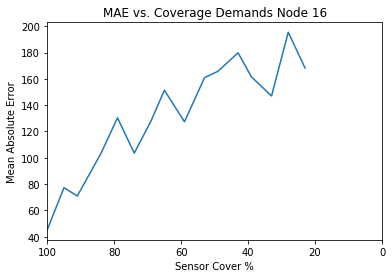

In [11]:
plt.plot(sensors_covered, maximum_MAE)
plt.ylabel("Mean Absolute Error")
plt.xlabel("Sensor Cover %")
plt.title("MAE vs. Coverage Demands Node 16")
plt.xlim([100, 0])
plt.savefig('/Users/alexellard/Downloads/Node16DemandsMax.png')
plt.show()

In [27]:
#average scores pressure node 29

MAE_average = []
maximum_MAE = []
sensors_covered = []
n_columns_to_drop = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
for n in n_columns_to_drop:
    MAE = []
    for run in range(1,11):
        Y = df[df.columns[61]]
        X = df.drop(columns=['node_29_pressure'])
        X['node_29_pressure'] = Y
        columns = []
        columns_to_drop = random.sample(list(X.columns), n)
        # Drop the selected columns from the dataframe
        if X.columns[-1] in columns_to_drop:
            columns_to_drop.remove(X.columns[-1])
        X.drop(columns_to_drop, axis=1, inplace=True)
        columns.append(columns_to_drop)
        print(columns)
        print('starting df shape:', X.shape)
        print(f'This is training run {run} and has the shape: ', X.shape)
        print(f'The value of dropped columns is {n}')

        values = X.values
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled = scaler.fit_transform(values)
        train, test = train_test_split(scaled, test_size=0.2, random_state=0)

        # split into input and outputs
        train_X, train_y = train[:, :-1], train[:, -1]
        test_X, test_y = test[:, :-1], test[:, -1]

        #define model
        model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.9,
            colsample_bytree=0.8,
            random_state=42
        )

        # fit the model on the training data
        model.fit(train_X, train_y)

        # make predictions on the test data
        y_pred = model.predict(test_X)

        test_y = test_y.reshape((len(test_y), 1))
        print('test y shape :', test_y.shape)
        inv_test_y = concatenate((test_y, test_X[:, -X.shape[1]:]), axis=1)
        print('Inv y shape :', inv_test_y.shape)
        test_y_inverse = scaler.inverse_transform(inv_test_y)
        test_y_inverse = test_y_inverse[:,0]

        scaled = scaler.fit_transform(values)
        train, test = train_test_split(scaled, test_size=0.2, random_state=0)

        # split into input and outputs
        train_X, train_y = train[:, :-1], train[:, -1]
        test_X, test_y = test[:, :-1], test[:, -1]

        #define model
        model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.9,
            colsample_bytree=0.8,
            random_state=42
        )

        # fit the model on the training data
        model.fit(train_X, train_y)

        # make predictions on the test data
        y_pred = model.predict(test_X)

        test_y = test_y.reshape((len(test_y), 1))
        print('test y shape :', test_y.shape)
        inv_test_y = concatenate((test_y, test_X[:, -X.shape[1]:]), axis=1)
        print('Inv y shape :', inv_test_y.shape)
        test_y_inverse = scaler.inverse_transform(inv_test_y)
        test_y_inverse = test_y_inverse[:,0]

        y_pred = y_pred.reshape((len(y_pred), 1))
        print('y pred shape :', y_pred.shape)
        inv_y_pred = concatenate((y_pred, test_X[:, -X.shape[1]:]), axis=1)
        print('inv y pred :', inv_y_pred.shape)
        y_pred_inverse = scaler.inverse_transform(inv_y_pred)
        y_pred_inverse = y_pred_inverse[:,0]

        # evaluate scaled errors
        mae_inverse = mean_absolute_error(test_y_inverse, y_pred_inverse)
        MAE.append(mae_inverse)
        print(f'Run {run} Mean Absolute Error:', mae_inverse)
    percentage_list = round(X.shape[1] / 96 * 100)
    sensors_covered.append(percentage_list)
    MAE_mean = mean(MAE)
    max_MAE = max(MAE)
    maximum_MAE.append(max_MAE)
    MAE_average.append(MAE_mean)
print('Length MAE_average: ', len(MAE_average))
print('Length sensors_covered: ', len(sensors_covered))

[[]]
starting df shape: (87600, 96)
This is training run 1 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 1 Mean Absolute Error: 2.7127859912848926
[[]]
starting df shape: (87600, 96)
This is training run 2 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 2 Mean Absolute Error: 2.7127859912848926
[[]]
starting df shape: (87600, 96)
This is training run 3 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 3 Mean Absolute Error: 2.7127859912848926
[[]]
starting df shape: (87600, 96)
This is training run 4 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 4 Mean Absolute Error: 2.7127859912848926
[[]]
starting df shape: (87600, 96)
This is training run 5 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 5 Mean Absolute Error: 2.7127859912848926
[[]]
starting df shape: (87600, 96)
This is training run 6 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 6 Mean Absolute Error: 2.7127859912848926
[[]]
starting df shape: (87600, 96)
This is training run 7 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 7 Mean Absolute Error: 2.7127859912848926
[[]]
starting df shape: (87600, 96)
This is training run 8 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 8 Mean Absolute Error: 2.7127859912848926
[[]]
starting df shape: (87600, 96)
This is training run 9 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 9 Mean Absolute Error: 2.7127859912848926
[[]]
starting df shape: (87600, 96)
This is training run 10 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 10 Mean Absolute Error: 2.7127859912848926
[['link_2_flow', 'node_31_pressure', 'link_27_flow', 'link_30_flow', 'link_28_flow']]
starting df shape: (87600, 91)
This is training run 1 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 1 Mean Absolute Error: 2.8204500457207637
[['reservoir_demand', 'node_14_demand', 'link_11_flow', 'node_6_demand']]
starting df shape: (87600, 92)
This is training run 2 and has the shape:  (87600, 92)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 92)
y pred shape : (17520, 1)
inv y pred : (17520, 92)
Run 2 Mean Absolute Error: 0.17484362617621724
[['link_2_flow', 'link_20_flow', 'node_5_pressure', 'node_31_pressure', 'node_6_pressure']]
starting df shape: (87600, 91)
This is training run 3 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 3 Mean Absolute Error: 2.893928064847281
[['node_23_demand', 'link_3_flow', 'link_25_flow', 'node_24_pressure', 'node_22_pressure']]
starting df shape: (87600, 91)
This is training run 4 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 4 Mean Absolute Error: 2.7574662901599356
[['node_2_pressure', 'node_30_demand', 'node_1_pressure', 'node_17_pressure', 'node_29_demand']]
starting df shape: (87600, 91)
This is training run 5 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 5 Mean Absolute Error: 2.827740406952229
[['node_15_pressure', 'node_10_demand', 'node_20_demand', 'node_22_pressure', 'node_2_demand']]
starting df shape: (87600, 91)
This is training run 6 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 6 Mean Absolute Error: 2.7551927910909684
[['node_6_pressure', 'reservoir_demand', 'link_1_flow', 'node_12_pressure', 'link_20_flow']]
starting df shape: (87600, 91)
This is training run 7 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 7 Mean Absolute Error: 0.16783310878632438
[['node_30_pressure', 'link_28_flow', 'node_20_demand', 'link_20_flow', 'node_5_demand']]
starting df shape: (87600, 91)
This is training run 8 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 8 Mean Absolute Error: 4.016847804772096
[['link_14_flow', 'node_16_demand', 'node_11_demand', 'link_19_flow', 'node_23_demand']]
starting df shape: (87600, 91)
This is training run 9 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 9 Mean Absolute Error: 2.747833256320979
[['link_18_flow', 'node_23_pressure', 'node_15_pressure', 'node_20_pressure', 'node_19_pressure']]
starting df shape: (87600, 91)
This is training run 10 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 10 Mean Absolute Error: 3.1331711653642547
[['node_14_pressure', 'node_7_pressure', 'link_21_flow', 'link_1_flow', 'link_24_flow', 'node_14_demand', 'node_9_pressure', 'node_26_pressure', 'link_13_flow', 'node_29_demand']]
starting df shape: (87600, 86)
This is training run 1 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 1 Mean Absolute Error: 3.4349050148981224
[['node_5_demand', 'link_32_flow', 'node_26_pressure', 'link_31_flow', 'node_22_pressure', 'link_10_flow', 'node_4_pressure', 'reservoir_demand', 'link_11_flow', 'node_1_pressure']]
starting df shape: (87600, 86)
This is training run 2 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 2 Mean Absolute Error: 0.20780544982646998
[['link_11_flow', 'link_18_flow', 'node_5_pressure', 'node_3_demand', 'node_26_pressure', 'reservoir_pressure', 'node_4_pressure', 'link_8_flow', 'node_12_demand', 'node_23_pressure']]
starting df shape: (87600, 86)
This is training run 3 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 3 Mean Absolute Error: 3.156372590443887
[['node_8_pressure', 'link_24_flow', 'node_5_pressure', 'node_17_demand', 'node_4_pressure', 'reservoir_pressure', 'link_10_flow', 'link_18_flow', 'node_1_demand', 'node_23_demand']]
starting df shape: (87600, 86)
This is training run 4 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 4 Mean Absolute Error: 3.14389242871667
[['node_20_demand', 'node_11_pressure', 'node_3_demand', 'link_19_flow', 'node_6_demand', 'link_15_flow', 'link_4_flow', 'reservoir_demand', 'node_28_demand', 'node_25_pressure']]
starting df shape: (87600, 86)
This is training run 5 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 5 Mean Absolute Error: 0.1956448569351539
[['link_23_flow', 'node_10_demand', 'node_26_pressure', 'link_20_flow', 'node_1_demand', 'node_11_demand', 'link_8_flow', 'link_3_flow', 'node_13_pressure', 'node_16_demand']]
starting df shape: (87600, 86)
This is training run 6 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 6 Mean Absolute Error: 3.4204444902947606
[['node_9_demand', 'link_10_flow', 'node_10_pressure', 'node_14_pressure', 'node_30_pressure', 'node_3_demand', 'link_29_flow', 'node_7_demand', 'link_22_flow', 'node_17_pressure']]
starting df shape: (87600, 86)
This is training run 7 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 7 Mean Absolute Error: 4.456401646592376
[['node_5_demand', 'reservoir_demand', 'node_2_demand', 'node_19_demand', 'link_21_flow', 'node_19_pressure', 'node_29_demand', 'node_11_pressure', 'node_24_demand', 'node_13_pressure']]
starting df shape: (87600, 86)
This is training run 8 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 8 Mean Absolute Error: 0.17147251120046317
[['node_9_demand', 'node_27_pressure', 'node_28_pressure', 'node_12_demand', 'link_2_flow', 'node_10_pressure', 'node_20_demand', 'link_22_flow', 'node_14_demand']]
starting df shape: (87600, 87)
This is training run 9 and has the shape:  (87600, 87)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 87)
y pred shape : (17520, 1)
inv y pred : (17520, 87)
Run 9 Mean Absolute Error: 3.1597369603295977
[['node_30_demand', 'link_19_flow', 'link_21_flow', 'node_8_demand', 'node_3_demand', 'link_24_flow', 'link_30_flow', 'node_1_demand', 'node_22_demand', 'link_13_flow']]
starting df shape: (87600, 86)
This is training run 10 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 10 Mean Absolute Error: 3.0640931212280926
[['link_31_flow', 'link_32_flow', 'node_19_demand', 'node_8_demand', 'link_10_flow', 'node_3_pressure', 'node_11_demand', 'node_27_demand', 'link_9_flow', 'node_21_demand', 'node_3_demand', 'node_2_pressure', 'node_25_pressure', 'link_27_flow', 'link_23_flow']]
starting df shape: (87600, 81)
This is training run 1 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 1 Mean Absolute Error: 3.028245634792411
[['link_27_flow', 'node_19_pressure', 'node_21_pressure', 'link_8_flow', 'node_21_demand', 'link_16_flow', 'node_28_pressure', 'node_1_demand', 'link_28_flow', 'node_26_pressure', 'node_2_demand', 'node_13_pressure', 'node_5_pressure', 'node_11_demand', 'node_9_pressure']]
starting df shape: (87600, 81)
This is training run 2 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 2 Mean Absolute Error: 2.9542387349248553
[['link_20_flow', 'node_21_pressure', 'node_5_demand', 'link_1_flow', 'node_25_pressure', 'node_11_pressure', 'node_5_pressure', 'node_15_demand', 'node_4_pressure', 'link_25_flow', 'node_11_demand', 'node_3_pressure', 'reservoir_demand', 'node_28_pressure']]
starting df shape: (87600, 82)
This is training run 3 and has the shape:  (87600, 82)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 82)
y pred shape : (17520, 1)
inv y pred : (17520, 82)
Run 3 Mean Absolute Error: 0.18191739840876772
[['node_31_demand', 'node_17_pressure', 'link_9_flow', 'node_3_pressure', 'node_7_demand', 'node_7_pressure', 'link_31_flow', 'node_4_demand', 'link_11_flow', 'link_20_flow', 'node_14_demand', 'link_26_flow', 'node_30_pressure', 'link_27_flow', 'node_8_pressure']]
starting df shape: (87600, 81)
This is training run 4 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 4 Mean Absolute Error: 4.247095581736203
[['node_21_demand', 'link_30_flow', 'link_8_flow', 'link_7_flow', 'node_7_demand', 'link_21_flow', 'node_25_pressure', 'node_2_demand', 'node_27_pressure', 'node_14_pressure', 'node_28_pressure', 'node_3_pressure', 'node_6_demand', 'node_4_pressure', 'node_12_pressure']]
starting df shape: (87600, 81)
This is training run 5 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 5 Mean Absolute Error: 3.0353584203384125
[['node_15_pressure', 'node_26_pressure', 'link_31_flow', 'node_1_pressure', 'node_2_demand', 'link_2_flow', 'node_12_pressure', 'link_22_flow', 'node_26_demand', 'node_15_demand', 'link_26_flow', 'link_4_flow', 'node_10_pressure', 'node_7_pressure', 'link_25_flow']]
starting df shape: (87600, 81)
This is training run 6 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 6 Mean Absolute Error: 3.023229143332654
[['node_11_pressure', 'node_6_pressure', 'node_24_demand', 'node_27_demand', 'link_26_flow', 'link_8_flow', 'node_14_pressure', 'node_2_pressure', 'reservoir_pressure', 'node_11_demand', 'link_5_flow', 'link_32_flow', 'node_2_demand', 'node_13_demand']]
starting df shape: (87600, 82)
This is training run 7 and has the shape:  (87600, 82)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 82)
y pred shape : (17520, 1)
inv y pred : (17520, 82)
Run 7 Mean Absolute Error: 2.9036511621020766
[['node_30_demand', 'link_3_flow', 'link_32_flow', 'node_21_demand', 'node_4_pressure', 'link_12_flow', 'node_26_pressure', 'node_3_demand', 'link_10_flow', 'node_2_pressure', 'node_1_demand', 'node_22_demand', 'node_12_pressure', 'node_28_pressure']]
starting df shape: (87600, 82)
This is training run 8 and has the shape:  (87600, 82)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 82)
y pred shape : (17520, 1)
inv y pred : (17520, 82)
Run 8 Mean Absolute Error: 3.2803954691946355
[['link_24_flow', 'link_28_flow', 'node_8_demand', 'link_15_flow', 'node_5_demand', 'node_23_demand', 'reservoir_pressure', 'node_13_demand', 'node_30_pressure', 'node_9_pressure', 'node_22_demand', 'node_28_demand', 'node_13_pressure', 'node_26_demand', 'node_1_pressure']]
starting df shape: (87600, 81)
This is training run 9 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 9 Mean Absolute Error: 4.084561816971311
[['node_13_demand', 'node_12_demand', 'node_20_demand', 'link_21_flow', 'node_12_pressure', 'reservoir_pressure', 'node_29_demand', 'node_24_pressure', 'node_21_demand', 'node_3_demand', 'link_22_flow', 'node_27_demand', 'node_7_demand', 'link_24_flow', 'node_19_demand']]
starting df shape: (87600, 81)
This is training run 10 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 10 Mean Absolute Error: 3.0800540187283665
[['link_25_flow', 'link_1_flow', 'link_10_flow', 'node_1_demand', 'node_17_pressure', 'link_13_flow', 'link_11_flow', 'link_9_flow', 'node_9_pressure', 'link_19_flow', 'node_22_demand', 'link_22_flow', 'link_5_flow', 'link_31_flow', 'node_31_demand', 'node_30_demand', 'node_15_pressure', 'node_27_demand', 'link_7_flow', 'node_17_demand']]
starting df shape: (87600, 76)
This is training run 1 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 1 Mean Absolute Error: 2.6948716065850817
[['node_1_pressure', 'link_31_flow', 'link_4_flow', 'link_22_flow', 'link_28_flow', 'link_16_flow', 'node_23_demand', 'link_5_flow', 'node_14_pressure', 'node_14_demand', 'link_19_flow', 'link_14_flow', 'link_1_flow', 'node_13_demand', 'link_30_flow', 'link_25_flow', 'node_26_pressure', 'node_12_pressure', 'node_19_pressure']]
starting df shape: (87600, 77)
This is training run 2 and has the shape:  (87600, 77)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 77)
y pred shape : (17520, 1)
inv y pred : (17520, 77)
Run 2 Mean Absolute Error: 3.241016206904757
[['node_4_demand', 'link_11_flow', 'reservoir_pressure', 'reservoir_demand', 'node_24_pressure', 'node_9_pressure', 'link_18_flow', 'link_28_flow', 'node_22_pressure', 'link_23_flow', 'node_15_demand', 'link_22_flow', 'node_21_demand', 'node_12_pressure', 'node_10_pressure', 'link_30_flow', 'link_7_flow', 'link_14_flow', 'node_5_demand', 'node_26_demand']]
starting df shape: (87600, 76)
This is training run 3 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 3 Mean Absolute Error: 0.20242619265672931
[['node_28_demand', 'link_18_flow', 'node_8_demand', 'node_23_demand', 'link_14_flow', 'node_3_pressure', 'reservoir_pressure', 'node_25_pressure', 'link_21_flow', 'node_5_pressure', 'node_1_demand', 'link_32_flow', 'node_24_pressure', 'node_28_pressure', 'link_26_flow', 'node_11_pressure', 'link_4_flow', 'node_20_pressure', 'link_16_flow', 'node_4_pressure']]
starting df shape: (87600, 76)
This is training run 4 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 4 Mean Absolute Error: 2.909825378237279
[['node_24_demand', 'node_9_pressure', 'node_24_pressure', 'node_27_demand', 'link_20_flow', 'link_6_flow', 'node_8_pressure', 'link_17_flow', 'node_19_pressure', 'link_13_flow', 'node_17_demand', 'link_5_flow', 'node_14_demand', 'link_26_flow', 'node_11_demand', 'node_10_pressure', 'node_20_demand', 'link_11_flow', 'link_12_flow', 'node_1_pressure']]
starting df shape: (87600, 76)
This is training run 5 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 5 Mean Absolute Error: 3.3105686435937303
[['link_5_flow', 'node_8_demand', 'node_30_demand', 'node_4_demand', 'node_24_demand', 'link_19_flow', 'link_31_flow', 'node_21_pressure', 'link_17_flow', 'node_29_demand', 'node_9_demand', 'link_21_flow', 'node_26_demand', 'node_23_pressure', 'node_11_pressure', 'link_3_flow', 'node_16_demand', 'node_20_demand', 'link_8_flow', 'node_27_demand']]
starting df shape: (87600, 76)
This is training run 6 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 6 Mean Absolute Error: 2.7250043083175783
[['link_11_flow', 'node_5_demand', 'link_21_flow', 'link_15_flow', 'link_17_flow', 'link_13_flow', 'node_3_demand', 'node_10_pressure', 'node_29_demand', 'link_14_flow', 'node_14_demand', 'node_12_demand', 'link_29_flow', 'node_2_pressure', 'node_27_demand', 'node_19_pressure', 'node_5_pressure', 'node_28_pressure', 'link_18_flow', 'node_2_demand']]
starting df shape: (87600, 76)
This is training run 7 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 7 Mean Absolute Error: 3.6222467940885212
[['link_14_flow', 'node_24_pressure', 'node_22_demand', 'link_11_flow', 'link_19_flow', 'node_7_demand', 'node_10_pressure', 'node_19_demand', 'link_13_flow', 'link_26_flow', 'link_28_flow', 'node_5_demand', 'node_18_demand', 'link_12_flow', 'node_16_pressure', 'node_30_demand', 'link_23_flow', 'reservoir_pressure', 'node_27_pressure']]
starting df shape: (87600, 77)
This is training run 8 and has the shape:  (87600, 77)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 77)
y pred shape : (17520, 1)
inv y pred : (17520, 77)
Run 8 Mean Absolute Error: 2.6947772412279387
[['node_31_pressure', 'node_3_pressure', 'link_27_flow', 'link_21_flow', 'link_20_flow', 'node_8_demand', 'link_4_flow', 'node_13_demand', 'link_13_flow', 'node_10_demand', 'reservoir_demand', 'link_26_flow', 'node_16_demand', 'node_5_pressure', 'node_10_pressure', 'link_32_flow', 'link_16_flow', 'node_20_demand', 'link_2_flow', 'node_11_pressure']]
starting df shape: (87600, 76)
This is training run 9 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 9 Mean Absolute Error: 0.17976487292436755
[['node_9_pressure', 'node_3_demand', 'node_7_pressure', 'node_26_pressure', 'node_22_pressure', 'link_9_flow', 'node_30_demand', 'link_29_flow', 'link_27_flow', 'node_1_demand', 'link_32_flow', 'node_20_demand', 'node_3_pressure', 'link_28_flow', 'node_30_pressure', 'node_7_demand', 'node_18_demand', 'node_2_demand', 'node_15_demand', 'node_13_demand']]
starting df shape: (87600, 76)
This is training run 10 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 10 Mean Absolute Error: 4.76118719392813
[['node_1_demand', 'node_22_demand', 'node_8_demand', 'node_16_demand', 'node_24_pressure', 'link_29_flow', 'link_23_flow', 'node_4_demand', 'link_13_flow', 'node_11_demand', 'link_18_flow', 'node_23_pressure', 'node_31_pressure', 'node_9_demand', 'node_5_pressure', 'node_24_demand', 'link_28_flow', 'link_6_flow', 'node_2_demand', 'node_27_demand', 'node_30_pressure', 'node_27_pressure', 'node_20_pressure', 'node_7_pressure']]
starting df shape: (87600, 72)
This is training run 1 and has the shape:  (87600, 72)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 72)
y pred shape : (17520, 1)
inv y pred : (17520, 72)
Run 1 Mean Absolute Error: 6.074687819867647
[['node_26_demand', 'link_16_flow', 'reservoir_pressure', 'node_3_demand', 'node_14_pressure', 'node_20_demand', 'node_20_pressure', 'node_8_pressure', 'node_15_demand', 'node_21_pressure', 'node_19_demand', 'link_20_flow', 'link_25_flow', 'link_23_flow', 'node_14_demand', 'node_21_demand', 'node_30_pressure', 'link_7_flow', 'node_27_pressure', 'node_23_demand', 'node_22_pressure', 'node_19_pressure', 'node_24_pressure', 'link_9_flow', 'link_1_flow']]
starting df shape: (87600, 71)
This is training run 2 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 2 Mean Absolute Error: 3.9893352979947414
[['node_11_pressure', 'link_24_flow', 'node_28_demand', 'link_5_flow', 'node_30_demand', 'node_9_pressure', 'link_26_flow', 'node_5_demand', 'node_15_pressure', 'link_3_flow', 'link_2_flow', 'node_11_demand', 'node_20_pressure', 'node_25_pressure', 'link_17_flow', 'node_2_demand', 'node_28_pressure', 'link_13_flow', 'node_31_pressure', 'link_16_flow', 'node_29_demand', 'node_13_pressure', 'link_25_flow', 'link_4_flow', 'link_22_flow']]
starting df shape: (87600, 71)
This is training run 3 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 3 Mean Absolute Error: 3.321245311773593
[['link_31_flow', 'link_5_flow', 'link_8_flow', 'node_25_demand', 'node_20_demand', 'link_20_flow', 'node_21_pressure', 'node_24_demand', 'link_19_flow', 'link_2_flow', 'node_31_pressure', 'node_4_demand', 'node_5_demand', 'node_12_demand', 'node_28_demand', 'node_1_demand', 'reservoir_pressure', 'link_14_flow', 'node_19_pressure', 'link_16_flow', 'node_27_demand', 'node_12_pressure', 'node_5_pressure', 'link_9_flow']]
starting df shape: (87600, 72)
This is training run 4 and has the shape:  (87600, 72)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 72)
y pred shape : (17520, 1)
inv y pred : (17520, 72)
Run 4 Mean Absolute Error: 3.1655591149139526
[['node_31_demand', 'link_29_flow', 'link_21_flow', 'node_21_demand', 'node_2_pressure', 'link_10_flow', 'node_19_pressure', 'node_25_pressure', 'link_26_flow', 'node_15_demand', 'link_13_flow', 'node_11_pressure', 'node_7_demand', 'reservoir_demand', 'node_17_demand', 'node_13_demand', 'link_32_flow', 'link_18_flow', 'node_28_pressure', 'node_30_demand', 'link_8_flow', 'node_5_pressure', 'link_7_flow', 'link_3_flow']]
starting df shape: (87600, 72)
This is training run 5 and has the shape:  (87600, 72)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 72)
y pred shape : (17520, 1)
inv y pred : (17520, 72)
Run 5 Mean Absolute Error: 0.22882061260995254
[['node_31_pressure', 'node_27_demand', 'node_17_demand', 'node_29_demand', 'node_22_pressure', 'node_1_pressure', 'node_14_demand', 'node_25_demand', 'link_21_flow', 'node_4_pressure', 'node_26_demand', 'link_25_flow', 'node_2_pressure', 'link_28_flow', 'node_12_pressure', 'node_21_pressure', 'node_2_demand', 'node_19_demand', 'link_7_flow', 'node_9_pressure', 'link_32_flow', 'node_17_pressure', 'node_6_demand', 'node_13_pressure', 'node_7_pressure']]
starting df shape: (87600, 71)
This is training run 6 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 6 Mean Absolute Error: 2.778304347453497
[['node_12_demand', 'node_24_pressure', 'node_20_demand', 'node_15_demand', 'node_13_pressure', 'link_10_flow', 'link_4_flow', 'node_27_demand', 'node_3_pressure', 'node_4_demand', 'node_11_demand', 'node_23_demand', 'node_14_pressure', 'link_11_flow', 'node_9_demand', 'link_23_flow', 'node_23_pressure', 'node_16_demand', 'reservoir_demand', 'node_29_demand', 'node_3_demand', 'node_2_demand', 'link_14_flow', 'link_13_flow', 'link_22_flow']]
starting df shape: (87600, 71)
This is training run 7 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 7 Mean Absolute Error: 0.1694336935227597
[['node_30_pressure', 'node_19_demand', 'node_10_pressure', 'link_7_flow', 'node_5_pressure', 'node_20_demand', 'node_2_demand', 'node_10_demand', 'node_14_pressure', 'node_12_pressure', 'link_2_flow', 'node_16_pressure', 'link_1_flow', 'node_2_pressure', 'node_14_demand', 'node_6_pressure', 'link_32_flow', 'node_1_pressure', 'link_27_flow', 'node_15_pressure', 'link_5_flow', 'link_26_flow', 'node_8_demand', 'node_26_pressure', 'reservoir_demand']]
starting df shape: (87600, 71)
This is training run 8 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 8 Mean Absolute Error: 0.22951749374822797
[['node_11_pressure', 'link_24_flow', 'link_28_flow', 'node_2_pressure', 'node_3_demand', 'node_26_demand', 'node_25_pressure', 'node_15_pressure', 'node_31_pressure', 'link_26_flow', 'link_31_flow', 'node_19_demand', 'link_10_flow', 'link_8_flow', 'link_5_flow', 'node_20_demand', 'link_21_flow', 'node_22_demand', 'node_4_pressure', 'node_3_pressure', 'link_22_flow', 'node_23_pressure', 'node_28_pressure', 'node_26_pressure', 'link_23_flow']]
starting df shape: (87600, 71)
This is training run 9 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 9 Mean Absolute Error: 3.237961451501084
[['link_21_flow', 'link_11_flow', 'node_31_demand', 'node_12_pressure', 'link_17_flow', 'reservoir_demand', 'node_3_pressure', 'link_24_flow', 'node_30_pressure', 'node_8_pressure', 'node_4_demand', 'link_7_flow', 'node_31_pressure', 'link_20_flow', 'node_10_demand', 'node_6_pressure', 'link_32_flow', 'node_1_demand', 'node_30_demand', 'link_18_flow', 'node_24_pressure', 'link_2_flow', 'link_15_flow', 'node_14_demand', 'node_15_pressure']]
starting df shape: (87600, 71)
This is training run 10 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 10 Mean Absolute Error: 0.30636575139539995
[['node_23_pressure', 'node_16_pressure', 'node_17_pressure', 'node_8_demand', 'node_3_pressure', 'node_27_pressure', 'node_11_demand', 'node_7_pressure', 'node_25_pressure', 'node_3_demand', 'node_15_pressure', 'node_28_pressure', 'link_9_flow', 'node_22_pressure', 'link_31_flow', 'node_20_demand', 'link_11_flow', 'node_7_demand', 'link_6_flow', 'node_2_demand', 'link_7_flow', 'link_1_flow', 'node_25_demand', 'link_5_flow', 'node_22_demand', 'link_15_flow', 'node_21_demand', 'node_26_demand', 'node_16_demand']]
starting df shape: (87600, 67)
This is training run 1 and has the shape:  (87600, 67)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 67)
y pred shape : (17520, 1)
inv y pred : (17520, 67)
Run 1 Mean Absolute Error: 2.724510879109192
[['node_7_pressure', 'node_5_pressure', 'link_8_flow', 'node_13_pressure', 'node_14_pressure', 'node_31_pressure', 'link_6_flow', 'node_13_demand', 'link_13_flow', 'node_9_demand', 'node_25_pressure', 'node_16_pressure', 'node_17_pressure', 'node_1_pressure', 'node_30_pressure', 'link_23_flow', 'node_23_demand', 'link_3_flow', 'reservoir_demand', 'reservoir_pressure', 'node_11_demand', 'node_12_demand', 'link_30_flow', 'node_14_demand', 'node_24_pressure', 'node_28_demand', 'node_25_demand', 'node_17_demand', 'link_26_flow', 'node_18_pressure']]
starting df shape: (87600, 66)
This is training run 2 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 2 Mean Absolute Error: 0.3558325972689633
[['node_30_demand', 'node_27_pressure', 'node_26_pressure', 'node_9_pressure', 'node_22_pressure', 'link_21_flow', 'node_20_pressure', 'node_6_demand', 'node_22_demand', 'node_14_demand', 'reservoir_pressure', 'link_19_flow', 'reservoir_demand', 'link_16_flow', 'node_12_demand', 'node_3_pressure', 'node_25_demand', 'node_26_demand', 'link_15_flow', 'link_2_flow', 'node_3_demand', 'node_17_pressure', 'link_22_flow', 'node_16_demand', 'link_28_flow', 'node_5_demand', 'node_10_demand', 'link_4_flow', 'link_20_flow', 'link_12_flow']]
starting df shape: (87600, 66)
This is training run 3 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 3 Mean Absolute Error: 0.17634048800965668
[['link_5_flow', 'node_21_demand', 'node_4_demand', 'link_26_flow', 'node_23_demand', 'node_8_pressure', 'node_10_pressure', 'node_12_pressure', 'link_4_flow', 'node_17_pressure', 'node_5_demand', 'link_31_flow', 'node_15_pressure', 'node_9_pressure', 'link_15_flow', 'link_3_flow', 'node_2_demand', 'link_18_flow', 'node_19_pressure', 'node_31_demand', 'link_30_flow', 'node_22_demand', 'link_6_flow', 'node_7_demand', 'node_28_pressure', 'link_12_flow', 'link_27_flow', 'node_17_demand', 'node_21_pressure', 'link_22_flow']]
starting df shape: (87600, 66)
This is training run 4 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 4 Mean Absolute Error: 3.3814742689754778
[['node_14_demand', 'node_11_pressure', 'node_9_demand', 'node_23_pressure', 'link_4_flow', 'node_30_demand', 'node_29_demand', 'node_17_demand', 'node_10_pressure', 'reservoir_demand', 'link_20_flow', 'node_19_demand', 'node_10_demand', 'link_13_flow', 'link_15_flow', 'link_21_flow', 'node_6_pressure', 'link_11_flow', 'node_16_pressure', 'link_7_flow', 'node_22_pressure', 'node_13_pressure', 'node_20_demand', 'node_25_demand', 'node_12_demand', 'node_27_demand', 'node_15_pressure', 'reservoir_pressure', 'link_25_flow', 'link_5_flow']]
starting df shape: (87600, 66)
This is training run 5 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 5 Mean Absolute Error: 0.2072742081901538
[['link_23_flow', 'link_20_flow', 'link_27_flow', 'link_30_flow', 'node_15_demand', 'link_9_flow', 'node_21_pressure', 'node_3_demand', 'node_30_pressure', 'node_15_pressure', 'link_10_flow', 'node_9_pressure', 'node_10_demand', 'node_14_pressure', 'link_22_flow', 'node_18_pressure', 'link_25_flow', 'node_9_demand', 'node_19_pressure', 'link_12_flow', 'node_5_pressure', 'link_21_flow', 'node_22_pressure', 'node_17_pressure', 'node_11_demand', 'link_5_flow', 'link_16_flow', 'node_20_demand', 'node_19_demand', 'node_14_demand']]
starting df shape: (87600, 66)
This is training run 6 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 6 Mean Absolute Error: 3.6311641902423952
[['node_9_pressure', 'node_9_demand', 'link_26_flow', 'node_27_demand', 'node_5_demand', 'node_3_demand', 'node_8_pressure', 'link_5_flow', 'node_27_pressure', 'link_2_flow', 'node_3_pressure', 'node_17_demand', 'node_16_pressure', 'link_6_flow', 'node_5_pressure', 'node_25_pressure', 'reservoir_demand', 'node_19_demand', 'node_6_demand', 'node_4_pressure', 'node_31_demand', 'link_8_flow', 'link_13_flow', 'link_24_flow', 'node_30_demand', 'link_9_flow', 'node_10_demand', 'node_19_pressure', 'link_11_flow', 'link_20_flow']]
starting df shape: (87600, 66)
This is training run 7 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 7 Mean Absolute Error: 0.17986647150697813
[['link_31_flow', 'link_32_flow', 'node_25_demand', 'node_21_demand', 'link_5_flow', 'link_9_flow', 'node_15_demand', 'link_20_flow', 'link_27_flow', 'node_22_pressure', 'link_11_flow', 'link_7_flow', 'link_3_flow', 'node_11_pressure', 'link_30_flow', 'link_25_flow', 'node_14_demand', 'link_24_flow', 'node_18_pressure', 'link_21_flow', 'node_7_demand', 'node_9_pressure', 'link_22_flow', 'link_29_flow', 'node_1_pressure', 'node_10_demand', 'node_18_demand', 'link_10_flow', 'node_3_demand', 'node_20_pressure']]
starting df shape: (87600, 66)
This is training run 8 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 8 Mean Absolute Error: 3.388387874708029
[['link_19_flow', 'node_19_pressure', 'link_32_flow', 'node_25_demand', 'node_12_pressure', 'node_27_pressure', 'link_11_flow', 'link_20_flow', 'node_6_pressure', 'node_7_pressure', 'node_20_demand', 'node_30_demand', 'link_8_flow', 'link_28_flow', 'node_15_demand', 'link_23_flow', 'node_1_demand', 'node_11_pressure', 'node_7_demand', 'node_22_demand', 'node_16_pressure', 'link_24_flow', 'node_5_demand', 'link_5_flow', 'node_9_pressure', 'node_19_demand', 'node_12_demand', 'node_17_demand', 'link_3_flow', 'link_25_flow']]
starting df shape: (87600, 66)
This is training run 9 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 9 Mean Absolute Error: 2.8577528020846845
[['link_26_flow', 'link_10_flow', 'link_21_flow', 'node_20_pressure', 'link_18_flow', 'link_20_flow', 'node_11_pressure', 'node_20_demand', 'link_27_flow', 'link_8_flow', 'node_22_pressure', 'node_29_demand', 'node_24_pressure', 'node_15_pressure', 'link_15_flow', 'node_17_pressure', 'node_3_demand', 'node_5_pressure', 'node_7_demand', 'node_21_pressure', 'node_9_pressure', 'node_8_pressure', 'node_14_pressure', 'node_1_pressure', 'link_32_flow', 'link_12_flow', 'link_6_flow', 'node_24_demand', 'node_28_demand']]
starting df shape: (87600, 67)
This is training run 10 and has the shape:  (87600, 67)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 67)
y pred shape : (17520, 1)
inv y pred : (17520, 67)
Run 10 Mean Absolute Error: 2.9148524319786793
[['node_27_pressure', 'link_18_flow', 'node_4_demand', 'link_5_flow', 'node_22_demand', 'link_31_flow', 'node_10_demand', 'node_3_demand', 'node_9_demand', 'node_5_pressure', 'node_15_demand', 'node_26_pressure', 'node_16_pressure', 'node_17_pressure', 'reservoir_demand', 'link_16_flow', 'link_24_flow', 'link_32_flow', 'link_26_flow', 'link_28_flow', 'node_1_demand', 'node_13_demand', 'link_23_flow', 'node_26_demand', 'node_8_demand', 'link_21_flow', 'link_27_flow', 'node_28_demand', 'link_25_flow', 'node_13_pressure', 'link_10_flow', 'node_18_demand', 'link_7_flow', 'node_5_demand', 'node_31_demand']]
starting df shape: (87600, 61)
This is training run 1 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 1 Mean Absolute Error: 0.1534320694305959
[['node_30_demand', 'node_16_pressure', 'node_24_demand', 'link_2_flow', 'link_25_flow', 'node_1_demand', 'node_19_pressure', 'node_27_pressure', 'node_13_pressure', 'link_30_flow', 'node_4_pressure', 'node_28_demand', 'node_2_demand', 'node_26_pressure', 'node_9_pressure', 'link_9_flow', 'node_26_demand', 'node_3_demand', 'link_16_flow', 'link_31_flow', 'link_8_flow', 'link_22_flow', 'node_3_pressure', 'node_18_demand', 'link_18_flow', 'node_25_demand', 'node_15_demand', 'link_7_flow', 'link_24_flow', 'node_17_demand', 'link_11_flow', 'node_27_demand', 'node_20_pressure', 'node_6_pressure']]
starting df shape: (87600, 62)
This is training run 2 and has the shape:  (87600, 62)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 62)
y pred shape : (17520, 1)
inv y pred : (17520, 62)
Run 2 Mean Absolute Error: 3.4254751374605754
[['node_26_pressure', 'link_3_flow', 'node_20_pressure', 'link_29_flow', 'node_8_pressure', 'link_6_flow', 'link_15_flow', 'node_8_demand', 'link_11_flow', 'node_31_demand', 'link_2_flow', 'node_13_demand', 'node_15_demand', 'node_14_pressure', 'node_18_demand', 'link_16_flow', 'node_30_pressure', 'link_31_flow', 'node_5_pressure', 'link_32_flow', 'node_3_demand', 'link_5_flow', 'node_24_pressure', 'link_28_flow', 'link_13_flow', 'node_6_demand', 'link_1_flow', 'node_17_pressure', 'link_30_flow', 'node_9_pressure', 'node_9_demand', 'link_19_flow', 'node_30_demand', 'link_25_flow', 'node_4_demand']]
starting df shape: (87600, 61)
This is training run 3 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 3 Mean Absolute Error: 4.498840439009341
[['node_20_demand', 'node_13_demand', 'node_5_pressure', 'node_22_demand', 'node_26_demand', 'link_30_flow', 'link_3_flow', 'link_16_flow', 'node_15_pressure', 'link_13_flow', 'node_12_pressure', 'node_2_pressure', 'node_27_pressure', 'link_32_flow', 'link_18_flow', 'node_26_pressure', 'link_1_flow', 'node_17_pressure', 'node_29_demand', 'node_11_pressure', 'reservoir_pressure', 'node_12_demand', 'node_14_pressure', 'link_28_flow', 'node_18_pressure', 'link_11_flow', 'node_6_demand', 'node_10_demand', 'node_16_pressure', 'node_13_pressure', 'node_4_pressure', 'node_20_pressure', 'node_24_pressure', 'node_2_demand', 'link_23_flow']]
starting df shape: (87600, 61)
This is training run 4 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 4 Mean Absolute Error: 2.9133314093531837
[['node_18_pressure', 'link_30_flow', 'node_12_pressure', 'link_2_flow', 'node_26_pressure', 'node_23_pressure', 'node_26_demand', 'link_17_flow', 'node_22_demand', 'node_19_demand', 'link_1_flow', 'node_28_pressure', 'node_29_demand', 'link_5_flow', 'node_27_demand', 'link_9_flow', 'node_18_demand', 'node_6_demand', 'link_25_flow', 'link_6_flow', 'node_11_pressure', 'link_15_flow', 'node_5_pressure', 'node_24_pressure', 'node_1_pressure', 'link_20_flow', 'node_19_pressure', 'node_21_pressure', 'node_31_demand', 'node_25_demand', 'node_30_demand', 'node_25_pressure', 'node_16_pressure', 'node_5_demand', 'link_27_flow']]
starting df shape: (87600, 61)
This is training run 5 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 5 Mean Absolute Error: 3.754829294753265
[['link_5_flow', 'link_16_flow', 'node_2_demand', 'node_6_pressure', 'node_13_demand', 'node_5_demand', 'node_21_demand', 'node_15_demand', 'link_15_flow', 'node_4_demand', 'link_22_flow', 'node_26_demand', 'link_32_flow', 'node_28_demand', 'link_28_flow', 'link_27_flow', 'link_29_flow', 'node_18_demand', 'link_8_flow', 'node_16_demand', 'link_12_flow', 'node_23_demand', 'node_23_pressure', 'link_9_flow', 'node_22_demand', 'node_28_pressure', 'node_29_demand', 'node_5_pressure', 'link_6_flow', 'node_11_demand', 'node_14_pressure', 'node_6_demand', 'node_27_pressure', 'node_30_pressure']]
starting df shape: (87600, 62)
This is training run 6 and has the shape:  (87600, 62)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 62)
y pred shape : (17520, 1)
inv y pred : (17520, 62)
Run 6 Mean Absolute Error: 5.109680174649069
[['node_2_demand', 'node_18_demand', 'link_13_flow', 'node_30_pressure', 'node_29_demand', 'link_12_flow', 'link_19_flow', 'link_11_flow', 'node_13_demand', 'link_14_flow', 'node_3_demand', 'node_21_demand', 'link_21_flow', 'node_9_pressure', 'node_7_pressure', 'link_27_flow', 'node_5_demand', 'link_29_flow', 'node_24_pressure', 'node_8_demand', 'node_28_demand', 'node_25_pressure', 'reservoir_demand', 'node_19_pressure', 'node_26_pressure', 'link_26_flow', 'link_16_flow', 'node_31_pressure', 'node_15_pressure', 'node_12_demand', 'node_14_pressure', 'link_8_flow', 'reservoir_pressure', 'node_31_demand']]
starting df shape: (87600, 62)
This is training run 7 and has the shape:  (87600, 62)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 62)
y pred shape : (17520, 1)
inv y pred : (17520, 62)
Run 7 Mean Absolute Error: 0.39189472891697913
[['node_28_demand', 'node_2_demand', 'node_21_demand', 'link_21_flow', 'node_15_demand', 'node_9_demand', 'node_11_demand', 'node_27_demand', 'node_17_pressure', 'node_29_demand', 'node_13_demand', 'node_25_demand', 'link_18_flow', 'node_3_demand', 'link_13_flow', 'node_24_pressure', 'node_8_pressure', 'node_12_pressure', 'link_20_flow', 'link_3_flow', 'node_15_pressure', 'node_12_demand', 'node_16_demand', 'link_11_flow', 'node_5_pressure', 'link_16_flow', 'node_10_demand', 'link_15_flow', 'node_14_pressure', 'node_17_demand', 'link_26_flow', 'node_28_pressure', 'node_1_pressure', 'link_14_flow', 'link_8_flow']]
starting df shape: (87600, 61)
This is training run 8 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 8 Mean Absolute Error: 3.3569402375153325
[['link_15_flow', 'node_11_demand', 'node_13_demand', 'node_15_pressure', 'node_14_pressure', 'node_14_demand', 'node_10_demand', 'link_12_flow', 'node_4_pressure', 'node_20_pressure', 'link_8_flow', 'node_30_demand', 'node_2_pressure', 'node_19_pressure', 'node_6_demand', 'node_31_pressure', 'node_22_pressure', 'link_17_flow', 'node_21_demand', 'link_4_flow', 'node_25_demand', 'link_32_flow', 'node_30_pressure', 'node_5_demand', 'node_18_demand', 'node_24_pressure', 'node_7_demand', 'node_24_demand', 'node_22_demand', 'link_27_flow', 'link_10_flow', 'node_15_demand', 'node_8_pressure', 'link_19_flow', 'link_25_flow']]
starting df shape: (87600, 61)
This is training run 9 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 9 Mean Absolute Error: 5.670083046434953
[['link_32_flow', 'link_13_flow', 'node_12_pressure', 'node_1_pressure', 'node_15_demand', 'node_24_pressure', 'node_22_pressure', 'node_1_demand', 'node_17_pressure', 'link_5_flow', 'node_18_demand', 'node_26_demand', 'reservoir_pressure', 'node_29_demand', 'node_19_demand', 'node_21_demand', 'link_6_flow', 'node_16_pressure', 'link_31_flow', 'node_6_pressure', 'node_15_pressure', 'link_24_flow', 'link_19_flow', 'link_29_flow', 'node_4_pressure', 'node_9_demand', 'node_5_demand', 'link_23_flow', 'link_12_flow', 'link_16_flow', 'node_14_pressure', 'link_10_flow', 'node_10_pressure', 'link_28_flow']]
starting df shape: (87600, 62)
This is training run 10 and has the shape:  (87600, 62)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 62)
y pred shape : (17520, 1)
inv y pred : (17520, 62)
Run 10 Mean Absolute Error: 3.2466611346617364
[['node_24_demand', 'node_30_demand', 'node_3_demand', 'node_27_pressure', 'node_15_demand', 'node_6_pressure', 'node_5_demand', 'link_18_flow', 'link_22_flow', 'link_11_flow', 'node_9_demand', 'node_20_demand', 'node_25_demand', 'node_17_pressure', 'node_14_demand', 'node_15_pressure', 'link_21_flow', 'node_22_pressure', 'node_26_demand', 'node_19_pressure', 'node_23_pressure', 'node_2_demand', 'node_28_pressure', 'node_13_pressure', 'node_4_demand', 'link_16_flow', 'link_9_flow', 'node_9_pressure', 'node_8_pressure', 'link_6_flow', 'link_12_flow', 'node_8_demand', 'link_15_flow', 'node_10_demand', 'link_10_flow', 'node_25_pressure', 'node_27_demand', 'link_32_flow', 'link_26_flow', 'node_17_demand']]
starting df shape: (87600, 56)
This is training run 1 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 1 Mean Absolute Error: 3.097653881130197
[['node_13_demand', 'node_4_demand', 'node_9_demand', 'node_31_pressure', 'node_21_demand', 'node_12_pressure', 'link_5_flow', 'node_2_pressure', 'link_20_flow', 'node_10_pressure', 'node_19_pressure', 'node_26_demand', 'node_6_demand', 'link_2_flow', 'link_12_flow', 'node_28_demand', 'link_3_flow', 'node_3_pressure', 'link_28_flow', 'node_22_demand', 'node_16_demand', 'link_14_flow', 'node_17_pressure', 'node_17_demand', 'link_1_flow', 'link_22_flow', 'node_13_pressure', 'node_4_pressure', 'node_15_demand', 'node_18_pressure', 'node_25_pressure', 'link_31_flow', 'link_18_flow', 'node_3_demand', 'node_6_pressure', 'link_21_flow', 'node_14_demand', 'link_17_flow', 'link_29_flow']]
starting df shape: (87600, 57)
This is training run 2 and has the shape:  (87600, 57)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 57)
y pred shape : (17520, 1)
inv y pred : (17520, 57)
Run 2 Mean Absolute Error: 3.270066257838054
[['node_27_pressure', 'node_2_demand', 'node_12_pressure', 'node_31_pressure', 'node_19_pressure', 'link_32_flow', 'node_12_demand', 'link_12_flow', 'node_25_demand', 'node_28_demand', 'node_30_pressure', 'link_1_flow', 'link_24_flow', 'link_19_flow', 'link_16_flow', 'node_26_pressure', 'link_8_flow', 'node_1_demand', 'node_1_pressure', 'node_7_demand', 'node_10_demand', 'node_5_demand', 'node_11_demand', 'node_16_pressure', 'link_31_flow', 'link_17_flow', 'node_22_pressure', 'reservoir_demand', 'node_28_pressure', 'node_9_pressure', 'node_24_demand', 'node_20_demand', 'link_5_flow', 'node_6_demand', 'node_14_pressure', 'node_22_demand', 'node_4_demand', 'node_10_pressure', 'reservoir_pressure', 'link_2_flow']]
starting df shape: (87600, 56)
This is training run 3 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 3 Mean Absolute Error: 0.07303060480737673
[['link_21_flow', 'node_13_demand', 'node_9_demand', 'link_2_flow', 'node_20_pressure', 'node_19_pressure', 'node_4_demand', 'node_15_pressure', 'node_13_pressure', 'link_30_flow', 'node_14_pressure', 'node_28_demand', 'link_9_flow', 'link_7_flow', 'node_19_demand', 'node_6_pressure', 'node_28_pressure', 'link_18_flow', 'link_19_flow', 'link_26_flow', 'node_11_pressure', 'node_22_pressure', 'link_22_flow', 'node_30_pressure', 'link_16_flow', 'reservoir_demand', 'node_26_pressure', 'link_17_flow', 'node_18_demand', 'link_4_flow', 'node_21_pressure', 'node_27_pressure', 'link_6_flow', 'node_3_demand', 'node_8_demand', 'node_2_pressure', 'node_30_demand', 'link_10_flow', 'node_31_demand', 'node_23_pressure']]
starting df shape: (87600, 56)
This is training run 4 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 4 Mean Absolute Error: 0.30673836257709847
[['link_14_flow', 'reservoir_pressure', 'link_4_flow', 'node_26_demand', 'link_15_flow', 'node_31_demand', 'link_27_flow', 'node_9_demand', 'node_25_pressure', 'node_18_pressure', 'node_12_pressure', 'node_11_demand', 'node_21_demand', 'node_3_pressure', 'link_17_flow', 'node_20_pressure', 'node_29_demand', 'link_29_flow', 'link_13_flow', 'node_23_demand', 'node_1_pressure', 'node_12_demand', 'node_27_pressure', 'node_10_pressure', 'node_7_pressure', 'link_20_flow', 'node_9_pressure', 'link_23_flow', 'node_27_demand', 'node_14_pressure', 'link_3_flow', 'node_7_demand', 'node_23_pressure', 'link_6_flow', 'link_18_flow', 'node_21_pressure', 'link_12_flow', 'node_16_demand', 'link_7_flow', 'node_17_demand']]
starting df shape: (87600, 56)
This is training run 5 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 5 Mean Absolute Error: 2.9159426966496818
[['link_19_flow', 'node_7_demand', 'link_16_flow', 'node_20_pressure', 'link_3_flow', 'link_32_flow', 'node_13_demand', 'node_15_demand', 'node_5_demand', 'link_8_flow', 'link_11_flow', 'node_23_pressure', 'reservoir_pressure', 'link_23_flow', 'link_29_flow', 'node_12_demand', 'link_21_flow', 'node_15_pressure', 'node_6_pressure', 'node_19_pressure', 'node_24_pressure', 'node_22_pressure', 'node_11_demand', 'node_24_demand', 'node_17_demand', 'node_29_demand', 'node_21_pressure', 'link_28_flow', 'node_9_pressure', 'node_19_demand', 'link_15_flow', 'link_5_flow', 'link_7_flow', 'node_26_demand', 'link_9_flow', 'node_5_pressure', 'node_31_pressure', 'node_10_pressure', 'link_24_flow', 'link_6_flow']]
starting df shape: (87600, 56)
This is training run 6 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 6 Mean Absolute Error: 3.115560118139526
[['node_11_pressure', 'node_4_demand', 'node_9_demand', 'node_12_pressure', 'node_8_pressure', 'link_10_flow', 'node_27_demand', 'node_6_demand', 'node_20_demand', 'node_1_pressure', 'node_22_pressure', 'link_5_flow', 'link_6_flow', 'link_4_flow', 'node_13_demand', 'node_7_pressure', 'link_13_flow', 'node_29_demand', 'node_26_demand', 'node_18_demand', 'node_16_demand', 'node_5_pressure', 'node_21_demand', 'node_14_pressure', 'node_13_pressure', 'node_15_pressure', 'link_31_flow', 'node_19_demand', 'node_5_demand', 'node_25_demand', 'link_23_flow', 'link_18_flow', 'node_14_demand', 'link_32_flow', 'link_27_flow', 'link_9_flow', 'link_12_flow', 'node_31_demand', 'link_16_flow', 'node_15_demand']]
starting df shape: (87600, 56)
This is training run 7 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 7 Mean Absolute Error: 2.785070777931601
[['node_23_demand', 'link_17_flow', 'link_10_flow', 'link_7_flow', 'link_3_flow', 'node_15_demand', 'node_19_pressure', 'link_29_flow', 'node_6_demand', 'node_12_pressure', 'node_23_pressure', 'link_12_flow', 'link_6_flow', 'link_1_flow', 'node_16_demand', 'node_27_pressure', 'node_3_pressure', 'node_20_demand', 'link_30_flow', 'node_2_demand', 'node_11_pressure', 'node_25_demand', 'link_28_flow', 'link_32_flow', 'node_7_demand', 'node_9_demand', 'link_2_flow', 'node_11_demand', 'node_4_pressure', 'node_6_pressure', 'link_15_flow', 'node_8_pressure', 'node_14_demand', 'link_9_flow', 'node_13_demand', 'link_18_flow', 'link_19_flow', 'node_15_pressure', 'link_22_flow']]
starting df shape: (87600, 57)
This is training run 8 and has the shape:  (87600, 57)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 57)
y pred shape : (17520, 1)
inv y pred : (17520, 57)
Run 8 Mean Absolute Error: 2.9492205247772034
[['node_30_demand', 'node_11_pressure', 'node_21_demand', 'node_16_pressure', 'node_13_pressure', 'node_25_demand', 'link_10_flow', 'node_13_demand', 'node_17_demand', 'node_2_pressure', 'link_21_flow', 'node_19_demand', 'link_15_flow', 'node_4_demand', 'link_17_flow', 'link_18_flow', 'node_26_demand', 'link_4_flow', 'link_28_flow', 'link_6_flow', 'link_27_flow', 'node_14_pressure', 'node_16_demand', 'node_5_demand', 'reservoir_pressure', 'link_32_flow', 'link_20_flow', 'link_2_flow', 'link_3_flow', 'node_23_pressure', 'node_21_pressure', 'node_19_pressure', 'link_16_flow', 'node_9_pressure', 'node_8_pressure', 'node_27_pressure', 'node_18_demand', 'node_3_pressure', 'node_31_demand', 'node_17_pressure']]
starting df shape: (87600, 56)
This is training run 9 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 9 Mean Absolute Error: 2.795016452275077
[['link_18_flow', 'node_1_demand', 'node_23_demand', 'node_13_demand', 'node_21_pressure', 'node_17_demand', 'link_4_flow', 'node_21_demand', 'link_31_flow', 'node_15_demand', 'node_18_demand', 'link_3_flow', 'link_2_flow', 'node_7_pressure', 'link_25_flow', 'node_9_pressure', 'node_14_pressure', 'node_11_pressure', 'node_8_demand', 'node_25_pressure', 'node_3_pressure', 'node_18_pressure', 'node_2_demand', 'node_7_demand', 'node_13_pressure', 'link_28_flow', 'node_6_pressure', 'node_27_demand', 'link_15_flow', 'node_27_pressure', 'node_11_demand', 'node_20_pressure', 'node_28_pressure', 'node_29_demand', 'link_19_flow', 'link_24_flow', 'node_10_demand', 'link_5_flow', 'node_15_pressure', 'node_4_demand']]
starting df shape: (87600, 56)
This is training run 10 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 10 Mean Absolute Error: 3.172922554757488
[['node_24_demand', 'node_31_demand', 'link_1_flow', 'node_23_demand', 'link_9_flow', 'node_12_pressure', 'node_5_demand', 'node_19_demand', 'node_17_pressure', 'link_12_flow', 'node_10_pressure', 'link_19_flow', 'link_17_flow', 'node_20_pressure', 'link_28_flow', 'link_27_flow', 'node_11_pressure', 'node_6_pressure', 'link_29_flow', 'node_18_pressure', 'link_32_flow', 'node_27_pressure', 'node_3_demand', 'node_8_demand', 'link_24_flow', 'node_24_pressure', 'reservoir_demand', 'node_3_pressure', 'link_26_flow', 'link_2_flow', 'link_10_flow', 'link_18_flow', 'node_8_pressure', 'node_14_demand', 'node_31_pressure', 'node_25_demand', 'link_20_flow', 'link_15_flow', 'node_27_demand', 'node_28_demand', 'node_13_demand', 'link_16_flow', 'link_14_flow', 'node_13_pressure']]
starting df shape: (87600, 52)
This is training run 1 and has the shape: 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 52)
y pred shape : (17520, 1)
inv y pred : (17520, 52)
Run 1 Mean Absolute Error: 0.23696390114774238
[['node_11_demand', 'node_29_demand', 'reservoir_pressure', 'link_15_flow', 'node_20_pressure', 'link_5_flow', 'node_1_demand', 'node_11_pressure', 'node_9_demand', 'node_27_demand', 'link_12_flow', 'node_26_pressure', 'node_5_demand', 'link_11_flow', 'link_17_flow', 'link_2_flow', 'link_26_flow', 'link_6_flow', 'link_1_flow', 'node_13_pressure', 'node_7_demand', 'link_9_flow', 'node_8_pressure', 'node_3_pressure', 'link_25_flow', 'node_23_demand', 'node_14_pressure', 'link_31_flow', 'node_26_demand', 'reservoir_demand', 'node_4_pressure', 'link_23_flow', 'link_32_flow', 'node_27_pressure', 'node_15_pressure', 'node_8_demand', 'node_12_pressure', 'node_21_demand', 'node_15_demand', 'node_30_demand', 'node_9_pressure', 'node_18_demand', 'link_27_flow', 'node_31_demand']]
starting df shape: (87600, 52)
This is training run 2 and has the sha

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 52)
y pred shape : (17520, 1)
inv y pred : (17520, 52)
Run 2 Mean Absolute Error: 0.15810671803739998
[['link_8_flow', 'node_10_demand', 'node_16_demand', 'node_28_demand', 'node_17_pressure', 'link_7_flow', 'link_11_flow', 'node_1_pressure', 'link_23_flow', 'link_2_flow', 'node_30_demand', 'link_22_flow', 'node_31_pressure', 'link_21_flow', 'node_27_pressure', 'node_6_demand', 'node_11_demand', 'node_20_demand', 'link_6_flow', 'node_16_pressure', 'node_21_pressure', 'node_23_pressure', 'link_9_flow', 'node_4_pressure', 'node_23_demand', 'node_2_demand', 'node_20_pressure', 'link_26_flow', 'node_11_pressure', 'link_19_flow', 'link_15_flow', 'node_18_pressure', 'node_13_demand', 'node_8_demand', 'reservoir_demand', 'node_27_demand', 'node_19_pressure', 'node_5_demand', 'node_4_demand', 'node_22_demand', 'link_13_flow', 'link_30_flow', 'link_16_flow', 'node_10_pressure', 'link_17_flow']]
starting df shape: (87600, 51)
This is training run 3

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 3 Mean Absolute Error: 0.17657490407192425
[['node_21_demand', 'node_20_pressure', 'node_8_pressure', 'link_19_flow', 'link_26_flow', 'link_13_flow', 'link_23_flow', 'node_13_pressure', 'node_23_demand', 'node_11_demand', 'link_20_flow', 'node_14_pressure', 'link_8_flow', 'node_30_pressure', 'node_19_demand', 'link_5_flow', 'node_28_demand', 'node_15_demand', 'link_27_flow', 'node_22_pressure', 'link_17_flow', 'link_1_flow', 'node_12_demand', 'node_2_pressure', 'node_24_pressure', 'link_4_flow', 'node_30_demand', 'node_17_pressure', 'node_3_demand', 'node_4_demand', 'reservoir_pressure', 'node_13_demand', 'node_26_demand', 'node_4_pressure', 'link_7_flow', 'node_18_pressure', 'link_29_flow', 'node_15_pressure', 'node_17_demand', 'node_27_pressure', 'link_3_flow', 'node_20_demand', 'node_31_demand', 'link_31_flow']]
starting df shape: (87600, 52)
This is training run 4 and has the 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 52)
y pred shape : (17520, 1)
inv y pred : (17520, 52)
Run 4 Mean Absolute Error: 3.81012286590919
[['node_17_demand', 'link_2_flow', 'node_1_pressure', 'node_30_demand', 'link_26_flow', 'node_1_demand', 'node_23_pressure', 'link_1_flow', 'node_18_demand', 'link_20_flow', 'node_16_demand', 'node_8_demand', 'reservoir_pressure', 'link_12_flow', 'link_25_flow', 'node_15_pressure', 'node_14_pressure', 'node_27_demand', 'node_25_pressure', 'node_6_pressure', 'link_14_flow', 'node_11_demand', 'node_10_demand', 'link_32_flow', 'link_24_flow', 'node_14_demand', 'link_15_flow', 'reservoir_demand', 'link_18_flow', 'node_5_pressure', 'node_19_demand', 'node_18_pressure', 'node_20_demand', 'node_21_pressure', 'link_31_flow', 'node_26_pressure', 'node_2_pressure', 'node_12_pressure', 'node_24_pressure', 'node_17_pressure', 'node_22_demand', 'node_4_pressure', 'node_15_demand', 'node_4_demand', 'node_26_demand']]
starting df shape: (87600, 51)
This is

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 5 Mean Absolute Error: 0.15815107650172722
[['link_29_flow', 'link_28_flow', 'link_9_flow', 'link_30_flow', 'node_22_demand', 'link_11_flow', 'node_4_demand', 'link_10_flow', 'node_5_pressure', 'link_8_flow', 'node_15_pressure', 'node_26_demand', 'node_19_pressure', 'node_18_demand', 'link_17_flow', 'node_31_pressure', 'node_8_pressure', 'node_1_demand', 'link_3_flow', 'node_24_pressure', 'node_1_pressure', 'node_4_pressure', 'link_19_flow', 'node_26_pressure', 'link_1_flow', 'link_13_flow', 'node_23_pressure', 'node_11_pressure', 'reservoir_pressure', 'node_24_demand', 'node_27_demand', 'link_18_flow', 'node_12_demand', 'node_28_demand', 'node_9_pressure', 'node_3_demand', 'link_23_flow', 'link_26_flow', 'link_4_flow', 'node_19_demand', 'node_23_demand', 'node_25_demand', 'node_12_pressure', 'reservoir_demand']]
starting df shape: (87600, 52)
This is training run 6 and has the sh

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 52)
y pred shape : (17520, 1)
inv y pred : (17520, 52)
Run 6 Mean Absolute Error: 0.18636115916407434
[['node_24_pressure', 'link_13_flow', 'node_19_demand', 'node_25_pressure', 'node_28_demand', 'node_11_pressure', 'reservoir_pressure', 'node_10_pressure', 'node_17_pressure', 'link_16_flow', 'node_20_pressure', 'link_10_flow', 'link_9_flow', 'node_31_demand', 'link_12_flow', 'link_2_flow', 'link_11_flow', 'link_8_flow', 'node_12_demand', 'node_4_pressure', 'link_6_flow', 'node_9_pressure', 'node_14_demand', 'node_26_demand', 'node_13_demand', 'link_21_flow', 'node_25_demand', 'node_6_pressure', 'node_3_demand', 'node_1_pressure', 'link_19_flow', 'link_5_flow', 'node_7_pressure', 'link_7_flow', 'node_21_demand', 'node_1_demand', 'link_32_flow', 'node_16_demand', 'node_29_demand', 'node_23_pressure', 'node_8_demand', 'node_20_demand', 'node_18_pressure', 'node_8_pressure', 'link_28_flow']]
starting df shape: (87600, 51)
This is training ru

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 7 Mean Absolute Error: 2.9840484695295117
[['node_9_demand', 'node_30_demand', 'node_5_demand', 'node_22_pressure', 'node_17_demand', 'node_13_pressure', 'link_31_flow', 'node_15_pressure', 'link_30_flow', 'reservoir_pressure', 'node_17_pressure', 'link_1_flow', 'node_14_pressure', 'link_28_flow', 'link_24_flow', 'node_2_pressure', 'node_31_pressure', 'link_6_flow', 'node_3_pressure', 'node_30_pressure', 'node_28_pressure', 'node_23_pressure', 'node_26_pressure', 'link_11_flow', 'node_19_demand', 'node_24_demand', 'node_22_demand', 'node_26_demand', 'node_25_demand', 'node_25_pressure', 'node_18_demand', 'node_11_pressure', 'link_32_flow', 'node_31_demand', 'link_25_flow', 'node_7_demand', 'link_29_flow', 'node_14_demand', 'node_27_demand', 'link_14_flow', 'reservoir_demand', 'link_17_flow', 'node_27_pressure', 'node_15_demand']]
starting df shape: (87600, 52)
This is training run

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 52)
y pred shape : (17520, 1)
inv y pred : (17520, 52)
Run 8 Mean Absolute Error: 0.5796895474995177
[['node_8_pressure', 'reservoir_demand', 'link_14_flow', 'node_18_pressure', 'link_13_flow', 'link_29_flow', 'link_27_flow', 'node_23_pressure', 'node_12_pressure', 'node_4_demand', 'link_26_flow', 'link_25_flow', 'link_31_flow', 'link_30_flow', 'node_11_demand', 'node_9_pressure', 'link_10_flow', 'link_4_flow', 'node_28_pressure', 'node_14_pressure', 'node_17_demand', 'node_21_pressure', 'node_24_demand', 'node_25_pressure', 'node_2_pressure', 'link_3_flow', 'node_19_demand', 'node_17_pressure', 'node_27_pressure', 'node_22_pressure', 'node_25_demand', 'link_20_flow', 'link_6_flow', 'node_13_demand', 'link_18_flow', 'reservoir_pressure', 'node_16_pressure', 'node_23_demand', 'node_22_demand', 'node_3_pressure', 'node_30_demand', 'link_17_flow', 'link_11_flow', 'node_31_demand', 'link_23_flow']]
starting df shape: (87600, 51)
This is train

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 9 Mean Absolute Error: 0.2059378658276485
[['link_8_flow', 'node_1_demand', 'link_23_flow', 'node_28_demand', 'node_31_pressure', 'node_13_demand', 'link_2_flow', 'node_28_pressure', 'link_14_flow', 'link_20_flow', 'link_15_flow', 'node_29_demand', 'node_27_demand', 'link_17_flow', 'link_4_flow', 'link_22_flow', 'node_5_pressure', 'node_2_pressure', 'node_9_pressure', 'node_24_pressure', 'link_3_flow', 'link_12_flow', 'link_28_flow', 'node_1_pressure', 'link_11_flow', 'node_23_pressure', 'reservoir_pressure', 'node_21_pressure', 'node_10_demand', 'node_5_demand', 'node_24_demand', 'link_21_flow', 'link_30_flow', 'link_7_flow', 'node_22_demand', 'link_31_flow', 'node_31_demand', 'node_25_pressure', 'node_9_demand', 'node_19_pressure', 'link_5_flow', 'node_17_pressure', 'node_6_demand', 'node_17_demand']]
starting df shape: (87600, 52)
This is training run 10 and has the shape:  (87

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 52)
y pred shape : (17520, 1)
inv y pred : (17520, 52)
Run 10 Mean Absolute Error: 4.648100523336788
[['node_21_demand', 'link_31_flow', 'link_3_flow', 'node_18_demand', 'node_4_pressure', 'node_9_pressure', 'node_17_pressure', 'node_12_pressure', 'node_8_pressure', 'link_10_flow', 'node_29_demand', 'node_28_demand', 'node_26_pressure', 'node_14_pressure', 'link_25_flow', 'node_20_pressure', 'link_32_flow', 'node_13_demand', 'node_5_pressure', 'node_22_pressure', 'link_5_flow', 'node_10_pressure', 'link_28_flow', 'node_23_demand', 'node_15_demand', 'node_21_pressure', 'node_11_demand', 'link_24_flow', 'reservoir_pressure', 'node_3_pressure', 'node_10_demand', 'node_14_demand', 'node_27_pressure', 'node_28_pressure', 'node_3_demand', 'link_9_flow', 'node_31_demand', 'node_19_pressure', 'node_8_demand', 'node_20_demand', 'link_1_flow', 'node_31_pressure', 'node_24_pressure', 'node_2_demand', 'node_4_demand', 'link_4_flow', 'node_11_pressure

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 47)
y pred shape : (17520, 1)
inv y pred : (17520, 47)
Run 1 Mean Absolute Error: 4.021320332797066
[['link_23_flow', 'node_12_demand', 'node_10_pressure', 'link_14_flow', 'link_31_flow', 'node_28_pressure', 'link_2_flow', 'node_8_demand', 'node_11_demand', 'link_21_flow', 'node_21_demand', 'node_3_demand', 'node_22_pressure', 'link_20_flow', 'node_15_demand', 'link_32_flow', 'link_27_flow', 'link_4_flow', 'node_25_demand', 'node_22_demand', 'link_30_flow', 'node_4_demand', 'node_6_demand', 'node_17_pressure', 'node_18_demand', 'link_13_flow', 'node_9_pressure', 'link_9_flow', 'link_24_flow', 'link_16_flow', 'node_1_pressure', 'node_2_demand', 'node_24_demand', 'reservoir_pressure', 'node_21_pressure', 'node_6_pressure', 'node_19_demand', 'node_19_pressure', 'node_5_pressure', 'node_15_pressure', 'node_23_pressure', 'node_5_demand', 'link_3_flow', 'link_12_flow', 'node_14_pressure', 'node_7_demand', 'node_20_pressure', 'node_16_demand', '

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 2 Mean Absolute Error: 3.241602742391803
[['node_16_demand', 'node_16_pressure', 'node_23_demand', 'node_17_pressure', 'node_30_pressure', 'node_23_pressure', 'link_30_flow', 'node_10_pressure', 'node_12_pressure', 'link_23_flow', 'node_19_pressure', 'link_5_flow', 'link_9_flow', 'link_4_flow', 'node_8_demand', 'node_27_pressure', 'link_21_flow', 'node_18_pressure', 'link_25_flow', 'link_24_flow', 'node_11_demand', 'node_2_demand', 'link_16_flow', 'node_8_pressure', 'node_9_demand', 'node_20_demand', 'node_28_pressure', 'node_5_demand', 'node_14_demand', 'node_6_demand', 'link_3_flow', 'node_24_pressure', 'link_31_flow', 'link_11_flow', 'node_6_pressure', 'link_28_flow', 'node_20_pressure', 'node_21_pressure', 'node_15_demand', 'link_13_flow', 'node_2_pressure', 'node_9_pressure', 'link_26_flow', 'link_19_flow', 'node_22_demand', 'node_28_demand', 'link_20_flow', 'node_22_pressure

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 3 Mean Absolute Error: 5.759257066936769
[['node_21_demand', 'node_13_pressure', 'node_25_demand', 'node_22_pressure', 'link_1_flow', 'node_2_demand', 'node_31_demand', 'node_9_pressure', 'link_11_flow', 'node_12_pressure', 'node_15_pressure', 'node_11_pressure', 'node_7_pressure', 'node_31_pressure', 'node_10_demand', 'link_15_flow', 'node_3_pressure', 'link_17_flow', 'link_29_flow', 'node_13_demand', 'node_29_demand', 'link_3_flow', 'reservoir_pressure', 'node_2_pressure', 'link_23_flow', 'link_25_flow', 'node_30_pressure', 'node_3_demand', 'link_26_flow', 'node_17_pressure', 'node_22_demand', 'node_26_pressure', 'node_1_pressure', 'node_28_pressure', 'node_9_demand', 'link_4_flow', 'link_14_flow', 'node_5_pressure', 'link_8_flow', 'node_10_pressure', 'link_28_flow', 'node_25_pressure', 'link_20_flow', 'node_12_demand', 'node_7_demand', 'node_30_demand', 'node_8_pressure', 'node

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 4 Mean Absolute Error: 8.653047549252465
[['node_27_demand', 'link_22_flow', 'node_24_demand', 'link_28_flow', 'node_5_demand', 'node_14_demand', 'node_28_demand', 'link_5_flow', 'node_10_demand', 'node_27_pressure', 'link_19_flow', 'link_24_flow', 'node_22_demand', 'node_31_demand', 'node_15_pressure', 'node_14_pressure', 'node_11_demand', 'node_28_pressure', 'node_10_pressure', 'link_4_flow', 'node_26_demand', 'node_8_demand', 'node_26_pressure', 'link_11_flow', 'link_9_flow', 'link_15_flow', 'node_12_demand', 'node_23_pressure', 'node_22_pressure', 'node_13_pressure', 'node_30_pressure', 'node_25_demand', 'node_4_pressure', 'node_21_demand', 'link_25_flow', 'node_17_demand', 'node_16_pressure', 'reservoir_pressure', 'link_3_flow', 'link_31_flow', 'node_24_pressure', 'node_20_pressure', 'node_18_pressure', 'node_19_pressure', 'node_16_demand', 'node_21_pressure', 'node_2_demand'

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 5 Mean Absolute Error: 5.152064815591067
[['link_27_flow', 'node_16_pressure', 'node_11_pressure', 'node_9_pressure', 'node_2_pressure', 'node_27_pressure', 'reservoir_pressure', 'node_30_pressure', 'node_14_pressure', 'node_12_demand', 'node_1_demand', 'link_7_flow', 'link_3_flow', 'node_17_demand', 'node_1_pressure', 'node_6_demand', 'node_18_demand', 'node_27_demand', 'node_4_pressure', 'node_30_demand', 'node_19_pressure', 'link_24_flow', 'node_18_pressure', 'node_22_pressure', 'link_32_flow', 'node_28_pressure', 'link_26_flow', 'node_29_demand', 'node_28_demand', 'link_4_flow', 'node_10_demand', 'link_25_flow', 'link_2_flow', 'link_22_flow', 'link_20_flow', 'node_6_pressure', 'node_31_pressure', 'node_11_demand', 'node_21_pressure', 'node_24_demand', 'link_31_flow', 'link_21_flow', 'node_13_pressure', 'node_5_demand', 'node_26_pressure', 'node_4_demand', 'link_9_flow', 'link_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 6 Mean Absolute Error: 8.88354194017734
[['reservoir_demand', 'node_6_demand', 'link_22_flow', 'link_18_flow', 'link_10_flow', 'node_12_pressure', 'link_26_flow', 'node_31_pressure', 'node_30_pressure', 'node_13_pressure', 'link_32_flow', 'node_27_demand', 'node_25_demand', 'node_3_pressure', 'node_26_demand', 'node_11_pressure', 'node_19_pressure', 'node_5_pressure', 'node_17_demand', 'node_10_pressure', 'link_23_flow', 'node_18_demand', 'node_7_demand', 'node_4_pressure', 'node_1_demand', 'link_9_flow', 'node_20_demand', 'node_23_pressure', 'link_15_flow', 'node_21_demand', 'link_4_flow', 'link_29_flow', 'node_10_demand', 'node_20_pressure', 'node_22_demand', 'link_27_flow', 'node_4_demand', 'node_16_demand', 'node_17_pressure', 'node_30_demand', 'reservoir_pressure', 'link_20_flow', 'node_29_demand', 'node_22_pressure', 'link_7_flow', 'node_15_pressure', 'link_31_flow', 'link_1

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 47)
y pred shape : (17520, 1)
inv y pred : (17520, 47)
Run 7 Mean Absolute Error: 0.31651389944905634
[['node_22_demand', 'node_13_pressure', 'link_25_flow', 'node_7_pressure', 'node_8_pressure', 'node_6_pressure', 'node_3_pressure', 'node_9_pressure', 'node_16_pressure', 'link_24_flow', 'node_4_pressure', 'node_28_demand', 'node_27_pressure', 'node_10_demand', 'node_31_demand', 'node_11_demand', 'link_11_flow', 'node_27_demand', 'link_15_flow', 'link_1_flow', 'node_18_demand', 'link_6_flow', 'link_8_flow', 'link_4_flow', 'node_9_demand', 'node_20_demand', 'link_19_flow', 'node_3_demand', 'link_23_flow', 'node_5_pressure', 'link_18_flow', 'node_21_demand', 'node_14_demand', 'node_17_demand', 'link_29_flow', 'link_31_flow', 'node_31_pressure', 'node_22_pressure', 'node_11_pressure', 'node_25_pressure', 'link_10_flow', 'node_26_demand', 'node_24_demand', 'node_8_demand', 'node_26_pressure', 'link_27_flow', 'node_21_pressure', 'link_26_flow'

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 47)
y pred shape : (17520, 1)
inv y pred : (17520, 47)
Run 8 Mean Absolute Error: 3.1113485087937547
[['node_28_demand', 'node_14_pressure', 'link_4_flow', 'link_10_flow', 'node_21_demand', 'node_30_pressure', 'link_17_flow', 'node_2_demand', 'node_15_pressure', 'node_10_pressure', 'node_13_pressure', 'link_15_flow', 'node_2_pressure', 'reservoir_pressure', 'node_30_demand', 'node_23_demand', 'node_9_demand', 'node_1_demand', 'node_11_demand', 'link_1_flow', 'link_29_flow', 'node_21_pressure', 'node_6_demand', 'node_26_demand', 'node_4_demand', 'node_10_demand', 'link_21_flow', 'link_5_flow', 'link_32_flow', 'link_27_flow', 'link_30_flow', 'node_23_pressure', 'link_31_flow', 'node_28_pressure', 'link_25_flow', 'node_16_demand', 'link_22_flow', 'node_5_demand', 'node_15_demand', 'node_6_pressure', 'node_18_pressure', 'link_26_flow', 'node_24_demand', 'link_3_flow', 'link_20_flow', 'node_4_pressure', 'node_13_demand', 'node_22_demand', 'lin

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 47)
y pred shape : (17520, 1)
inv y pred : (17520, 47)
Run 9 Mean Absolute Error: 5.120052283119468
[['node_3_pressure', 'node_4_pressure', 'node_29_demand', 'link_7_flow', 'reservoir_pressure', 'link_14_flow', 'link_9_flow', 'link_13_flow', 'link_11_flow', 'node_27_demand', 'link_26_flow', 'node_5_pressure', 'node_12_pressure', 'node_18_pressure', 'link_31_flow', 'node_27_pressure', 'link_29_flow', 'link_27_flow', 'link_21_flow', 'node_2_pressure', 'node_15_demand', 'node_21_demand', 'node_9_pressure', 'link_24_flow', 'link_8_flow', 'node_16_pressure', 'link_10_flow', 'link_2_flow', 'node_10_demand', 'node_9_demand', 'node_30_pressure', 'node_14_pressure', 'reservoir_demand', 'node_4_demand', 'node_17_demand', 'node_7_demand', 'link_32_flow', 'node_28_demand', 'node_16_demand', 'node_23_demand', 'node_20_pressure', 'link_22_flow', 'node_24_pressure', 'link_4_flow', 'node_23_pressure', 'node_2_demand', 'node_31_demand', 'node_20_demand', 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 47)
y pred shape : (17520, 1)
inv y pred : (17520, 47)
Run 10 Mean Absolute Error: 0.2972327406230012
[['node_12_pressure', 'link_26_flow', 'node_19_demand', 'link_23_flow', 'link_29_flow', 'reservoir_demand', 'node_6_demand', 'node_25_demand', 'link_21_flow', 'link_28_flow', 'node_26_demand', 'node_2_pressure', 'node_30_pressure', 'node_28_pressure', 'node_28_demand', 'node_16_pressure', 'node_10_pressure', 'node_30_demand', 'node_23_demand', 'node_13_pressure', 'node_7_demand', 'link_8_flow', 'node_17_demand', 'node_21_pressure', 'link_6_flow', 'node_11_demand', 'node_11_pressure', 'node_14_pressure', 'link_5_flow', 'node_22_pressure', 'node_13_demand', 'node_3_pressure', 'link_13_flow', 'link_19_flow', 'node_21_demand', 'node_18_pressure', 'link_9_flow', 'node_31_pressure', 'node_23_pressure', 'node_27_pressure', 'node_25_pressure', 'node_20_pressure', 'reservoir_pressure', 'node_4_demand', 'node_16_demand', 'node_2_demand', 'node_24_d

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 42)
y pred shape : (17520, 1)
inv y pred : (17520, 42)
Run 1 Mean Absolute Error: 0.5092749664840833
[['node_28_pressure', 'link_7_flow', 'node_7_pressure', 'node_30_pressure', 'link_11_flow', 'node_13_demand', 'node_4_demand', 'node_2_pressure', 'node_9_demand', 'node_8_demand', 'node_1_demand', 'node_19_demand', 'node_27_pressure', 'link_12_flow', 'node_21_demand', 'link_31_flow', 'link_15_flow', 'link_5_flow', 'link_17_flow', 'node_20_pressure', 'node_8_pressure', 'node_16_pressure', 'node_26_demand', 'node_15_pressure', 'link_1_flow', 'node_24_demand', 'node_22_demand', 'node_2_demand', 'node_20_demand', 'node_22_pressure', 'link_9_flow', 'node_3_demand', 'link_3_flow', 'node_3_pressure', 'node_14_pressure', 'node_11_demand', 'link_14_flow', 'node_17_demand', 'link_30_flow', 'node_13_pressure', 'node_6_demand', 'node_10_demand', 'node_28_demand', 'node_6_pressure', 'node_18_demand', 'node_23_pressure', 'link_28_flow', 'link_26_flow', 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 42)
y pred shape : (17520, 1)
inv y pred : (17520, 42)
Run 2 Mean Absolute Error: 6.606371694852907
[['node_16_demand', 'link_15_flow', 'node_29_demand', 'node_7_demand', 'link_21_flow', 'link_18_flow', 'node_19_pressure', 'node_25_pressure', 'link_24_flow', 'link_13_flow', 'node_1_pressure', 'node_31_demand', 'node_14_demand', 'link_12_flow', 'node_13_demand', 'link_32_flow', 'node_17_pressure', 'link_20_flow', 'node_18_demand', 'link_31_flow', 'node_21_demand', 'node_11_pressure', 'node_26_demand', 'node_27_pressure', 'node_4_demand', 'link_3_flow', 'node_28_pressure', 'node_10_demand', 'link_23_flow', 'node_15_demand', 'node_3_pressure', 'node_30_demand', 'link_6_flow', 'node_8_demand', 'node_5_demand', 'node_27_demand', 'link_2_flow', 'node_30_pressure', 'node_2_demand', 'link_17_flow', 'node_12_pressure', 'node_15_pressure', 'node_5_pressure', 'node_1_demand', 'node_9_demand', 'reservoir_pressure', 'link_10_flow', 'node_12_demand', '

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 3 Mean Absolute Error: 8.90432449165529
[['node_5_pressure', 'node_17_pressure', 'link_19_flow', 'node_16_demand', 'link_18_flow', 'node_18_demand', 'node_28_pressure', 'node_17_demand', 'link_26_flow', 'node_25_demand', 'node_2_demand', 'node_9_pressure', 'link_30_flow', 'node_14_demand', 'node_6_pressure', 'node_12_pressure', 'node_10_demand', 'node_6_demand', 'link_13_flow', 'link_3_flow', 'reservoir_demand', 'node_7_demand', 'node_16_pressure', 'node_27_pressure', 'node_29_demand', 'node_31_pressure', 'node_13_pressure', 'node_22_pressure', 'node_2_pressure', 'node_20_pressure', 'link_4_flow', 'node_31_demand', 'link_21_flow', 'node_28_demand', 'node_14_pressure', 'node_20_demand', 'link_14_flow', 'link_31_flow', 'reservoir_pressure', 'link_24_flow', 'node_30_pressure', 'node_11_pressure', 'link_28_flow', 'node_4_demand', 'node_23_pressure', 'node_23_demand', 'link_20_flow', '

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 4 Mean Absolute Error: 0.5149784960374344
[['link_2_flow', 'node_26_demand', 'node_10_demand', 'node_18_demand', 'node_14_demand', 'node_16_demand', 'node_27_pressure', 'node_15_pressure', 'node_29_demand', 'node_12_pressure', 'node_19_pressure', 'node_8_pressure', 'node_1_pressure', 'link_23_flow', 'link_21_flow', 'link_17_flow', 'link_8_flow', 'node_5_pressure', 'node_11_pressure', 'node_17_pressure', 'node_19_demand', 'node_25_pressure', 'link_20_flow', 'link_27_flow', 'node_27_demand', 'node_24_pressure', 'node_22_pressure', 'link_26_flow', 'link_22_flow', 'link_24_flow', 'node_16_pressure', 'node_20_demand', 'node_20_pressure', 'link_5_flow', 'node_17_demand', 'node_24_demand', 'node_10_pressure', 'link_11_flow', 'node_3_pressure', 'node_12_demand', 'node_31_demand', 'node_31_pressure', 'link_31_flow', 'node_6_pressure', 'link_15_flow', 'node_13_pressure', 'node_4_demand', 'n

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 5 Mean Absolute Error: 5.753891493060842
[['node_6_demand', 'link_14_flow', 'node_21_demand', 'link_28_flow', 'node_10_pressure', 'node_24_pressure', 'link_11_flow', 'link_27_flow', 'link_21_flow', 'link_20_flow', 'node_28_demand', 'link_22_flow', 'node_12_pressure', 'node_24_demand', 'node_17_demand', 'link_8_flow', 'link_5_flow', 'node_4_demand', 'link_18_flow', 'node_28_pressure', 'node_9_pressure', 'link_32_flow', 'node_1_pressure', 'link_13_flow', 'link_23_flow', 'link_10_flow', 'node_18_demand', 'node_27_pressure', 'link_16_flow', 'node_16_demand', 'node_23_pressure', 'node_6_pressure', 'node_16_pressure', 'link_15_flow', 'node_1_demand', 'link_30_flow', 'node_14_demand', 'node_18_pressure', 'node_4_pressure', 'node_9_demand', 'node_3_demand', 'link_1_flow', 'link_9_flow', 'node_26_demand', 'reservoir_pressure', 'node_3_pressure', 'node_10_demand', 'node_17_pressure', 'node_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 6 Mean Absolute Error: 2.7772426363019833
[['reservoir_demand', 'node_11_demand', 'link_21_flow', 'node_26_demand', 'link_7_flow', 'link_5_flow', 'link_8_flow', 'node_1_demand', 'node_14_pressure', 'link_23_flow', 'node_30_pressure', 'node_19_demand', 'node_12_demand', 'link_10_flow', 'node_25_demand', 'node_30_demand', 'node_23_pressure', 'node_20_demand', 'node_8_demand', 'link_28_flow', 'node_3_pressure', 'node_24_demand', 'node_27_demand', 'node_16_demand', 'link_30_flow', 'link_2_flow', 'reservoir_pressure', 'node_5_demand', 'link_22_flow', 'node_28_pressure', 'link_1_flow', 'node_22_demand', 'node_17_pressure', 'link_19_flow', 'node_13_pressure', 'node_27_pressure', 'node_21_pressure', 'node_6_demand', 'node_15_demand', 'link_31_flow', 'node_6_pressure', 'node_18_pressure', 'node_29_demand', 'node_12_pressure', 'node_13_demand', 'link_9_flow', 'node_2_demand', 'node_5_pressu

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 7 Mean Absolute Error: 0.0530148500971861
[['link_6_flow', 'node_11_demand', 'link_18_flow', 'node_3_demand', 'node_27_pressure', 'node_10_pressure', 'node_1_demand', 'link_5_flow', 'link_28_flow', 'link_30_flow', 'node_31_demand', 'link_20_flow', 'node_27_demand', 'node_19_pressure', 'node_7_demand', 'node_24_demand', 'node_16_pressure', 'node_2_demand', 'node_28_pressure', 'node_9_pressure', 'node_20_pressure', 'node_8_pressure', 'node_15_pressure', 'node_13_pressure', 'link_25_flow', 'node_6_demand', 'node_21_pressure', 'node_15_demand', 'link_15_flow', 'node_9_demand', 'link_8_flow', 'node_17_pressure', 'node_1_pressure', 'node_10_demand', 'node_30_pressure', 'node_30_demand', 'node_4_pressure', 'node_14_pressure', 'node_11_pressure', 'link_1_flow', 'node_12_pressure', 'link_23_flow', 'node_22_demand', 'node_18_demand', 'link_21_flow', 'link_14_flow', 'node_21_demand', 'node_2

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 8 Mean Absolute Error: 0.20631546136723727
[['link_22_flow', 'link_26_flow', 'link_15_flow', 'node_8_pressure', 'node_27_pressure', 'link_30_flow', 'link_11_flow', 'node_5_demand', 'node_17_pressure', 'node_6_pressure', 'link_17_flow', 'link_12_flow', 'node_23_demand', 'node_2_pressure', 'link_32_flow', 'link_2_flow', 'link_9_flow', 'reservoir_pressure', 'node_21_pressure', 'node_9_pressure', 'node_3_demand', 'link_3_flow', 'node_20_demand', 'link_1_flow', 'node_13_pressure', 'node_8_demand', 'node_22_demand', 'node_31_demand', 'link_6_flow', 'node_28_pressure', 'link_14_flow', 'node_10_demand', 'link_27_flow', 'link_13_flow', 'node_11_pressure', 'node_26_demand', 'node_25_demand', 'node_22_pressure', 'node_16_demand', 'link_31_flow', 'node_3_pressure', 'node_19_demand', 'link_23_flow', 'node_31_pressure', 'node_7_pressure', 'node_5_pressure', 'link_28_flow', 'node_12_demand', 'no

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 9 Mean Absolute Error: 2.87475031350625
[['node_14_demand', 'node_25_demand', 'node_8_demand', 'node_18_demand', 'link_21_flow', 'node_4_pressure', 'node_19_demand', 'node_16_demand', 'node_15_pressure', 'node_23_pressure', 'node_18_pressure', 'link_11_flow', 'node_27_demand', 'node_26_demand', 'node_2_pressure', 'node_9_pressure', 'node_9_demand', 'link_5_flow', 'node_26_pressure', 'link_10_flow', 'node_21_pressure', 'link_26_flow', 'node_7_demand', 'node_10_pressure', 'link_29_flow', 'link_3_flow', 'link_13_flow', 'link_27_flow', 'node_19_pressure', 'node_24_demand', 'node_20_pressure', 'node_1_pressure', 'link_7_flow', 'link_32_flow', 'node_22_demand', 'node_30_pressure', 'link_4_flow', 'link_23_flow', 'node_17_demand', 'link_8_flow', 'node_27_pressure', 'node_30_demand', 'node_3_demand', 'link_16_flow', 'link_22_flow', 'link_31_flow', 'node_22_pressure', 'link_9_flow', 'link_6

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 10 Mean Absolute Error: 4.472696929513843
[['node_30_demand', 'link_14_flow', 'node_15_pressure', 'node_1_pressure', 'link_27_flow', 'node_7_pressure', 'node_24_demand', 'node_13_pressure', 'node_15_demand', 'link_7_flow', 'link_25_flow', 'node_27_demand', 'node_14_pressure', 'link_32_flow', 'node_19_demand', 'link_29_flow', 'node_30_pressure', 'node_8_demand', 'link_22_flow', 'link_12_flow', 'link_15_flow', 'node_26_demand', 'node_12_demand', 'node_6_demand', 'node_24_pressure', 'link_9_flow', 'link_28_flow', 'link_4_flow', 'node_21_pressure', 'link_18_flow', 'node_2_demand', 'link_19_flow', 'node_11_pressure', 'link_24_flow', 'node_4_demand', 'node_13_demand', 'link_31_flow', 'link_3_flow', 'node_5_pressure', 'node_16_pressure', 'node_10_pressure', 'node_9_demand', 'node_18_demand', 'link_30_flow', 'link_6_flow', 'node_16_demand', 'link_8_flow', 'node_17_pressure', 'reservoir_pr

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 1 Mean Absolute Error: 4.3622633576953245
[['link_11_flow', 'node_24_demand', 'node_8_pressure', 'node_11_demand', 'node_20_pressure', 'link_12_flow', 'link_8_flow', 'node_21_demand', 'node_31_demand', 'node_18_pressure', 'node_6_pressure', 'node_10_pressure', 'node_23_demand', 'link_1_flow', 'link_24_flow', 'node_25_demand', 'node_12_demand', 'node_17_demand', 'link_3_flow', 'node_7_demand', 'link_2_flow', 'reservoir_pressure', 'node_26_demand', 'link_20_flow', 'node_9_pressure', 'link_5_flow', 'node_17_pressure', 'link_19_flow', 'node_4_pressure', 'node_13_pressure', 'node_27_pressure', 'node_6_demand', 'link_25_flow', 'node_5_pressure', 'node_1_demand', 'link_23_flow', 'node_2_pressure', 'link_31_flow', 'link_26_flow', 'link_14_flow', 'link_27_flow', 'link_15_flow', 'node_29_demand', 'node_3_demand', 'node_30_demand', 'node_25_pressure', 'node_2_demand', 'node_23_pressure', 'li

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 36)
y pred shape : (17520, 1)
inv y pred : (17520, 36)
Run 2 Mean Absolute Error: 3.404668973772041
[['node_22_pressure', 'node_19_demand', 'node_13_pressure', 'node_8_pressure', 'link_6_flow', 'node_20_demand', 'reservoir_pressure', 'link_3_flow', 'node_3_demand', 'link_24_flow', 'node_20_pressure', 'node_25_pressure', 'node_21_pressure', 'node_6_pressure', 'node_14_pressure', 'link_4_flow', 'node_30_pressure', 'node_15_pressure', 'node_27_pressure', 'link_21_flow', 'node_5_pressure', 'link_19_flow', 'link_17_flow', 'node_22_demand', 'node_18_pressure', 'node_18_demand', 'node_30_demand', 'node_17_demand', 'link_11_flow', 'node_11_demand', 'node_16_demand', 'node_9_demand', 'link_10_flow', 'node_14_demand', 'node_3_pressure', 'node_31_demand', 'node_8_demand', 'node_5_demand', 'link_20_flow', 'link_23_flow', 'link_32_flow', 'node_16_pressure', 'link_13_flow', 'link_7_flow', 'node_28_pressure', 'node_6_demand', 'node_29_demand', 'node_1_d

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 36)
y pred shape : (17520, 1)
inv y pred : (17520, 36)
Run 3 Mean Absolute Error: 4.192593444098681
[['node_27_pressure', 'node_14_demand', 'node_9_demand', 'node_13_pressure', 'node_3_demand', 'link_26_flow', 'node_19_pressure', 'link_9_flow', 'node_30_pressure', 'link_14_flow', 'link_17_flow', 'reservoir_pressure', 'link_7_flow', 'link_24_flow', 'node_24_pressure', 'link_13_flow', 'node_16_demand', 'node_18_pressure', 'link_31_flow', 'node_6_pressure', 'link_21_flow', 'node_9_pressure', 'link_11_flow', 'node_16_pressure', 'node_5_demand', 'node_25_demand', 'node_14_pressure', 'node_30_demand', 'node_11_demand', 'node_21_demand', 'node_20_pressure', 'link_19_flow', 'node_31_pressure', 'link_18_flow', 'node_8_pressure', 'node_20_demand', 'node_11_pressure', 'link_25_flow', 'link_32_flow', 'node_4_pressure', 'node_31_demand', 'node_3_pressure', 'node_17_demand', 'node_7_demand', 'node_12_demand', 'node_10_demand', 'node_12_pressure', 'node

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 4 Mean Absolute Error: 10.517217025313412
[['node_27_demand', 'node_19_demand', 'node_17_demand', 'node_3_pressure', 'link_30_flow', 'node_15_pressure', 'node_16_demand', 'link_25_flow', 'node_26_demand', 'node_6_pressure', 'node_20_demand', 'link_28_flow', 'node_23_pressure', 'node_18_pressure', 'node_2_demand', 'node_22_pressure', 'link_21_flow', 'node_20_pressure', 'node_15_demand', 'link_9_flow', 'node_16_pressure', 'node_30_pressure', 'link_22_flow', 'node_10_demand', 'reservoir_demand', 'node_30_demand', 'node_1_demand', 'node_21_demand', 'link_23_flow', 'link_7_flow', 'link_11_flow', 'link_2_flow', 'node_17_pressure', 'node_14_demand', 'link_14_flow', 'node_9_pressure', 'link_5_flow', 'node_19_pressure', 'link_27_flow', 'node_7_demand', 'link_29_flow', 'link_19_flow', 'link_15_flow', 'node_4_pressure', 'node_6_demand', 'link_26_flow', 'node_25_demand', 'node_23_demand', 'no

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 5 Mean Absolute Error: 0.27695502977988096
[['link_5_flow', 'node_26_demand', 'link_24_flow', 'node_25_demand', 'link_27_flow', 'node_13_pressure', 'node_19_demand', 'node_1_demand', 'link_22_flow', 'node_1_pressure', 'link_26_flow', 'link_17_flow', 'link_11_flow', 'node_2_demand', 'node_6_demand', 'node_17_pressure', 'reservoir_pressure', 'node_5_demand', 'link_7_flow', 'node_3_demand', 'node_15_pressure', 'node_10_demand', 'node_20_demand', 'node_23_pressure', 'link_12_flow', 'node_19_pressure', 'link_6_flow', 'node_12_demand', 'node_22_pressure', 'node_14_pressure', 'link_30_flow', 'node_4_demand', 'node_21_demand', 'node_13_demand', 'link_25_flow', 'node_27_pressure', 'link_19_flow', 'node_18_pressure', 'node_27_demand', 'node_20_pressure', 'node_16_pressure', 'node_28_demand', 'node_23_demand', 'node_22_demand', 'node_11_demand', 'link_28_flow', 'link_32_flow', 'node_4_pressu

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 6 Mean Absolute Error: 2.930913590572183
[['node_19_pressure', 'node_16_pressure', 'node_26_pressure', 'node_10_pressure', 'link_9_flow', 'link_14_flow', 'link_23_flow', 'node_30_demand', 'node_22_pressure', 'node_1_demand', 'node_2_demand', 'node_18_pressure', 'node_3_demand', 'node_18_demand', 'node_3_pressure', 'link_25_flow', 'node_25_demand', 'node_2_pressure', 'link_17_flow', 'node_7_pressure', 'node_4_demand', 'link_8_flow', 'node_21_pressure', 'node_28_pressure', 'node_27_demand', 'node_15_demand', 'node_26_demand', 'link_24_flow', 'node_12_pressure', 'node_14_pressure', 'link_20_flow', 'node_13_demand', 'node_10_demand', 'link_10_flow', 'link_21_flow', 'link_28_flow', 'link_26_flow', 'link_13_flow', 'link_11_flow', 'node_20_demand', 'node_21_demand', 'link_16_flow', 'node_11_pressure', 'node_7_demand', 'node_28_demand', 'link_12_flow', 'link_2_flow', 'node_5_pressure', 'n

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 36)
y pred shape : (17520, 1)
inv y pred : (17520, 36)
Run 7 Mean Absolute Error: 4.2475123042865635
[['node_3_pressure', 'reservoir_demand', 'link_10_flow', 'link_8_flow', 'link_32_flow', 'node_19_pressure', 'node_20_demand', 'node_29_demand', 'node_1_pressure', 'node_10_demand', 'node_2_demand', 'node_26_demand', 'node_24_demand', 'node_6_demand', 'node_14_demand', 'node_15_pressure', 'node_11_demand', 'node_12_demand', 'node_5_demand', 'link_20_flow', 'node_28_pressure', 'link_27_flow', 'node_16_demand', 'link_12_flow', 'link_16_flow', 'node_19_demand', 'node_13_demand', 'link_1_flow', 'node_20_pressure', 'link_21_flow', 'node_27_pressure', 'node_22_demand', 'node_8_demand', 'node_30_demand', 'node_21_pressure', 'link_7_flow', 'link_13_flow', 'node_23_pressure', 'link_22_flow', 'link_29_flow', 'node_1_demand', 'node_8_pressure', 'link_4_flow', 'link_30_flow', 'node_25_demand', 'node_2_pressure', 'link_3_flow', 'node_16_pressure', 'link

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 36)
y pred shape : (17520, 1)
inv y pred : (17520, 36)
Run 8 Mean Absolute Error: 0.02822821534275086
[['node_13_demand', 'link_24_flow', 'link_19_flow', 'node_7_pressure', 'node_30_pressure', 'node_6_pressure', 'node_28_pressure', 'node_26_pressure', 'node_22_pressure', 'link_30_flow', 'node_10_demand', 'link_6_flow', 'link_12_flow', 'node_3_pressure', 'link_10_flow', 'link_25_flow', 'node_16_pressure', 'node_21_demand', 'link_3_flow', 'node_17_pressure', 'node_26_demand', 'node_5_demand', 'link_5_flow', 'node_20_pressure', 'node_19_pressure', 'link_21_flow', 'node_25_demand', 'node_14_demand', 'node_11_demand', 'link_2_flow', 'node_9_demand', 'node_7_demand', 'node_31_demand', 'node_24_pressure', 'node_4_pressure', 'link_4_flow', 'node_6_demand', 'node_20_demand', 'link_16_flow', 'link_31_flow', 'node_4_demand', 'node_9_pressure', 'node_27_pressure', 'node_12_demand', 'node_19_demand', 'link_22_flow', 'link_32_flow', 'node_13_pressure',

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 9 Mean Absolute Error: 4.970241458778132
[['node_30_pressure', 'link_25_flow', 'link_19_flow', 'link_31_flow', 'node_19_pressure', 'node_4_pressure', 'node_28_pressure', 'link_11_flow', 'node_12_demand', 'node_20_demand', 'node_28_demand', 'node_29_demand', 'node_24_demand', 'link_14_flow', 'link_22_flow', 'reservoir_demand', 'node_26_demand', 'node_23_demand', 'node_7_pressure', 'node_18_pressure', 'node_27_pressure', 'link_6_flow', 'node_16_pressure', 'node_14_demand', 'node_17_pressure', 'node_5_pressure', 'link_20_flow', 'node_1_demand', 'node_8_demand', 'node_27_demand', 'reservoir_pressure', 'node_1_pressure', 'link_4_flow', 'node_19_demand', 'node_14_pressure', 'node_16_demand', 'node_11_demand', 'link_24_flow', 'node_21_demand', 'link_32_flow', 'link_15_flow', 'node_15_demand', 'node_21_pressure', 'node_7_demand', 'link_10_flow', 'node_3_pressure', 'node_24_pressure', 'nod

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 10 Mean Absolute Error: 0.4856551968323337
[['node_22_pressure', 'node_18_demand', 'node_10_demand', 'node_27_pressure', 'link_24_flow', 'link_14_flow', 'node_31_demand', 'link_3_flow', 'node_22_demand', 'link_31_flow', 'node_2_pressure', 'node_1_pressure', 'node_23_demand', 'node_3_demand', 'node_21_demand', 'node_15_demand', 'node_16_demand', 'node_30_demand', 'node_24_demand', 'node_3_pressure', 'node_9_pressure', 'link_2_flow', 'link_18_flow', 'link_20_flow', 'node_21_pressure', 'node_2_demand', 'node_13_pressure', 'node_7_pressure', 'node_8_demand', 'node_18_pressure', 'link_16_flow', 'node_7_demand', 'node_26_pressure', 'node_29_demand', 'link_11_flow', 'node_26_demand', 'node_11_demand', 'link_25_flow', 'node_31_pressure', 'node_10_pressure', 'node_6_pressure', 'node_5_demand', 'node_4_demand', 'node_12_pressure', 'node_19_pressure', 'link_15_flow', 'node_13_demand', 'node_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 1 Mean Absolute Error: 0.24775247833671074
[['link_25_flow', 'node_8_demand', 'node_21_demand', 'node_16_demand', 'node_18_pressure', 'link_30_flow', 'link_7_flow', 'node_7_demand', 'node_17_pressure', 'link_21_flow', 'link_3_flow', 'node_29_demand', 'node_10_pressure', 'link_19_flow', 'link_20_flow', 'node_9_demand', 'node_18_demand', 'node_14_demand', 'link_4_flow', 'link_24_flow', 'node_11_pressure', 'link_11_flow', 'link_29_flow', 'link_27_flow', 'link_14_flow', 'node_8_pressure', 'link_22_flow', 'node_25_demand', 'node_19_pressure', 'node_11_demand', 'node_22_pressure', 'node_5_demand', 'node_31_pressure', 'node_17_demand', 'node_5_pressure', 'link_13_flow', 'node_24_pressure', 'link_5_flow', 'node_20_demand', 'node_27_demand', 'reservoir_pressure', 'node_27_pressure', 'node_12_demand', 'node_13_pressure', 'link_6_flow', 'node_14_pressure', 'node_19_demand', 'node_15_pressure

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 31)
y pred shape : (17520, 1)
inv y pred : (17520, 31)
Run 2 Mean Absolute Error: 7.059132410716133
[['node_15_pressure', 'link_27_flow', 'node_5_pressure', 'node_31_pressure', 'link_26_flow', 'link_12_flow', 'node_30_demand', 'node_18_demand', 'node_4_demand', 'node_14_demand', 'link_20_flow', 'link_24_flow', 'node_30_pressure', 'node_7_demand', 'node_5_demand', 'link_17_flow', 'reservoir_pressure', 'node_9_demand', 'link_14_flow', 'link_5_flow', 'node_22_demand', 'node_27_pressure', 'node_9_pressure', 'node_24_demand', 'node_2_demand', 'node_11_pressure', 'node_16_pressure', 'link_8_flow', 'node_2_pressure', 'node_24_pressure', 'node_14_pressure', 'node_28_demand', 'node_4_pressure', 'node_8_pressure', 'node_10_demand', 'node_29_demand', 'link_16_flow', 'link_1_flow', 'link_23_flow', 'link_6_flow', 'node_13_demand', 'node_31_demand', 'link_11_flow', 'node_25_pressure', 'node_17_pressure', 'node_25_demand', 'node_22_pressure', 'node_13_p

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 3 Mean Absolute Error: 6.663891569089219
[['node_28_demand', 'link_17_flow', 'node_30_pressure', 'node_5_demand', 'node_29_demand', 'node_4_pressure', 'node_6_pressure', 'node_25_demand', 'node_8_pressure', 'node_6_demand', 'node_3_pressure', 'link_6_flow', 'link_26_flow', 'node_8_demand', 'link_31_flow', 'link_10_flow', 'node_18_demand', 'link_13_flow', 'node_26_pressure', 'node_12_pressure', 'node_21_pressure', 'node_7_demand', 'node_17_pressure', 'node_13_pressure', 'link_29_flow', 'link_23_flow', 'link_7_flow', 'link_9_flow', 'node_27_pressure', 'link_22_flow', 'node_19_pressure', 'node_1_pressure', 'link_12_flow', 'node_23_pressure', 'link_18_flow', 'node_20_pressure', 'node_4_demand', 'link_20_flow', 'node_26_demand', 'node_16_pressure', 'link_3_flow', 'node_16_demand', 'node_20_demand', 'node_24_demand', 'node_31_pressure', 'link_16_flow', 'node_9_demand', 'node_15_demand',

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 4 Mean Absolute Error: 0.4476112092541546
[['node_19_pressure', 'link_5_flow', 'node_23_demand', 'link_7_flow', 'node_11_pressure', 'node_17_pressure', 'link_6_flow', 'node_1_demand', 'node_28_pressure', 'link_23_flow', 'link_16_flow', 'node_10_demand', 'link_17_flow', 'node_23_pressure', 'node_27_demand', 'node_12_demand', 'link_30_flow', 'link_27_flow', 'link_8_flow', 'node_21_pressure', 'node_3_demand', 'link_18_flow', 'node_9_demand', 'node_29_demand', 'node_2_demand', 'link_26_flow', 'node_6_demand', 'link_15_flow', 'node_24_pressure', 'link_11_flow', 'node_20_demand', 'node_8_pressure', 'node_18_demand', 'node_17_demand', 'node_30_pressure', 'node_30_demand', 'node_31_demand', 'node_7_pressure', 'link_24_flow', 'node_24_demand', 'link_13_flow', 'node_26_demand', 'node_21_demand', 'node_20_pressure', 'link_25_flow', 'node_9_pressure', 'link_1_flow', 'link_28_flow', 'node_6_pr

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 5 Mean Absolute Error: 10.061936584900902
[['link_24_flow', 'link_23_flow', 'link_1_flow', 'link_15_flow', 'link_10_flow', 'link_5_flow', 'node_12_demand', 'node_2_pressure', 'node_27_pressure', 'link_28_flow', 'node_17_pressure', 'node_14_demand', 'node_28_demand', 'node_6_pressure', 'node_17_demand', 'node_11_demand', 'node_16_demand', 'link_21_flow', 'node_16_pressure', 'node_28_pressure', 'link_30_flow', 'node_9_demand', 'link_12_flow', 'node_23_demand', 'node_25_demand', 'link_31_flow', 'node_8_demand', 'link_27_flow', 'node_2_demand', 'node_13_demand', 'node_27_demand', 'node_12_pressure', 'node_22_pressure', 'node_10_demand', 'node_26_demand', 'node_29_demand', 'link_25_flow', 'node_15_pressure', 'node_20_demand', 'node_23_pressure', 'link_19_flow', 'link_17_flow', 'node_1_pressure', 'node_26_pressure', 'link_32_flow', 'node_31_demand', 'reservoir_pressure', 'link_6_flow', 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 6 Mean Absolute Error: 0.15118720937667834
[['node_11_demand', 'node_8_demand', 'node_7_pressure', 'node_14_pressure', 'node_1_pressure', 'node_11_pressure', 'node_31_pressure', 'node_4_demand', 'link_2_flow', 'node_12_demand', 'link_5_flow', 'node_23_pressure', 'node_9_demand', 'link_18_flow', 'node_22_demand', 'node_6_demand', 'link_22_flow', 'node_10_demand', 'link_27_flow', 'node_13_pressure', 'link_3_flow', 'node_16_demand', 'link_9_flow', 'link_13_flow', 'link_21_flow', 'link_14_flow', 'node_17_demand', 'node_5_demand', 'link_25_flow', 'node_22_pressure', 'node_9_pressure', 'link_31_flow', 'node_4_pressure', 'link_26_flow', 'node_2_pressure', 'link_6_flow', 'link_12_flow', 'node_20_pressure', 'node_3_pressure', 'node_15_pressure', 'link_1_flow', 'link_24_flow', 'link_19_flow', 'node_21_demand', 'link_8_flow', 'node_30_pressure', 'node_19_pressure', 'node_18_pressure', 'node_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 7 Mean Absolute Error: 6.668467778760442
[['node_25_demand', 'link_13_flow', 'node_4_pressure', 'link_7_flow', 'node_14_pressure', 'node_31_demand', 'node_3_pressure', 'node_15_demand', 'link_28_flow', 'node_18_demand', 'node_11_demand', 'node_10_pressure', 'link_9_flow', 'node_7_pressure', 'node_1_demand', 'reservoir_demand', 'node_25_pressure', 'node_31_pressure', 'node_7_demand', 'node_22_pressure', 'node_28_demand', 'node_2_pressure', 'link_21_flow', 'node_30_pressure', 'node_16_pressure', 'link_24_flow', 'node_19_pressure', 'link_17_flow', 'link_6_flow', 'node_2_demand', 'link_8_flow', 'node_11_pressure', 'node_24_pressure', 'node_12_demand', 'link_5_flow', 'node_9_pressure', 'link_30_flow', 'link_26_flow', 'link_22_flow', 'node_29_demand', 'link_3_flow', 'node_22_demand', 'node_8_pressure', 'node_23_demand', 'node_16_demand', 'node_17_pressure', 'link_23_flow', 'node_26_dema

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 8 Mean Absolute Error: 0.06732950087475376
[['node_25_demand', 'node_10_pressure', 'link_17_flow', 'link_14_flow', 'node_8_pressure', 'link_31_flow', 'node_20_demand', 'node_15_demand', 'node_30_demand', 'link_5_flow', 'node_16_pressure', 'link_19_flow', 'link_1_flow', 'node_12_demand', 'node_1_demand', 'link_29_flow', 'link_12_flow', 'node_27_demand', 'node_23_pressure', 'node_14_demand', 'node_5_demand', 'node_19_demand', 'node_14_pressure', 'node_15_pressure', 'link_27_flow', 'node_26_pressure', 'link_11_flow', 'link_22_flow', 'node_24_demand', 'node_21_demand', 'node_11_pressure', 'link_8_flow', 'link_26_flow', 'link_6_flow', 'link_25_flow', 'node_27_pressure', 'link_28_flow', 'node_31_demand', 'node_20_pressure', 'link_4_flow', 'node_13_demand', 'link_21_flow', 'link_9_flow', 'node_26_demand', 'link_7_flow', 'node_8_demand', 'node_3_pressure', 'node_22_demand', 'node_21_press

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 9 Mean Absolute Error: 0.17244236242777075
[['link_24_flow', 'node_18_pressure', 'node_24_pressure', 'node_6_pressure', 'link_17_flow', 'node_17_pressure', 'link_13_flow', 'link_14_flow', 'node_13_pressure', 'link_26_flow', 'link_3_flow', 'node_6_demand', 'node_14_pressure', 'node_13_demand', 'node_26_pressure', 'link_16_flow', 'node_5_demand', 'node_10_pressure', 'node_30_pressure', 'link_23_flow', 'node_10_demand', 'node_1_pressure', 'link_18_flow', 'node_14_demand', 'node_30_demand', 'link_1_flow', 'link_21_flow', 'node_3_demand', 'node_11_demand', 'node_2_pressure', 'node_31_demand', 'node_11_pressure', 'node_22_pressure', 'link_19_flow', 'node_8_demand', 'reservoir_demand', 'link_2_flow', 'link_20_flow', 'link_6_flow', 'node_15_demand', 'link_30_flow', 'node_28_pressure', 'node_7_demand', 'node_9_demand', 'node_26_demand', 'node_19_demand', 'link_22_flow', 'node_27_pressure',

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 10 Mean Absolute Error: 0.3659173636006964
[['link_9_flow', 'node_7_demand', 'node_24_pressure', 'node_27_pressure', 'node_30_demand', 'link_18_flow', 'node_14_demand', 'link_25_flow', 'link_16_flow', 'link_8_flow', 'node_26_pressure', 'link_24_flow', 'link_19_flow', 'node_31_demand', 'node_1_demand', 'node_20_demand', 'node_13_pressure', 'node_11_demand', 'node_19_pressure', 'node_17_pressure', 'link_1_flow', 'node_2_pressure', 'node_11_pressure', 'node_19_demand', 'node_28_demand', 'node_2_demand', 'link_30_flow', 'link_6_flow', 'node_14_pressure', 'node_8_pressure', 'node_18_pressure', 'reservoir_pressure', 'link_3_flow', 'link_12_flow', 'node_22_pressure', 'node_27_demand', 'link_32_flow', 'node_16_pressure', 'node_1_pressure', 'node_7_pressure', 'node_24_demand', 'link_20_flow', 'link_27_flow', 'node_4_pressure', 'link_2_flow', 'node_28_pressure', 'link_14_flow', 'node_20_pre

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 26)
y pred shape : (17520, 1)
inv y pred : (17520, 26)
Run 1 Mean Absolute Error: 0.09902782807869133
[['node_25_demand', 'link_2_flow', 'node_6_pressure', 'node_5_pressure', 'link_25_flow', 'node_3_demand', 'node_29_demand', 'node_28_pressure', 'link_15_flow', 'link_1_flow', 'node_16_pressure', 'node_10_pressure', 'link_28_flow', 'node_25_pressure', 'node_31_pressure', 'node_15_pressure', 'node_24_demand', 'link_12_flow', 'node_21_demand', 'node_3_pressure', 'node_31_demand', 'node_16_demand', 'link_16_flow', 'node_17_pressure', 'node_28_demand', 'node_19_pressure', 'node_7_demand', 'node_13_pressure', 'node_4_pressure', 'link_13_flow', 'link_27_flow', 'node_20_demand', 'link_14_flow', 'node_5_demand', 'node_4_demand', 'node_9_demand', 'link_11_flow', 'node_13_demand', 'reservoir_pressure', 'link_5_flow', 'link_29_flow', 'node_18_demand', 'node_2_pressure', 'link_21_flow', 'node_24_pressure', 'link_6_flow', 'node_30_demand', 'link_31_flo

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 2 Mean Absolute Error: 0.2363458288148663
[['node_4_demand', 'link_6_flow', 'node_1_demand', 'node_21_pressure', 'node_14_demand', 'node_3_pressure', 'node_9_demand', 'link_20_flow', 'node_26_pressure', 'link_23_flow', 'node_12_demand', 'node_18_demand', 'node_25_demand', 'node_28_pressure', 'link_1_flow', 'node_13_pressure', 'node_4_pressure', 'link_10_flow', 'node_25_pressure', 'node_11_pressure', 'node_22_demand', 'node_10_demand', 'node_2_pressure', 'node_26_demand', 'link_16_flow', 'node_5_pressure', 'node_14_pressure', 'node_18_pressure', 'node_29_demand', 'node_9_pressure', 'node_24_demand', 'link_8_flow', 'node_5_demand', 'node_28_demand', 'node_31_demand', 'link_21_flow', 'reservoir_pressure', 'link_27_flow', 'link_11_flow', 'link_15_flow', 'node_24_pressure', 'node_12_pressure', 'node_17_pressure', 'node_13_demand', 'node_16_pressure', 'node_15_demand', 'link_22_flow', '

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 26)
y pred shape : (17520, 1)
inv y pred : (17520, 26)
Run 3 Mean Absolute Error: 0.48388179774279827
[['link_17_flow', 'node_18_demand', 'node_15_demand', 'node_9_demand', 'node_22_demand', 'node_22_pressure', 'link_14_flow', 'link_4_flow', 'link_27_flow', 'node_21_pressure', 'node_26_demand', 'node_4_pressure', 'node_28_pressure', 'link_18_flow', 'link_28_flow', 'node_5_demand', 'link_26_flow', 'node_2_demand', 'node_8_demand', 'link_7_flow', 'node_25_pressure', 'node_30_demand', 'node_20_demand', 'node_6_pressure', 'node_17_demand', 'node_16_pressure', 'node_5_pressure', 'node_13_demand', 'link_21_flow', 'node_7_pressure', 'link_15_flow', 'node_21_demand', 'node_8_pressure', 'node_26_pressure', 'link_30_flow', 'link_9_flow', 'node_14_demand', 'node_12_demand', 'node_10_pressure', 'node_16_demand', 'node_6_demand', 'link_25_flow', 'node_23_demand', 'node_27_pressure', 'node_17_pressure', 'reservoir_pressure', 'node_28_demand', 'link_12_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 26)
y pred shape : (17520, 1)
inv y pred : (17520, 26)
Run 4 Mean Absolute Error: 0.7655040776564769
[['node_2_demand', 'node_4_pressure', 'link_23_flow', 'link_18_flow', 'link_12_flow', 'node_1_demand', 'node_26_demand', 'link_10_flow', 'link_30_flow', 'node_12_demand', 'node_31_pressure', 'node_30_demand', 'link_8_flow', 'node_15_pressure', 'link_17_flow', 'link_19_flow', 'link_11_flow', 'node_9_demand', 'node_15_demand', 'node_22_pressure', 'node_8_demand', 'link_15_flow', 'node_22_demand', 'node_13_demand', 'link_5_flow', 'node_19_pressure', 'node_11_demand', 'node_23_demand', 'node_6_demand', 'node_24_pressure', 'node_1_pressure', 'link_9_flow', 'node_25_pressure', 'link_6_flow', 'node_11_pressure', 'node_9_pressure', 'node_18_pressure', 'node_20_demand', 'link_29_flow', 'node_21_pressure', 'node_10_demand', 'node_21_demand', 'node_7_demand', 'link_14_flow', 'node_6_pressure', 'link_20_flow', 'node_24_demand', 'link_27_flow', 'reserv

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 5 Mean Absolute Error: 3.008351332472314
[['node_28_pressure', 'node_30_pressure', 'node_25_demand', 'node_19_demand', 'node_18_demand', 'link_19_flow', 'node_25_pressure', 'node_11_pressure', 'node_24_pressure', 'node_9_pressure', 'link_25_flow', 'node_30_demand', 'node_24_demand', 'node_10_demand', 'node_16_demand', 'link_27_flow', 'link_22_flow', 'node_14_pressure', 'link_31_flow', 'link_11_flow', 'link_26_flow', 'link_13_flow', 'node_23_pressure', 'link_24_flow', 'node_17_pressure', 'link_2_flow', 'link_1_flow', 'node_31_pressure', 'link_18_flow', 'node_7_demand', 'link_8_flow', 'node_3_pressure', 'node_28_demand', 'node_19_pressure', 'node_13_demand', 'node_26_demand', 'node_17_demand', 'node_1_pressure', 'node_15_pressure', 'link_20_flow', 'node_6_demand', 'node_31_demand', 'node_1_demand', 'link_17_flow', 'link_16_flow', 'node_11_demand', 'node_10_pressure', 'node_6_pressur

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 6 Mean Absolute Error: 7.340713072907972
[['node_21_demand', 'link_5_flow', 'node_6_pressure', 'node_28_demand', 'node_18_pressure', 'link_4_flow', 'link_7_flow', 'node_13_demand', 'node_8_pressure', 'node_29_demand', 'node_27_demand', 'link_14_flow', 'node_12_demand', 'link_11_flow', 'link_16_flow', 'link_25_flow', 'node_17_demand', 'node_24_pressure', 'link_18_flow', 'node_25_pressure', 'node_13_pressure', 'node_11_demand', 'link_13_flow', 'node_15_demand', 'node_23_pressure', 'node_19_pressure', 'node_14_pressure', 'node_21_pressure', 'node_12_pressure', 'link_21_flow', 'node_9_demand', 'node_10_pressure', 'link_29_flow', 'node_2_pressure', 'node_26_demand', 'node_17_pressure', 'node_1_demand', 'node_5_pressure', 'link_30_flow', 'node_15_pressure', 'link_24_flow', 'node_19_demand', 'link_1_flow', 'link_23_flow', 'link_28_flow', 'node_27_pressure', 'node_7_pressure', 'link_3_flo

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 7 Mean Absolute Error: 0.16557023016395703
[['link_32_flow', 'link_1_flow', 'node_20_pressure', 'node_14_demand', 'node_13_demand', 'node_9_pressure', 'link_26_flow', 'node_1_demand', 'node_30_demand', 'link_29_flow', 'node_16_demand', 'node_21_pressure', 'link_10_flow', 'node_18_demand', 'node_10_pressure', 'link_20_flow', 'link_4_flow', 'node_12_pressure', 'node_18_pressure', 'node_8_pressure', 'node_1_pressure', 'link_5_flow', 'link_28_flow', 'node_17_pressure', 'node_28_pressure', 'node_4_demand', 'link_14_flow', 'link_2_flow', 'node_22_pressure', 'link_23_flow', 'link_17_flow', 'node_12_demand', 'node_10_demand', 'node_3_pressure', 'node_11_demand', 'node_16_pressure', 'link_13_flow', 'node_2_demand', 'node_28_demand', 'node_17_demand', 'link_27_flow', 'link_12_flow', 'node_2_pressure', 'node_21_demand', 'link_6_flow', 'link_18_flow', 'link_30_flow', 'node_9_demand', 'node_30

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 8 Mean Absolute Error: 9.825292484251285
[['link_10_flow', 'link_3_flow', 'node_17_pressure', 'node_5_demand', 'node_6_pressure', 'node_3_pressure', 'node_25_pressure', 'node_4_pressure', 'node_21_demand', 'node_18_demand', 'node_31_pressure', 'link_1_flow', 'reservoir_pressure', 'node_24_pressure', 'node_13_demand', 'node_7_demand', 'link_24_flow', 'node_8_demand', 'link_23_flow', 'node_18_pressure', 'link_31_flow', 'node_26_pressure', 'node_31_demand', 'link_11_flow', 'node_14_pressure', 'link_32_flow', 'node_21_pressure', 'link_8_flow', 'node_30_pressure', 'link_15_flow', 'reservoir_demand', 'link_26_flow', 'node_12_demand', 'link_2_flow', 'node_11_pressure', 'node_13_pressure', 'node_1_demand', 'node_20_demand', 'link_29_flow', 'link_22_flow', 'link_16_flow', 'node_9_pressure', 'node_30_demand', 'node_22_pressure', 'node_14_demand', 'node_23_demand', 'node_27_pressure', 'link_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 9 Mean Absolute Error: 0.15134275157309487
[['link_28_flow', 'link_5_flow', 'node_16_pressure', 'node_23_pressure', 'node_7_pressure', 'node_29_demand', 'link_6_flow', 'node_20_demand', 'reservoir_demand', 'node_16_demand', 'node_19_demand', 'link_29_flow', 'node_19_pressure', 'link_17_flow', 'node_8_pressure', 'node_2_pressure', 'node_1_pressure', 'link_22_flow', 'node_4_demand', 'link_25_flow', 'node_10_demand', 'link_27_flow', 'node_4_pressure', 'link_12_flow', 'link_11_flow', 'node_27_pressure', 'node_21_demand', 'node_15_pressure', 'link_16_flow', 'node_27_demand', 'node_2_demand', 'node_17_pressure', 'node_8_demand', 'node_18_pressure', 'node_1_demand', 'link_7_flow', 'node_12_pressure', 'link_30_flow', 'node_20_pressure', 'node_3_demand', 'link_2_flow', 'node_30_pressure', 'node_28_demand', 'link_13_flow', 'node_18_demand', 'node_23_demand', 'node_15_demand', 'node_26_press

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 26)
y pred shape : (17520, 1)
inv y pred : (17520, 26)
Run 10 Mean Absolute Error: 0.270361927718225
[['link_24_flow', 'node_11_pressure', 'node_15_pressure', 'node_3_pressure', 'link_31_flow', 'node_5_demand', 'node_29_demand', 'node_10_pressure', 'link_28_flow', 'node_8_demand', 'link_13_flow', 'node_4_demand', 'node_30_pressure', 'link_2_flow', 'node_14_demand', 'node_6_demand', 'node_7_demand', 'link_6_flow', 'node_28_pressure', 'node_1_pressure', 'link_12_flow', 'node_6_pressure', 'node_2_pressure', 'link_17_flow', 'node_28_demand', 'link_21_flow', 'node_12_demand', 'node_23_pressure', 'node_13_demand', 'node_9_demand', 'link_20_flow', 'node_12_pressure', 'node_8_pressure', 'node_21_pressure', 'node_19_pressure', 'node_21_demand', 'node_16_demand', 'link_23_flow', 'node_15_demand', 'node_25_demand', 'node_13_pressure', 'link_5_flow', 'node_26_pressure', 'node_18_pressure', 'link_15_flow', 'node_27_demand', 'node_18_demand', 'link_1_f

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 1 Mean Absolute Error: 6.823363612930718
[['link_3_flow', 'node_19_demand', 'node_6_pressure', 'node_25_pressure', 'link_2_flow', 'node_5_demand', 'node_15_demand', 'link_26_flow', 'node_3_pressure', 'link_8_flow', 'node_11_pressure', 'node_18_pressure', 'link_9_flow', 'node_22_demand', 'link_5_flow', 'node_12_pressure', 'node_7_pressure', 'node_21_pressure', 'node_9_pressure', 'link_18_flow', 'node_20_pressure', 'node_16_demand', 'node_28_demand', 'link_22_flow', 'node_13_demand', 'link_11_flow', 'node_27_demand', 'link_32_flow', 'node_1_demand', 'node_31_pressure', 'node_19_pressure', 'link_23_flow', 'link_15_flow', 'node_24_demand', 'node_21_demand', 'node_30_pressure', 'link_6_flow', 'link_27_flow', 'node_17_demand', 'node_20_demand', 'node_16_pressure', 'node_7_demand', 'node_1_pressure', 'reservoir_pressure', 'link_16_flow', 'node_3_demand', 'node_15_pressure', 'link_14_flow

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 21)
y pred shape : (17520, 1)
inv y pred : (17520, 21)
Run 2 Mean Absolute Error: 0.8207046175124866
[['link_24_flow', 'node_6_pressure', 'node_18_pressure', 'node_4_pressure', 'link_8_flow', 'node_16_demand', 'node_23_demand', 'node_17_demand', 'node_20_pressure', 'link_4_flow', 'node_15_pressure', 'link_11_flow', 'link_2_flow', 'link_13_flow', 'link_20_flow', 'node_30_demand', 'link_12_flow', 'node_12_demand', 'node_9_demand', 'node_9_pressure', 'node_8_demand', 'node_2_pressure', 'link_14_flow', 'node_15_demand', 'node_31_demand', 'node_24_demand', 'link_7_flow', 'node_20_demand', 'node_7_demand', 'node_22_demand', 'link_6_flow', 'node_3_demand', 'node_22_pressure', 'node_11_demand', 'node_7_pressure', 'link_32_flow', 'node_29_demand', 'node_1_demand', 'link_31_flow', 'node_13_demand', 'node_10_pressure', 'node_4_demand', 'node_1_pressure', 'node_26_demand', 'link_27_flow', 'node_2_demand', 'node_13_pressure', 'link_21_flow', 'link_19_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 3 Mean Absolute Error: 0.39429604007588503
[['node_6_demand', 'node_8_pressure', 'node_15_pressure', 'link_3_flow', 'node_22_demand', 'node_1_pressure', 'node_11_demand', 'node_19_pressure', 'link_31_flow', 'link_14_flow', 'link_17_flow', 'node_24_demand', 'link_28_flow', 'link_24_flow', 'node_2_pressure', 'node_4_demand', 'node_11_pressure', 'node_14_demand', 'node_9_pressure', 'node_1_demand', 'node_8_demand', 'node_12_pressure', 'node_13_pressure', 'node_16_pressure', 'link_12_flow', 'node_2_demand', 'node_27_pressure', 'node_4_pressure', 'node_9_demand', 'link_21_flow', 'node_5_demand', 'node_3_demand', 'link_8_flow', 'node_17_demand', 'node_19_demand', 'node_31_pressure', 'node_16_demand', 'reservoir_demand', 'reservoir_pressure', 'link_19_flow', 'link_32_flow', 'link_18_flow', 'node_13_demand', 'link_27_flow', 'node_20_pressure', 'node_10_demand', 'node_28_demand', 'link_15_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 21)
y pred shape : (17520, 1)
inv y pred : (17520, 21)
Run 4 Mean Absolute Error: 0.2225460081109218
[['link_25_flow', 'node_9_pressure', 'node_27_pressure', 'node_12_pressure', 'link_9_flow', 'node_17_pressure', 'node_28_pressure', 'link_18_flow', 'node_16_demand', 'link_20_flow', 'node_21_pressure', 'link_10_flow', 'link_26_flow', 'node_8_demand', 'link_31_flow', 'node_14_demand', 'node_6_pressure', 'node_17_demand', 'node_10_demand', 'node_8_pressure', 'link_11_flow', 'node_14_pressure', 'node_30_demand', 'node_1_demand', 'node_6_demand', 'node_3_demand', 'node_30_pressure', 'node_15_pressure', 'link_32_flow', 'node_7_pressure', 'node_12_demand', 'node_23_pressure', 'node_9_demand', 'node_11_demand', 'link_24_flow', 'reservoir_pressure', 'node_5_demand', 'node_13_pressure', 'link_15_flow', 'node_4_demand', 'node_4_pressure', 'node_2_pressure', 'node_15_demand', 'link_5_flow', 'link_12_flow', 'node_29_demand', 'link_17_flow', 'node_31_p

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 5 Mean Absolute Error: 10.770932703388857
[['node_19_demand', 'node_20_pressure', 'node_27_demand', 'reservoir_pressure', 'node_6_pressure', 'node_17_demand', 'node_3_demand', 'link_22_flow', 'link_20_flow', 'link_31_flow', 'node_18_pressure', 'link_4_flow', 'node_6_demand', 'node_14_pressure', 'node_26_pressure', 'node_31_pressure', 'node_7_demand', 'node_21_demand', 'link_11_flow', 'link_9_flow', 'node_23_demand', 'node_5_pressure', 'link_5_flow', 'node_4_pressure', 'node_9_pressure', 'link_18_flow', 'link_3_flow', 'node_13_demand', 'link_15_flow', 'node_22_demand', 'link_10_flow', 'node_11_pressure', 'node_30_demand', 'node_1_demand', 'node_16_demand', 'node_28_pressure', 'link_12_flow', 'node_12_pressure', 'node_25_pressure', 'node_11_demand', 'node_14_demand', 'node_2_pressure', 'node_15_demand', 'node_21_pressure', 'link_16_flow', 'link_7_flow', 'node_10_pressure', 'node_25_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 6 Mean Absolute Error: 4.573231481698784
[['node_14_pressure', 'node_19_demand', 'link_24_flow', 'node_12_demand', 'node_9_demand', 'node_22_demand', 'reservoir_pressure', 'node_11_pressure', 'link_23_flow', 'node_13_pressure', 'link_27_flow', 'link_10_flow', 'node_16_pressure', 'node_23_pressure', 'node_21_demand', 'node_14_demand', 'node_16_demand', 'node_20_demand', 'link_29_flow', 'link_20_flow', 'node_30_pressure', 'link_19_flow', 'node_1_pressure', 'link_1_flow', 'link_28_flow', 'node_26_pressure', 'link_31_flow', 'link_11_flow', 'link_21_flow', 'node_18_demand', 'node_19_pressure', 'link_17_flow', 'link_13_flow', 'node_12_pressure', 'link_25_flow', 'node_6_demand', 'node_27_demand', 'link_14_flow', 'node_4_pressure', 'node_10_pressure', 'node_23_demand', 'node_1_demand', 'node_26_demand', 'node_25_pressure', 'node_15_pressure', 'link_30_flow', 'node_2_pressure', 'node_30_de

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 7 Mean Absolute Error: 0.057768384806220284
[['node_14_demand', 'node_11_demand', 'link_28_flow', 'node_8_demand', 'link_9_flow', 'link_6_flow', 'node_24_demand', 'node_22_pressure', 'link_2_flow', 'node_23_demand', 'link_10_flow', 'node_16_pressure', 'link_24_flow', 'link_13_flow', 'node_25_demand', 'link_11_flow', 'link_3_flow', 'link_18_flow', 'node_27_demand', 'link_19_flow', 'node_18_demand', 'node_15_demand', 'node_10_demand', 'link_7_flow', 'node_28_demand', 'node_25_pressure', 'node_15_pressure', 'link_22_flow', 'link_16_flow', 'reservoir_demand', 'node_12_demand', 'node_7_pressure', 'link_26_flow', 'link_5_flow', 'node_4_pressure', 'node_9_pressure', 'link_17_flow', 'node_3_pressure', 'link_14_flow', 'node_12_pressure', 'node_20_pressure', 'node_30_demand', 'link_21_flow', 'node_11_pressure', 'node_27_pressure', 'node_16_demand', 'node_10_pressure', 'node_8_pressure', 'no

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 8 Mean Absolute Error: 0.04674081488929812
[['node_7_demand', 'node_19_demand', 'node_18_pressure', 'node_10_pressure', 'link_5_flow', 'node_3_pressure', 'link_13_flow', 'node_12_pressure', 'node_8_pressure', 'link_15_flow', 'node_22_demand', 'node_1_pressure', 'node_9_pressure', 'node_7_pressure', 'node_11_pressure', 'node_30_demand', 'node_24_pressure', 'link_20_flow', 'link_12_flow', 'node_10_demand', 'node_9_demand', 'node_23_demand', 'link_11_flow', 'link_2_flow', 'node_22_pressure', 'node_2_demand', 'node_21_pressure', 'link_26_flow', 'node_13_demand', 'node_23_pressure', 'link_32_flow', 'node_12_demand', 'link_16_flow', 'node_20_pressure', 'node_26_pressure', 'link_4_flow', 'node_14_pressure', 'link_3_flow', 'link_7_flow', 'link_25_flow', 'link_28_flow', 'node_6_pressure', 'node_21_demand', 'node_31_demand', 'link_8_flow', 'node_4_demand', 'node_25_demand', 'link_6_flow', '

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 9 Mean Absolute Error: 3.9256268053746997
[['link_20_flow', 'link_21_flow', 'node_6_pressure', 'node_9_demand', 'node_18_pressure', 'link_3_flow', 'node_25_pressure', 'link_16_flow', 'node_4_demand', 'node_23_demand', 'node_19_demand', 'node_13_pressure', 'node_15_demand', 'node_11_demand', 'node_8_pressure', 'reservoir_pressure', 'node_12_demand', 'node_13_demand', 'node_11_pressure', 'node_10_pressure', 'link_6_flow', 'node_1_pressure', 'node_8_demand', 'link_10_flow', 'link_13_flow', 'link_15_flow', 'link_17_flow', 'link_2_flow', 'node_20_demand', 'node_2_demand', 'link_31_flow', 'node_26_demand', 'link_5_flow', 'node_6_demand', 'node_3_demand', 'node_21_pressure', 'node_17_demand', 'node_2_pressure', 'node_20_pressure', 'link_11_flow', 'node_7_pressure', 'node_3_pressure', 'node_19_pressure', 'node_30_pressure', 'link_22_flow', 'link_29_flow', 'node_7_demand', 'node_17_pressur

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 10 Mean Absolute Error: 0.015145095311350828
[['node_18_pressure', 'node_3_demand', 'link_5_flow', 'node_15_pressure', 'node_10_demand', 'node_17_pressure', 'link_9_flow', 'node_19_pressure', 'link_20_flow', 'link_28_flow', 'node_6_demand', 'link_10_flow', 'link_3_flow', 'node_31_pressure', 'node_1_pressure', 'node_24_pressure', 'node_3_pressure', 'link_19_flow', 'reservoir_demand', 'link_25_flow', 'node_2_pressure', 'node_2_demand', 'node_29_demand', 'node_27_demand', 'link_24_flow', 'node_13_demand', 'link_22_flow', 'node_31_demand', 'node_6_pressure', 'reservoir_pressure', 'link_2_flow', 'link_27_flow', 'node_7_pressure', 'node_7_demand', 'link_18_flow', 'node_23_demand', 'link_29_flow', 'link_21_flow', 'link_4_flow', 'node_11_demand', 'node_22_demand', 'link_12_flow', 'node_21_demand', 'node_22_pressure', 'node_12_demand', 'node_14_demand', 'node_11_pressure', 'node_26_pressur

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 16)
y pred shape : (17520, 1)
inv y pred : (17520, 16)
Run 1 Mean Absolute Error: 0.31224399281209675
[['link_29_flow', 'node_17_pressure', 'link_13_flow', 'link_21_flow', 'node_21_demand', 'node_31_pressure', 'link_14_flow', 'node_14_demand', 'link_22_flow', 'link_6_flow', 'node_6_demand', 'link_18_flow', 'link_19_flow', 'node_2_demand', 'node_22_pressure', 'link_31_flow', 'node_2_pressure', 'node_14_pressure', 'link_20_flow', 'node_27_pressure', 'node_18_demand', 'node_10_demand', 'node_18_pressure', 'link_10_flow', 'link_16_flow', 'node_16_demand', 'node_23_pressure', 'link_7_flow', 'reservoir_demand', 'link_1_flow', 'node_7_demand', 'link_2_flow', 'node_13_demand', 'node_20_demand', 'node_5_demand', 'reservoir_pressure', 'node_16_pressure', 'node_19_demand', 'node_20_pressure', 'node_10_pressure', 'link_25_flow', 'node_24_pressure', 'node_7_pressure', 'node_1_pressure', 'link_11_flow', 'link_4_flow', 'node_13_pressure', 'node_9_pressu

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 16)
y pred shape : (17520, 1)
inv y pred : (17520, 16)
Run 2 Mean Absolute Error: 1.2918479671211702
[['link_1_flow', 'link_2_flow', 'reservoir_pressure', 'node_28_pressure', 'node_30_demand', 'node_17_pressure', 'node_10_demand', 'node_6_demand', 'node_16_demand', 'link_11_flow', 'node_1_pressure', 'link_32_flow', 'link_24_flow', 'node_14_pressure', 'node_7_pressure', 'node_30_pressure', 'node_22_pressure', 'node_24_pressure', 'node_25_demand', 'link_17_flow', 'node_20_demand', 'node_28_demand', 'link_27_flow', 'link_31_flow', 'node_29_demand', 'node_25_pressure', 'node_27_pressure', 'link_5_flow', 'node_5_demand', 'link_8_flow', 'node_13_demand', 'node_23_demand', 'node_11_pressure', 'link_21_flow', 'node_9_pressure', 'node_20_pressure', 'node_3_demand', 'node_12_demand', 'node_23_pressure', 'link_16_flow', 'node_10_pressure', 'node_19_pressure', 'node_2_demand', 'link_20_flow', 'node_17_demand', 'node_15_pressure', 'link_13_flow', 'nod

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 3 Mean Absolute Error: 0.38976841139554597
[['link_5_flow', 'node_3_pressure', 'node_26_demand', 'node_27_pressure', 'node_14_demand', 'link_16_flow', 'node_18_pressure', 'node_20_demand', 'link_17_flow', 'link_23_flow', 'node_28_pressure', 'node_10_demand', 'node_5_demand', 'node_9_demand', 'node_21_demand', 'node_27_demand', 'node_16_pressure', 'node_22_demand', 'node_4_pressure', 'link_32_flow', 'link_25_flow', 'link_27_flow', 'node_15_pressure', 'link_31_flow', 'node_19_demand', 'node_31_pressure', 'node_2_pressure', 'node_14_pressure', 'node_24_demand', 'link_14_flow', 'node_8_pressure', 'link_2_flow', 'node_23_demand', 'node_21_pressure', 'node_4_demand', 'node_20_pressure', 'link_4_flow', 'node_13_pressure', 'node_3_demand', 'link_21_flow', 'node_28_demand', 'node_26_pressure', 'node_23_pressure', 'node_17_pressure', 'link_29_flow', 'node_8_demand', 'link_10_flow', 'node_18

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 4 Mean Absolute Error: 0.2096572943266858
[['node_26_demand', 'node_31_pressure', 'link_8_flow', 'node_17_demand', 'link_4_flow', 'node_16_demand', 'node_11_pressure', 'node_18_demand', 'node_8_demand', 'link_27_flow', 'node_27_pressure', 'node_17_pressure', 'link_32_flow', 'node_23_pressure', 'node_5_pressure', 'node_18_pressure', 'node_14_demand', 'link_16_flow', 'link_12_flow', 'link_3_flow', 'node_7_pressure', 'node_12_pressure', 'link_5_flow', 'node_22_demand', 'link_17_flow', 'node_24_pressure', 'link_10_flow', 'reservoir_demand', 'node_30_pressure', 'link_2_flow', 'node_26_pressure', 'node_21_demand', 'node_27_demand', 'link_22_flow', 'node_13_pressure', 'node_9_demand', 'node_13_demand', 'node_2_pressure', 'link_7_flow', 'node_5_demand', 'link_14_flow', 'node_8_pressure', 'node_1_pressure', 'link_11_flow', 'node_22_pressure', 'node_28_pressure', 'node_21_pressure', 'node_9

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 16)
y pred shape : (17520, 1)
inv y pred : (17520, 16)
Run 5 Mean Absolute Error: 0.29117303549164153
[['node_26_demand', 'link_22_flow', 'reservoir_demand', 'node_7_demand', 'node_1_pressure', 'node_11_pressure', 'node_9_pressure', 'node_6_demand', 'node_11_demand', 'node_24_pressure', 'link_13_flow', 'link_10_flow', 'link_7_flow', 'link_27_flow', 'link_20_flow', 'link_5_flow', 'node_7_pressure', 'node_16_demand', 'node_13_pressure', 'link_30_flow', 'link_3_flow', 'node_25_demand', 'node_5_pressure', 'link_14_flow', 'node_2_demand', 'node_23_demand', 'node_20_demand', 'node_14_pressure', 'node_8_pressure', 'node_27_demand', 'node_30_pressure', 'node_22_demand', 'node_4_pressure', 'node_22_pressure', 'node_10_demand', 'node_28_demand', 'link_23_flow', 'link_17_flow', 'node_28_pressure', 'link_1_flow', 'link_16_flow', 'node_8_demand', 'link_6_flow', 'node_12_pressure', 'link_25_flow', 'link_12_flow', 'node_13_demand', 'link_21_flow', 'node

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 6 Mean Absolute Error: 0.746922184581312
[['node_2_pressure', 'node_5_demand', 'link_14_flow', 'node_11_demand', 'link_7_flow', 'node_9_pressure', 'link_5_flow', 'link_28_flow', 'node_30_pressure', 'node_8_pressure', 'node_7_demand', 'node_27_pressure', 'link_24_flow', 'node_1_demand', 'link_8_flow', 'link_10_flow', 'link_13_flow', 'node_6_demand', 'node_12_pressure', 'node_15_demand', 'node_29_demand', 'node_15_pressure', 'node_10_demand', 'node_20_demand', 'node_1_pressure', 'node_19_pressure', 'node_4_pressure', 'link_27_flow', 'node_21_pressure', 'node_8_demand', 'link_25_flow', 'link_1_flow', 'node_22_pressure', 'link_3_flow', 'node_18_demand', 'node_13_pressure', 'link_12_flow', 'node_17_pressure', 'node_6_pressure', 'link_6_flow', 'node_19_demand', 'link_23_flow', 'node_28_pressure', 'link_2_flow', 'node_28_demand', 'link_17_flow', 'node_2_demand', 'node_14_demand', 'link_9

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 7 Mean Absolute Error: 0.45399036792207653
[['link_16_flow', 'node_19_pressure', 'link_29_flow', 'link_7_flow', 'node_8_pressure', 'node_14_demand', 'node_22_demand', 'node_20_pressure', 'node_17_demand', 'link_17_flow', 'link_8_flow', 'node_24_demand', 'node_7_pressure', 'link_31_flow', 'node_24_pressure', 'link_19_flow', 'node_13_demand', 'link_5_flow', 'node_18_demand', 'link_11_flow', 'node_31_pressure', 'link_15_flow', 'link_22_flow', 'node_16_pressure', 'link_21_flow', 'link_14_flow', 'link_1_flow', 'node_7_demand', 'node_16_demand', 'node_14_pressure', 'link_13_flow', 'node_11_demand', 'link_18_flow', 'node_26_demand', 'link_20_flow', 'link_24_flow', 'node_5_demand', 'node_6_pressure', 'node_1_pressure', 'node_28_pressure', 'node_9_demand', 'link_30_flow', 'reservoir_pressure', 'link_23_flow', 'link_3_flow', 'link_28_flow', 'link_25_flow', 'node_20_demand', 'link_27_flow', 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 8 Mean Absolute Error: 0.7295065931318166
[['node_29_demand', 'node_6_demand', 'link_21_flow', 'link_5_flow', 'node_2_pressure', 'node_3_pressure', 'link_12_flow', 'node_20_demand', 'node_19_pressure', 'node_17_pressure', 'node_28_demand', 'node_19_demand', 'link_14_flow', 'link_18_flow', 'node_31_demand', 'reservoir_demand', 'node_18_pressure', 'node_30_pressure', 'node_11_pressure', 'link_9_flow', 'link_6_flow', 'node_10_pressure', 'node_5_pressure', 'link_17_flow', 'link_16_flow', 'link_30_flow', 'node_8_pressure', 'node_2_demand', 'link_26_flow', 'node_7_pressure', 'link_24_flow', 'node_30_demand', 'link_31_flow', 'link_28_flow', 'node_6_pressure', 'node_13_pressure', 'link_15_flow', 'node_16_pressure', 'node_22_pressure', 'node_14_demand', 'link_11_flow', 'node_15_demand', 'node_7_demand', 'node_4_pressure', 'link_22_flow', 'link_32_flow', 'link_27_flow', 'node_25_demand', 'n

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 9 Mean Absolute Error: 0.042629813935155365
[['node_26_pressure', 'link_15_flow', 'node_1_pressure', 'node_1_demand', 'node_25_pressure', 'node_4_pressure', 'link_2_flow', 'link_5_flow', 'link_11_flow', 'node_7_demand', 'link_18_flow', 'node_19_pressure', 'node_23_pressure', 'node_23_demand', 'link_30_flow', 'node_16_demand', 'link_1_flow', 'link_22_flow', 'node_3_pressure', 'node_21_pressure', 'node_3_demand', 'node_21_demand', 'link_28_flow', 'node_15_pressure', 'node_10_demand', 'node_4_demand', 'node_29_demand', 'link_10_flow', 'link_21_flow', 'link_20_flow', 'node_8_pressure', 'node_5_demand', 'link_17_flow', 'node_25_demand', 'node_11_demand', 'node_2_pressure', 'node_30_pressure', 'node_30_demand', 'link_16_flow', 'node_20_demand', 'node_13_demand', 'link_29_flow', 'node_8_demand', 'node_27_pressure', 'link_4_flow', 'node_13_pressure', 'node_9_pressure', 'link_27_flow', 'li

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 16)
y pred shape : (17520, 1)
inv y pred : (17520, 16)
Run 10 Mean Absolute Error: 0.805149033484317
[['node_3_pressure', 'node_6_demand', 'node_1_pressure', 'link_27_flow', 'node_11_pressure', 'node_6_pressure', 'node_31_pressure', 'link_23_flow', 'link_9_flow', 'node_27_demand', 'node_13_pressure', 'node_23_demand', 'node_22_pressure', 'link_29_flow', 'node_31_demand', 'node_16_demand', 'link_18_flow', 'link_30_flow', 'node_10_demand', 'node_12_pressure', 'node_8_pressure', 'node_25_pressure', 'node_20_demand', 'link_5_flow', 'link_7_flow', 'node_19_pressure', 'link_12_flow', 'node_24_demand', 'node_18_demand', 'node_1_demand', 'node_14_pressure', 'node_2_demand', 'link_20_flow', 'link_10_flow', 'node_17_pressure', 'node_26_demand', 'link_4_flow', 'node_24_pressure', 'node_5_pressure', 'node_9_demand', 'node_7_demand', 'node_29_demand', 'link_2_flow', 'node_23_pressure', 'node_21_pressure', 'link_26_flow', 'node_14_demand', 'link_32_flo

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 12)
y pred shape : (17520, 1)
inv y pred : (17520, 12)
Run 1 Mean Absolute Error: 11.426038008804445
[['node_16_demand', 'link_22_flow', 'node_18_pressure', 'node_17_demand', 'node_19_pressure', 'node_6_demand', 'link_29_flow', 'node_7_demand', 'node_11_demand', 'link_1_flow', 'link_14_flow', 'link_6_flow', 'link_20_flow', 'link_28_flow', 'link_25_flow', 'node_5_demand', 'link_19_flow', 'link_23_flow', 'node_24_pressure', 'node_13_pressure', 'node_23_demand', 'node_9_demand', 'node_29_demand', 'node_23_pressure', 'node_21_pressure', 'node_11_pressure', 'link_10_flow', 'node_9_pressure', 'node_1_demand', 'node_1_pressure', 'link_5_flow', 'node_25_pressure', 'node_8_pressure', 'node_10_pressure', 'link_15_flow', 'node_4_demand', 'node_31_pressure', 'link_11_flow', 'node_20_demand', 'node_12_pressure', 'link_13_flow', 'link_27_flow', 'node_27_demand', 'node_20_pressure', 'link_4_flow', 'link_7_flow', 'node_14_demand', 'link_3_flow', 'link_26

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 12)
y pred shape : (17520, 1)
inv y pred : (17520, 12)
Run 2 Mean Absolute Error: 1.14116447939445
[['link_10_flow', 'node_4_demand', 'node_3_demand', 'node_14_demand', 'node_28_demand', 'link_6_flow', 'link_3_flow', 'link_7_flow', 'reservoir_demand', 'node_24_pressure', 'link_19_flow', 'link_8_flow', 'link_32_flow', 'node_16_pressure', 'link_1_flow', 'node_25_demand', 'node_11_demand', 'node_21_pressure', 'node_8_demand', 'link_15_flow', 'link_31_flow', 'node_31_demand', 'node_2_demand', 'reservoir_pressure', 'node_12_pressure', 'link_18_flow', 'node_14_pressure', 'node_18_demand', 'node_17_pressure', 'link_20_flow', 'node_30_pressure', 'node_9_pressure', 'node_15_demand', 'node_8_pressure', 'node_1_demand', 'node_6_demand', 'node_10_demand', 'link_25_flow', 'node_5_demand', 'node_6_pressure', 'node_13_pressure', 'node_20_pressure', 'node_18_pressure', 'node_22_pressure', 'node_15_pressure', 'node_24_demand', 'node_12_demand', 'node_19_p

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 12)
y pred shape : (17520, 1)
inv y pred : (17520, 12)
Run 3 Mean Absolute Error: 0.4720860301427225
[['node_25_demand', 'node_6_demand', 'node_5_demand', 'link_18_flow', 'node_22_demand', 'link_32_flow', 'link_11_flow', 'link_16_flow', 'link_19_flow', 'node_7_demand', 'node_31_demand', 'link_23_flow', 'node_21_pressure', 'node_23_demand', 'node_18_demand', 'node_26_demand', 'node_27_demand', 'node_29_demand', 'node_31_pressure', 'link_8_flow', 'node_30_pressure', 'node_3_demand', 'node_19_pressure', 'node_26_pressure', 'node_20_demand', 'link_13_flow', 'node_5_pressure', 'node_1_pressure', 'link_28_flow', 'node_24_pressure', 'node_2_pressure', 'link_30_flow', 'link_17_flow', 'node_13_pressure', 'node_8_demand', 'node_17_pressure', 'node_6_pressure', 'node_8_pressure', 'link_6_flow', 'node_2_demand', 'node_21_demand', 'node_3_pressure', 'node_30_demand', 'link_2_flow', 'node_22_pressure', 'node_13_demand', 'node_9_pressure', 'link_10_flow

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 12)
y pred shape : (17520, 1)
inv y pred : (17520, 12)
Run 4 Mean Absolute Error: 0.5688339697926986
[['node_26_pressure', 'node_11_pressure', 'node_10_pressure', 'node_27_demand', 'node_15_pressure', 'node_24_demand', 'link_29_flow', 'node_1_demand', 'link_11_flow', 'node_15_demand', 'node_18_pressure', 'node_17_demand', 'link_8_flow', 'link_19_flow', 'node_5_pressure', 'node_28_demand', 'node_9_pressure', 'node_17_pressure', 'link_3_flow', 'link_31_flow', 'link_9_flow', 'link_10_flow', 'node_27_pressure', 'link_7_flow', 'node_16_demand', 'link_20_flow', 'link_13_flow', 'node_19_demand', 'node_20_pressure', 'link_21_flow', 'node_6_demand', 'node_20_demand', 'link_28_flow', 'link_17_flow', 'reservoir_demand', 'node_13_demand', 'node_8_pressure', 'link_25_flow', 'link_26_flow', 'link_2_flow', 'node_3_pressure', 'link_27_flow', 'node_3_demand', 'node_19_pressure', 'node_22_demand', 'link_22_flow', 'node_23_pressure', 'node_11_demand', 'link

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 12)
y pred shape : (17520, 1)
inv y pred : (17520, 12)
Run 5 Mean Absolute Error: 0.29999287788067136
[['link_24_flow', 'node_12_pressure', 'node_31_pressure', 'node_5_pressure', 'node_15_demand', 'link_32_flow', 'link_23_flow', 'node_28_demand', 'node_29_demand', 'node_26_pressure', 'node_27_demand', 'link_3_flow', 'node_27_pressure', 'node_3_demand', 'node_1_demand', 'link_10_flow', 'link_27_flow', 'node_11_pressure', 'node_18_demand', 'link_26_flow', 'node_14_pressure', 'link_19_flow', 'link_13_flow', 'node_12_demand', 'link_30_flow', 'link_18_flow', 'node_30_pressure', 'node_21_pressure', 'node_18_pressure', 'node_17_pressure', 'link_7_flow', 'link_2_flow', 'node_25_demand', 'node_8_pressure', 'node_22_demand', 'node_24_pressure', 'node_14_demand', 'link_5_flow', 'reservoir_pressure', 'node_23_demand', 'link_25_flow', 'node_25_pressure', 'node_11_demand', 'node_8_demand', 'link_21_flow', 'link_16_flow', 'node_23_pressure', 'link_6_flo

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 12)
y pred shape : (17520, 1)
inv y pred : (17520, 12)
Run 6 Mean Absolute Error: 0.55299652776308
[['node_26_demand', 'link_11_flow', 'node_21_pressure', 'node_20_pressure', 'node_30_pressure', 'link_13_flow', 'node_2_demand', 'node_8_demand', 'link_28_flow', 'reservoir_pressure', 'node_31_pressure', 'node_12_demand', 'node_1_demand', 'link_3_flow', 'node_20_demand', 'node_5_demand', 'node_31_demand', 'node_13_demand', 'node_8_pressure', 'node_22_demand', 'node_26_pressure', 'link_12_flow', 'node_6_pressure', 'node_18_demand', 'node_9_pressure', 'node_6_demand', 'node_14_pressure', 'link_6_flow', 'node_27_pressure', 'node_22_pressure', 'node_23_demand', 'node_19_demand', 'node_7_demand', 'node_10_pressure', 'node_15_pressure', 'node_16_demand', 'node_3_pressure', 'node_4_demand', 'node_25_demand', 'node_4_pressure', 'node_10_demand', 'link_20_flow', 'node_1_pressure', 'link_1_flow', 'link_16_flow', 'link_2_flow', 'node_12_pressure', 'nod

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 12)
y pred shape : (17520, 1)
inv y pred : (17520, 12)
Run 7 Mean Absolute Error: 0.3344190222304916
[['node_17_pressure', 'link_3_flow', 'node_20_demand', 'node_25_demand', 'node_8_demand', 'node_11_demand', 'node_10_pressure', 'link_14_flow', 'link_16_flow', 'node_31_pressure', 'node_4_pressure', 'node_2_demand', 'node_5_demand', 'node_14_pressure', 'link_28_flow', 'link_20_flow', 'link_29_flow', 'node_1_demand', 'node_14_demand', 'node_29_demand', 'node_19_demand', 'link_30_flow', 'node_21_demand', 'node_12_demand', 'node_19_pressure', 'link_5_flow', 'link_24_flow', 'link_31_flow', 'node_28_pressure', 'node_27_pressure', 'node_24_pressure', 'node_10_demand', 'link_18_flow', 'link_4_flow', 'link_11_flow', 'node_27_demand', 'node_3_demand', 'node_22_pressure', 'node_7_pressure', 'link_8_flow', 'link_22_flow', 'node_16_demand', 'node_7_demand', 'node_13_demand', 'node_8_pressure', 'node_15_pressure', 'node_9_pressure', 'link_13_flow', 'no

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 12)
y pred shape : (17520, 1)
inv y pred : (17520, 12)
Run 8 Mean Absolute Error: 0.5954215137659671
[['node_8_demand', 'node_13_pressure', 'link_9_flow', 'node_15_pressure', 'node_27_demand', 'node_10_pressure', 'node_2_pressure', 'link_6_flow', 'node_6_demand', 'node_21_pressure', 'node_22_demand', 'node_6_pressure', 'node_19_demand', 'node_7_pressure', 'node_26_demand', 'node_31_pressure', 'node_23_demand', 'node_9_demand', 'node_10_demand', 'link_26_flow', 'node_17_demand', 'link_16_flow', 'node_25_demand', 'node_24_demand', 'link_20_flow', 'link_28_flow', 'node_25_pressure', 'link_24_flow', 'node_13_demand', 'node_3_pressure', 'link_29_flow', 'link_11_flow', 'node_20_demand', 'node_11_demand', 'link_17_flow', 'link_32_flow', 'reservoir_demand', 'link_31_flow', 'link_5_flow', 'node_14_demand', 'link_19_flow', 'link_8_flow', 'node_5_demand', 'link_23_flow', 'node_12_pressure', 'node_29_demand', 'link_22_flow', 'link_3_flow', 'node_3_de

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 12)
y pred shape : (17520, 1)
inv y pred : (17520, 12)
Run 9 Mean Absolute Error: 0.4458624989719676
[['node_21_demand', 'node_23_pressure', 'node_12_pressure', 'node_21_pressure', 'link_3_flow', 'node_19_demand', 'reservoir_demand', 'link_2_flow', 'node_28_pressure', 'node_7_demand', 'node_12_demand', 'node_17_pressure', 'node_2_pressure', 'node_31_demand', 'node_15_demand', 'node_26_demand', 'node_16_demand', 'node_28_demand', 'node_20_demand', 'link_28_flow', 'node_8_demand', 'link_10_flow', 'node_13_pressure', 'node_19_pressure', 'link_4_flow', 'link_1_flow', 'link_15_flow', 'node_2_demand', 'node_18_demand', 'link_27_flow', 'node_25_demand', 'node_1_pressure', 'node_9_pressure', 'link_21_flow', 'node_13_demand', 'node_24_pressure', 'node_10_pressure', 'link_16_flow', 'node_26_pressure', 'node_17_demand', 'link_29_flow', 'node_6_pressure', 'link_9_flow', 'node_27_pressure', 'link_31_flow', 'node_25_pressure', 'link_30_flow', 'node_29_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 12)
y pred shape : (17520, 1)
inv y pred : (17520, 12)
Run 10 Mean Absolute Error: 0.2515504355998205
[['link_26_flow', 'node_25_pressure', 'node_18_pressure', 'link_32_flow', 'node_12_demand', 'node_26_demand', 'node_21_pressure', 'link_18_flow', 'node_14_pressure', 'link_6_flow', 'node_4_pressure', 'node_9_demand', 'reservoir_demand', 'link_29_flow', 'link_12_flow', 'link_27_flow', 'node_15_pressure', 'node_7_demand', 'link_15_flow', 'node_30_demand', 'reservoir_pressure', 'link_23_flow', 'link_20_flow', 'node_27_pressure', 'node_2_pressure', 'node_3_demand', 'link_9_flow', 'link_4_flow', 'node_6_pressure', 'node_20_pressure', 'link_2_flow', 'node_2_demand', 'link_7_flow', 'link_30_flow', 'link_8_flow', 'node_1_pressure', 'node_19_pressure', 'node_24_demand', 'node_22_pressure', 'node_23_pressure', 'node_16_demand', 'link_31_flow', 'link_14_flow', 'node_1_demand', 'node_25_demand', 'node_17_demand', 'node_10_pressure', 'node_11_demand',

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 7)
y pred shape : (17520, 1)
inv y pred : (17520, 7)
Run 1 Mean Absolute Error: 4.39784598265946
[['node_14_pressure', 'node_26_pressure', 'link_19_flow', 'node_20_pressure', 'link_21_flow', 'node_13_demand', 'node_19_pressure', 'node_5_demand', 'reservoir_pressure', 'node_23_pressure', 'node_4_pressure', 'node_22_demand', 'link_13_flow', 'node_19_demand', 'link_24_flow', 'link_29_flow', 'node_5_pressure', 'link_22_flow', 'node_9_pressure', 'node_3_pressure', 'link_3_flow', 'node_18_pressure', 'link_10_flow', 'node_25_demand', 'link_23_flow', 'link_9_flow', 'link_1_flow', 'node_16_pressure', 'node_21_pressure', 'node_23_demand', 'node_28_demand', 'node_9_demand', 'node_30_pressure', 'link_4_flow', 'node_13_pressure', 'node_30_demand', 'node_7_demand', 'link_26_flow', 'link_12_flow', 'reservoir_demand', 'link_8_flow', 'node_12_pressure', 'node_7_pressure', 'node_18_demand', 'node_3_demand', 'node_4_demand', 'link_6_flow', 'node_2_demand', 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 7)
y pred shape : (17520, 1)
inv y pred : (17520, 7)
Run 2 Mean Absolute Error: 0.6397271980866371
[['node_25_pressure', 'node_31_demand', 'link_2_flow', 'node_4_demand', 'node_2_pressure', 'link_16_flow', 'link_4_flow', 'node_1_pressure', 'node_7_demand', 'link_18_flow', 'node_15_pressure', 'link_11_flow', 'node_22_demand', 'reservoir_demand', 'node_19_demand', 'link_22_flow', 'node_14_demand', 'node_28_demand', 'node_13_pressure', 'link_5_flow', 'node_3_pressure', 'node_1_demand', 'link_28_flow', 'node_30_pressure', 'link_24_flow', 'node_11_pressure', 'node_16_pressure', 'link_30_flow', 'reservoir_pressure', 'node_8_demand', 'node_20_pressure', 'link_1_flow', 'node_2_demand', 'node_5_pressure', 'node_4_pressure', 'node_31_pressure', 'link_31_flow', 'node_6_demand', 'node_18_demand', 'link_9_flow', 'node_10_demand', 'node_24_demand', 'link_27_flow', 'node_7_pressure', 'node_27_demand', 'link_21_flow', 'link_10_flow', 'node_29_demand', 'l

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 7)
y pred shape : (17520, 1)
inv y pred : (17520, 7)
Run 3 Mean Absolute Error: 0.5348980895894746
[['link_15_flow', 'node_5_demand', 'node_6_pressure', 'link_25_flow', 'node_14_pressure', 'node_23_pressure', 'node_1_demand', 'node_20_pressure', 'node_29_demand', 'node_16_pressure', 'node_21_pressure', 'link_19_flow', 'node_28_demand', 'node_27_pressure', 'link_26_flow', 'node_14_demand', 'link_3_flow', 'node_3_pressure', 'node_17_demand', 'node_4_pressure', 'node_28_pressure', 'link_14_flow', 'node_11_pressure', 'node_7_pressure', 'node_13_pressure', 'link_4_flow', 'link_6_flow', 'link_30_flow', 'link_7_flow', 'node_25_demand', 'node_27_demand', 'node_8_demand', 'link_21_flow', 'node_26_demand', 'link_29_flow', 'node_24_pressure', 'link_13_flow', 'link_27_flow', 'node_20_demand', 'node_12_demand', 'node_11_demand', 'node_21_demand', 'node_25_pressure', 'link_16_flow', 'link_18_flow', 'node_17_pressure', 'node_26_pressure', 'node_19_press

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 7)
y pred shape : (17520, 1)
inv y pred : (17520, 7)
Run 4 Mean Absolute Error: 0.886419814396904
[['node_18_pressure', 'link_26_flow', 'node_7_pressure', 'node_1_pressure', 'node_19_pressure', 'node_6_pressure', 'link_15_flow', 'node_5_pressure', 'link_10_flow', 'link_17_flow', 'reservoir_pressure', 'link_1_flow', 'node_5_demand', 'node_28_pressure', 'node_12_pressure', 'node_22_pressure', 'link_28_flow', 'node_31_demand', 'node_2_pressure', 'reservoir_demand', 'link_19_flow', 'node_24_demand', 'link_27_flow', 'link_3_flow', 'link_2_flow', 'node_8_pressure', 'node_20_demand', 'link_9_flow', 'node_11_pressure', 'node_14_pressure', 'node_8_demand', 'link_6_flow', 'link_7_flow', 'link_31_flow', 'node_14_demand', 'node_15_pressure', 'link_21_flow', 'node_1_demand', 'node_23_pressure', 'node_13_pressure', 'node_17_pressure', 'link_32_flow', 'node_6_demand', 'link_20_flow', 'node_3_demand', 'node_18_demand', 'link_8_flow', 'node_26_demand', 'n

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 7)
y pred shape : (17520, 1)
inv y pred : (17520, 7)
Run 5 Mean Absolute Error: 0.6436985224622471
[['node_29_demand', 'link_16_flow', 'node_14_pressure', 'node_31_demand', 'link_2_flow', 'node_24_pressure', 'node_2_pressure', 'link_18_flow', 'node_13_pressure', 'node_8_demand', 'node_1_demand', 'node_17_demand', 'node_2_demand', 'link_29_flow', 'link_6_flow', 'reservoir_pressure', 'node_6_demand', 'node_25_pressure', 'node_10_pressure', 'node_11_pressure', 'node_21_pressure', 'node_1_pressure', 'node_18_demand', 'link_11_flow', 'link_19_flow', 'node_28_demand', 'node_5_pressure', 'link_1_flow', 'link_13_flow', 'node_15_pressure', 'node_28_pressure', 'node_20_demand', 'node_4_pressure', 'node_22_pressure', 'node_22_demand', 'link_24_flow', 'link_3_flow', 'link_10_flow', 'node_10_demand', 'node_24_demand', 'node_16_demand', 'link_30_flow', 'node_8_pressure', 'link_7_flow', 'link_32_flow', 'node_13_demand', 'node_27_pressure', 'node_30_pres

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 7)
y pred shape : (17520, 1)
inv y pred : (17520, 7)
Run 6 Mean Absolute Error: 1.6709001537264823
[['link_17_flow', 'node_11_pressure', 'node_19_pressure', 'link_31_flow', 'node_9_demand', 'node_24_demand', 'link_15_flow', 'node_26_pressure', 'link_21_flow', 'link_1_flow', 'link_12_flow', 'link_9_flow', 'link_26_flow', 'node_3_demand', 'link_16_flow', 'node_9_pressure', 'link_27_flow', 'node_12_pressure', 'node_25_demand', 'node_10_pressure', 'node_28_pressure', 'node_15_demand', 'node_8_demand', 'node_26_demand', 'node_10_demand', 'node_29_demand', 'link_23_flow', 'node_31_pressure', 'node_4_demand', 'link_5_flow', 'node_22_demand', 'node_17_demand', 'node_15_pressure', 'node_16_demand', 'node_6_pressure', 'node_31_demand', 'link_24_flow', 'link_6_flow', 'node_2_pressure', 'node_21_pressure', 'link_30_flow', 'link_8_flow', 'link_13_flow', 'node_24_pressure', 'node_17_pressure', 'node_23_demand', 'node_28_demand', 'node_18_demand', 'link

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 7)
y pred shape : (17520, 1)
inv y pred : (17520, 7)
Run 7 Mean Absolute Error: 13.499363767479842
[['link_15_flow', 'link_22_flow', 'node_1_pressure', 'node_17_pressure', 'node_31_pressure', 'node_26_pressure', 'node_3_demand', 'node_2_pressure', 'link_27_flow', 'link_2_flow', 'node_14_pressure', 'node_30_demand', 'link_12_flow', 'node_11_pressure', 'link_26_flow', 'link_19_flow', 'node_31_demand', 'node_8_demand', 'node_12_pressure', 'link_9_flow', 'link_5_flow', 'reservoir_demand', 'node_18_demand', 'node_27_pressure', 'node_19_demand', 'link_18_flow', 'link_20_flow', 'node_14_demand', 'link_24_flow', 'node_4_pressure', 'node_17_demand', 'link_31_flow', 'node_20_pressure', 'node_7_demand', 'link_1_flow', 'node_8_pressure', 'node_22_demand', 'node_21_pressure', 'node_23_demand', 'node_25_pressure', 'reservoir_pressure', 'node_26_demand', 'link_11_flow', 'link_13_flow', 'node_1_demand', 'link_10_flow', 'node_29_demand', 'link_23_flow', '

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 7)
y pred shape : (17520, 1)
inv y pred : (17520, 7)
Run 8 Mean Absolute Error: 1.0687755196412903
[['node_5_demand', 'node_10_pressure', 'link_16_flow', 'node_31_demand', 'link_32_flow', 'node_9_demand', 'node_16_pressure', 'link_12_flow', 'node_17_demand', 'link_21_flow', 'node_7_demand', 'link_19_flow', 'node_23_demand', 'node_4_pressure', 'node_15_demand', 'node_22_pressure', 'link_6_flow', 'node_30_pressure', 'node_28_demand', 'link_9_flow', 'node_30_demand', 'link_26_flow', 'node_27_pressure', 'link_23_flow', 'node_2_demand', 'node_21_demand', 'node_7_pressure', 'node_8_pressure', 'node_20_pressure', 'link_13_flow', 'node_1_pressure', 'link_15_flow', 'node_11_demand', 'node_2_pressure', 'node_25_pressure', 'node_6_demand', 'node_14_pressure', 'node_19_demand', 'node_29_demand', 'node_14_demand', 'node_16_demand', 'link_11_flow', 'node_12_demand', 'reservoir_demand', 'link_14_flow', 'node_15_pressure', 'link_3_flow', 'node_5_pressure

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 7)
y pred shape : (17520, 1)
inv y pred : (17520, 7)
Run 9 Mean Absolute Error: 2.1320025298458978
[['node_5_pressure', 'link_15_flow', 'node_19_demand', 'node_9_demand', 'node_25_pressure', 'node_7_demand', 'node_17_pressure', 'link_32_flow', 'node_18_demand', 'link_30_flow', 'link_29_flow', 'link_21_flow', 'node_8_demand', 'node_20_demand', 'link_8_flow', 'node_15_demand', 'node_5_demand', 'link_2_flow', 'node_28_demand', 'node_22_pressure', 'node_27_demand', 'link_23_flow', 'node_18_pressure', 'node_21_demand', 'node_2_pressure', 'node_16_pressure', 'node_1_pressure', 'link_19_flow', 'node_6_demand', 'node_1_demand', 'node_3_pressure', 'link_22_flow', 'link_25_flow', 'node_14_demand', 'link_5_flow', 'node_7_pressure', 'node_13_pressure', 'node_29_demand', 'reservoir_demand', 'node_30_demand', 'node_23_demand', 'link_26_flow', 'node_12_pressure', 'node_9_pressure', 'link_10_flow', 'link_16_flow', 'node_11_demand', 'node_13_demand', 'nod

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 7)
y pred shape : (17520, 1)
inv y pred : (17520, 7)
Run 10 Mean Absolute Error: 1.4599358474197908
[['node_19_demand', 'node_6_pressure', 'node_19_pressure', 'link_25_flow', 'link_7_flow', 'link_2_flow', 'node_25_pressure', 'node_2_demand', 'node_12_pressure', 'link_29_flow', 'node_15_pressure', 'link_31_flow', 'node_25_demand', 'link_9_flow', 'link_3_flow', 'link_23_flow', 'node_30_demand', 'link_22_flow', 'node_22_pressure', 'node_17_pressure', 'link_8_flow', 'link_27_flow', 'node_7_demand', 'node_8_demand', 'link_11_flow', 'node_31_demand', 'link_28_flow', 'link_4_flow', 'node_4_pressure', 'link_30_flow', 'node_23_pressure', 'node_22_demand', 'node_18_demand', 'node_27_demand', 'link_32_flow', 'link_19_flow', 'node_5_demand', 'node_7_pressure', 'link_16_flow', 'link_20_flow', 'node_10_pressure', 'node_13_pressure', 'node_1_demand', 'node_11_demand', 'node_31_pressure', 'node_23_demand', 'node_13_demand', 'node_29_demand', 'node_26_pre

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 2)
y pred shape : (17520, 1)
inv y pred : (17520, 2)
Run 1 Mean Absolute Error: 0.8269866275694204
[['node_21_pressure', 'link_26_flow', 'node_10_pressure', 'node_18_demand', 'link_32_flow', 'node_11_demand', 'node_6_demand', 'node_28_demand', 'node_26_pressure', 'node_11_pressure', 'node_1_pressure', 'node_3_demand', 'link_22_flow', 'link_30_flow', 'node_10_demand', 'link_13_flow', 'link_5_flow', 'link_19_flow', 'node_31_demand', 'node_30_pressure', 'link_27_flow', 'link_8_flow', 'node_16_demand', 'reservoir_demand', 'node_13_pressure', 'node_8_demand', 'node_7_demand', 'link_16_flow', 'node_12_demand', 'node_25_pressure', 'link_7_flow', 'link_24_flow', 'node_19_demand', 'link_10_flow', 'link_9_flow', 'node_5_demand', 'node_15_pressure', 'node_6_pressure', 'node_12_pressure', 'node_20_pressure', 'node_24_pressure', 'node_29_demand', 'node_2_demand', 'node_26_demand', 'node_14_demand', 'node_25_demand', 'link_2_flow', 'link_18_flow', 'nod

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 2)
y pred shape : (17520, 1)
inv y pred : (17520, 2)
Run 2 Mean Absolute Error: 0.8668893105943565
[['node_18_pressure', 'link_31_flow', 'link_24_flow', 'node_22_pressure', 'node_24_pressure', 'node_29_demand', 'node_15_pressure', 'node_13_pressure', 'node_24_demand', 'node_3_demand', 'link_10_flow', 'node_28_pressure', 'link_4_flow', 'node_17_pressure', 'node_2_demand', 'link_30_flow', 'link_6_flow', 'node_12_demand', 'node_8_pressure', 'node_22_demand', 'node_7_demand', 'node_4_demand', 'node_27_demand', 'link_29_flow', 'node_25_pressure', 'node_30_pressure', 'node_16_demand', 'link_12_flow', 'link_1_flow', 'node_18_demand', 'link_13_flow', 'link_28_flow', 'node_11_pressure', 'node_23_demand', 'reservoir_pressure', 'node_1_demand', 'link_8_flow', 'node_14_demand', 'node_28_demand', 'link_26_flow', 'node_7_pressure', 'node_1_pressure', 'link_25_flow', 'node_26_demand', 'node_27_pressure', 'node_19_pressure', 'node_23_pressure', 'node_9_d

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 2)
y pred shape : (17520, 1)
inv y pred : (17520, 2)
Run 3 Mean Absolute Error: 0.7758494985143155
[['node_10_demand', 'link_22_flow', 'node_15_demand', 'node_11_demand', 'node_30_pressure', 'node_4_pressure', 'node_20_pressure', 'node_22_pressure', 'node_30_demand', 'link_7_flow', 'node_5_demand', 'link_29_flow', 'node_12_demand', 'link_17_flow', 'reservoir_pressure', 'node_16_pressure', 'node_17_pressure', 'node_20_demand', 'node_3_demand', 'node_14_pressure', 'node_15_pressure', 'node_27_pressure', 'reservoir_demand', 'node_26_pressure', 'node_11_pressure', 'node_12_pressure', 'link_12_flow', 'link_18_flow', 'node_18_demand', 'node_31_demand', 'link_6_flow', 'node_9_pressure', 'node_3_pressure', 'link_16_flow', 'link_5_flow', 'node_13_pressure', 'node_28_demand', 'node_24_pressure', 'link_14_flow', 'link_3_flow', 'node_1_pressure', 'node_1_demand', 'node_2_pressure', 'node_10_pressure', 'node_19_pressure', 'link_25_flow', 'link_20_flow

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 2)
y pred shape : (17520, 1)
inv y pred : (17520, 2)
Run 4 Mean Absolute Error: 12.3094101788966
[['node_17_pressure', 'link_14_flow', 'node_15_demand', 'reservoir_demand', 'reservoir_pressure', 'node_28_pressure', 'node_31_demand', 'node_12_pressure', 'node_22_pressure', 'link_6_flow', 'node_11_pressure', 'link_20_flow', 'node_18_demand', 'node_3_demand', 'node_23_pressure', 'node_4_demand', 'node_25_pressure', 'node_6_pressure', 'link_7_flow', 'link_18_flow', 'node_13_demand', 'node_4_pressure', 'node_7_pressure', 'link_1_flow', 'node_16_pressure', 'link_24_flow', 'node_19_pressure', 'node_8_demand', 'link_23_flow', 'link_11_flow', 'node_9_pressure', 'link_16_flow', 'node_5_demand', 'link_17_flow', 'node_28_demand', 'node_6_demand', 'node_19_demand', 'node_18_pressure', 'node_17_demand', 'node_30_pressure', 'node_10_demand', 'node_15_pressure', 'link_3_flow', 'node_27_pressure', 'node_2_demand', 'node_22_demand', 'link_10_flow', 'link_1

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 2)
y pred shape : (17520, 1)
inv y pred : (17520, 2)
Run 5 Mean Absolute Error: 123.88817694323166
[['node_26_demand', 'node_25_pressure', 'link_4_flow', 'link_15_flow', 'node_30_pressure', 'node_28_demand', 'link_20_flow', 'link_29_flow', 'node_1_pressure', 'node_9_pressure', 'node_16_pressure', 'link_10_flow', 'node_23_pressure', 'link_11_flow', 'link_23_flow', 'link_16_flow', 'node_22_demand', 'node_29_demand', 'link_12_flow', 'node_10_pressure', 'node_6_pressure', 'node_3_pressure', 'reservoir_demand', 'node_14_pressure', 'link_22_flow', 'node_4_pressure', 'node_20_pressure', 'node_12_pressure', 'node_17_pressure', 'node_19_pressure', 'node_4_demand', 'link_19_flow', 'node_2_pressure', 'link_31_flow', 'node_24_demand', 'node_23_demand', 'link_8_flow', 'link_32_flow', 'link_5_flow', 'node_27_pressure', 'node_11_pressure', 'node_7_pressure', 'link_26_flow', 'node_15_pressure', 'link_25_flow', 'node_7_demand', 'node_16_demand', 'node_20_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 2)
y pred shape : (17520, 1)
inv y pred : (17520, 2)
Run 6 Mean Absolute Error: 1.4478681921315562
[['node_20_demand', 'node_10_pressure', 'link_32_flow', 'node_8_pressure', 'link_3_flow', 'link_11_flow', 'node_11_pressure', 'node_19_demand', 'node_20_pressure', 'link_4_flow', 'link_12_flow', 'node_23_demand', 'link_29_flow', 'node_3_pressure', 'node_18_demand', 'node_3_demand', 'node_10_demand', 'node_7_pressure', 'node_12_pressure', 'link_27_flow', 'node_30_demand', 'node_9_pressure', 'node_21_pressure', 'link_18_flow', 'node_6_demand', 'reservoir_demand', 'node_17_pressure', 'link_26_flow', 'link_21_flow', 'node_13_demand', 'node_24_pressure', 'node_4_demand', 'link_22_flow', 'link_20_flow', 'node_28_pressure', 'node_22_pressure', 'node_18_pressure', 'node_2_demand', 'link_31_flow', 'node_22_demand', 'node_28_demand', 'node_7_demand', 'link_2_flow', 'node_5_demand', 'node_26_pressure', 'node_29_demand', 'link_6_flow', 'node_24_demand',

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 2)
y pred shape : (17520, 1)
inv y pred : (17520, 2)
Run 7 Mean Absolute Error: 0.10655759639257815
[['link_17_flow', 'node_23_demand', 'node_7_pressure', 'link_25_flow', 'node_8_pressure', 'node_3_demand', 'node_11_demand', 'link_30_flow', 'node_12_demand', 'node_11_pressure', 'node_2_pressure', 'node_28_demand', 'node_27_demand', 'node_10_demand', 'node_31_pressure', 'node_9_demand', 'link_1_flow', 'node_31_demand', 'node_23_pressure', 'node_28_pressure', 'node_6_pressure', 'node_25_demand', 'node_4_pressure', 'link_2_flow', 'link_23_flow', 'link_3_flow', 'link_15_flow', 'link_18_flow', 'link_8_flow', 'node_12_pressure', 'node_13_demand', 'node_14_pressure', 'node_19_demand', 'node_1_demand', 'node_1_pressure', 'link_27_flow', 'link_24_flow', 'link_26_flow', 'link_4_flow', 'link_28_flow', 'node_15_pressure', 'node_17_demand', 'link_29_flow', 'node_29_demand', 'link_20_flow', 'node_30_demand', 'node_8_demand', 'reservoir_demand', 'link_2

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 2)
y pred shape : (17520, 1)
inv y pred : (17520, 2)
Run 8 Mean Absolute Error: 110.57096615506826
[['link_17_flow', 'node_11_demand', 'link_5_flow', 'link_21_flow', 'node_7_demand', 'node_9_demand', 'node_6_demand', 'node_13_demand', 'node_6_pressure', 'node_17_demand', 'node_3_pressure', 'node_13_pressure', 'node_26_pressure', 'link_1_flow', 'reservoir_demand', 'node_9_pressure', 'node_18_demand', 'node_22_demand', 'node_21_demand', 'node_8_pressure', 'link_14_flow', 'node_31_pressure', 'link_6_flow', 'node_15_pressure', 'link_29_flow', 'link_13_flow', 'node_8_demand', 'node_5_demand', 'node_24_pressure', 'node_28_pressure', 'node_23_demand', 'link_7_flow', 'node_12_demand', 'link_28_flow', 'node_24_demand', 'node_30_pressure', 'node_18_pressure', 'node_20_pressure', 'link_11_flow', 'node_2_pressure', 'node_5_pressure', 'node_10_demand', 'node_10_pressure', 'link_9_flow', 'link_18_flow', 'link_24_flow', 'node_16_demand', 'node_26_demand

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 2)
y pred shape : (17520, 1)
inv y pred : (17520, 2)
Run 9 Mean Absolute Error: 28.270489565321014
[['link_22_flow', 'node_22_demand', 'link_31_flow', 'link_27_flow', 'link_4_flow', 'node_12_demand', 'node_16_pressure', 'node_24_demand', 'node_27_demand', 'node_19_demand', 'link_21_flow', 'node_9_pressure', 'node_15_pressure', 'node_18_pressure', 'node_17_demand', 'node_28_demand', 'node_27_pressure', 'node_1_pressure', 'link_23_flow', 'node_9_demand', 'link_14_flow', 'node_4_demand', 'node_23_pressure', 'node_24_pressure', 'node_31_demand', 'node_10_demand', 'reservoir_pressure', 'node_13_pressure', 'node_25_demand', 'node_3_pressure', 'link_3_flow', 'link_29_flow', 'link_15_flow', 'node_14_pressure', 'reservoir_demand', 'node_20_pressure', 'node_21_pressure', 'node_7_demand', 'link_5_flow', 'node_14_demand', 'link_11_flow', 'node_19_pressure', 'node_18_demand', 'node_2_demand', 'node_4_pressure', 'link_30_flow', 'node_5_pressure', 'link

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 2)
y pred shape : (17520, 1)
inv y pred : (17520, 2)
Run 10 Mean Absolute Error: 34.445120769470954
Length MAE_average:  20
Length sensors_covered:  20


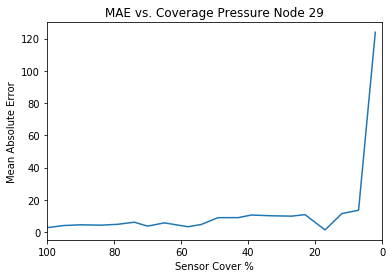

In [28]:
plt.plot(sensors_covered, maximum_MAE)
plt.ylabel("Mean Absolute Error")
plt.xlabel("Sensor Cover %")
plt.title("MAE vs. Coverage Pressure Node 29")
plt.xlim([100, 0])
plt.show()

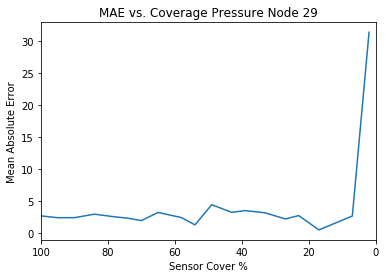

In [29]:
plt.plot(sensors_covered, MAE_average)
plt.ylabel("Mean Absolute Error")
plt.xlabel("Sensor Cover %")
plt.title("MAE vs. Coverage Pressure Node 29")
plt.xlim([100, 0])
plt.show()

In [13]:
#average scores flows link 1

MAE_average = []
maximum_MAE = []
sensors_covered = []
n_columns_to_drop = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
for n in n_columns_to_drop:
    MAE = []
    for run in range(1,11):
        Y = df[df.columns[64]]
        X = df.drop(columns=['link_1_flow'])
        X['link_1_flow'] = Y
        columns = []
        columns_to_drop = random.sample(list(X.columns), n)
        # Drop the selected columns from the dataframe
        if X.columns[-1] in columns_to_drop:
            columns_to_drop.remove(X.columns[-1])
        X.drop(columns_to_drop, axis=1, inplace=True)
        columns.append(columns_to_drop)
        print(columns)
        print('starting df shape:', X.shape)
        print(f'This is training run {run} and has the shape: ', X.shape)
        print(f'The value of dropped columns is {n}')

        # split into train and test sets
        values = X.values
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled = scaler.fit_transform(values)
        train, test = train_test_split(scaled, test_size=0.2, random_state=0)

        # split into input and outputs
        train_X, train_y = train[:, :-1], train[:, -1]
        test_X, test_y = test[:, :-1], test[:, -1]

        #define model
        model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.9,
            colsample_bytree=0.8,
            random_state=42
        )

        # fit the model on the training data
        model.fit(train_X, train_y)

        # make predictions on the test data
        y_pred = model.predict(test_X)

        test_y = test_y.reshape((len(test_y), 1))
        print('test y shape :', test_y.shape)
        inv_test_y = concatenate((test_y, test_X[:, -X.shape[1]:]), axis=1)
        print('Inv y shape :', inv_test_y.shape)
        test_y_inverse = scaler.inverse_transform(inv_test_y)
        test_y_inverse = test_y_inverse[:,0]

        y_pred = y_pred.reshape((len(y_pred), 1))
        print('y pred shape :', y_pred.shape)
        inv_y_pred = concatenate((y_pred, test_X[:, -X.shape[1]:]), axis=1)
        print('inv y pred :', inv_y_pred.shape)
        y_pred_inverse = scaler.inverse_transform(inv_y_pred)
        y_pred_inverse = y_pred_inverse[:,0]

        # evaluate scaled errors
        mae_inverse = mean_absolute_error(test_y_inverse, y_pred_inverse)
        MAE.append(mae_inverse)
        print(f'Run {run} Mean Absolute Error:', mae_inverse)
    percentage_list = round(X.shape[1] / 96 * 100)
    sensors_covered.append(percentage_list)
    MAE_mean = mean(MAE)
    max_MAE = max(MAE)
    maximum_MAE.append(max_MAE)
    MAE_average.append(MAE_mean)
print('Length MAE_average: ', len(MAE_average))
print('Length sensors_covered: ', len(sensors_covered))

[[]]
starting df shape: (87600, 96)
This is training run 1 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 1 Mean Absolute Error: 4.2262262918320435
[[]]
starting df shape: (87600, 96)
This is training run 2 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 2 Mean Absolute Error: 4.2262262918320435
[[]]
starting df shape: (87600, 96)
This is training run 3 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 3 Mean Absolute Error: 4.2262262918320435
[[]]
starting df shape: (87600, 96)
This is training run 4 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 4 Mean Absolute Error: 4.2262262918320435
[[]]
starting df shape: (87600, 96)
This is training run 5 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 5 Mean Absolute Error: 4.2262262918320435
[[]]
starting df shape: (87600, 96)
This is training run 6 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 6 Mean Absolute Error: 4.2262262918320435
[[]]
starting df shape: (87600, 96)
This is training run 7 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 7 Mean Absolute Error: 4.2262262918320435
[[]]
starting df shape: (87600, 96)
This is training run 8 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 8 Mean Absolute Error: 4.2262262918320435
[[]]
starting df shape: (87600, 96)
This is training run 9 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 9 Mean Absolute Error: 4.2262262918320435
[[]]
starting df shape: (87600, 96)
This is training run 10 and has the shape:  (87600, 96)
The value of dropped columns is 0


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 96)
y pred shape : (17520, 1)
inv y pred : (17520, 96)
Run 10 Mean Absolute Error: 4.2262262918320435
[['node_15_pressure', 'link_11_flow', 'node_23_pressure', 'link_19_flow', 'link_17_flow']]
starting df shape: (87600, 91)
This is training run 1 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 1 Mean Absolute Error: 4.628443789633154
[['node_30_pressure', 'node_21_demand', 'reservoir_demand', 'node_1_pressure', 'node_9_demand']]
starting df shape: (87600, 91)
This is training run 2 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 2 Mean Absolute Error: 0.33966100595846305
[['node_15_pressure', 'node_21_pressure', 'link_26_flow', 'node_15_demand', 'node_5_pressure']]
starting df shape: (87600, 91)
This is training run 3 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 3 Mean Absolute Error: 3.0280209621460514
[['node_31_demand', 'node_22_demand', 'node_2_demand', 'link_24_flow', 'link_5_flow']]
starting df shape: (87600, 91)
This is training run 4 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 4 Mean Absolute Error: 4.029368184004753
[['node_8_demand', 'link_16_flow', 'reservoir_pressure', 'link_27_flow', 'node_19_pressure']]
starting df shape: (87600, 91)
This is training run 5 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 5 Mean Absolute Error: 4.00928879296127
[['link_31_flow', 'link_7_flow', 'link_17_flow', 'link_30_flow', 'node_26_demand']]
starting df shape: (87600, 91)
This is training run 6 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 6 Mean Absolute Error: 4.604269787971289
[['node_22_pressure', 'node_10_pressure', 'link_26_flow', 'link_22_flow', 'node_17_pressure']]
starting df shape: (87600, 91)
This is training run 7 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 7 Mean Absolute Error: 4.021163782469222
[['node_25_pressure', 'node_15_demand', 'node_17_pressure', 'node_26_demand', 'reservoir_demand']]
starting df shape: (87600, 91)
This is training run 8 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 8 Mean Absolute Error: 0.34038360943013635
[['node_8_pressure', 'node_12_pressure', 'node_1_pressure', 'link_7_flow', 'node_25_pressure']]
starting df shape: (87600, 91)
This is training run 9 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 9 Mean Absolute Error: 2.98331609618582
[['node_27_demand', 'link_25_flow', 'node_31_demand', 'node_6_pressure', 'node_15_pressure']]
starting df shape: (87600, 91)
This is training run 10 and has the shape:  (87600, 91)
The value of dropped columns is 5


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 91)
y pred shape : (17520, 1)
inv y pred : (17520, 91)
Run 10 Mean Absolute Error: 3.0170021361439305
[['node_2_pressure', 'node_9_pressure', 'node_23_pressure', 'node_13_pressure', 'node_22_demand', 'node_2_demand', 'node_15_pressure', 'node_25_demand', 'link_18_flow', 'node_12_demand']]
starting df shape: (87600, 86)
This is training run 1 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 1 Mean Absolute Error: 3.2704785782997106
[['node_30_demand', 'link_28_flow', 'node_10_pressure', 'link_12_flow', 'node_3_demand', 'link_15_flow', 'node_17_demand', 'link_17_flow', 'node_9_pressure', 'node_24_pressure']]
starting df shape: (87600, 86)
This is training run 2 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 2 Mean Absolute Error: 2.8271884955935382
[['link_28_flow', 'node_1_demand', 'node_18_pressure', 'node_25_demand', 'reservoir_pressure', 'link_2_flow', 'link_7_flow', 'node_14_demand', 'link_12_flow']]
starting df shape: (87600, 87)
This is training run 3 and has the shape:  (87600, 87)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 87)
y pred shape : (17520, 1)
inv y pred : (17520, 87)
Run 3 Mean Absolute Error: 4.907401812060237
[['node_18_demand', 'link_9_flow', 'node_27_demand', 'node_25_demand', 'node_6_pressure', 'node_24_pressure', 'link_18_flow', 'link_22_flow', 'node_16_pressure', 'node_14_pressure']]
starting df shape: (87600, 86)
This is training run 4 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 4 Mean Absolute Error: 3.99527150379877
[['node_23_demand', 'node_24_pressure', 'link_19_flow', 'node_6_demand', 'node_16_pressure', 'node_8_pressure', 'node_9_demand', 'node_24_demand', 'node_7_demand', 'node_13_pressure']]
starting df shape: (87600, 86)
This is training run 5 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 5 Mean Absolute Error: 3.269741804865145
[['node_8_demand', 'node_4_demand', 'link_22_flow', 'node_1_pressure', 'node_3_demand', 'link_19_flow', 'link_5_flow', 'node_18_pressure', 'link_11_flow', 'node_29_pressure']]
starting df shape: (87600, 86)
This is training run 6 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 6 Mean Absolute Error: 2.807367301583301
[['node_28_demand', 'node_10_demand', 'link_26_flow', 'link_7_flow', 'node_20_demand', 'node_21_pressure', 'node_29_pressure', 'node_4_demand', 'node_31_demand', 'link_23_flow']]
starting df shape: (87600, 86)
This is training run 7 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 7 Mean Absolute Error: 3.9732192811165774
[['node_13_demand', 'link_29_flow', 'link_12_flow', 'node_11_demand', 'link_27_flow', 'node_23_demand', 'link_21_flow', 'link_10_flow', 'node_30_pressure', 'node_6_demand']]
starting df shape: (87600, 86)
This is training run 8 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 8 Mean Absolute Error: 2.7357487859668903
[['link_19_flow', 'node_7_pressure', 'link_16_flow', 'link_18_flow', 'node_3_demand', 'link_4_flow', 'node_18_demand', 'node_4_demand', 'node_26_demand', 'node_16_demand']]
starting df shape: (87600, 86)
This is training run 9 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 9 Mean Absolute Error: 2.8113780950683607
[['node_16_demand', 'link_20_flow', 'node_13_pressure', 'node_7_demand', 'node_9_pressure', 'link_30_flow', 'node_27_demand', 'node_30_demand', 'node_4_demand', 'node_13_demand']]
starting df shape: (87600, 86)
This is training run 10 and has the shape:  (87600, 86)
The value of dropped columns is 10


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 86)
y pred shape : (17520, 1)
inv y pred : (17520, 86)
Run 10 Mean Absolute Error: 3.444379860407706
[['node_5_pressure', 'node_26_demand', 'link_17_flow', 'link_21_flow', 'reservoir_demand', 'link_19_flow', 'node_1_pressure', 'link_12_flow', 'node_26_pressure', 'node_29_pressure', 'node_29_demand', 'node_5_demand', 'link_25_flow', 'node_18_pressure', 'link_29_flow']]
starting df shape: (87600, 81)
This is training run 1 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 1 Mean Absolute Error: 0.3104601527350766
[['node_16_demand', 'node_30_demand', 'node_27_demand', 'link_23_flow', 'node_10_demand', 'link_26_flow', 'node_3_pressure', 'node_21_demand', 'node_22_demand', 'link_11_flow', 'link_24_flow', 'node_9_pressure', 'node_13_demand', 'node_9_demand', 'link_21_flow']]
starting df shape: (87600, 81)
This is training run 2 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 2 Mean Absolute Error: 2.8603594206661405
[['node_20_pressure', 'node_25_pressure', 'node_23_pressure', 'node_24_pressure', 'node_1_pressure', 'node_3_pressure', 'node_18_demand', 'node_8_pressure', 'node_11_pressure', 'link_3_flow', 'node_4_demand', 'node_11_demand', 'node_8_demand', 'node_29_demand', 'node_5_pressure']]
starting df shape: (87600, 81)
This is training run 3 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 3 Mean Absolute Error: 3.6776221714403534
[['link_11_flow', 'node_28_demand', 'node_19_pressure', 'node_18_pressure', 'node_15_demand', 'node_15_pressure', 'link_21_flow', 'node_16_demand', 'node_24_demand', 'link_27_flow', 'node_1_pressure', 'node_9_pressure', 'node_24_pressure', 'link_24_flow', 'node_30_pressure']]
starting df shape: (87600, 81)
This is training run 4 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 4 Mean Absolute Error: 5.2792820866099746
[['node_4_demand', 'node_26_demand', 'node_13_pressure', 'node_3_pressure', 'node_16_demand', 'node_1_pressure', 'link_7_flow', 'link_6_flow', 'node_17_pressure', 'node_9_demand', 'node_16_pressure', 'link_30_flow', 'node_17_demand', 'link_27_flow', 'node_9_pressure']]
starting df shape: (87600, 81)
This is training run 5 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 5 Mean Absolute Error: 4.482859840564532
[['node_23_pressure', 'link_9_flow', 'node_27_demand', 'link_27_flow', 'link_29_flow', 'node_11_pressure', 'node_29_demand', 'link_28_flow', 'link_19_flow', 'node_20_pressure', 'link_26_flow', 'node_2_demand', 'node_8_demand', 'node_1_demand', 'link_13_flow']]
starting df shape: (87600, 81)
This is training run 6 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 6 Mean Absolute Error: 5.6870356283489905
[['node_28_demand', 'node_5_demand', 'node_19_pressure', 'node_10_demand', 'node_14_pressure', 'node_17_pressure', 'link_29_flow', 'link_2_flow', 'link_32_flow', 'node_2_pressure', 'node_28_pressure', 'node_20_pressure', 'node_18_pressure', 'link_24_flow', 'node_23_pressure']]
starting df shape: (87600, 81)
This is training run 7 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 7 Mean Absolute Error: 5.935618846236849
[['node_4_pressure', 'link_26_flow', 'link_22_flow', 'link_17_flow', 'link_19_flow', 'link_31_flow', 'node_15_demand', 'link_30_flow', 'link_28_flow', 'node_15_pressure', 'link_29_flow', 'node_12_pressure', 'link_11_flow', 'node_24_pressure']]
starting df shape: (87600, 82)
This is training run 8 and has the shape:  (87600, 82)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 82)
y pred shape : (17520, 1)
inv y pred : (17520, 82)
Run 8 Mean Absolute Error: 2.72864296782508
[['node_4_demand', 'node_12_demand', 'node_16_demand', 'link_3_flow', 'link_14_flow', 'link_8_flow', 'node_20_pressure', 'link_23_flow', 'node_30_demand', 'node_2_pressure', 'node_2_demand', 'node_9_demand', 'link_2_flow', 'link_5_flow', 'link_32_flow']]
starting df shape: (87600, 81)
This is training run 9 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 9 Mean Absolute Error: 6.432367168199526
[['node_30_demand', 'node_17_demand', 'node_16_pressure', 'link_22_flow', 'node_4_demand', 'link_9_flow', 'link_12_flow', 'node_8_pressure', 'link_13_flow', 'link_30_flow', 'node_6_demand', 'link_28_flow', 'node_2_demand', 'node_16_demand', 'link_21_flow']]
starting df shape: (87600, 81)
This is training run 10 and has the shape:  (87600, 81)
The value of dropped columns is 15


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 81)
y pred shape : (17520, 1)
inv y pred : (17520, 81)
Run 10 Mean Absolute Error: 5.571523839949745
[['link_11_flow', 'link_12_flow', 'node_30_demand', 'node_11_pressure', 'node_24_pressure', 'link_6_flow', 'link_19_flow', 'node_29_pressure', 'node_22_demand', 'link_20_flow', 'node_3_demand', 'node_18_pressure', 'node_7_pressure', 'node_24_demand', 'node_2_pressure', 'node_8_demand', 'node_12_demand', 'node_20_demand', 'link_32_flow']]
starting df shape: (87600, 77)
This is training run 1 and has the shape:  (87600, 77)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 77)
y pred shape : (17520, 1)
inv y pred : (17520, 77)
Run 1 Mean Absolute Error: 2.5410653329875514
[['node_2_demand', 'node_12_pressure', 'link_10_flow', 'link_6_flow', 'link_23_flow', 'node_29_pressure', 'node_8_demand', 'node_11_demand', 'node_5_pressure', 'node_12_demand', 'node_16_pressure', 'node_10_pressure', 'node_31_pressure', 'link_14_flow', 'node_29_demand', 'node_28_demand', 'link_2_flow', 'link_30_flow', 'node_13_demand', 'link_12_flow']]
starting df shape: (87600, 76)
This is training run 2 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 2 Mean Absolute Error: 8.086132853966063
[['node_1_pressure', 'node_27_pressure', 'node_18_pressure', 'node_3_demand', 'node_17_demand', 'node_13_demand', 'node_18_demand', 'link_27_flow', 'node_30_demand', 'node_13_pressure', 'node_11_pressure', 'node_9_demand', 'node_22_demand', 'link_25_flow', 'node_20_pressure', 'link_26_flow', 'node_28_pressure', 'link_29_flow', 'node_15_demand', 'node_27_demand']]
starting df shape: (87600, 76)
This is training run 3 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 3 Mean Absolute Error: 3.154340099896472
[['node_10_demand', 'link_17_flow', 'node_18_demand', 'node_26_pressure', 'node_25_demand', 'node_20_demand', 'node_8_demand', 'link_20_flow', 'node_5_demand', 'link_10_flow', 'node_22_pressure', 'node_1_pressure', 'node_3_pressure', 'node_18_pressure', 'node_9_demand', 'link_15_flow', 'node_21_pressure', 'link_32_flow', 'link_5_flow']]
starting df shape: (87600, 77)
This is training run 4 and has the shape:  (87600, 77)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 77)
y pred shape : (17520, 1)
inv y pred : (17520, 77)
Run 4 Mean Absolute Error: 2.568982820763998
[['link_16_flow', 'node_2_demand', 'link_12_flow', 'link_5_flow', 'node_25_pressure', 'link_21_flow', 'node_5_demand', 'reservoir_pressure', 'node_13_demand', 'node_24_demand', 'node_1_demand', 'node_23_pressure', 'link_14_flow', 'link_20_flow', 'node_3_demand', 'node_10_pressure', 'node_17_pressure', 'link_7_flow', 'link_11_flow']]
starting df shape: (87600, 77)
This is training run 5 and has the shape:  (87600, 77)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 77)
y pred shape : (17520, 1)
inv y pred : (17520, 77)
Run 5 Mean Absolute Error: 4.59866788811063
[['node_30_pressure', 'node_15_pressure', 'link_17_flow', 'node_4_pressure', 'node_16_demand', 'node_21_demand', 'node_6_demand', 'link_27_flow', 'node_1_pressure', 'link_21_flow', 'node_28_demand', 'link_10_flow', 'node_27_pressure', 'node_23_demand', 'node_5_pressure', 'node_29_demand', 'link_9_flow', 'node_31_pressure', 'node_3_demand']]
starting df shape: (87600, 77)
This is training run 6 and has the shape:  (87600, 77)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 77)
y pred shape : (17520, 1)
inv y pred : (17520, 77)
Run 6 Mean Absolute Error: 2.6929111166033213
[['node_11_pressure', 'node_21_pressure', 'node_2_demand', 'node_9_demand', 'reservoir_demand', 'link_17_flow', 'link_9_flow', 'node_29_pressure', 'node_7_demand', 'node_14_demand', 'link_29_flow', 'node_21_demand', 'node_8_pressure', 'node_24_pressure', 'node_25_pressure', 'node_19_pressure', 'node_17_demand', 'node_3_demand', 'node_15_demand', 'node_1_pressure']]
starting df shape: (87600, 76)
This is training run 7 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 7 Mean Absolute Error: 0.5012241931785969
[['node_28_demand', 'link_12_flow', 'node_21_demand', 'link_27_flow', 'link_14_flow', 'node_25_pressure', 'node_29_pressure', 'link_20_flow', 'node_30_pressure', 'node_26_pressure', 'link_23_flow', 'node_12_pressure', 'node_1_demand', 'node_14_pressure', 'node_14_demand', 'node_5_pressure', 'node_11_pressure', 'link_8_flow', 'node_31_pressure', 'node_16_pressure']]
starting df shape: (87600, 76)
This is training run 8 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 8 Mean Absolute Error: 5.07941367771119
[['node_1_pressure', 'reservoir_demand', 'node_16_pressure', 'node_13_demand', 'node_15_pressure', 'node_28_demand', 'node_3_pressure', 'node_16_demand', 'link_17_flow', 'node_17_pressure', 'node_10_demand', 'link_9_flow', 'node_25_pressure', 'node_8_demand', 'node_9_demand', 'node_12_demand', 'node_17_demand', 'node_7_demand', 'node_18_pressure', 'link_8_flow']]
starting df shape: (87600, 76)
This is training run 9 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 9 Mean Absolute Error: 0.4759988344904762
[['node_15_demand', 'node_8_demand', 'node_19_pressure', 'node_27_demand', 'link_23_flow', 'node_30_pressure', 'node_9_demand', 'link_26_flow', 'node_20_pressure', 'node_18_demand', 'node_30_demand', 'link_5_flow', 'node_7_demand', 'node_13_pressure', 'node_29_demand', 'link_14_flow', 'node_14_demand', 'node_5_demand', 'node_8_pressure', 'node_31_demand']]
starting df shape: (87600, 76)
This is training run 10 and has the shape:  (87600, 76)
The value of dropped columns is 20


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 76)
y pred shape : (17520, 1)
inv y pred : (17520, 76)
Run 10 Mean Absolute Error: 3.1500048766111686
[['node_11_demand', 'node_10_pressure', 'node_20_pressure', 'link_20_flow', 'link_27_flow', 'node_13_pressure', 'node_1_pressure', 'node_24_demand', 'link_32_flow', 'node_22_pressure', 'link_29_flow', 'link_17_flow', 'node_19_pressure', 'node_7_demand', 'node_31_pressure', 'node_28_pressure', 'node_16_pressure', 'node_28_demand', 'node_6_demand', 'link_16_flow', 'node_3_demand', 'link_13_flow', 'reservoir_pressure', 'node_25_demand', 'link_24_flow']]
starting df shape: (87600, 71)
This is training run 1 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 1 Mean Absolute Error: 2.4915000280003072
[['link_18_flow', 'node_19_demand', 'node_13_pressure', 'node_15_pressure', 'node_26_demand', 'link_13_flow', 'node_17_demand', 'node_8_demand', 'node_20_demand', 'node_21_pressure', 'link_16_flow', 'node_24_demand', 'link_24_flow', 'node_24_pressure', 'node_22_pressure', 'node_5_demand', 'node_1_pressure', 'node_26_pressure', 'reservoir_demand', 'node_28_demand', 'reservoir_pressure', 'node_18_pressure', 'link_27_flow', 'link_26_flow', 'node_5_pressure']]
starting df shape: (87600, 71)
This is training run 2 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 2 Mean Absolute Error: 0.31397997647038073
[['node_10_demand', 'link_22_flow', 'reservoir_pressure', 'node_6_demand', 'link_8_flow', 'node_16_pressure', 'link_31_flow', 'node_13_demand', 'link_26_flow', 'link_16_flow', 'link_30_flow', 'node_11_pressure', 'node_17_pressure', 'link_15_flow', 'link_24_flow', 'link_5_flow', 'node_7_demand', 'link_11_flow', 'node_12_pressure', 'link_9_flow', 'link_19_flow', 'node_19_pressure', 'node_8_pressure', 'node_27_demand', 'node_26_demand']]
starting df shape: (87600, 71)
This is training run 3 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 3 Mean Absolute Error: 2.314394545310172
[['link_3_flow', 'node_2_demand', 'node_3_pressure', 'node_21_pressure', 'node_24_pressure', 'link_5_flow', 'link_30_flow', 'node_25_pressure', 'link_7_flow', 'node_31_demand', 'node_3_demand', 'node_16_demand', 'node_29_demand', 'node_29_pressure', 'node_6_demand', 'node_1_pressure', 'node_4_pressure', 'node_22_demand', 'node_15_pressure', 'node_13_demand', 'link_13_flow', 'node_5_demand', 'node_11_pressure', 'link_11_flow', 'node_27_pressure']]
starting df shape: (87600, 71)
This is training run 4 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 4 Mean Absolute Error: 2.849109309470818
[['node_5_pressure', 'node_6_pressure', 'node_19_pressure', 'node_18_demand', 'reservoir_pressure', 'node_9_pressure', 'link_17_flow', 'node_10_pressure', 'node_9_demand', 'node_23_demand', 'reservoir_demand', 'node_20_pressure', 'node_30_demand', 'node_11_demand', 'link_18_flow', 'link_21_flow', 'link_23_flow', 'link_25_flow', 'link_27_flow', 'node_12_demand', 'node_28_pressure', 'link_3_flow', 'link_2_flow', 'node_2_pressure', 'node_16_pressure']]
starting df shape: (87600, 71)
This is training run 5 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 5 Mean Absolute Error: 0.8029849674448166
[['node_8_demand', 'node_18_demand', 'node_29_demand', 'link_2_flow', 'node_26_pressure', 'node_7_pressure', 'node_4_pressure', 'node_12_demand', 'node_10_pressure', 'node_13_demand', 'link_28_flow', 'node_15_demand', 'node_22_pressure', 'node_14_demand', 'node_3_pressure', 'node_16_demand', 'node_21_pressure', 'node_9_demand', 'node_4_demand', 'link_14_flow', 'node_10_demand', 'link_18_flow', 'link_32_flow', 'node_5_pressure', 'link_31_flow']]
starting df shape: (87600, 71)
This is training run 6 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 6 Mean Absolute Error: 3.751411579696288
[['node_29_pressure', 'link_2_flow', 'node_1_demand', 'link_25_flow', 'node_7_pressure', 'link_10_flow', 'node_26_pressure', 'link_3_flow', 'link_32_flow', 'node_21_demand', 'link_12_flow', 'node_3_pressure', 'node_19_demand', 'node_1_pressure', 'node_11_demand', 'link_4_flow', 'link_26_flow', 'node_17_demand', 'node_29_demand', 'node_22_pressure', 'link_6_flow', 'node_4_demand', 'reservoir_pressure', 'link_31_flow', 'link_8_flow']]
starting df shape: (87600, 71)
This is training run 7 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 7 Mean Absolute Error: 4.438976362927318
[['node_1_demand', 'node_11_demand', 'link_3_flow', 'link_22_flow', 'link_30_flow', 'node_22_demand', 'node_21_pressure', 'link_9_flow', 'node_7_demand', 'node_3_demand', 'node_15_demand', 'node_20_demand', 'node_28_pressure', 'link_6_flow', 'link_27_flow', 'link_29_flow', 'link_7_flow', 'node_5_pressure', 'node_27_demand', 'link_15_flow', 'link_31_flow', 'node_25_pressure', 'node_27_pressure', 'node_26_demand']]
starting df shape: (87600, 72)
This is training run 8 and has the shape:  (87600, 72)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 72)
y pred shape : (17520, 1)
inv y pred : (17520, 72)
Run 8 Mean Absolute Error: 3.9258029549864686
[['node_18_demand', 'node_24_pressure', 'node_13_demand', 'link_20_flow', 'link_4_flow', 'node_23_pressure', 'link_15_flow', 'node_20_pressure', 'node_14_pressure', 'link_6_flow', 'node_29_demand', 'node_27_pressure', 'node_15_demand', 'node_17_pressure', 'link_30_flow', 'link_24_flow', 'link_12_flow', 'node_18_pressure', 'node_31_pressure', 'node_16_pressure', 'link_13_flow', 'link_29_flow', 'node_16_demand', 'node_22_demand', 'link_31_flow']]
starting df shape: (87600, 71)
This is training run 9 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 9 Mean Absolute Error: 2.862856254083662
[['link_20_flow', 'node_26_demand', 'node_4_demand', 'node_31_demand', 'link_10_flow', 'node_26_pressure', 'node_15_demand', 'reservoir_demand', 'reservoir_pressure', 'node_29_pressure', 'link_7_flow', 'node_27_demand', 'node_29_demand', 'node_22_demand', 'link_25_flow', 'node_1_demand', 'link_32_flow', 'link_4_flow', 'node_13_demand', 'node_11_demand', 'node_3_pressure', 'link_23_flow', 'node_9_demand', 'node_14_pressure', 'node_17_pressure']]
starting df shape: (87600, 71)
This is training run 10 and has the shape:  (87600, 71)
The value of dropped columns is 25


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 71)
y pred shape : (17520, 1)
inv y pred : (17520, 71)
Run 10 Mean Absolute Error: 0.7865279051966547
[['node_12_pressure', 'node_25_pressure', 'node_31_demand', 'link_6_flow', 'link_25_flow', 'node_14_pressure', 'link_31_flow', 'node_4_pressure', 'node_30_demand', 'node_21_demand', 'node_24_pressure', 'node_6_pressure', 'node_3_pressure', 'link_9_flow', 'node_8_demand', 'link_26_flow', 'node_23_pressure', 'node_16_demand', 'node_9_pressure', 'node_10_demand', 'link_14_flow', 'node_3_demand', 'node_4_demand', 'node_20_pressure', 'link_7_flow', 'node_2_demand', 'node_17_pressure', 'link_21_flow', 'link_32_flow', 'node_29_pressure']]
starting df shape: (87600, 66)
This is training run 1 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 1 Mean Absolute Error: 4.098209104982965
[['link_24_flow', 'node_15_demand', 'node_14_pressure', 'node_24_pressure', 'node_1_pressure', 'node_9_pressure', 'node_5_demand', 'node_22_pressure', 'reservoir_demand', 'node_3_demand', 'node_11_pressure', 'node_25_demand', 'link_13_flow', 'link_23_flow', 'node_23_pressure', 'node_27_demand', 'link_3_flow', 'node_6_demand', 'node_7_pressure', 'link_12_flow', 'node_29_pressure', 'link_14_flow', 'node_24_demand', 'node_6_pressure', 'node_16_demand', 'link_11_flow', 'link_20_flow', 'link_21_flow', 'node_13_pressure', 'node_23_demand']]
starting df shape: (87600, 66)
This is training run 2 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 2 Mean Absolute Error: 0.4659960568083239
[['node_15_demand', 'node_5_pressure', 'link_5_flow', 'node_30_pressure', 'node_24_demand', 'node_4_pressure', 'node_13_pressure', 'node_9_pressure', 'node_11_pressure', 'node_26_pressure', 'node_30_demand', 'node_22_pressure', 'link_21_flow', 'node_24_pressure', 'node_27_pressure', 'node_17_pressure', 'node_18_demand', 'link_18_flow', 'link_29_flow', 'node_17_demand', 'link_17_flow', 'node_23_demand', 'node_28_pressure', 'link_14_flow', 'link_3_flow', 'link_25_flow', 'link_12_flow', 'node_2_demand', 'reservoir_pressure', 'node_8_demand']]
starting df shape: (87600, 66)
This is training run 3 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 3 Mean Absolute Error: 4.155295602691499
[['link_6_flow', 'node_13_demand', 'link_30_flow', 'link_28_flow', 'node_11_demand', 'node_18_demand', 'node_22_pressure', 'node_7_demand', 'node_18_pressure', 'reservoir_demand', 'link_13_flow', 'link_21_flow', 'node_29_demand', 'node_15_pressure', 'node_30_pressure', 'node_29_pressure', 'node_4_demand', 'node_3_demand', 'node_16_pressure', 'node_25_demand', 'node_14_demand', 'link_17_flow', 'link_24_flow', 'node_8_demand', 'link_18_flow', 'node_7_pressure', 'node_19_demand', 'link_25_flow', 'link_2_flow', 'node_23_demand']]
starting df shape: (87600, 66)
This is training run 4 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 4 Mean Absolute Error: 0.8083258173844838
[['node_18_pressure', 'node_1_demand', 'node_7_pressure', 'node_7_demand', 'node_18_demand', 'link_18_flow', 'node_5_demand', 'node_17_pressure', 'link_8_flow', 'node_11_pressure', 'link_6_flow', 'node_31_demand', 'link_26_flow', 'node_28_pressure', 'reservoir_pressure', 'node_1_pressure', 'node_10_demand', 'link_31_flow', 'link_4_flow', 'node_22_pressure', 'node_26_pressure', 'node_6_demand', 'node_21_pressure', 'node_2_pressure', 'node_8_pressure', 'link_13_flow', 'node_24_pressure', 'link_32_flow', 'node_9_demand']]
starting df shape: (87600, 67)
This is training run 5 and has the shape:  (87600, 67)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 67)
y pred shape : (17520, 1)
inv y pred : (17520, 67)
Run 5 Mean Absolute Error: 5.7680579956059645
[['node_27_pressure', 'link_15_flow', 'node_22_demand', 'node_27_demand', 'node_23_pressure', 'link_16_flow', 'node_6_pressure', 'node_15_pressure', 'link_17_flow', 'node_8_pressure', 'node_19_pressure', 'node_12_demand', 'node_17_demand', 'link_27_flow', 'link_14_flow', 'node_5_pressure', 'node_1_demand', 'node_3_pressure', 'link_11_flow', 'link_29_flow', 'node_30_demand', 'link_31_flow', 'node_31_pressure', 'link_13_flow', 'node_17_pressure', 'node_18_pressure', 'node_26_demand', 'node_24_pressure', 'node_13_demand', 'link_32_flow']]
starting df shape: (87600, 66)
This is training run 6 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 6 Mean Absolute Error: 2.8015041356176575
[['node_29_demand', 'node_24_pressure', 'node_10_pressure', 'node_27_pressure', 'link_30_flow', 'link_21_flow', 'node_19_demand', 'node_8_pressure', 'node_31_pressure', 'link_26_flow', 'link_17_flow', 'node_11_demand', 'node_29_pressure', 'node_1_pressure', 'link_19_flow', 'link_12_flow', 'node_23_demand', 'node_12_demand', 'reservoir_pressure', 'node_25_pressure', 'node_24_demand', 'node_22_demand', 'link_31_flow', 'node_8_demand', 'node_4_pressure', 'node_25_demand', 'node_3_demand', 'link_32_flow', 'node_2_pressure']]
starting df shape: (87600, 67)
This is training run 7 and has the shape:  (87600, 67)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 67)
y pred shape : (17520, 1)
inv y pred : (17520, 67)
Run 7 Mean Absolute Error: 4.428010161780337
[['node_4_demand', 'node_18_demand', 'node_26_demand', 'node_2_pressure', 'node_31_demand', 'link_17_flow', 'node_15_pressure', 'link_12_flow', 'node_29_demand', 'node_24_demand', 'node_21_demand', 'reservoir_demand', 'node_22_demand', 'node_7_pressure', 'link_7_flow', 'link_10_flow', 'node_3_pressure', 'node_14_demand', 'node_5_pressure', 'node_5_demand', 'link_30_flow', 'node_19_demand', 'node_14_pressure', 'node_25_pressure', 'node_7_demand', 'node_8_demand', 'node_23_demand', 'node_12_demand', 'node_17_pressure', 'node_10_pressure']]
starting df shape: (87600, 66)
This is training run 8 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 8 Mean Absolute Error: 0.5003869916367403
[['node_7_demand', 'node_18_demand', 'link_2_flow', 'node_11_demand', 'node_4_demand', 'node_31_pressure', 'link_18_flow', 'link_29_flow', 'node_2_demand', 'node_1_pressure', 'node_25_pressure', 'link_12_flow', 'link_7_flow', 'node_6_pressure', 'link_8_flow', 'node_18_pressure', 'node_4_pressure', 'node_25_demand', 'node_5_demand', 'node_5_pressure', 'node_22_demand', 'node_13_pressure', 'node_29_pressure', 'node_19_demand', 'node_8_pressure', 'link_26_flow', 'node_14_pressure', 'node_1_demand', 'node_31_demand', 'node_24_demand']]
starting df shape: (87600, 66)
This is training run 9 and has the shape:  (87600, 66)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 66)
y pred shape : (17520, 1)
inv y pred : (17520, 66)
Run 9 Mean Absolute Error: 4.418525525213101
[['node_8_pressure', 'link_26_flow', 'link_27_flow', 'node_16_pressure', 'node_7_pressure', 'link_17_flow', 'link_3_flow', 'node_26_pressure', 'node_29_pressure', 'node_14_demand', 'node_24_demand', 'reservoir_pressure', 'link_20_flow', 'node_9_demand', 'link_16_flow', 'node_21_pressure', 'link_30_flow', 'node_30_pressure', 'link_8_flow', 'node_3_pressure', 'node_22_pressure', 'node_16_demand', 'node_25_pressure', 'node_18_pressure', 'node_7_demand', 'link_14_flow', 'node_5_pressure', 'node_8_demand', 'node_2_demand']]
starting df shape: (87600, 67)
This is training run 10 and has the shape:  (87600, 67)
The value of dropped columns is 30


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 67)
y pred shape : (17520, 1)
inv y pred : (17520, 67)
Run 10 Mean Absolute Error: 3.315041503583734
[['node_20_demand', 'node_30_pressure', 'node_5_demand', 'link_13_flow', 'node_10_pressure', 'link_4_flow', 'node_18_pressure', 'node_6_demand', 'node_31_demand', 'node_17_pressure', 'link_8_flow', 'node_13_demand', 'node_21_pressure', 'link_32_flow', 'link_16_flow', 'node_28_pressure', 'reservoir_pressure', 'link_22_flow', 'node_31_pressure', 'link_6_flow', 'link_29_flow', 'node_11_pressure', 'node_18_demand', 'node_27_pressure', 'node_23_pressure', 'link_18_flow', 'node_26_pressure', 'link_26_flow', 'node_23_demand', 'node_19_pressure', 'node_14_demand', 'node_8_pressure', 'link_9_flow', 'node_24_pressure', 'node_9_pressure']]
starting df shape: (87600, 61)
This is training run 1 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 1 Mean Absolute Error: 3.210614271070037
[['link_17_flow', 'node_2_pressure', 'node_8_demand', 'node_1_pressure', 'node_22_pressure', 'node_7_demand', 'node_29_pressure', 'node_15_pressure', 'node_14_demand', 'link_27_flow', 'link_23_flow', 'link_5_flow', 'node_3_pressure', 'node_7_pressure', 'link_29_flow', 'node_5_pressure', 'link_9_flow', 'node_13_demand', 'node_18_pressure', 'link_8_flow', 'link_31_flow', 'node_12_pressure', 'node_21_pressure', 'node_4_pressure', 'link_32_flow', 'node_2_demand', 'node_15_demand', 'link_20_flow', 'node_13_pressure', 'link_7_flow', 'node_11_demand', 'link_16_flow', 'link_26_flow', 'node_31_pressure', 'node_5_demand']]
starting df shape: (87600, 61)
This is training run 2 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 2 Mean Absolute Error: 4.616163073145371
[['node_11_demand', 'node_17_demand', 'link_20_flow', 'link_31_flow', 'node_10_pressure', 'node_19_pressure', 'node_9_demand', 'link_3_flow', 'node_25_demand', 'node_26_demand', 'node_31_demand', 'node_10_demand', 'link_8_flow', 'link_23_flow', 'node_6_demand', 'node_27_demand', 'node_7_demand', 'link_4_flow', 'node_6_pressure', 'node_30_demand', 'node_2_pressure', 'node_17_pressure', 'link_6_flow', 'node_21_pressure', 'node_24_pressure', 'node_3_pressure', 'node_13_pressure', 'node_28_demand', 'node_7_pressure', 'node_1_pressure', 'node_4_pressure', 'link_9_flow', 'link_21_flow', 'node_25_pressure', 'node_29_pressure']]
starting df shape: (87600, 61)
This is training run 3 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 3 Mean Absolute Error: 3.407726681154878
[['node_31_demand', 'link_9_flow', 'node_6_pressure', 'node_10_pressure', 'node_16_pressure', 'link_17_flow', 'node_20_pressure', 'node_28_pressure', 'reservoir_pressure', 'link_25_flow', 'node_6_demand', 'node_19_pressure', 'node_22_pressure', 'node_30_pressure', 'link_32_flow', 'node_2_pressure', 'node_15_demand', 'node_18_demand', 'link_11_flow', 'node_10_demand', 'link_28_flow', 'link_21_flow', 'link_6_flow', 'node_31_pressure', 'node_11_pressure', 'link_13_flow', 'node_30_demand', 'node_12_pressure', 'node_25_pressure', 'node_13_demand', 'node_1_pressure', 'link_24_flow', 'node_20_demand', 'link_5_flow', 'link_15_flow']]
starting df shape: (87600, 61)
This is training run 4 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 4 Mean Absolute Error: 3.1442155323371446
[['link_5_flow', 'link_7_flow', 'link_2_flow', 'node_25_demand', 'node_30_pressure', 'node_30_demand', 'link_6_flow', 'node_9_demand', 'node_3_demand', 'node_26_pressure', 'link_32_flow', 'link_17_flow', 'node_24_demand', 'node_31_demand', 'link_11_flow', 'link_26_flow', 'node_4_pressure', 'link_24_flow', 'node_6_pressure', 'link_3_flow', 'node_14_pressure', 'node_10_demand', 'node_17_demand', 'node_7_pressure', 'link_29_flow', 'node_16_pressure', 'link_23_flow', 'node_1_demand', 'node_28_pressure', 'node_12_pressure', 'node_21_pressure', 'node_20_demand', 'node_20_pressure', 'node_12_demand', 'node_6_demand']]
starting df shape: (87600, 61)
This is training run 5 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 5 Mean Absolute Error: 5.611868995893497
[['link_6_flow', 'node_1_demand', 'node_24_demand', 'node_21_pressure', 'link_13_flow', 'link_9_flow', 'reservoir_pressure', 'node_13_demand', 'node_2_pressure', 'node_23_demand', 'node_21_demand', 'node_14_pressure', 'node_7_pressure', 'node_16_pressure', 'link_28_flow', 'node_6_demand', 'link_10_flow', 'node_17_pressure', 'node_1_pressure', 'link_19_flow', 'node_2_demand', 'node_31_pressure', 'node_13_pressure', 'node_15_demand', 'link_2_flow', 'node_25_demand', 'node_8_pressure', 'node_28_demand', 'link_25_flow', 'node_27_pressure', 'node_7_demand', 'node_22_demand', 'node_14_demand', 'link_12_flow', 'node_17_demand']]
starting df shape: (87600, 61)
This is training run 6 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 6 Mean Absolute Error: 6.46161075768813
[['node_15_pressure', 'node_18_demand', 'node_12_demand', 'node_27_pressure', 'node_16_pressure', 'link_27_flow', 'link_24_flow', 'node_11_pressure', 'link_13_flow', 'node_17_pressure', 'link_5_flow', 'node_23_pressure', 'node_11_demand', 'link_15_flow', 'link_16_flow', 'node_13_pressure', 'node_9_pressure', 'node_3_pressure', 'node_6_pressure', 'node_10_pressure', 'node_20_demand', 'node_22_pressure', 'node_13_demand', 'node_28_demand', 'node_24_demand', 'node_3_demand', 'link_28_flow', 'link_21_flow', 'link_29_flow', 'node_8_demand', 'node_30_demand', 'link_22_flow', 'node_24_pressure', 'node_2_demand']]
starting df shape: (87600, 62)
This is training run 7 and has the shape:  (87600, 62)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 62)
y pred shape : (17520, 1)
inv y pred : (17520, 62)
Run 7 Mean Absolute Error: 3.978501148897495
[['node_4_demand', 'link_8_flow', 'node_25_pressure', 'node_8_pressure', 'reservoir_demand', 'link_23_flow', 'link_21_flow', 'node_13_pressure', 'node_16_pressure', 'link_32_flow', 'node_15_pressure', 'node_20_demand', 'link_3_flow', 'node_7_pressure', 'link_29_flow', 'node_31_pressure', 'node_4_pressure', 'node_31_demand', 'node_1_demand', 'node_10_pressure', 'link_9_flow', 'node_13_demand', 'link_11_flow', 'link_22_flow', 'node_6_demand', 'link_6_flow', 'node_29_demand', 'node_9_demand', 'node_14_pressure', 'reservoir_pressure', 'node_23_demand', 'node_24_demand', 'node_20_pressure', 'node_11_demand']]
starting df shape: (87600, 62)
This is training run 8 and has the shape:  (87600, 62)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 62)
y pred shape : (17520, 1)
inv y pred : (17520, 62)
Run 8 Mean Absolute Error: 0.7025631215501201
[['node_9_pressure', 'node_29_demand', 'node_20_pressure', 'node_8_pressure', 'node_25_demand', 'node_22_demand', 'link_24_flow', 'link_31_flow', 'node_21_demand', 'node_5_demand', 'link_10_flow', 'node_12_pressure', 'node_1_pressure', 'node_18_pressure', 'node_24_demand', 'link_2_flow', 'node_6_demand', 'node_26_demand', 'node_30_demand', 'link_9_flow', 'node_28_demand', 'link_13_flow', 'node_6_pressure', 'node_16_pressure', 'node_11_demand', 'node_3_demand', 'link_16_flow', 'link_27_flow', 'node_9_demand', 'node_19_pressure', 'link_21_flow', 'reservoir_pressure', 'node_27_demand', 'link_25_flow']]
starting df shape: (87600, 62)
This is training run 9 and has the shape:  (87600, 62)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 62)
y pred shape : (17520, 1)
inv y pred : (17520, 62)
Run 9 Mean Absolute Error: 4.554803604116191
[['reservoir_pressure', 'node_27_demand', 'node_1_demand', 'node_29_demand', 'node_6_demand', 'node_15_demand', 'node_12_demand', 'link_26_flow', 'node_19_demand', 'node_20_pressure', 'link_24_flow', 'node_18_demand', 'node_1_pressure', 'node_16_demand', 'node_23_demand', 'node_2_pressure', 'link_27_flow', 'link_19_flow', 'node_15_pressure', 'link_32_flow', 'node_24_demand', 'node_22_pressure', 'link_3_flow', 'node_31_pressure', 'link_28_flow', 'node_9_pressure', 'reservoir_demand', 'node_2_demand', 'node_22_demand', 'node_3_pressure', 'link_20_flow', 'node_30_demand', 'link_15_flow', 'node_20_demand', 'link_10_flow']]
starting df shape: (87600, 61)
This is training run 10 and has the shape:  (87600, 61)
The value of dropped columns is 35


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 61)
y pred shape : (17520, 1)
inv y pred : (17520, 61)
Run 10 Mean Absolute Error: 0.11272378324916116
[['node_18_pressure', 'node_25_pressure', 'link_3_flow', 'node_21_demand', 'node_12_pressure', 'link_21_flow', 'node_16_pressure', 'link_30_flow', 'link_22_flow', 'node_16_demand', 'node_1_pressure', 'node_19_demand', 'node_27_demand', 'node_1_demand', 'node_14_pressure', 'node_9_demand', 'node_15_demand', 'node_2_pressure', 'link_11_flow', 'node_12_demand', 'link_24_flow', 'link_32_flow', 'node_20_pressure', 'link_15_flow', 'node_31_demand', 'node_20_demand', 'link_26_flow', 'node_6_demand', 'reservoir_demand', 'node_17_demand', 'node_22_pressure', 'node_21_pressure', 'node_5_pressure', 'node_3_demand', 'link_28_flow', 'node_3_pressure', 'node_29_demand', 'node_14_demand', 'node_8_pressure']]
starting df shape: (87600, 57)
This is training run 1 and has the shape:  (87600, 57)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 57)
y pred shape : (17520, 1)
inv y pred : (17520, 57)
Run 1 Mean Absolute Error: 0.741662247716306
[['node_25_demand', 'node_29_demand', 'node_7_demand', 'link_30_flow', 'link_8_flow', 'link_10_flow', 'node_6_demand', 'node_7_pressure', 'node_27_demand', 'node_11_demand', 'node_24_pressure', 'node_28_demand', 'node_27_pressure', 'node_2_pressure', 'node_9_pressure', 'node_21_demand', 'node_13_pressure', 'node_19_demand', 'node_22_demand', 'link_22_flow', 'node_16_demand', 'node_12_demand', 'link_7_flow', 'link_16_flow', 'node_14_pressure', 'node_18_pressure', 'node_26_demand', 'link_27_flow', 'node_21_pressure', 'node_3_pressure', 'node_5_pressure', 'link_19_flow', 'link_5_flow', 'link_20_flow', 'node_23_demand', 'link_21_flow', 'node_20_pressure', 'node_30_pressure', 'link_25_flow', 'node_13_demand']]
starting df shape: (87600, 56)
This is training run 2 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 2 Mean Absolute Error: 2.2355253734164
[['link_24_flow', 'link_4_flow', 'node_1_pressure', 'node_8_pressure', 'node_20_pressure', 'node_29_demand', 'link_15_flow', 'node_3_pressure', 'link_17_flow', 'node_13_pressure', 'node_15_demand', 'node_21_pressure', 'link_31_flow', 'node_27_pressure', 'node_30_demand', 'node_4_demand', 'node_5_demand', 'link_28_flow', 'node_17_demand', 'node_22_demand', 'node_2_demand', 'link_7_flow', 'link_18_flow', 'node_12_pressure', 'link_5_flow', 'node_28_pressure', 'node_18_pressure', 'node_24_pressure', 'node_16_demand', 'link_32_flow', 'node_26_pressure', 'node_6_demand', 'node_7_demand', 'node_7_pressure', 'link_29_flow', 'node_30_pressure', 'node_11_pressure', 'link_2_flow', 'link_30_flow', 'link_23_flow']]
starting df shape: (87600, 56)
This is training run 3 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 3 Mean Absolute Error: 2.914461171516812
[['link_8_flow', 'node_21_pressure', 'node_21_demand', 'link_15_flow', 'node_6_pressure', 'node_15_demand', 'link_11_flow', 'link_29_flow', 'node_2_pressure', 'node_24_demand', 'node_17_demand', 'link_4_flow', 'link_18_flow', 'node_29_pressure', 'node_31_pressure', 'node_26_demand', 'node_9_demand', 'node_24_pressure', 'link_5_flow', 'node_23_pressure', 'link_16_flow', 'node_22_demand', 'link_14_flow', 'node_13_pressure', 'node_26_pressure', 'node_5_pressure', 'node_28_demand', 'node_10_pressure', 'node_25_demand', 'node_20_pressure', 'node_4_pressure', 'link_2_flow', 'node_25_pressure', 'node_7_demand', 'link_3_flow', 'node_9_pressure', 'link_26_flow', 'link_30_flow', 'link_10_flow', 'node_30_pressure']]
starting df shape: (87600, 56)
This is training run 4 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 4 Mean Absolute Error: 2.796304404878455
[['node_25_pressure', 'link_12_flow', 'node_12_pressure', 'link_11_flow', 'node_2_demand', 'node_17_demand', 'node_26_pressure', 'node_4_pressure', 'node_12_demand', 'node_20_demand', 'node_10_pressure', 'node_10_demand', 'link_2_flow', 'node_27_pressure', 'node_14_demand', 'node_5_pressure', 'link_24_flow', 'link_13_flow', 'node_15_pressure', 'node_17_pressure', 'node_16_pressure', 'node_28_demand', 'link_18_flow', 'link_6_flow', 'node_8_demand', 'node_19_pressure', 'node_6_pressure', 'reservoir_pressure', 'link_9_flow', 'link_5_flow', 'node_22_demand', 'link_26_flow', 'link_16_flow', 'node_21_pressure', 'node_3_demand', 'node_11_pressure', 'node_18_demand', 'node_5_demand', 'link_7_flow', 'link_19_flow']]
starting df shape: (87600, 56)
This is training run 5 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 5 Mean Absolute Error: 2.836742015268701
[['link_26_flow', 'link_7_flow', 'link_18_flow', 'node_14_pressure', 'link_25_flow', 'node_22_pressure', 'link_14_flow', 'node_8_demand', 'node_10_demand', 'node_7_pressure', 'link_9_flow', 'node_4_pressure', 'link_19_flow', 'node_18_demand', 'link_6_flow', 'link_20_flow', 'node_30_pressure', 'node_25_demand', 'node_29_demand', 'node_16_demand', 'link_8_flow', 'node_27_demand', 'link_12_flow', 'link_16_flow', 'node_18_pressure', 'node_11_pressure', 'node_13_pressure', 'node_10_pressure', 'node_7_demand', 'link_31_flow', 'node_29_pressure', 'node_23_demand', 'node_28_pressure', 'reservoir_pressure', 'node_20_demand', 'node_12_demand', 'link_5_flow', 'node_1_pressure', 'node_6_demand', 'node_8_pressure']]
starting df shape: (87600, 56)
This is training run 6 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 6 Mean Absolute Error: 2.1111423352973095
[['node_1_pressure', 'link_12_flow', 'link_5_flow', 'node_3_pressure', 'node_14_demand', 'node_20_pressure', 'link_21_flow', 'link_11_flow', 'link_30_flow', 'node_16_pressure', 'node_10_pressure', 'node_25_pressure', 'node_1_demand', 'link_23_flow', 'node_21_pressure', 'link_26_flow', 'node_17_demand', 'link_25_flow', 'node_18_pressure', 'link_15_flow', 'link_13_flow', 'node_23_demand', 'node_23_pressure', 'node_14_pressure', 'node_27_demand', 'node_26_pressure', 'link_14_flow', 'node_22_pressure', 'node_29_demand', 'link_20_flow', 'node_7_demand', 'node_15_pressure', 'node_4_demand', 'node_11_pressure', 'link_4_flow', 'link_24_flow', 'node_22_demand', 'link_27_flow', 'node_12_pressure', 'link_18_flow']]
starting df shape: (87600, 56)
This is training run 7 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 7 Mean Absolute Error: 2.201976516410094
[['node_8_pressure', 'node_5_demand', 'link_10_flow', 'node_22_demand', 'node_26_demand', 'link_23_flow', 'link_18_flow', 'node_9_pressure', 'node_6_pressure', 'node_15_pressure', 'reservoir_demand', 'node_21_pressure', 'node_24_pressure', 'node_10_pressure', 'node_23_pressure', 'node_29_demand', 'node_10_demand', 'node_19_demand', 'link_6_flow', 'link_25_flow', 'node_17_demand', 'node_13_pressure', 'link_24_flow', 'link_11_flow', 'link_16_flow', 'node_26_pressure', 'node_22_pressure', 'link_14_flow', 'node_30_pressure', 'node_11_pressure', 'node_12_pressure', 'node_25_demand', 'node_15_demand', 'link_3_flow', 'node_27_demand', 'node_5_pressure', 'node_3_demand', 'node_28_demand', 'link_13_flow', 'node_20_pressure']]
starting df shape: (87600, 56)
This is training run 8 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 8 Mean Absolute Error: 0.32973308123654665
[['link_2_flow', 'node_21_pressure', 'link_17_flow', 'node_20_demand', 'node_29_pressure', 'node_2_demand', 'link_7_flow', 'node_9_pressure', 'node_25_demand', 'link_18_flow', 'node_9_demand', 'link_27_flow', 'node_3_pressure', 'node_6_demand', 'node_18_pressure', 'node_12_demand', 'link_8_flow', 'node_30_pressure', 'link_10_flow', 'node_15_demand', 'node_19_pressure', 'link_26_flow', 'node_6_pressure', 'node_31_pressure', 'node_17_demand', 'node_8_pressure', 'node_31_demand', 'node_7_pressure', 'node_11_pressure', 'link_6_flow', 'node_24_demand', 'link_21_flow', 'link_13_flow', 'node_4_demand', 'reservoir_pressure', 'node_18_demand', 'link_15_flow', 'link_23_flow', 'link_16_flow', 'link_22_flow']]
starting df shape: (87600, 56)
This is training run 9 and has the shape:  (87600, 56)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 56)
y pred shape : (17520, 1)
inv y pred : (17520, 56)
Run 9 Mean Absolute Error: 2.849724998608841
[['link_17_flow', 'node_13_pressure', 'node_17_pressure', 'link_23_flow', 'node_21_demand', 'node_21_pressure', 'link_31_flow', 'node_24_pressure', 'node_2_demand', 'node_4_pressure', 'link_25_flow', 'node_28_pressure', 'node_5_demand', 'node_27_demand', 'node_11_pressure', 'node_30_demand', 'node_2_pressure', 'link_4_flow', 'node_15_demand', 'link_22_flow', 'node_27_pressure', 'link_26_flow', 'node_26_demand', 'node_19_demand', 'node_31_pressure', 'node_30_pressure', 'node_9_demand', 'reservoir_demand', 'node_6_pressure', 'link_11_flow', 'node_16_demand', 'node_29_pressure', 'link_32_flow', 'link_24_flow', 'node_17_demand', 'node_10_pressure', 'node_20_pressure', 'node_12_demand', 'link_3_flow']]
starting df shape: (87600, 57)
This is training run 10 and has the shape:  (87600, 57)
The value of dropped columns is 40


/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 57)
y pred shape : (17520, 1)
inv y pred : (17520, 57)
Run 10 Mean Absolute Error: 0.4731955071844231
[['node_7_pressure', 'node_8_demand', 'node_20_pressure', 'node_3_pressure', 'node_14_demand', 'link_7_flow', 'node_2_demand', 'link_32_flow', 'link_17_flow', 'node_6_pressure', 'node_27_demand', 'node_14_pressure', 'node_12_pressure', 'link_13_flow', 'node_15_pressure', 'node_31_demand', 'node_26_pressure', 'node_28_pressure', 'link_6_flow', 'node_20_demand', 'node_30_pressure', 'link_29_flow', 'node_16_pressure', 'node_9_demand', 'node_4_demand', 'link_11_flow', 'node_4_pressure', 'link_25_flow', 'link_24_flow', 'link_30_flow', 'node_25_pressure', 'node_7_demand', 'link_2_flow', 'link_10_flow', 'node_29_demand', 'node_23_pressure', 'node_13_demand', 'link_5_flow', 'node_5_demand', 'link_8_flow', 'node_29_pressure', 'link_28_flow', 'link_9_flow', 'node_16_demand', 'link_22_flow']]
starting df shape: (87600, 51)
This is training run 1 and

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 1 Mean Absolute Error: 6.203825208904
[['node_12_pressure', 'node_31_pressure', 'link_12_flow', 'node_16_demand', 'node_6_demand', 'node_17_demand', 'node_25_demand', 'node_24_demand', 'node_5_pressure', 'node_6_pressure', 'node_20_pressure', 'link_16_flow', 'node_2_demand', 'link_11_flow', 'node_10_pressure', 'node_11_demand', 'node_2_pressure', 'node_22_demand', 'link_29_flow', 'link_17_flow', 'link_28_flow', 'node_26_demand', 'link_13_flow', 'link_31_flow', 'link_10_flow', 'node_8_demand', 'node_18_pressure', 'node_27_demand', 'link_6_flow', 'node_15_pressure', 'node_14_pressure', 'node_30_pressure', 'node_23_pressure', 'node_4_demand', 'link_2_flow', 'link_9_flow', 'node_14_demand', 'node_13_demand', 'link_18_flow', 'reservoir_pressure', 'link_25_flow', 'link_15_flow', 'node_4_pressure', 'link_14_flow']]
starting df shape: (87600, 52)
This is training run 2 and has the shape: 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 52)
y pred shape : (17520, 1)
inv y pred : (17520, 52)
Run 2 Mean Absolute Error: 4.851808440464822
[['node_30_demand', 'node_21_pressure', 'link_25_flow', 'link_17_flow', 'node_15_pressure', 'node_25_demand', 'node_2_demand', 'node_9_pressure', 'node_13_pressure', 'node_28_demand', 'node_31_demand', 'link_19_flow', 'node_29_demand', 'reservoir_demand', 'link_18_flow', 'node_6_demand', 'node_7_demand', 'link_28_flow', 'node_16_demand', 'node_11_demand', 'node_30_pressure', 'node_10_pressure', 'node_20_demand', 'node_27_pressure', 'node_4_demand', 'link_30_flow', 'node_1_demand', 'node_21_demand', 'node_3_demand', 'node_13_demand', 'link_9_flow', 'node_20_pressure', 'link_14_flow', 'node_23_demand', 'link_6_flow', 'node_1_pressure', 'link_10_flow', 'link_23_flow', 'node_10_demand', 'node_26_demand', 'link_32_flow', 'node_19_pressure', 'link_20_flow', 'node_24_pressure']]
starting df shape: (87600, 52)
This is training run 3 and has the sha

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 52)
y pred shape : (17520, 1)
inv y pred : (17520, 52)
Run 3 Mean Absolute Error: 0.740197717957156
[['node_29_pressure', 'node_1_pressure', 'node_15_demand', 'link_12_flow', 'node_28_demand', 'link_16_flow', 'link_21_flow', 'node_8_pressure', 'link_11_flow', 'node_15_pressure', 'link_4_flow', 'link_27_flow', 'node_25_demand', 'node_21_pressure', 'node_16_pressure', 'node_20_demand', 'node_31_demand', 'node_14_demand', 'node_31_pressure', 'node_28_pressure', 'link_20_flow', 'node_9_pressure', 'link_31_flow', 'node_7_demand', 'link_32_flow', 'link_14_flow', 'link_26_flow', 'link_28_flow', 'node_26_demand', 'node_26_pressure', 'link_23_flow', 'node_4_pressure', 'node_25_pressure', 'node_2_demand', 'node_4_demand', 'node_13_pressure', 'node_17_pressure', 'node_27_demand', 'link_15_flow', 'link_7_flow', 'node_30_pressure', 'node_24_pressure', 'node_10_pressure', 'node_6_demand', 'node_18_pressure']]
starting df shape: (87600, 51)
This is trai

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 4 Mean Absolute Error: 2.9015848170077816
[['node_21_pressure', 'link_16_flow', 'node_30_demand', 'node_16_demand', 'link_9_flow', 'node_28_pressure', 'link_4_flow', 'node_20_demand', 'node_27_pressure', 'node_17_pressure', 'node_15_demand', 'node_12_demand', 'link_22_flow', 'link_24_flow', 'node_8_pressure', 'node_18_pressure', 'node_7_demand', 'node_13_pressure', 'node_29_pressure', 'node_16_pressure', 'node_2_pressure', 'node_31_demand', 'node_22_demand', 'link_15_flow', 'link_20_flow', 'link_23_flow', 'node_3_demand', 'node_11_demand', 'link_6_flow', 'node_9_pressure', 'node_10_demand', 'node_28_demand', 'node_31_pressure', 'node_26_demand', 'node_22_pressure', 'link_19_flow', 'node_18_demand', 'reservoir_demand', 'node_5_demand', 'node_11_pressure', 'node_4_demand', 'node_12_pressure', 'node_21_demand', 'node_17_demand']]
starting df shape: (87600, 52)
This is training run 5 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 52)
y pred shape : (17520, 1)
inv y pred : (17520, 52)
Run 5 Mean Absolute Error: 0.5333821979426047
[['node_25_pressure', 'link_9_flow', 'node_27_pressure', 'node_19_pressure', 'node_31_pressure', 'node_14_pressure', 'node_22_demand', 'link_8_flow', 'node_6_demand', 'node_6_pressure', 'node_17_pressure', 'link_7_flow', 'link_25_flow', 'node_29_pressure', 'node_15_demand', 'node_7_pressure', 'link_22_flow', 'node_28_pressure', 'node_11_pressure', 'node_30_demand', 'node_15_pressure', 'node_3_pressure', 'node_25_demand', 'link_11_flow', 'node_18_pressure', 'node_3_demand', 'node_19_demand', 'node_12_demand', 'link_26_flow', 'reservoir_demand', 'node_27_demand', 'reservoir_pressure', 'link_31_flow', 'link_29_flow', 'node_20_pressure', 'node_1_demand', 'link_21_flow', 'node_13_demand', 'link_27_flow', 'node_2_demand', 'node_24_pressure', 'link_10_flow', 'link_13_flow', 'node_16_demand']]
starting df shape: (87600, 52)
This is training run 6 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 52)
y pred shape : (17520, 1)
inv y pred : (17520, 52)
Run 6 Mean Absolute Error: 0.5424939262514533
[['link_23_flow', 'link_5_flow', 'node_26_pressure', 'node_13_pressure', 'node_9_demand', 'node_6_pressure', 'link_4_flow', 'node_1_pressure', 'link_31_flow', 'node_31_pressure', 'link_32_flow', 'node_3_demand', 'link_19_flow', 'link_24_flow', 'node_16_pressure', 'node_19_demand', 'node_25_demand', 'node_12_demand', 'reservoir_pressure', 'node_14_demand', 'node_12_pressure', 'node_30_demand', 'node_20_demand', 'node_13_demand', 'node_18_pressure', 'node_28_pressure', 'node_15_pressure', 'node_16_demand', 'node_10_pressure', 'link_21_flow', 'link_22_flow', 'node_7_demand', 'node_24_demand', 'node_4_pressure', 'node_27_pressure', 'link_13_flow', 'link_7_flow', 'link_26_flow', 'link_29_flow', 'node_15_demand', 'link_25_flow', 'link_8_flow', 'link_20_flow', 'node_22_pressure', 'node_3_pressure']]
starting df shape: (87600, 51)
This is training

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 7 Mean Absolute Error: 3.9855817011570136
[['node_19_demand', 'node_11_pressure', 'link_24_flow', 'node_11_demand', 'node_15_pressure', 'link_32_flow', 'node_3_demand', 'link_21_flow', 'link_11_flow', 'node_16_pressure', 'node_30_demand', 'link_25_flow', 'link_4_flow', 'node_9_demand', 'node_5_pressure', 'node_30_pressure', 'link_15_flow', 'node_12_pressure', 'link_20_flow', 'node_25_demand', 'node_19_pressure', 'node_31_demand', 'node_8_pressure', 'node_27_pressure', 'node_2_demand', 'node_15_demand', 'node_23_pressure', 'node_4_demand', 'node_31_pressure', 'node_1_pressure', 'reservoir_pressure', 'node_8_demand', 'node_6_pressure', 'node_14_demand', 'link_26_flow', 'link_3_flow', 'link_6_flow', 'link_9_flow', 'node_6_demand', 'link_7_flow', 'node_20_pressure', 'node_27_demand', 'node_17_demand', 'node_18_pressure', 'link_29_flow']]
starting df shape: (87600, 51)
This is training

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 8 Mean Absolute Error: 4.179843209859442
[['node_2_demand', 'node_31_pressure', 'reservoir_pressure', 'node_5_pressure', 'reservoir_demand', 'node_16_demand', 'link_25_flow', 'node_2_pressure', 'node_4_pressure', 'node_18_demand', 'node_22_demand', 'link_30_flow', 'node_7_demand', 'node_4_demand', 'node_28_pressure', 'node_29_demand', 'node_30_pressure', 'node_19_demand', 'node_12_pressure', 'node_29_pressure', 'link_15_flow', 'node_3_pressure', 'link_2_flow', 'node_18_pressure', 'link_29_flow', 'node_21_pressure', 'node_28_demand', 'node_27_pressure', 'link_5_flow', 'link_13_flow', 'node_13_demand', 'link_31_flow', 'node_25_pressure', 'node_9_pressure', 'node_23_demand', 'node_9_demand', 'link_9_flow', 'link_27_flow', 'node_24_demand', 'node_19_pressure', 'node_26_pressure', 'link_14_flow', 'node_25_demand', 'node_22_pressure', 'node_6_pressure']]
starting df shape: (87600, 51)
T

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 51)
y pred shape : (17520, 1)
inv y pred : (17520, 51)
Run 9 Mean Absolute Error: 0.9292179095598326
[['node_23_demand', 'link_21_flow', 'node_21_demand', 'node_23_pressure', 'link_22_flow', 'node_20_pressure', 'link_6_flow', 'node_1_pressure', 'node_13_demand', 'node_24_demand', 'node_8_demand', 'link_25_flow', 'node_31_pressure', 'node_5_demand', 'link_29_flow', 'node_10_pressure', 'node_13_pressure', 'node_12_demand', 'node_28_pressure', 'node_3_pressure', 'link_17_flow', 'node_21_pressure', 'node_11_demand', 'node_25_demand', 'node_27_demand', 'node_16_demand', 'node_17_demand', 'node_3_demand', 'node_10_demand', 'node_26_pressure', 'node_16_pressure', 'node_6_pressure', 'link_3_flow', 'link_14_flow', 'link_13_flow', 'link_12_flow', 'link_19_flow', 'node_26_demand', 'link_4_flow', 'link_23_flow', 'link_8_flow', 'node_5_pressure', 'node_15_demand', 'link_9_flow']]
starting df shape: (87600, 52)
This is training run 10 and has the shape

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 52)
y pred shape : (17520, 1)
inv y pred : (17520, 52)
Run 10 Mean Absolute Error: 3.595869702688621
[['node_4_demand', 'link_17_flow', 'link_15_flow', 'node_29_demand', 'node_3_demand', 'node_23_pressure', 'link_13_flow', 'node_12_pressure', 'link_29_flow', 'link_4_flow', 'node_30_demand', 'node_12_demand', 'node_22_pressure', 'node_17_pressure', 'node_19_pressure', 'node_14_demand', 'node_21_demand', 'link_3_flow', 'link_30_flow', 'link_7_flow', 'node_13_pressure', 'node_28_demand', 'link_26_flow', 'node_9_pressure', 'node_28_pressure', 'node_18_pressure', 'node_5_pressure', 'node_13_demand', 'link_6_flow', 'link_5_flow', 'link_27_flow', 'link_32_flow', 'link_28_flow', 'node_30_pressure', 'node_15_demand', 'node_2_pressure', 'link_21_flow', 'link_10_flow', 'node_6_demand', 'node_27_pressure', 'link_11_flow', 'node_16_demand', 'node_25_demand', 'node_31_pressure', 'link_16_flow', 'link_22_flow', 'reservoir_pressure', 'node_17_demand', 'n

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 47)
y pred shape : (17520, 1)
inv y pred : (17520, 47)
Run 1 Mean Absolute Error: 2.761632051092317
[['node_6_pressure', 'reservoir_pressure', 'link_17_flow', 'node_22_demand', 'node_12_pressure', 'link_4_flow', 'node_14_demand', 'link_11_flow', 'link_27_flow', 'link_7_flow', 'node_25_pressure', 'link_10_flow', 'link_12_flow', 'node_10_pressure', 'node_31_demand', 'link_3_flow', 'link_15_flow', 'node_11_demand', 'link_23_flow', 'link_31_flow', 'link_26_flow', 'link_5_flow', 'link_20_flow', 'node_3_pressure', 'node_22_pressure', 'node_19_demand', 'node_2_demand', 'node_8_demand', 'node_19_pressure', 'node_9_demand', 'node_12_demand', 'node_21_demand', 'node_27_demand', 'node_23_pressure', 'node_24_demand', 'node_26_demand', 'node_1_pressure', 'link_8_flow', 'node_20_demand', 'node_26_pressure', 'link_18_flow', 'node_18_pressure', 'node_1_demand', 'node_7_demand', 'node_13_demand', 'link_6_flow', 'node_28_pressure', 'link_16_flow', 'link_14

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 2 Mean Absolute Error: 3.3447491725258716
[['link_13_flow', 'node_22_pressure', 'link_15_flow', 'node_2_pressure', 'node_31_demand', 'node_6_pressure', 'node_26_pressure', 'node_27_pressure', 'node_24_demand', 'node_14_demand', 'node_13_demand', 'link_8_flow', 'node_25_pressure', 'node_21_pressure', 'link_25_flow', 'node_18_demand', 'node_23_demand', 'link_11_flow', 'link_3_flow', 'link_6_flow', 'node_17_demand', 'node_15_pressure', 'node_13_pressure', 'node_3_demand', 'reservoir_demand', 'node_11_demand', 'node_6_demand', 'node_3_pressure', 'link_18_flow', 'link_4_flow', 'node_9_pressure', 'link_19_flow', 'node_22_demand', 'link_21_flow', 'node_27_demand', 'node_9_demand', 'link_16_flow', 'link_22_flow', 'link_20_flow', 'node_16_pressure', 'node_28_pressure', 'link_9_flow', 'node_17_pressure', 'node_18_pressure', 'node_5_demand', 'node_30_demand', 'node_30_pressure', 'node_23_pre

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 3 Mean Absolute Error: 0.46126524868678864
[['node_21_pressure', 'node_28_demand', 'node_9_demand', 'node_23_demand', 'node_20_pressure', 'node_15_pressure', 'node_6_demand', 'node_10_demand', 'link_10_flow', 'link_26_flow', 'link_30_flow', 'node_14_demand', 'link_19_flow', 'node_18_demand', 'node_10_pressure', 'link_32_flow', 'link_7_flow', 'node_25_pressure', 'node_26_demand', 'link_16_flow', 'link_21_flow', 'node_30_pressure', 'node_31_pressure', 'node_13_demand', 'link_4_flow', 'node_16_pressure', 'node_24_demand', 'node_5_pressure', 'node_26_pressure', 'node_9_pressure', 'node_17_pressure', 'link_20_flow', 'node_7_demand', 'node_11_pressure', 'node_3_demand', 'node_4_pressure', 'link_8_flow', 'node_19_pressure', 'link_12_flow', 'node_2_pressure', 'node_22_demand', 'node_8_pressure', 'link_9_flow', 'link_28_flow', 'node_25_demand', 'link_6_flow', 'node_20_demand', 'node_27_dem

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 47)
y pred shape : (17520, 1)
inv y pred : (17520, 47)
Run 4 Mean Absolute Error: 2.729779098862667
[['link_23_flow', 'link_13_flow', 'link_28_flow', 'link_10_flow', 'node_12_pressure', 'node_7_pressure', 'node_12_demand', 'reservoir_pressure', 'link_25_flow', 'node_2_pressure', 'node_11_demand', 'node_14_pressure', 'node_4_demand', 'node_8_pressure', 'link_3_flow', 'link_2_flow', 'link_21_flow', 'link_14_flow', 'node_29_pressure', 'node_16_demand', 'node_5_demand', 'node_21_pressure', 'node_1_pressure', 'node_15_demand', 'node_17_demand', 'link_16_flow', 'node_8_demand', 'node_27_demand', 'node_11_pressure', 'node_28_pressure', 'node_9_pressure', 'node_10_demand', 'link_32_flow', 'node_24_pressure', 'node_18_demand', 'link_4_flow', 'node_31_demand', 'node_15_pressure', 'node_16_pressure', 'node_30_pressure', 'node_22_demand', 'link_20_flow', 'node_29_demand', 'node_3_pressure', 'link_22_flow', 'node_6_demand', 'node_26_pressure', 'link_3

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 5 Mean Absolute Error: 5.4343585121835805
[['node_28_demand', 'node_20_demand', 'node_7_demand', 'link_9_flow', 'node_11_demand', 'link_16_flow', 'link_22_flow', 'link_23_flow', 'node_20_pressure', 'node_24_pressure', 'link_28_flow', 'node_12_demand', 'link_7_flow', 'node_27_pressure', 'node_4_demand', 'node_3_pressure', 'link_4_flow', 'link_18_flow', 'node_5_pressure', 'link_5_flow', 'node_30_pressure', 'node_13_pressure', 'node_16_demand', 'link_15_flow', 'link_30_flow', 'link_24_flow', 'node_15_demand', 'node_13_demand', 'link_2_flow', 'node_30_demand', 'node_26_demand', 'link_25_flow', 'node_14_pressure', 'link_26_flow', 'link_20_flow', 'node_10_pressure', 'link_8_flow', 'link_27_flow', 'node_23_demand', 'node_27_demand', 'node_28_pressure', 'node_16_pressure', 'node_2_pressure', 'node_3_demand', 'node_6_demand', 'link_19_flow', 'node_11_pressure', 'node_22_demand', 'link_21_f

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 6 Mean Absolute Error: 6.838631335660205
[['link_15_flow', 'link_23_flow', 'link_11_flow', 'node_25_pressure', 'node_8_pressure', 'node_7_pressure', 'node_3_demand', 'link_21_flow', 'link_9_flow', 'node_28_pressure', 'link_28_flow', 'link_20_flow', 'link_8_flow', 'node_23_pressure', 'node_4_demand', 'link_6_flow', 'node_2_pressure', 'node_28_demand', 'link_13_flow', 'node_17_demand', 'link_7_flow', 'node_9_demand', 'node_21_demand', 'link_31_flow', 'reservoir_pressure', 'node_1_demand', 'node_24_pressure', 'node_17_pressure', 'node_22_demand', 'node_24_demand', 'node_12_pressure', 'node_26_demand', 'link_3_flow', 'link_17_flow', 'link_27_flow', 'node_12_demand', 'link_22_flow', 'link_25_flow', 'node_16_demand', 'node_11_demand', 'node_16_pressure', 'node_5_demand', 'node_19_demand', 'node_6_pressure', 'node_7_demand', 'link_5_flow', 'node_15_demand', 'link_26_flow', 'node_23_deman

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 7 Mean Absolute Error: 3.287427953787867
[['node_7_pressure', 'link_21_flow', 'node_1_pressure', 'node_4_pressure', 'node_15_demand', 'node_10_pressure', 'reservoir_pressure', 'link_10_flow', 'node_20_pressure', 'node_17_demand', 'link_16_flow', 'link_32_flow', 'node_19_pressure', 'node_23_pressure', 'link_30_flow', 'link_22_flow', 'link_7_flow', 'node_24_demand', 'node_16_demand', 'node_30_demand', 'node_28_pressure', 'node_25_demand', 'node_2_demand', 'node_8_demand', 'link_14_flow', 'node_16_pressure', 'link_6_flow', 'node_29_demand', 'node_4_demand', 'node_20_demand', 'link_3_flow', 'link_27_flow', 'node_9_pressure', 'node_30_pressure', 'reservoir_demand', 'node_26_pressure', 'link_31_flow', 'link_18_flow', 'link_25_flow', 'link_24_flow', 'node_18_demand', 'node_19_demand', 'node_13_demand', 'node_24_pressure', 'node_21_demand', 'node_3_demand', 'node_14_demand', 'node_27_dema

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 47)
y pred shape : (17520, 1)
inv y pred : (17520, 47)
Run 8 Mean Absolute Error: 0.35131734305438833
[['node_7_demand', 'node_6_pressure', 'node_8_demand', 'node_13_demand', 'node_26_pressure', 'link_7_flow', 'node_1_pressure', 'node_18_pressure', 'node_5_pressure', 'node_5_demand', 'node_16_demand', 'node_31_pressure', 'link_13_flow', 'link_29_flow', 'link_6_flow', 'node_12_pressure', 'link_15_flow', 'node_30_pressure', 'node_6_demand', 'link_12_flow', 'node_31_demand', 'node_27_pressure', 'node_2_demand', 'node_23_demand', 'node_22_pressure', 'node_13_pressure', 'node_30_demand', 'link_9_flow', 'link_32_flow', 'node_18_demand', 'node_25_pressure', 'node_23_pressure', 'node_29_pressure', 'node_17_demand', 'node_15_demand', 'link_2_flow', 'link_3_flow', 'node_19_demand', 'link_11_flow', 'link_14_flow', 'node_27_demand', 'node_14_pressure', 'node_16_pressure', 'node_10_pressure', 'reservoir_demand', 'link_19_flow', 'node_11_demand', 'node

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 9 Mean Absolute Error: 0.21285888071278364
[['node_31_pressure', 'node_17_pressure', 'node_31_demand', 'node_14_demand', 'link_13_flow', 'node_18_demand', 'node_21_demand', 'node_3_demand', 'link_5_flow', 'node_9_pressure', 'link_9_flow', 'node_22_pressure', 'node_25_demand', 'node_6_pressure', 'node_2_demand', 'node_28_demand', 'node_4_demand', 'node_17_demand', 'node_23_pressure', 'node_24_pressure', 'node_14_pressure', 'link_2_flow', 'link_22_flow', 'node_28_pressure', 'link_25_flow', 'node_27_demand', 'link_31_flow', 'node_2_pressure', 'node_23_demand', 'node_27_pressure', 'node_3_pressure', 'node_19_pressure', 'node_16_pressure', 'node_15_demand', 'node_1_demand', 'node_10_pressure', 'node_26_demand', 'link_23_flow', 'node_15_pressure', 'node_26_pressure', 'link_29_flow', 'link_17_flow', 'node_30_pressure', 'node_8_demand', 'node_5_demand', 'link_7_flow', 'node_4_pressure', '

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 46)
y pred shape : (17520, 1)
inv y pred : (17520, 46)
Run 10 Mean Absolute Error: 5.646663968701894
[['link_28_flow', 'node_27_pressure', 'node_17_pressure', 'node_17_demand', 'link_5_flow', 'node_1_demand', 'link_26_flow', 'node_16_pressure', 'link_32_flow', 'link_22_flow', 'node_13_pressure', 'node_22_pressure', 'reservoir_demand', 'link_31_flow', 'node_28_demand', 'node_5_pressure', 'node_18_pressure', 'link_9_flow', 'link_11_flow', 'link_19_flow', 'node_12_demand', 'node_23_pressure', 'link_29_flow', 'node_28_pressure', 'link_14_flow', 'node_14_pressure', 'node_19_pressure', 'node_20_pressure', 'node_10_pressure', 'node_8_demand', 'node_10_demand', 'link_7_flow', 'link_25_flow', 'node_3_pressure', 'node_25_demand', 'node_9_pressure', 'link_15_flow', 'link_20_flow', 'node_3_demand', 'node_13_demand', 'node_4_demand', 'node_29_pressure', 'link_24_flow', 'node_1_pressure', 'node_11_demand', 'node_2_pressure', 'node_15_demand', 'link_2_f

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 1 Mean Absolute Error: 1.2269538188826197
[['node_16_pressure', 'node_10_demand', 'node_1_pressure', 'link_6_flow', 'node_19_demand', 'link_19_flow', 'node_31_demand', 'node_7_pressure', 'reservoir_pressure', 'node_6_demand', 'link_12_flow', 'node_4_pressure', 'node_8_pressure', 'node_19_pressure', 'node_5_demand', 'node_8_demand', 'node_27_pressure', 'node_28_pressure', 'node_12_pressure', 'reservoir_demand', 'node_25_demand', 'node_16_demand', 'node_17_demand', 'link_18_flow', 'node_14_pressure', 'node_15_pressure', 'node_13_demand', 'link_28_flow', 'node_20_pressure', 'node_21_demand', 'link_10_flow', 'node_31_pressure', 'node_20_demand', 'link_8_flow', 'node_5_pressure', 'node_11_demand', 'link_24_flow', 'node_12_demand', 'link_25_flow', 'node_30_pressure', 'node_9_pressure', 'node_13_pressure', 'link_14_flow', 'node_23_demand', 'node_9_demand', 'node_18_demand', 'link_15_flow

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 2 Mean Absolute Error: 0.7839910959228756
[['node_13_demand', 'node_8_pressure', 'node_6_demand', 'reservoir_pressure', 'node_9_demand', 'node_22_demand', 'node_2_demand', 'node_31_demand', 'link_21_flow', 'link_22_flow', 'link_30_flow', 'link_12_flow', 'node_3_demand', 'link_27_flow', 'node_16_demand', 'link_16_flow', 'node_14_pressure', 'node_15_demand', 'node_21_pressure', 'node_22_pressure', 'node_25_demand', 'node_25_pressure', 'link_10_flow', 'link_4_flow', 'link_17_flow', 'link_6_flow', 'node_4_pressure', 'node_20_pressure', 'link_13_flow', 'node_30_demand', 'node_19_demand', 'node_4_demand', 'node_8_demand', 'link_8_flow', 'node_29_demand', 'node_17_pressure', 'node_18_demand', 'reservoir_demand', 'node_14_demand', 'node_19_pressure', 'node_28_pressure', 'node_15_pressure', 'node_3_pressure', 'node_26_demand', 'node_12_demand', 'link_20_flow', 'link_24_flow', 'node_24_dema

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 3 Mean Absolute Error: 0.32074389736098796
[['node_19_pressure', 'node_22_pressure', 'node_10_demand', 'node_25_pressure', 'node_13_demand', 'node_24_demand', 'node_27_demand', 'node_11_demand', 'node_29_pressure', 'link_7_flow', 'link_31_flow', 'link_30_flow', 'link_19_flow', 'node_5_demand', 'node_7_pressure', 'node_4_pressure', 'node_14_demand', 'link_17_flow', 'node_9_pressure', 'link_25_flow', 'node_16_demand', 'link_16_flow', 'node_10_pressure', 'node_6_demand', 'link_21_flow', 'node_12_demand', 'link_28_flow', 'node_28_pressure', 'link_8_flow', 'node_21_pressure', 'node_1_demand', 'link_5_flow', 'node_30_pressure', 'node_17_pressure', 'node_21_demand', 'link_13_flow', 'node_31_demand', 'link_4_flow', 'node_11_pressure', 'link_12_flow', 'node_24_pressure', 'node_6_pressure', 'node_16_pressure', 'node_19_demand', 'node_18_demand', 'link_10_flow', 'link_14_flow', 'link_15_flow

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 42)
y pred shape : (17520, 1)
inv y pred : (17520, 42)
Run 4 Mean Absolute Error: 6.785084578203016
[['node_15_pressure', 'link_22_flow', 'link_4_flow', 'node_16_demand', 'node_10_pressure', 'node_8_demand', 'node_9_demand', 'node_14_pressure', 'node_1_pressure', 'node_11_demand', 'node_22_demand', 'link_18_flow', 'node_31_pressure', 'link_26_flow', 'node_19_pressure', 'link_5_flow', 'node_15_demand', 'link_9_flow', 'link_21_flow', 'link_13_flow', 'node_23_pressure', 'node_22_pressure', 'node_5_pressure', 'node_2_pressure', 'node_20_demand', 'link_20_flow', 'link_29_flow', 'node_21_demand', 'node_1_demand', 'link_17_flow', 'node_9_pressure', 'node_24_demand', 'link_23_flow', 'link_14_flow', 'link_2_flow', 'node_29_demand', 'link_28_flow', 'node_26_pressure', 'link_7_flow', 'link_24_flow', 'node_8_pressure', 'link_3_flow', 'node_28_pressure', 'node_16_pressure', 'node_19_demand', 'link_31_flow', 'node_29_pressure', 'node_27_demand', 'node_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 42)
y pred shape : (17520, 1)
inv y pred : (17520, 42)
Run 5 Mean Absolute Error: 6.641123098886171
[['node_20_pressure', 'node_28_demand', 'node_7_demand', 'node_10_demand', 'link_7_flow', 'node_20_demand', 'node_9_pressure', 'link_32_flow', 'link_21_flow', 'node_27_demand', 'node_7_pressure', 'node_18_demand', 'node_2_pressure', 'node_17_demand', 'link_12_flow', 'node_19_demand', 'link_23_flow', 'node_16_pressure', 'node_22_demand', 'node_11_demand', 'link_3_flow', 'node_19_pressure', 'node_22_pressure', 'reservoir_demand', 'node_30_pressure', 'node_17_pressure', 'link_24_flow', 'node_24_demand', 'link_9_flow', 'link_18_flow', 'node_1_pressure', 'link_5_flow', 'link_25_flow', 'node_1_demand', 'node_6_pressure', 'node_18_pressure', 'link_16_flow', 'node_28_pressure', 'link_26_flow', 'node_27_pressure', 'node_29_pressure', 'node_15_demand', 'node_8_pressure', 'node_21_pressure', 'link_15_flow', 'node_16_demand', 'link_29_flow', 'link_28_f

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 42)
y pred shape : (17520, 1)
inv y pred : (17520, 42)
Run 6 Mean Absolute Error: 0.8395412749044193
[['link_22_flow', 'reservoir_demand', 'node_10_demand', 'link_30_flow', 'node_16_pressure', 'node_16_demand', 'node_3_demand', 'node_23_demand', 'link_18_flow', 'node_28_pressure', 'node_26_demand', 'link_17_flow', 'link_28_flow', 'node_21_demand', 'node_18_demand', 'node_22_demand', 'node_13_pressure', 'node_15_demand', 'link_8_flow', 'node_10_pressure', 'link_6_flow', 'node_27_pressure', 'node_2_pressure', 'link_32_flow', 'link_5_flow', 'node_30_demand', 'node_24_demand', 'node_23_pressure', 'link_14_flow', 'node_12_pressure', 'node_8_demand', 'link_3_flow', 'link_27_flow', 'link_23_flow', 'link_15_flow', 'link_12_flow', 'node_1_pressure', 'node_28_demand', 'link_7_flow', 'node_3_pressure', 'link_13_flow', 'node_22_pressure', 'node_29_demand', 'node_13_demand', 'node_11_demand', 'node_8_pressure', 'link_29_flow', 'node_20_pressure', 'nod

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 41)
y pred shape : (17520, 1)
inv y pred : (17520, 41)
Run 7 Mean Absolute Error: 0.8441884049735754
[['node_26_pressure', 'link_12_flow', 'node_12_demand', 'link_27_flow', 'node_13_demand', 'link_4_flow', 'link_26_flow', 'link_7_flow', 'link_28_flow', 'node_18_pressure', 'node_21_demand', 'link_25_flow', 'node_15_pressure', 'node_17_demand', 'node_3_demand', 'link_13_flow', 'node_15_demand', 'node_23_demand', 'node_20_demand', 'node_10_pressure', 'node_4_pressure', 'link_3_flow', 'reservoir_pressure', 'node_5_pressure', 'link_17_flow', 'link_21_flow', 'node_28_pressure', 'node_13_pressure', 'node_1_pressure', 'node_20_pressure', 'node_19_demand', 'link_18_flow', 'link_24_flow', 'node_11_pressure', 'node_18_demand', 'link_9_flow', 'link_6_flow', 'node_30_demand', 'link_23_flow', 'node_2_pressure', 'node_6_pressure', 'node_25_demand', 'node_19_pressure', 'node_21_pressure', 'node_9_demand', 'node_8_demand', 'node_16_demand', 'node_27_deman

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 42)
y pred shape : (17520, 1)
inv y pred : (17520, 42)
Run 8 Mean Absolute Error: 2.7136572729153277
[['node_8_demand', 'link_26_flow', 'node_31_demand', 'node_2_pressure', 'node_30_demand', 'node_4_demand', 'link_28_flow', 'node_23_pressure', 'node_26_pressure', 'link_16_flow', 'node_6_pressure', 'node_19_pressure', 'link_4_flow', 'link_7_flow', 'node_8_pressure', 'node_22_pressure', 'link_8_flow', 'link_5_flow', 'node_7_demand', 'link_14_flow', 'node_18_demand', 'link_20_flow', 'node_21_pressure', 'link_17_flow', 'node_28_demand', 'link_31_flow', 'link_13_flow', 'node_25_pressure', 'link_32_flow', 'link_6_flow', 'link_24_flow', 'node_17_demand', 'node_24_demand', 'node_27_pressure', 'node_20_pressure', 'link_23_flow', 'node_5_demand', 'node_31_pressure', 'link_15_flow', 'node_29_demand', 'node_12_pressure', 'node_24_pressure', 'node_5_pressure', 'node_23_demand', 'link_19_flow', 'link_10_flow', 'node_1_pressure', 'node_3_pressure', 'nod

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 42)
y pred shape : (17520, 1)
inv y pred : (17520, 42)
Run 9 Mean Absolute Error: 2.741926811476284
[['link_8_flow', 'node_4_demand', 'node_14_demand', 'node_13_pressure', 'link_14_flow', 'node_18_pressure', 'link_21_flow', 'node_24_pressure', 'node_22_demand', 'node_29_pressure', 'node_20_pressure', 'node_5_demand', 'node_14_pressure', 'link_18_flow', 'node_22_pressure', 'reservoir_demand', 'node_7_pressure', 'node_31_demand', 'node_15_demand', 'node_23_demand', 'link_4_flow', 'node_31_pressure', 'link_31_flow', 'node_21_demand', 'node_20_demand', 'node_18_demand', 'node_27_demand', 'node_13_demand', 'link_32_flow', 'link_17_flow', 'node_19_pressure', 'node_2_demand', 'node_26_pressure', 'node_21_pressure', 'node_11_demand', 'link_9_flow', 'link_20_flow', 'node_26_demand', 'node_25_demand', 'node_6_pressure', 'node_23_pressure', 'node_12_pressure', 'link_24_flow', 'link_6_flow', 'node_9_pressure', 'link_25_flow', 'link_23_flow', 'link_12

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 42)
y pred shape : (17520, 1)
inv y pred : (17520, 42)
Run 10 Mean Absolute Error: 0.47925702630564027
[['node_9_demand', 'node_17_demand', 'link_19_flow', 'node_16_demand', 'node_30_pressure', 'link_15_flow', 'node_10_pressure', 'node_6_demand', 'link_11_flow', 'node_12_demand', 'node_7_pressure', 'node_15_pressure', 'node_12_pressure', 'node_23_pressure', 'link_26_flow', 'node_22_pressure', 'link_28_flow', 'node_13_demand', 'node_3_pressure', 'link_23_flow', 'node_2_pressure', 'link_2_flow', 'link_8_flow', 'node_9_pressure', 'node_28_pressure', 'node_21_pressure', 'node_1_pressure', 'node_4_pressure', 'node_29_demand', 'node_10_demand', 'node_27_pressure', 'node_15_demand', 'link_31_flow', 'node_6_pressure', 'node_7_demand', 'link_4_flow', 'node_22_demand', 'node_25_pressure', 'node_26_pressure', 'link_24_flow', 'reservoir_demand', 'node_5_demand', 'node_4_demand', 'link_21_flow', 'link_12_flow', 'link_29_flow', 'node_24_demand', 'node_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 1 Mean Absolute Error: 1.5352415484141673
[['node_1_pressure', 'node_26_pressure', 'link_26_flow', 'node_25_demand', 'node_20_pressure', 'node_22_demand', 'node_15_demand', 'link_13_flow', 'link_29_flow', 'link_27_flow', 'link_3_flow', 'node_8_demand', 'link_30_flow', 'link_21_flow', 'node_14_pressure', 'link_15_flow', 'link_23_flow', 'node_25_pressure', 'node_2_demand', 'node_30_demand', 'link_4_flow', 'node_20_demand', 'node_12_pressure', 'node_31_pressure', 'link_14_flow', 'node_27_demand', 'link_20_flow', 'node_29_pressure', 'node_6_pressure', 'node_24_demand', 'link_18_flow', 'link_2_flow', 'link_10_flow', 'node_18_demand', 'link_22_flow', 'node_3_pressure', 'link_12_flow', 'node_19_demand', 'node_1_demand', 'node_5_demand', 'node_11_pressure', 'node_28_demand', 'link_6_flow', 'node_8_pressure', 'node_31_demand', 'node_5_pressure', 'node_23_demand', 'node_17_pressure', 'node_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 36)
y pred shape : (17520, 1)
inv y pred : (17520, 36)
Run 2 Mean Absolute Error: 7.46854119956085
[['node_10_pressure', 'node_2_pressure', 'node_1_pressure', 'node_11_demand', 'link_12_flow', 'node_7_pressure', 'node_29_demand', 'link_16_flow', 'node_12_pressure', 'node_19_pressure', 'link_14_flow', 'node_16_demand', 'node_29_pressure', 'node_26_pressure', 'node_15_pressure', 'link_19_flow', 'node_20_pressure', 'link_9_flow', 'link_25_flow', 'link_26_flow', 'node_4_pressure', 'node_9_demand', 'node_8_demand', 'node_24_pressure', 'node_14_demand', 'reservoir_demand', 'link_21_flow', 'link_28_flow', 'link_30_flow', 'node_22_pressure', 'node_24_demand', 'node_20_demand', 'link_2_flow', 'node_5_pressure', 'link_18_flow', 'node_21_demand', 'link_29_flow', 'node_17_pressure', 'node_23_demand', 'node_1_demand', 'link_15_flow', 'link_31_flow', 'link_4_flow', 'link_13_flow', 'link_27_flow', 'node_17_demand', 'node_12_demand', 'node_14_pressure', 

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 36)
y pred shape : (17520, 1)
inv y pred : (17520, 36)
Run 3 Mean Absolute Error: 1.332850395553903
[['node_13_demand', 'node_5_pressure', 'node_26_demand', 'node_22_demand', 'node_5_demand', 'node_12_demand', 'node_14_pressure', 'node_2_demand', 'node_10_demand', 'node_8_demand', 'link_11_flow', 'node_27_pressure', 'node_3_demand', 'link_3_flow', 'node_17_pressure', 'node_12_pressure', 'node_24_pressure', 'link_30_flow', 'node_29_pressure', 'node_9_demand', 'node_21_demand', 'node_26_pressure', 'link_6_flow', 'link_2_flow', 'node_6_demand', 'node_29_demand', 'node_16_demand', 'node_17_demand', 'link_20_flow', 'node_27_demand', 'node_1_demand', 'link_14_flow', 'node_13_pressure', 'node_6_pressure', 'link_25_flow', 'node_11_demand', 'node_16_pressure', 'link_10_flow', 'reservoir_demand', 'link_22_flow', 'node_31_demand', 'link_13_flow', 'node_1_pressure', 'link_8_flow', 'link_9_flow', 'link_7_flow', 'node_25_demand', 'node_19_pressure', 'l

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 4 Mean Absolute Error: 0.9857041476549881
[['link_7_flow', 'node_22_pressure', 'node_1_pressure', 'node_7_demand', 'node_22_demand', 'reservoir_demand', 'node_9_demand', 'node_4_demand', 'node_16_demand', 'link_5_flow', 'link_32_flow', 'link_3_flow', 'node_29_pressure', 'node_1_demand', 'node_26_demand', 'link_8_flow', 'node_6_pressure', 'node_18_demand', 'node_23_pressure', 'link_27_flow', 'node_26_pressure', 'node_12_pressure', 'link_21_flow', 'node_17_pressure', 'node_31_demand', 'node_3_demand', 'node_30_pressure', 'node_23_demand', 'node_15_pressure', 'node_17_demand', 'link_31_flow', 'node_16_pressure', 'link_13_flow', 'node_19_demand', 'link_9_flow', 'node_20_pressure', 'node_24_demand', 'node_25_demand', 'link_29_flow', 'node_25_pressure', 'link_19_flow', 'link_4_flow', 'node_30_demand', 'link_11_flow', 'node_27_demand', 'link_14_flow', 'node_11_pressure', 'link_6_flow', '

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 5 Mean Absolute Error: 0.8365787302187366
[['node_20_pressure', 'node_10_pressure', 'node_9_pressure', 'node_13_pressure', 'node_24_demand', 'node_26_demand', 'link_8_flow', 'link_27_flow', 'node_27_pressure', 'node_31_pressure', 'node_15_demand', 'node_21_demand', 'node_11_pressure', 'node_21_pressure', 'node_28_pressure', 'link_10_flow', 'node_27_demand', 'node_17_demand', 'node_4_demand', 'link_5_flow', 'node_5_demand', 'node_10_demand', 'link_24_flow', 'node_12_pressure', 'node_22_pressure', 'node_30_pressure', 'link_15_flow', 'link_3_flow', 'node_3_demand', 'link_17_flow', 'node_11_demand', 'node_14_demand', 'node_20_demand', 'node_16_demand', 'link_12_flow', 'node_1_demand', 'node_1_pressure', 'node_18_demand', 'link_13_flow', 'node_25_pressure', 'link_14_flow', 'node_24_pressure', 'link_7_flow', 'node_26_pressure', 'link_22_flow', 'node_3_pressure', 'node_19_demand', 'node_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 6 Mean Absolute Error: 0.6919038430085542
[['link_16_flow', 'link_25_flow', 'link_3_flow', 'node_5_pressure', 'link_15_flow', 'link_14_flow', 'link_22_flow', 'node_21_pressure', 'node_1_pressure', 'node_3_demand', 'node_20_pressure', 'node_21_demand', 'node_28_pressure', 'node_11_pressure', 'node_8_pressure', 'node_25_pressure', 'link_28_flow', 'node_16_demand', 'link_24_flow', 'node_20_demand', 'link_21_flow', 'node_4_demand', 'node_28_demand', 'node_6_demand', 'node_12_demand', 'node_26_pressure', 'node_3_pressure', 'node_18_pressure', 'node_31_pressure', 'link_19_flow', 'link_12_flow', 'node_15_pressure', 'reservoir_demand', 'link_10_flow', 'node_13_pressure', 'node_29_demand', 'node_2_pressure', 'node_23_pressure', 'link_11_flow', 'node_30_pressure', 'node_19_demand', 'link_7_flow', 'node_4_pressure', 'link_29_flow', 'link_18_flow', 'node_2_demand', 'node_8_demand', 'node_13_d

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 36)
y pred shape : (17520, 1)
inv y pred : (17520, 36)
Run 7 Mean Absolute Error: 0.4788929384555629
[['link_12_flow', 'node_3_pressure', 'node_11_demand', 'node_1_demand', 'link_17_flow', 'link_27_flow', 'link_13_flow', 'link_9_flow', 'node_16_pressure', 'node_14_pressure', 'node_23_pressure', 'link_5_flow', 'node_24_pressure', 'link_15_flow', 'node_21_demand', 'link_19_flow', 'node_18_demand', 'node_13_pressure', 'link_30_flow', 'node_20_pressure', 'node_30_demand', 'node_4_pressure', 'link_14_flow', 'node_31_demand', 'node_2_pressure', 'node_19_pressure', 'node_17_pressure', 'node_12_pressure', 'node_1_pressure', 'node_15_pressure', 'node_26_pressure', 'node_31_pressure', 'node_30_pressure', 'node_29_demand', 'node_9_demand', 'link_29_flow', 'node_7_pressure', 'node_8_demand', 'reservoir_pressure', 'node_2_demand', 'node_27_pressure', 'node_28_demand', 'node_5_pressure', 'link_25_flow', 'link_22_flow', 'node_16_demand', 'node_15_demand

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 8 Mean Absolute Error: 4.787814744494555
[['node_27_demand', 'node_18_demand', 'node_10_pressure', 'node_31_demand', 'node_23_pressure', 'link_26_flow', 'link_30_flow', 'node_5_pressure', 'link_17_flow', 'node_21_demand', 'node_25_demand', 'link_8_flow', 'reservoir_pressure', 'reservoir_demand', 'node_25_pressure', 'link_12_flow', 'node_1_demand', 'link_27_flow', 'node_16_demand', 'link_21_flow', 'node_5_demand', 'link_13_flow', 'link_22_flow', 'node_2_demand', 'node_21_pressure', 'node_29_demand', 'link_16_flow', 'node_8_pressure', 'node_13_pressure', 'node_17_pressure', 'link_10_flow', 'node_9_pressure', 'node_22_demand', 'node_18_pressure', 'node_4_pressure', 'node_10_demand', 'node_26_pressure', 'link_25_flow', 'node_26_demand', 'node_2_pressure', 'node_28_demand', 'node_4_demand', 'link_29_flow', 'node_31_pressure', 'link_31_flow', 'node_22_pressure', 'link_15_flow', 'node_11

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 9 Mean Absolute Error: 0.10092283441011879
[['node_14_pressure', 'link_12_flow', 'node_18_pressure', 'node_19_pressure', 'node_14_demand', 'node_30_demand', 'node_1_pressure', 'node_22_pressure', 'node_5_pressure', 'node_21_pressure', 'node_22_demand', 'link_18_flow', 'node_11_demand', 'node_5_demand', 'link_26_flow', 'node_27_demand', 'link_13_flow', 'node_25_pressure', 'link_11_flow', 'link_9_flow', 'node_26_pressure', 'reservoir_demand', 'link_30_flow', 'node_16_demand', 'node_26_demand', 'node_15_demand', 'node_2_demand', 'node_16_pressure', 'node_23_pressure', 'node_3_demand', 'link_24_flow', 'node_15_pressure', 'node_8_pressure', 'link_3_flow', 'link_20_flow', 'node_28_pressure', 'node_29_pressure', 'node_6_pressure', 'node_24_demand', 'node_8_demand', 'link_5_flow', 'node_9_pressure', 'link_31_flow', 'link_28_flow', 'node_21_demand', 'link_4_flow', 'node_20_pressure', 'node

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 37)
y pred shape : (17520, 1)
inv y pred : (17520, 37)
Run 10 Mean Absolute Error: 0.23373708177474886
[['node_6_pressure', 'link_27_flow', 'link_24_flow', 'node_25_pressure', 'node_21_pressure', 'node_24_pressure', 'link_15_flow', 'node_1_demand', 'node_19_demand', 'node_11_pressure', 'node_14_pressure', 'node_8_pressure', 'node_22_demand', 'node_14_demand', 'link_30_flow', 'link_19_flow', 'node_11_demand', 'link_6_flow', 'node_21_demand', 'node_4_pressure', 'node_26_pressure', 'link_26_flow', 'link_28_flow', 'node_29_demand', 'node_8_demand', 'node_3_pressure', 'node_20_pressure', 'node_23_pressure', 'node_4_demand', 'node_19_pressure', 'node_27_pressure', 'link_20_flow', 'node_7_demand', 'node_28_pressure', 'node_25_demand', 'link_25_flow', 'node_23_demand', 'node_13_pressure', 'link_21_flow', 'node_2_pressure', 'node_26_demand', 'node_18_pressure', 'node_27_demand', 'link_22_flow', 'node_9_pressure', 'link_12_flow', 'node_12_pressure'

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 31)
y pred shape : (17520, 1)
inv y pred : (17520, 31)
Run 1 Mean Absolute Error: 1.9980747841441515
[['node_22_pressure', 'node_23_demand', 'node_26_demand', 'link_15_flow', 'node_26_pressure', 'node_15_demand', 'node_12_pressure', 'node_29_demand', 'node_29_pressure', 'link_8_flow', 'node_18_pressure', 'node_24_demand', 'node_27_pressure', 'node_14_demand', 'link_13_flow', 'link_20_flow', 'link_30_flow', 'node_8_demand', 'node_19_pressure', 'link_29_flow', 'node_3_demand', 'node_12_demand', 'link_25_flow', 'link_10_flow', 'node_7_demand', 'node_5_demand', 'node_2_pressure', 'node_4_pressure', 'node_20_demand', 'node_17_demand', 'link_28_flow', 'node_6_pressure', 'node_27_demand', 'link_24_flow', 'node_11_pressure', 'node_17_pressure', 'node_25_demand', 'node_13_demand', 'node_8_pressure', 'node_2_demand', 'node_3_pressure', 'link_9_flow', 'link_6_flow', 'node_30_demand', 'node_30_pressure', 'node_9_demand', 'node_9_pressure', 'link_4_fl

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 2 Mean Absolute Error: 1.0938830497763752
[['node_6_demand', 'node_14_demand', 'node_8_demand', 'node_27_pressure', 'node_3_pressure', 'node_12_demand', 'node_19_pressure', 'node_29_pressure', 'node_2_pressure', 'node_5_pressure', 'link_11_flow', 'node_27_demand', 'node_18_demand', 'node_15_pressure', 'link_9_flow', 'node_9_pressure', 'node_13_demand', 'link_28_flow', 'node_25_pressure', 'link_26_flow', 'node_23_demand', 'node_21_demand', 'link_31_flow', 'node_2_demand', 'node_17_demand', 'node_20_pressure', 'node_11_demand', 'link_30_flow', 'node_28_demand', 'node_19_demand', 'node_16_demand', 'link_5_flow', 'node_25_demand', 'node_29_demand', 'link_8_flow', 'link_7_flow', 'node_30_demand', 'node_26_pressure', 'node_28_pressure', 'node_14_pressure', 'node_9_demand', 'link_29_flow', 'node_31_demand', 'node_24_demand', 'node_17_pressure', 'node_22_pressure', 'node_5_demand', 'node_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 31)
y pred shape : (17520, 1)
inv y pred : (17520, 31)
Run 3 Mean Absolute Error: 2.127267426325849
[['node_10_demand', 'link_13_flow', 'link_28_flow', 'link_10_flow', 'node_26_pressure', 'reservoir_demand', 'node_8_demand', 'link_16_flow', 'link_26_flow', 'node_6_demand', 'node_16_pressure', 'node_5_pressure', 'node_19_pressure', 'link_9_flow', 'link_19_flow', 'node_28_demand', 'link_6_flow', 'node_29_demand', 'node_18_demand', 'link_25_flow', 'node_2_demand', 'node_4_demand', 'link_5_flow', 'link_20_flow', 'node_3_pressure', 'node_30_demand', 'node_20_demand', 'link_3_flow', 'node_8_pressure', 'link_21_flow', 'node_17_demand', 'link_2_flow', 'node_21_demand', 'node_23_pressure', 'link_29_flow', 'node_16_demand', 'node_19_demand', 'node_15_demand', 'link_11_flow', 'link_30_flow', 'node_4_pressure', 'node_5_demand', 'node_27_demand', 'node_7_pressure', 'link_15_flow', 'node_25_demand', 'node_24_pressure', 'node_11_pressure', 'node_12_dema

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 4 Mean Absolute Error: 1.4276787426629278
[['link_12_flow', 'link_9_flow', 'node_4_demand', 'reservoir_demand', 'link_7_flow', 'link_22_flow', 'link_24_flow', 'link_25_flow', 'node_26_demand', 'link_29_flow', 'node_8_pressure', 'node_23_demand', 'node_13_demand', 'node_30_pressure', 'node_12_demand', 'node_21_pressure', 'node_31_pressure', 'link_14_flow', 'link_16_flow', 'node_20_pressure', 'link_26_flow', 'node_26_pressure', 'node_27_demand', 'node_25_demand', 'node_28_pressure', 'node_22_pressure', 'link_4_flow', 'node_24_demand', 'node_7_pressure', 'node_31_demand', 'node_8_demand', 'link_18_flow', 'node_14_demand', 'node_7_demand', 'link_17_flow', 'link_30_flow', 'link_6_flow', 'link_19_flow', 'reservoir_pressure', 'link_10_flow', 'node_4_pressure', 'node_18_demand', 'node_29_demand', 'node_15_demand', 'node_6_pressure', 'node_9_pressure', 'link_21_flow', 'node_6_demand', 'nod

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 5 Mean Absolute Error: 1.3788867630983308
[['node_11_demand', 'link_21_flow', 'link_4_flow', 'node_29_demand', 'link_13_flow', 'node_5_demand', 'node_11_pressure', 'node_27_pressure', 'link_9_flow', 'node_20_demand', 'node_26_pressure', 'node_9_demand', 'node_19_pressure', 'node_22_demand', 'node_18_pressure', 'link_32_flow', 'link_23_flow', 'node_23_demand', 'node_8_demand', 'link_19_flow', 'node_18_demand', 'node_30_demand', 'node_25_demand', 'link_2_flow', 'link_15_flow', 'link_14_flow', 'link_12_flow', 'node_1_pressure', 'reservoir_pressure', 'node_19_demand', 'node_14_pressure', 'link_17_flow', 'node_23_pressure', 'node_3_pressure', 'link_8_flow', 'node_10_pressure', 'node_5_pressure', 'node_21_pressure', 'node_3_demand', 'node_31_pressure', 'node_25_pressure', 'node_16_demand', 'node_20_pressure', 'link_18_flow', 'link_5_flow', 'node_6_pressure', 'node_12_pressure', 'node_13

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 6 Mean Absolute Error: 7.261781473931386
[['link_32_flow', 'link_15_flow', 'node_23_demand', 'node_27_pressure', 'node_8_demand', 'link_17_flow', 'link_12_flow', 'link_20_flow', 'node_17_demand', 'node_16_demand', 'link_16_flow', 'node_8_pressure', 'node_16_pressure', 'node_29_pressure', 'node_15_pressure', 'node_26_pressure', 'node_10_pressure', 'link_4_flow', 'node_2_pressure', 'node_22_demand', 'node_4_demand', 'node_11_pressure', 'node_12_demand', 'node_14_pressure', 'node_11_demand', 'node_1_pressure', 'node_10_demand', 'link_30_flow', 'node_24_demand', 'link_26_flow', 'node_28_demand', 'reservoir_pressure', 'link_8_flow', 'node_19_demand', 'link_27_flow', 'node_20_demand', 'node_30_demand', 'link_10_flow', 'node_22_pressure', 'node_29_demand', 'link_21_flow', 'node_25_demand', 'link_28_flow', 'node_20_pressure', 'node_13_pressure', 'node_12_pressure', 'node_24_pressure', 'no

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 7 Mean Absolute Error: 0.5852787708538495
[['node_25_demand', 'node_9_pressure', 'node_23_demand', 'link_19_flow', 'node_11_demand', 'node_28_pressure', 'node_5_demand', 'link_30_flow', 'node_12_pressure', 'node_21_demand', 'link_12_flow', 'node_1_pressure', 'link_31_flow', 'link_20_flow', 'node_9_demand', 'link_9_flow', 'node_4_pressure', 'node_7_pressure', 'link_22_flow', 'node_10_pressure', 'node_23_pressure', 'node_22_demand', 'link_17_flow', 'link_26_flow', 'link_6_flow', 'node_31_pressure', 'node_20_pressure', 'link_2_flow', 'node_3_pressure', 'node_24_pressure', 'node_5_pressure', 'link_4_flow', 'link_7_flow', 'node_3_demand', 'node_17_demand', 'node_10_demand', 'link_27_flow', 'link_23_flow', 'node_27_demand', 'node_22_pressure', 'node_30_demand', 'link_11_flow', 'node_18_demand', 'node_31_demand', 'node_26_pressure', 'link_3_flow', 'node_17_pressure', 'link_10_flow', 'lin

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 8 Mean Absolute Error: 6.389072947289848
[['node_6_demand', 'node_20_demand', 'link_8_flow', 'link_21_flow', 'node_27_pressure', 'node_2_demand', 'link_31_flow', 'node_12_pressure', 'node_22_pressure', 'node_16_demand', 'node_8_pressure', 'node_14_pressure', 'link_32_flow', 'node_26_pressure', 'node_21_demand', 'link_18_flow', 'node_17_pressure', 'node_23_pressure', 'node_15_demand', 'link_23_flow', 'link_29_flow', 'node_12_demand', 'link_19_flow', 'node_10_pressure', 'node_10_demand', 'node_15_pressure', 'node_17_demand', 'node_22_demand', 'link_9_flow', 'node_5_demand', 'link_15_flow', 'node_4_pressure', 'node_8_demand', 'link_27_flow', 'node_21_pressure', 'node_13_pressure', 'node_7_pressure', 'link_17_flow', 'node_19_demand', 'node_13_demand', 'node_11_pressure', 'node_9_pressure', 'node_18_demand', 'link_6_flow', 'link_2_flow', 'link_26_flow', 'node_28_pressure', 'link_12_flo

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 31)
y pred shape : (17520, 1)
inv y pred : (17520, 31)
Run 9 Mean Absolute Error: 2.6437926238897735
[['link_25_flow', 'link_10_flow', 'link_15_flow', 'node_8_demand', 'node_24_pressure', 'link_22_flow', 'node_8_pressure', 'node_23_demand', 'node_22_pressure', 'node_26_demand', 'link_31_flow', 'node_6_pressure', 'node_18_pressure', 'node_17_pressure', 'node_3_demand', 'link_14_flow', 'link_18_flow', 'node_5_demand', 'link_8_flow', 'node_1_demand', 'node_10_demand', 'node_11_pressure', 'node_27_demand', 'node_7_demand', 'link_27_flow', 'link_20_flow', 'node_1_pressure', 'node_2_pressure', 'link_6_flow', 'node_29_pressure', 'node_14_demand', 'node_10_pressure', 'node_23_pressure', 'node_13_pressure', 'node_30_demand', 'link_19_flow', 'node_21_pressure', 'node_9_pressure', 'link_3_flow', 'node_17_demand', 'link_30_flow', 'link_9_flow', 'node_13_demand', 'link_24_flow', 'link_16_flow', 'link_32_flow', 'link_21_flow', 'node_28_pressure', 'node

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 32)
y pred shape : (17520, 1)
inv y pred : (17520, 32)
Run 10 Mean Absolute Error: 3.3188344484200165
[['link_20_flow', 'reservoir_pressure', 'node_19_demand', 'node_18_demand', 'link_17_flow', 'node_2_pressure', 'link_28_flow', 'link_32_flow', 'node_9_pressure', 'node_28_demand', 'link_5_flow', 'node_5_demand', 'node_31_demand', 'link_31_flow', 'link_2_flow', 'node_21_pressure', 'node_7_pressure', 'node_16_pressure', 'node_24_pressure', 'link_9_flow', 'link_30_flow', 'link_3_flow', 'link_29_flow', 'link_6_flow', 'node_13_pressure', 'node_16_demand', 'node_11_demand', 'node_27_demand', 'node_14_pressure', 'node_9_demand', 'node_23_pressure', 'node_29_demand', 'node_26_demand', 'node_25_pressure', 'node_27_pressure', 'link_18_flow', 'link_10_flow', 'link_4_flow', 'link_24_flow', 'node_3_demand', 'link_27_flow', 'node_6_demand', 'node_14_demand', 'node_8_pressure', 'link_19_flow', 'link_22_flow', 'link_15_flow', 'node_15_demand', 'node_20_p

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 1 Mean Absolute Error: 1.5797738325527904
[['node_5_pressure', 'node_24_pressure', 'node_9_pressure', 'link_18_flow', 'link_4_flow', 'node_21_pressure', 'node_14_pressure', 'link_9_flow', 'node_3_demand', 'node_20_pressure', 'link_7_flow', 'node_28_pressure', 'node_23_pressure', 'link_2_flow', 'node_7_demand', 'node_15_pressure', 'node_12_pressure', 'node_27_demand', 'link_11_flow', 'node_27_pressure', 'node_29_demand', 'node_20_demand', 'link_20_flow', 'link_10_flow', 'node_13_demand', 'link_27_flow', 'link_30_flow', 'node_2_pressure', 'link_29_flow', 'node_21_demand', 'node_1_pressure', 'link_19_flow', 'link_24_flow', 'node_23_demand', 'link_6_flow', 'node_5_demand', 'node_22_pressure', 'node_31_pressure', 'node_11_pressure', 'link_32_flow', 'link_21_flow', 'node_4_pressure', 'link_17_flow', 'node_30_pressure', 'node_28_demand', 'node_26_pressure', 'node_2_demand', 'node_13_pres

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 2 Mean Absolute Error: 8.162874625116995
[['link_18_flow', 'link_25_flow', 'link_10_flow', 'link_9_flow', 'node_8_demand', 'node_22_demand', 'node_3_pressure', 'link_8_flow', 'link_4_flow', 'node_29_pressure', 'link_12_flow', 'node_6_demand', 'node_14_demand', 'node_13_demand', 'node_11_pressure', 'node_1_demand', 'node_27_pressure', 'node_29_demand', 'link_28_flow', 'node_21_pressure', 'node_18_demand', 'link_5_flow', 'node_18_pressure', 'node_26_demand', 'link_3_flow', 'link_16_flow', 'link_11_flow', 'node_21_demand', 'node_14_pressure', 'node_8_pressure', 'link_15_flow', 'node_17_pressure', 'link_27_flow', 'node_16_demand', 'link_14_flow', 'node_23_demand', 'node_25_pressure', 'link_20_flow', 'link_7_flow', 'node_28_pressure', 'node_15_pressure', 'node_16_pressure', 'link_21_flow', 'node_1_pressure', 'node_27_demand', 'node_31_pressure', 'link_32_flow', 'node_13_pressure', 'lin

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 26)
y pred shape : (17520, 1)
inv y pred : (17520, 26)
Run 3 Mean Absolute Error: 0.6231685367876704
[['node_8_demand', 'node_31_pressure', 'node_5_pressure', 'node_6_demand', 'link_9_flow', 'node_5_demand', 'node_18_pressure', 'node_3_demand', 'node_23_demand', 'node_4_pressure', 'link_27_flow', 'node_16_demand', 'node_2_pressure', 'node_14_demand', 'link_28_flow', 'link_6_flow', 'node_17_demand', 'node_12_pressure', 'node_30_demand', 'node_16_pressure', 'link_32_flow', 'node_10_pressure', 'node_7_demand', 'node_26_demand', 'reservoir_demand', 'link_3_flow', 'link_19_flow', 'node_21_demand', 'node_11_pressure', 'node_2_demand', 'link_18_flow', 'reservoir_pressure', 'link_11_flow', 'node_29_pressure', 'node_9_demand', 'link_25_flow', 'node_24_pressure', 'node_18_demand', 'node_24_demand', 'node_28_pressure', 'node_29_demand', 'node_8_pressure', 'link_7_flow', 'link_2_flow', 'link_30_flow', 'link_14_flow', 'node_13_demand', 'node_27_pressu

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 26)
y pred shape : (17520, 1)
inv y pred : (17520, 26)
Run 4 Mean Absolute Error: 1.68640377813758
[['node_15_pressure', 'node_4_pressure', 'node_8_demand', 'link_23_flow', 'link_11_flow', 'node_31_demand', 'reservoir_pressure', 'link_9_flow', 'node_23_pressure', 'node_23_demand', 'node_10_pressure', 'node_27_demand', 'link_24_flow', 'node_5_pressure', 'link_10_flow', 'node_19_pressure', 'node_3_pressure', 'node_19_demand', 'node_14_pressure', 'node_21_demand', 'node_14_demand', 'node_16_demand', 'node_30_demand', 'link_12_flow', 'node_26_demand', 'node_11_demand', 'node_6_demand', 'link_25_flow', 'node_1_demand', 'node_13_pressure', 'reservoir_demand', 'node_31_pressure', 'node_22_demand', 'link_27_flow', 'node_26_pressure', 'node_10_demand', 'link_16_flow', 'node_7_demand', 'node_12_demand', 'node_25_pressure', 'link_15_flow', 'link_5_flow', 'node_9_pressure', 'node_1_pressure', 'node_28_demand', 'link_30_flow', 'node_15_demand', 'link_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 5 Mean Absolute Error: 1.5828912346322088
[['node_11_pressure', 'node_13_demand', 'node_14_pressure', 'link_4_flow', 'node_11_demand', 'link_30_flow', 'node_21_demand', 'node_4_demand', 'node_28_demand', 'link_9_flow', 'node_18_demand', 'link_2_flow', 'node_3_demand', 'node_10_demand', 'node_31_demand', 'link_3_flow', 'link_28_flow', 'node_15_pressure', 'link_19_flow', 'node_30_demand', 'link_6_flow', 'node_24_pressure', 'node_22_demand', 'node_12_demand', 'node_17_pressure', 'node_17_demand', 'link_12_flow', 'node_12_pressure', 'link_8_flow', 'node_24_demand', 'link_27_flow', 'link_7_flow', 'link_18_flow', 'node_26_demand', 'node_18_pressure', 'link_31_flow', 'reservoir_demand', 'node_1_demand', 'link_5_flow', 'link_32_flow', 'node_29_demand', 'node_27_pressure', 'node_1_pressure', 'node_8_pressure', 'link_23_flow', 'link_22_flow', 'node_21_pressure', 'node_29_pressure', 'node_27

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 26)
y pred shape : (17520, 1)
inv y pred : (17520, 26)
Run 6 Mean Absolute Error: 1.8120876168883076
[['link_5_flow', 'node_14_demand', 'node_4_demand', 'node_18_demand', 'node_1_pressure', 'node_16_pressure', 'node_15_pressure', 'node_20_demand', 'node_14_pressure', 'link_7_flow', 'link_31_flow', 'node_29_pressure', 'node_19_demand', 'node_21_demand', 'node_31_pressure', 'link_9_flow', 'node_4_pressure', 'node_5_pressure', 'link_16_flow', 'node_7_pressure', 'link_29_flow', 'node_12_pressure', 'link_10_flow', 'node_30_pressure', 'node_27_demand', 'node_13_pressure', 'node_1_demand', 'node_2_demand', 'link_2_flow', 'link_21_flow', 'node_8_demand', 'link_12_flow', 'node_5_demand', 'node_17_demand', 'link_8_flow', 'node_16_demand', 'node_25_pressure', 'node_2_pressure', 'node_21_pressure', 'reservoir_demand', 'node_28_demand', 'link_11_flow', 'link_6_flow', 'link_15_flow', 'node_22_demand', 'link_14_flow', 'link_25_flow', 'link_4_flow', 'lin

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 7 Mean Absolute Error: 2.615585277903012
[['node_31_demand', 'link_13_flow', 'link_16_flow', 'node_20_demand', 'node_10_demand', 'link_30_flow', 'node_7_demand', 'node_1_pressure', 'node_17_pressure', 'node_11_pressure', 'link_2_flow', 'link_10_flow', 'node_18_demand', 'node_16_pressure', 'node_19_pressure', 'node_21_pressure', 'node_20_pressure', 'node_23_pressure', 'link_8_flow', 'node_9_demand', 'link_27_flow', 'node_4_demand', 'link_22_flow', 'node_27_demand', 'link_20_flow', 'node_8_demand', 'link_31_flow', 'node_2_demand', 'node_18_pressure', 'node_6_pressure', 'node_3_pressure', 'node_11_demand', 'node_29_pressure', 'reservoir_demand', 'node_1_demand', 'node_30_demand', 'node_15_demand', 'node_16_demand', 'node_5_pressure', 'link_11_flow', 'node_13_pressure', 'node_8_pressure', 'node_5_demand', 'link_23_flow', 'link_29_flow', 'node_7_pressure', 'node_14_demand', 'link_5_flo

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 8 Mean Absolute Error: 2.145386582717534
[['node_6_demand', 'link_3_flow', 'node_22_pressure', 'link_13_flow', 'link_4_flow', 'node_22_demand', 'link_15_flow', 'node_21_pressure', 'link_26_flow', 'node_1_demand', 'link_9_flow', 'node_13_demand', 'node_9_demand', 'node_31_pressure', 'link_21_flow', 'node_5_demand', 'link_19_flow', 'link_16_flow', 'node_24_pressure', 'node_21_demand', 'node_29_pressure', 'reservoir_pressure', 'node_11_demand', 'node_16_demand', 'node_1_pressure', 'node_18_demand', 'link_6_flow', 'node_26_demand', 'node_17_pressure', 'node_5_pressure', 'node_15_demand', 'node_14_pressure', 'link_14_flow', 'node_29_demand', 'node_23_pressure', 'link_17_flow', 'node_31_demand', 'link_31_flow', 'node_15_pressure', 'link_7_flow', 'node_25_pressure', 'link_32_flow', 'link_10_flow', 'node_4_demand', 'node_14_demand', 'link_20_flow', 'link_2_flow', 'reservoir_demand', 'node

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 26)
y pred shape : (17520, 1)
inv y pred : (17520, 26)
Run 9 Mean Absolute Error: 0.26044410742182383
[['link_22_flow', 'node_30_demand', 'node_8_pressure', 'node_10_demand', 'link_8_flow', 'link_18_flow', 'node_24_demand', 'node_10_pressure', 'link_4_flow', 'node_5_demand', 'node_1_demand', 'node_14_demand', 'node_15_demand', 'link_15_flow', 'node_3_demand', 'node_19_pressure', 'link_27_flow', 'node_26_demand', 'link_17_flow', 'node_13_demand', 'node_12_pressure', 'node_14_pressure', 'node_20_demand', 'link_19_flow', 'link_25_flow', 'node_2_demand', 'node_6_demand', 'node_17_pressure', 'node_2_pressure', 'reservoir_pressure', 'node_18_pressure', 'link_23_flow', 'node_8_demand', 'link_5_flow', 'node_27_demand', 'node_17_demand', 'link_7_flow', 'node_12_demand', 'node_6_pressure', 'node_23_demand', 'node_9_demand', 'node_13_pressure', 'link_6_flow', 'link_24_flow', 'node_16_demand', 'node_25_demand', 'node_28_demand', 'link_20_flow', 'link

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 27)
y pred shape : (17520, 1)
inv y pred : (17520, 27)
Run 10 Mean Absolute Error: 4.815974416994084
[['link_17_flow', 'node_18_demand', 'node_29_pressure', 'node_21_demand', 'node_16_demand', 'node_5_pressure', 'node_7_pressure', 'link_7_flow', 'link_16_flow', 'node_16_pressure', 'link_9_flow', 'node_14_pressure', 'node_13_demand', 'node_12_demand', 'node_2_pressure', 'node_6_demand', 'node_27_demand', 'link_23_flow', 'node_19_demand', 'node_29_demand', 'node_8_pressure', 'link_20_flow', 'node_14_demand', 'node_10_pressure', 'link_27_flow', 'node_2_demand', 'node_6_pressure', 'link_30_flow', 'node_31_pressure', 'node_3_pressure', 'node_9_pressure', 'link_11_flow', 'link_2_flow', 'node_17_pressure', 'link_13_flow', 'link_31_flow', 'node_15_pressure', 'node_26_pressure', 'reservoir_pressure', 'link_24_flow', 'node_17_demand', 'node_22_pressure', 'link_6_flow', 'node_30_pressure', 'link_32_flow', 'link_29_flow', 'node_24_demand', 'node_25_p

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 21)
y pred shape : (17520, 1)
inv y pred : (17520, 21)
Run 1 Mean Absolute Error: 2.0162603659920357
[['node_8_pressure', 'node_14_pressure', 'node_16_demand', 'node_9_demand', 'link_24_flow', 'node_21_demand', 'link_11_flow', 'node_31_demand', 'link_4_flow', 'node_9_pressure', 'node_23_demand', 'node_18_demand', 'node_25_demand', 'node_31_pressure', 'link_10_flow', 'node_14_demand', 'link_9_flow', 'link_12_flow', 'node_21_pressure', 'node_6_pressure', 'node_26_demand', 'link_2_flow', 'link_19_flow', 'link_32_flow', 'link_14_flow', 'link_13_flow', 'node_16_pressure', 'link_18_flow', 'node_6_demand', 'link_30_flow', 'node_25_pressure', 'link_29_flow', 'node_18_pressure', 'node_22_demand', 'node_7_demand', 'node_13_pressure', 'node_8_demand', 'node_10_pressure', 'node_19_pressure', 'node_2_pressure', 'node_30_demand', 'node_10_demand', 'node_28_pressure', 'node_13_demand', 'link_6_flow', 'node_17_demand', 'link_28_flow', 'node_3_demand', 'n

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 2 Mean Absolute Error: 1.6540966536570036
[['link_6_flow', 'link_14_flow', 'node_6_demand', 'link_9_flow', 'link_24_flow', 'node_14_demand', 'link_23_flow', 'link_16_flow', 'node_13_pressure', 'node_8_pressure', 'node_16_pressure', 'node_24_demand', 'link_30_flow', 'node_16_demand', 'node_2_demand', 'node_5_demand', 'node_22_demand', 'node_9_demand', 'link_26_flow', 'node_18_pressure', 'node_30_pressure', 'node_26_pressure', 'node_27_demand', 'link_8_flow', 'node_15_demand', 'node_21_pressure', 'node_30_demand', 'link_25_flow', 'node_6_pressure', 'node_3_demand', 'node_23_pressure', 'link_28_flow', 'node_31_demand', 'node_24_pressure', 'link_2_flow', 'link_7_flow', 'link_10_flow', 'node_1_demand', 'node_29_pressure', 'node_27_pressure', 'link_15_flow', 'node_28_pressure', 'node_19_demand', 'link_32_flow', 'node_4_demand', 'node_19_pressure', 'link_4_flow', 'link_22_flow', 'reservo

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 3 Mean Absolute Error: 0.715354129065255
[['node_28_demand', 'node_5_demand', 'node_15_pressure', 'reservoir_pressure', 'node_2_demand', 'node_1_demand', 'link_11_flow', 'node_31_demand', 'link_16_flow', 'node_10_pressure', 'node_14_demand', 'link_21_flow', 'node_23_pressure', 'node_6_pressure', 'node_26_demand', 'link_9_flow', 'link_22_flow', 'node_6_demand', 'link_28_flow', 'link_17_flow', 'node_18_pressure', 'node_12_pressure', 'node_11_demand', 'link_27_flow', 'link_31_flow', 'node_16_demand', 'node_9_pressure', 'node_30_pressure', 'node_18_demand', 'node_13_demand', 'node_19_demand', 'node_9_demand', 'node_21_demand', 'node_4_pressure', 'node_13_pressure', 'node_4_demand', 'node_16_pressure', 'link_26_flow', 'node_10_demand', 'link_2_flow', 'link_12_flow', 'node_30_demand', 'link_30_flow', 'link_14_flow', 'node_29_pressure', 'node_27_pressure', 'node_27_demand', 'reservoir_de

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 4 Mean Absolute Error: 0.8780179572656496
[['link_27_flow', 'node_26_pressure', 'link_28_flow', 'node_31_demand', 'link_10_flow', 'link_20_flow', 'node_22_pressure', 'reservoir_demand', 'node_28_demand', 'link_7_flow', 'node_26_demand', 'node_31_pressure', 'reservoir_pressure', 'node_1_demand', 'node_15_demand', 'node_20_pressure', 'node_16_demand', 'node_7_demand', 'link_14_flow', 'node_1_pressure', 'link_9_flow', 'node_17_demand', 'link_2_flow', 'link_4_flow', 'node_25_demand', 'link_6_flow', 'link_17_flow', 'node_4_demand', 'link_18_flow', 'node_13_demand', 'node_16_pressure', 'node_24_pressure', 'node_8_pressure', 'node_2_pressure', 'node_12_pressure', 'node_3_pressure', 'link_21_flow', 'link_8_flow', 'node_6_pressure', 'node_4_pressure', 'node_9_pressure', 'link_13_flow', 'link_16_flow', 'node_9_demand', 'link_22_flow', 'node_13_pressure', 'node_17_pressure', 'node_19_pressur

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 5 Mean Absolute Error: 1.4870010936583724
[['node_4_demand', 'link_27_flow', 'node_7_demand', 'link_6_flow', 'link_28_flow', 'node_14_pressure', 'node_30_demand', 'node_5_pressure', 'node_20_pressure', 'node_24_demand', 'node_17_demand', 'node_1_pressure', 'node_3_demand', 'node_21_demand', 'node_4_pressure', 'node_6_pressure', 'node_31_pressure', 'node_8_demand', 'node_14_demand', 'node_15_pressure', 'node_28_pressure', 'node_13_pressure', 'link_21_flow', 'link_14_flow', 'node_11_pressure', 'link_22_flow', 'link_12_flow', 'node_25_pressure', 'link_7_flow', 'node_17_pressure', 'link_5_flow', 'node_3_pressure', 'node_30_pressure', 'link_26_flow', 'node_18_demand', 'link_25_flow', 'link_17_flow', 'node_16_pressure', 'link_23_flow', 'link_20_flow', 'node_18_pressure', 'node_8_pressure', 'link_29_flow', 'node_23_pressure', 'node_12_pressure', 'node_19_demand', 'node_15_demand', 'node_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 6 Mean Absolute Error: 3.597921450550436
[['node_13_pressure', 'link_29_flow', 'link_14_flow', 'node_11_demand', 'node_14_demand', 'link_30_flow', 'node_24_pressure', 'node_24_demand', 'node_30_pressure', 'link_28_flow', 'link_9_flow', 'link_23_flow', 'node_4_demand', 'node_25_pressure', 'node_14_pressure', 'reservoir_pressure', 'link_17_flow', 'node_18_demand', 'link_8_flow', 'node_9_pressure', 'node_19_demand', 'link_2_flow', 'node_13_demand', 'node_12_demand', 'node_20_pressure', 'link_19_flow', 'link_6_flow', 'node_15_pressure', 'node_31_demand', 'node_29_pressure', 'node_28_demand', 'link_21_flow', 'node_1_demand', 'node_8_demand', 'node_6_pressure', 'node_5_pressure', 'link_27_flow', 'node_26_pressure', 'node_19_pressure', 'node_17_demand', 'link_32_flow', 'node_8_pressure', 'node_6_demand', 'node_30_demand', 'link_7_flow', 'node_4_pressure', 'node_3_pressure', 'node_2_deman

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 7 Mean Absolute Error: 0.2287957019051987
[['link_16_flow', 'node_16_pressure', 'link_8_flow', 'node_18_pressure', 'link_23_flow', 'node_3_pressure', 'link_2_flow', 'node_13_demand', 'link_31_flow', 'node_28_demand', 'node_20_demand', 'link_14_flow', 'node_29_demand', 'link_30_flow', 'link_12_flow', 'node_4_demand', 'link_7_flow', 'node_22_pressure', 'node_23_pressure', 'node_24_demand', 'link_27_flow', 'link_10_flow', 'link_3_flow', 'link_22_flow', 'node_29_pressure', 'node_24_pressure', 'node_17_demand', 'link_21_flow', 'node_30_demand', 'link_13_flow', 'reservoir_pressure', 'node_8_pressure', 'node_11_pressure', 'node_5_pressure', 'link_20_flow', 'node_31_pressure', 'node_26_pressure', 'link_15_flow', 'node_7_demand', 'link_9_flow', 'node_12_demand', 'node_4_pressure', 'node_26_demand', 'node_8_demand', 'link_6_flow', 'node_17_pressure', 'node_14_pressure', 'link_32_flow', 'nod

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 8 Mean Absolute Error: 1.2660504942556408
[['node_19_demand', 'node_23_demand', 'node_23_pressure', 'link_21_flow', 'node_2_demand', 'node_31_demand', 'link_12_flow', 'node_21_pressure', 'link_5_flow', 'node_14_demand', 'link_8_flow', 'link_15_flow', 'node_6_demand', 'link_23_flow', 'node_8_pressure', 'link_4_flow', 'node_11_pressure', 'node_22_pressure', 'node_7_demand', 'node_20_demand', 'link_29_flow', 'node_16_pressure', 'node_14_pressure', 'link_27_flow', 'link_16_flow', 'link_14_flow', 'node_12_demand', 'link_32_flow', 'node_5_demand', 'node_25_pressure', 'node_5_pressure', 'node_17_demand', 'reservoir_demand', 'link_13_flow', 'link_30_flow', 'node_11_demand', 'node_10_demand', 'node_4_pressure', 'link_7_flow', 'node_2_pressure', 'node_30_demand', 'node_25_demand', 'node_13_pressure', 'node_27_demand', 'node_13_demand', 'link_10_flow', 'link_2_flow', 'node_9_pressure', 'node

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 21)
y pred shape : (17520, 1)
inv y pred : (17520, 21)
Run 9 Mean Absolute Error: 0.2666270170333337
[['node_27_demand', 'link_5_flow', 'link_31_flow', 'link_16_flow', 'node_28_demand', 'node_21_demand', 'node_8_demand', 'link_22_flow', 'node_24_pressure', 'node_5_demand', 'reservoir_pressure', 'node_5_pressure', 'node_23_demand', 'node_15_pressure', 'node_25_demand', 'node_4_pressure', 'node_4_demand', 'node_22_pressure', 'reservoir_demand', 'node_26_demand', 'link_26_flow', 'node_16_demand', 'node_2_pressure', 'node_30_pressure', 'node_12_demand', 'link_18_flow', 'node_31_demand', 'node_7_demand', 'node_6_demand', 'node_14_demand', 'link_12_flow', 'link_13_flow', 'node_8_pressure', 'node_14_pressure', 'node_15_demand', 'node_29_pressure', 'link_11_flow', 'node_24_demand', 'link_6_flow', 'link_29_flow', 'link_17_flow', 'node_3_demand', 'node_30_demand', 'link_15_flow', 'node_1_demand', 'node_31_pressure', 'node_22_demand', 'link_3_flow',

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 22)
y pred shape : (17520, 1)
inv y pred : (17520, 22)
Run 10 Mean Absolute Error: 0.8699237917457542
[['node_6_demand', 'link_15_flow', 'link_7_flow', 'link_12_flow', 'node_6_pressure', 'link_32_flow', 'node_8_demand', 'link_29_flow', 'node_2_demand', 'node_22_demand', 'link_25_flow', 'node_1_pressure', 'node_24_pressure', 'node_21_pressure', 'node_26_pressure', 'link_10_flow', 'node_19_pressure', 'node_25_demand', 'node_30_pressure', 'node_9_demand', 'node_12_demand', 'node_27_pressure', 'node_11_demand', 'link_16_flow', 'node_16_demand', 'node_20_pressure', 'link_28_flow', 'node_8_pressure', 'link_9_flow', 'node_16_pressure', 'node_12_pressure', 'node_29_demand', 'node_15_pressure', 'node_13_demand', 'link_17_flow', 'node_31_pressure', 'link_23_flow', 'node_4_demand', 'node_1_demand', 'node_10_demand', 'link_24_flow', 'link_21_flow', 'link_19_flow', 'node_9_pressure', 'link_22_flow', 'node_7_demand', 'reservoir_demand', 'node_5_demand'

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 1 Mean Absolute Error: 0.3725858029781098
[['node_30_pressure', 'node_7_demand', 'node_18_pressure', 'node_5_demand', 'link_3_flow', 'node_23_demand', 'node_22_pressure', 'link_13_flow', 'node_29_pressure', 'node_10_demand', 'link_14_flow', 'node_20_pressure', 'link_21_flow', 'node_27_demand', 'node_9_demand', 'link_9_flow', 'link_15_flow', 'node_8_pressure', 'node_19_demand', 'link_32_flow', 'link_5_flow', 'node_3_pressure', 'node_17_demand', 'link_26_flow', 'node_16_pressure', 'reservoir_pressure', 'node_5_pressure', 'link_28_flow', 'node_1_demand', 'node_22_demand', 'node_18_demand', 'node_11_pressure', 'node_14_pressure', 'node_28_demand', 'node_26_demand', 'node_23_pressure', 'node_16_demand', 'node_25_demand', 'node_21_demand', 'link_7_flow', 'node_30_demand', 'link_8_flow', 'node_14_demand', 'node_8_demand', 'link_25_flow', 'node_12_pressure', 'node_9_pressure', 'node_12_de

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 2 Mean Absolute Error: 0.12031581548119365
[['link_30_flow', 'node_18_demand', 'node_7_pressure', 'node_6_demand', 'link_16_flow', 'node_25_demand', 'node_3_demand', 'node_28_pressure', 'node_16_demand', 'node_19_demand', 'link_24_flow', 'node_31_pressure', 'node_19_pressure', 'link_23_flow', 'link_15_flow', 'node_26_demand', 'link_7_flow', 'link_26_flow', 'link_18_flow', 'node_27_pressure', 'link_32_flow', 'link_8_flow', 'link_20_flow', 'node_11_demand', 'node_2_demand', 'node_2_pressure', 'node_22_pressure', 'link_27_flow', 'link_28_flow', 'node_14_pressure', 'node_17_pressure', 'node_15_demand', 'node_16_pressure', 'node_12_pressure', 'node_1_demand', 'node_25_pressure', 'link_17_flow', 'link_14_flow', 'link_22_flow', 'link_2_flow', 'node_31_demand', 'reservoir_demand', 'node_20_demand', 'reservoir_pressure', 'node_15_pressure', 'link_13_flow', 'node_1_pressure', 'node_29_deman

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 3 Mean Absolute Error: 2.0192306381639193
[['node_23_demand', 'node_8_demand', 'node_9_demand', 'node_16_pressure', 'node_7_demand', 'node_28_demand', 'node_4_pressure', 'node_31_demand', 'node_5_pressure', 'link_15_flow', 'link_23_flow', 'node_11_pressure', 'node_24_pressure', 'node_30_demand', 'node_30_pressure', 'node_22_pressure', 'node_26_pressure', 'node_16_demand', 'link_21_flow', 'node_28_pressure', 'node_10_pressure', 'link_2_flow', 'node_3_pressure', 'link_14_flow', 'node_4_demand', 'node_5_demand', 'node_13_demand', 'node_27_demand', 'node_26_demand', 'node_29_pressure', 'node_6_pressure', 'node_6_demand', 'node_18_demand', 'link_26_flow', 'node_7_pressure', 'link_7_flow', 'node_25_pressure', 'link_11_flow', 'node_8_pressure', 'reservoir_demand', 'link_5_flow', 'link_6_flow', 'node_15_demand', 'node_24_demand', 'node_20_pressure', 'node_20_demand', 'link_24_flow', 'link

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 4 Mean Absolute Error: 0.21718565976385618
[['node_31_demand', 'node_17_pressure', 'link_2_flow', 'node_14_demand', 'node_27_demand', 'link_21_flow', 'link_30_flow', 'node_19_pressure', 'node_29_demand', 'link_22_flow', 'node_3_pressure', 'node_25_demand', 'node_18_demand', 'node_18_pressure', 'node_30_pressure', 'node_6_pressure', 'node_30_demand', 'node_13_pressure', 'node_8_demand', 'node_2_demand', 'node_23_pressure', 'link_15_flow', 'node_24_pressure', 'link_20_flow', 'reservoir_pressure', 'node_7_pressure', 'node_21_pressure', 'node_22_pressure', 'node_15_demand', 'link_11_flow', 'link_16_flow', 'link_9_flow', 'node_5_demand', 'node_29_pressure', 'node_20_demand', 'link_10_flow', 'node_24_demand', 'node_1_pressure', 'node_23_demand', 'node_12_demand', 'node_2_pressure', 'link_28_flow', 'link_32_flow', 'link_23_flow', 'node_12_pressure', 'link_12_flow', 'link_29_flow', 'link_

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 5 Mean Absolute Error: 2.5157550899566608
[['link_2_flow', 'link_20_flow', 'node_7_demand', 'node_2_pressure', 'node_30_pressure', 'node_25_demand', 'link_10_flow', 'link_23_flow', 'node_29_demand', 'node_16_pressure', 'node_26_pressure', 'node_12_demand', 'node_12_pressure', 'link_22_flow', 'link_26_flow', 'node_8_pressure', 'node_23_demand', 'node_9_demand', 'node_16_demand', 'node_31_pressure', 'node_30_demand', 'link_28_flow', 'link_14_flow', 'node_15_demand', 'link_27_flow', 'node_15_pressure', 'node_11_pressure', 'node_27_pressure', 'node_3_demand', 'node_1_demand', 'reservoir_demand', 'node_2_demand', 'node_19_pressure', 'link_32_flow', 'node_17_pressure', 'node_25_pressure', 'link_13_flow', 'node_1_pressure', 'node_14_demand', 'link_19_flow', 'node_21_pressure', 'link_24_flow', 'node_29_pressure', 'link_9_flow', 'node_31_demand', 'link_30_flow', 'link_3_flow', 'link_6_flow

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 6 Mean Absolute Error: 2.842720322525897
[['node_29_demand', 'node_21_demand', 'node_30_pressure', 'node_1_demand', 'node_16_pressure', 'node_30_demand', 'node_15_demand', 'node_24_pressure', 'node_7_pressure', 'link_30_flow', 'node_2_demand', 'node_4_demand', 'node_7_demand', 'node_4_pressure', 'node_8_demand', 'link_15_flow', 'node_13_pressure', 'node_26_pressure', 'link_11_flow', 'node_3_pressure', 'link_18_flow', 'node_14_demand', 'node_17_pressure', 'link_13_flow', 'node_6_demand', 'node_31_demand', 'node_15_pressure', 'node_22_demand', 'node_8_pressure', 'link_25_flow', 'node_9_pressure', 'link_20_flow', 'node_25_demand', 'node_23_demand', 'link_32_flow', 'node_21_pressure', 'node_20_pressure', 'link_21_flow', 'link_23_flow', 'node_31_pressure', 'reservoir_pressure', 'node_27_pressure', 'node_1_pressure', 'link_31_flow', 'node_9_demand', 'link_24_flow', 'node_13_demand', 'no

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 7 Mean Absolute Error: 0.3005349709826665
[['node_20_pressure', 'node_14_demand', 'node_21_demand', 'link_32_flow', 'link_8_flow', 'link_3_flow', 'node_7_demand', 'node_13_demand', 'node_25_demand', 'link_31_flow', 'link_21_flow', 'node_5_pressure', 'node_1_pressure', 'link_9_flow', 'node_29_pressure', 'node_23_pressure', 'node_9_demand', 'node_3_demand', 'node_30_pressure', 'link_18_flow', 'link_6_flow', 'node_14_pressure', 'node_7_pressure', 'node_3_pressure', 'link_5_flow', 'node_15_demand', 'node_16_demand', 'link_26_flow', 'node_13_pressure', 'node_8_pressure', 'node_29_demand', 'link_12_flow', 'link_29_flow', 'node_21_pressure', 'node_28_pressure', 'reservoir_pressure', 'link_15_flow', 'node_6_demand', 'node_12_demand', 'node_26_demand', 'link_20_flow', 'node_15_pressure', 'link_23_flow', 'node_10_pressure', 'reservoir_demand', 'node_10_demand', 'node_5_demand', 'node_9_pres

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 8 Mean Absolute Error: 1.7142107890438316
[['node_11_pressure', 'node_3_pressure', 'node_4_demand', 'link_10_flow', 'node_15_pressure', 'node_13_pressure', 'node_12_demand', 'link_31_flow', 'link_19_flow', 'link_3_flow', 'node_23_pressure', 'node_7_pressure', 'node_20_demand', 'node_29_pressure', 'node_14_demand', 'node_1_pressure', 'node_30_pressure', 'node_19_pressure', 'node_21_demand', 'node_29_demand', 'node_9_pressure', 'node_26_pressure', 'link_30_flow', 'link_8_flow', 'node_10_pressure', 'node_6_pressure', 'node_21_pressure', 'link_21_flow', 'link_24_flow', 'node_31_demand', 'node_17_demand', 'link_17_flow', 'node_18_pressure', 'node_22_demand', 'node_6_demand', 'node_22_pressure', 'node_23_demand', 'node_15_demand', 'node_3_demand', 'link_2_flow', 'node_28_demand', 'reservoir_demand', 'node_4_pressure', 'node_30_demand', 'node_8_pressure', 'node_2_pressure', 'node_14_pres

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 9 Mean Absolute Error: 2.0557222485777427
[['node_21_pressure', 'node_12_pressure', 'node_19_pressure', 'node_3_pressure', 'node_4_pressure', 'node_30_demand', 'link_10_flow', 'link_26_flow', 'node_29_pressure', 'link_24_flow', 'link_13_flow', 'link_20_flow', 'node_6_demand', 'node_2_demand', 'link_29_flow', 'link_12_flow', 'node_15_pressure', 'link_30_flow', 'node_24_pressure', 'node_1_pressure', 'link_4_flow', 'node_9_demand', 'node_7_demand', 'link_2_flow', 'link_21_flow', 'node_14_demand', 'link_28_flow', 'node_16_pressure', 'node_28_demand', 'link_5_flow', 'node_30_pressure', 'link_9_flow', 'link_18_flow', 'link_22_flow', 'node_26_pressure', 'node_11_pressure', 'link_25_flow', 'node_24_demand', 'node_27_pressure', 'link_19_flow', 'node_7_pressure', 'link_8_flow', 'link_27_flow', 'node_20_demand', 'node_5_demand', 'node_22_demand', 'node_3_demand', 'link_31_flow', 'node_4_dema

/Users/alexellard/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


test y shape : (17520, 1)
Inv y shape : (17520, 17)
y pred shape : (17520, 1)
inv y pred : (17520, 17)
Run 10 Mean Absolute Error: 2.030673365825598
Length MAE_average:  17
Length sensors_covered:  17
